## Imports

In [1]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Auxiliary Functions

In [61]:
# Function to Display a Website
def show_web(url):
    html_code='<center><iframe src="%s" width="800" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading...</iframe></center>' \
		% (url)
    display(HTML(html_code))

## Dataset

## Get filenames

In [2]:
# Get files in data path
path='./audio/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 3423 audio files in ./audio/


## Prepare labels from filenames

In [3]:
# Get Labels
labels =[]
classes=['cel','cla','flu', 'gac','gel','org']
color_dict={'cel':'blue', 'cla':'red', 'flu':'green', 'gac':'black', 'gel':'magenta', 'org': "white "}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [4]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

6 classes: cel, cla, flu, gac, gel, org


## Parameters for MFCC

In [5]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [6]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [7]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02670776 -0.01694915 -0.00667694 ... -0.12378018 -0.12429378
 -0.12378018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02289846  0.01898162  0.01596867 ... -0.08586924 -0.04850859
 -0.02109069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__2.wav
get 3 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08882429 -0.08365633 -0.08010336 ...  0.28827518  0.2629199
  0.23223515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00448963 -0.01254457 -0.03287997 ...  0.06338307  0.09243365
  0.12386108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07975288 -0.08930076 -0.09674249 ... -0.08171862 -0.07848919
 -0.07877001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 4 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__1.wav
get 5 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__2.wav
get 6 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16048522  0.18390965  0.18042387 ... -0.06037368 -0.06274401
 -0.05800335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01754612 -0.01304711 -0.00784112 ... -0.0360563  -0.02371618
 -0.0173533 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 7 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__1.wav
get 8 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18013948 0.18758915 0.1893327  ... 0.07378349 0.09700428 0.09803455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28027448 -0.27886167 -0.25329655 ... -0.00154736  0.05651238
  0.11161195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12212188 0.13847531 0.14954032 ... 0.14742495 0.22935481 0.2959076 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 9 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__3.wav
get 10 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__1.wav
get 11 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1177955   0.11880489  0.11809831 ... -0.07418997 -0.08721106
 -0.09992934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19155873 0.14917614 0.11269715 ... 0.06731871 0.0581549  0.07560138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36966902 0.34693712 0.31298208 ... 0.42953923 0.46667755 0.4931641 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 12 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__3.wav
get 13 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__1.wav
get 14 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05949789  0.04022032  0.01537082 ... -0.33674908 -0.31401306
 -0.29095683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07262284 0.07438581 0.0713717  ... 0.10714286 0.19779345 0.295894  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19484921 -0.20060997 -0.17824467 ... -0.2023043  -0.17858353
 -0.1768892 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 15 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__3.wav
get 16 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__1.wav
get 17 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02224969 0.01508035 0.02200247 ... 0.19431397 0.12904821 0.05710754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2655544  0.27511296 0.2789364  ... 0.23044838 0.2125478  0.18978103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02946193 -0.05109319 -0.07613584 ...  0.21034269  0.23065591
  0.2419755 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 18 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__3.wav
get 19 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__1.wav
get 20 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08217433 0.08334218 0.087642   ... 0.11880242 0.1000637  0.08891602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02336331 0.04225494 0.08044013 ... 0.16881877 0.16590464 0.16294026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3873526  -0.4336451  -0.47905654 ... -0.04222584 -0.03924359
 -0.03924359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 21 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__3.wav
get 22 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__1.wav
get 23 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3242204  -0.32610825 -0.32282197 ...  0.24835688  0.30792895
  0.3645644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2746107   0.27060083  0.2621132  ... -0.2894473  -0.29312304
 -0.29252157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 24 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__3.wav
get 25 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0483852  -0.04732824 -0.04580153 ...  0.09172049  0.04169113
 -0.00622431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0590356  -0.04356316 -0.03274748 ...  0.00706024  0.00706024
  0.00886285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00175271  0.00039834 -0.00095602 ... -0.12173359 -0.12388464
 -0.12802741] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 26 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__2.wav
get 27 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__3.wav
get 28 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13226728 -0.14277555 -0.1798972  ...  0.03917761 -0.00239863
 -0.03095374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36942852  0.40971598  0.4381867  ... -0.08147329 -0.08285537
 -0.09598507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01741205  0.03369112  0.07561121 ... -0.3364341  -0.35360762
 -0.35921288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 29 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__2.wav
get 30 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__3.wav
get 31 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21141355 0.20785648 0.19594803 ... 0.40720692 0.31967214 0.19486545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03359328 -0.03794241 -0.05083983 ... -0.06193761 -0.13287343
 -0.19271146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 32 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__2.wav
get 33 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00868535 -0.00098697  0.01697592 ... -0.6123174  -0.64982235
 -0.7013423 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14354338 -0.12451728 -0.09437694 ...  0.11020062  0.11820665
  0.1293209 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04863267 0.04646465 0.04355752 ... 0.11155457 0.12949002 0.1516137 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 34 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__1.wav
get 35 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__2.wav
get 36 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0169318  -0.00637896 -0.03622618 ...  0.22601984  0.19743267
  0.16797921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02179979 0.02598535 0.02860133 ... 0.04543076 0.04952912 0.06932333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03484143 -0.03343756 -0.03056601 ... -0.14574692 -0.1514262
 -0.15129858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 37 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__1.wav
get 38 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__2.wav
get 39 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__3.wav
get 40 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.35323668  0.35510263  0.35610735 ... -0.03853882 -0.03114684
 -0.02088417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11506506  0.09633172  0.08198778 ... -0.14163662 -0.14916131
 -0.16029158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19885936 -0.23211019 -0.25642958 ... -0.14064349 -0.12041321
 -0.11094372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 41 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__2.wav
get 42 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__3.wav
get 43 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0687419   0.05058366  0.0311284  ... -0.09403373 -0.06744488
 -0.04409857] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38517722 -0.39742213 -0.40214822 ... -0.3039742  -0.28549945
 -0.27046186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08570091  0.10193568  0.11785826 ... -0.07867624 -0.09116454
 -0.09537933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 44 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__2.wav
get 45 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__3.wav
get 46 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3973936   0.447637    0.5065159  ... -0.014916   -0.02402261
 -0.03108808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21112256 -0.21038693 -0.20509048 ...  0.11931735  0.14903633
  0.17463587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15365079 -0.08761905 -0.04190476 ... -0.41523808 -0.3942857
 -0.33015874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 47 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__2.wav
get 48 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__3.wav
get 49 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10246029 -0.09374027 -0.08844597 ...  0.03674868 -0.04951729
 -0.14294612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4198085   0.43671453  0.4416517  ... -0.22995213 -0.29637942
 -0.30221424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14190507 -0.17539012 -0.20708713 ... -0.0323472  -0.05136541
 -0.0846879 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 50 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__2.wav
get 51 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__3.wav
get 52 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0966944  -0.10928716 -0.09118507 ... -0.34967393 -0.31358218
 -0.28356194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3305212  -0.2926509  -0.23884514 ...  0.18841395  0.17135358
  0.14585677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2043628   0.21647009  0.2203319  ... -0.02703267 -0.01983092
 -0.00793237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 53 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__2.wav
get 54 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__3.wav
get 55 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02175079  0.01895     0.01746022 ... -0.19087063 -0.18205112
 -0.18663965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16555548  0.14758931  0.1372026  ... -0.0124921  -0.01038669
 -0.00596533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 56 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__2.wav
get 57 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__3.wav
get 58 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02601847  0.01991588  0.02045192 ... -0.0320386  -0.03207983
 -0.03076035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3245255  -0.28842574 -0.23297358 ...  0.08820245  0.09229624
  0.09750652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00540541  0.00643501  0.00669241 ... -0.31776062 -0.31853282
 -0.3001287 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 59 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__2.wav
get 60 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__3.wav
get 61 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34495923 0.3676607  0.37436798 ... 0.28356206 0.28118873 0.27417192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03973951  0.05283801  0.04884186 ... -0.0394435  -0.04558573
 -0.05150596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29913965  0.2927106   0.28713247 ... -0.18927862 -0.20894393
 -0.23995462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 62 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__2.wav
get 63 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__3.wav
get 64 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20422535 -0.21221927 -0.21754853 ...  0.06347544  0.09192996
  0.11657785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01296897 0.02362205 0.03589625 ... 0.28531727 0.2825382  0.28763315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11271737 -0.12843075 -0.14456317 ...  0.03582652 -0.01131364
 -0.04630212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 65 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__2.wav
get 66 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__3.wav
get 67 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17967884 0.17358804 0.16223699 ... 0.02879291 0.01661129 0.0030454 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09020419 -0.08180408 -0.07456707 ... -0.318687   -0.28702506
 -0.25536314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.51443475 -0.5269565  -0.5363478  ...  0.04591304  0.04313044
  0.04139131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 68 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__2.wav
get 69 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__3.wav
get 70 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08707644 0.06934594 0.04806935 ... 0.15090622 0.1465721  0.13672183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21686144 -0.2345576  -0.24757929 ...  0.30116862  0.28572622
  0.26535892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12624739 -0.1304247  -0.12984452 ... -0.1352982  -0.1278719
 -0.1269436 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 71 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__2.wav
get 72 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__3.wav
get 73 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06144971  0.0331076  -0.00413845 ...  0.1739403   0.12026586
  0.03875094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03578411  0.01079473 -0.0121122  ...  0.15384616  0.15694858
  0.14819379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08604802 -0.09208306 -0.10220636 ... -0.34445167 -0.32355613
 -0.2881246 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 74 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__2.wav
get 75 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__3.wav
get 76 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16780822 0.15103921 0.13179027 ... 0.2908597  0.27562588 0.26062825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04087463 -0.03944622 -0.0435117  ... -0.00340622 -0.0199978
 -0.03604   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 77 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__2.wav
get 78 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05905182 0.05422698 0.05181456 ... 0.03450808 0.02412419 0.0129012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10076873 0.09715661 0.09937946 ... 0.23497267 0.2284894  0.2249699 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 79 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__1.wav
get 80 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__2.wav
get 81 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13238905 -0.10897072 -0.07950897 ...  0.1733711   0.21888573
  0.27648726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4307748  -0.3756124  -0.30121574 ... -0.06423517 -0.04935583
 -0.04500091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13030666 -0.15332903 -0.16622157 ... -0.13297725 -0.15673634
 -0.19301961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 82 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__1.wav
get 83 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00644538 0.02739285 0.0454399  ... 0.1485659  0.07992265 0.05220754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01461481 -0.02700025 -0.01337627 ...  0.09635868  0.11419371
  0.10081744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04884431 -0.04622765 -0.04557348 ...  0.06737898  0.06214566
  0.05429568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 84 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__3.wav
get 85 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__1.wav
get 86 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__2.wav
get 87 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__3.wav
get 88 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__1.wav
get 89 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05447471 0.06660031 0.08008325 ... 0.03827708 0.04750701 0.0614424 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16811323  0.14937541  0.12467553 ...  0.00166288 -0.0030013
 -0.00588092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09452395  0.10228653  0.10497967 ... -0.11496013 -0.08618049
 -0.04710355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 90 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__3.wav
get 91 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__1.wav
get 92 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05247915 0.02803522 0.00393883 ... 0.02374884 0.0202734  0.01888322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16974682 -0.16899903 -0.16451234 ... -0.01260549 -0.00373892
 -0.00256383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12119161  0.02386594 -0.01286391 ... -0.18906568 -0.17315504
 -0.15741368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 93 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__3.wav
get 94 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__1.wav
get 95 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__2.wav
get 96 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06928728 0.06710344 0.06392694 ... 0.06214016 0.09628747 0.12904507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00763716 -0.03319826 -0.05782419 ... -0.56218827 -0.5833853
 -0.6022444 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18027666 -0.18429273 -0.17536815 ...  0.24497992  0.24453369
  0.243195  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 97 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__1.wav
get 98 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__2.wav
get 99 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00258131 0.00103252 0.00103252 ... 0.04130098 0.04801239 0.04904491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04880637 0.06153846 0.08116711 ... 0.43713528 0.47533157 0.5007958 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16326854  0.14066698  0.1134819  ... -0.04109373 -0.0455192
 -0.05405406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 100 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__1.wav
get 101 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__2.wav
get 102 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14513347 0.15726174 0.12503806 ... 0.13670963 0.11813661 0.10139044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01264295  0.01159375 -0.00217711 ... -0.2056185  -0.18964432
 -0.17186025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05902037  0.05868942  0.05663014 ... -0.12410826 -0.11804075
 -0.11116423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 103 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__1.wav
get 104 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__2.wav
get 105 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2737944  -0.2682424  -0.23730965 ...  0.3077411   0.39102158
  0.41878173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08372232 -0.1051743  -0.10646539 ...  0.03386632  0.00436985
 -0.02502731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22590673 -0.22993667 -0.25423142 ...  0.14657456  0.12227979
  0.10466322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 106 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__1.wav
get 107 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__2.wav
get 108 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__3.wav
get 109 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-2.0303391e-01 -2.1248655e-01 -2.1859965e-01 ...  5.4904623e-03
  1.6980812e-04 -2.9999434e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56018585 -0.60403657 -0.654494   ...  0.02468419  0.01742413
  0.0129955 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02706522  0.02315217  0.01       ... -0.08206522 -0.05043478
 -0.02119565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 110 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__2.wav
get 111 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__3.wav
get 112 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09335727  0.08482944  0.09156194 ... -0.2652603  -0.22980252
 -0.16135548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33431023 0.3047938  0.2784174  ... 0.06007955 0.09734143 0.11806573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29546052  0.2660719   0.22198898 ... -0.00419837  0.03909735
  0.09131461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 113 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__2.wav
get 114 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__3.wav
get 115 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03252535 -0.01706653 -0.01731388 ... -0.1511254  -0.13925304
 -0.12898837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08212855 -0.0937119  -0.10695001 ... -0.22844452 -0.2651106
 -0.27512628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37713593  0.35935467  0.33480787 ... -0.04787926 -0.03781768
 -0.02541417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 116 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__2.wav
get 117 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__3.wav
get 118 of 3423 = ./audio/cel\[cel][cla]0001__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20547172  0.22817656  0.24453533 ... -0.25722748 -0.19715132
 -0.12819067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02482867 -0.0292102  -0.0256151  ... -0.07516009 -0.03999551
 -0.00303337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01250391  0.00281338 -0.01219131 ... -0.13191622 -0.15254767
 -0.16005002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 119 of 3423 = ./audio/cel\[cel][cla]0001__2.wav
get 120 of 3423 = ./audio/cel\[cel][cla]0001__3.wav
get 121 of 3423 = ./audio/cel\[cel][cla]0002__1.wav
get 122 of 3423 = ./audio/cel\[cel][cla]0002__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00780107 -0.0443686  -0.0843491  ... -0.08044856 -0.03217943
  0.01316431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00452489  0.0188537   0.02941176 ...  0.14705883  0.17006034
  0.19117647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0169859  -0.05059632 -0.09071196 ... -0.18973617 -0.25840262
 -0.30466208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 123 of 3423 = ./audio/cel\[cel][cla]0002__3.wav
get 124 of 3423 = ./audio/cel\[cel][cla]0003__1.wav
get 125 of 3423 = ./audio/cel\[cel][cla]0003__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25620955 -0.27276832 -0.2918862  ...  0.00858046  0.00210748
 -0.00858046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11712194  0.08998393  0.06963042 ... -0.57079095 -0.57186216
 -0.57775396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05124565  0.02917169  0.01199517 ... -0.7886294  -0.82241464
 -0.8477536 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 126 of 3423 = ./audio/cel\[cel][cla]0003__3.wav
get 127 of 3423 = ./audio/cel\[cel][cla]0004__1.wav
get 128 of 3423 = ./audio/cel\[cel][cla]0004__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13202915  0.12875502  0.13145617 ... -0.05557829 -0.05058525
 -0.03225014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4330009   0.40625566  0.37497732 ... -0.01677244  0.00471442
  0.0256573 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56912345 -0.595092   -0.62509453 ...  0.50012606  0.51332045
  0.5302967 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 129 of 3423 = ./audio/cel\[cel][cla]0004__3.wav
get 130 of 3423 = ./audio/cel\[cel][cla]0005__1.wav
get 131 of 3423 = ./audio/cel\[cel][cla]0005__2.wav
get 132 of 3423 = ./audio/cel\[cel][cla]0005__3.wav
get 133 of 3423 = ./audio/cel\[cel][cla]0007__1.wav
get 134 of 3423 = ./audio/cel\[cel][cla]0007__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00271783 -0.00967226 -0.01119105 ...  0.26802558  0.30495605
  0.3277378 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03164179 -0.03119403 -0.03029851 ...  0.00089552  0.00850746
  0.01104478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06040389  0.06707537  0.06364948 ... -0.31121528 -0.32852507
 -0.33772087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 135 of 3423 = ./audio/cel\[cel][cla]0007__3.wav
get 136 of 3423 = ./audio/cel\[cel][cla]0008__1.wav
get 137 of 3423 = ./audio/cel\[cel][cla]0008__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00597689 0.00438305 0.00172666 ... 0.07198831 0.04608846 0.02005578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04728735 -0.03669185 -0.02590013 ...  0.1453939   0.1469636
  0.15598941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00222734  0.00638503  0.01722474 ...  0.01306704  0.030663
  0.04937263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 138 of 3423 = ./audio/cel\[cel][cla]0008__3.wav
get 139 of 3423 = ./audio/cel\[cel][cla]0015__1.wav
get 140 of 3423 = ./audio/cel\[cel][cla]0015__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31004903  0.30284926  0.29281557 ... -0.18826593 -0.18022366
 -0.17179841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14050514 -0.150537   -0.15785436 ...  0.12533931  0.03534757
 -0.03599669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5159827   0.49889773  0.4810921  ...  0.00703748  0.00296761
 -0.00233169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 141 of 3423 = ./audio/cel\[cel][cla]0015__3.wav
get 142 of 3423 = ./audio/cel\[cel][cla]0017__1.wav
get 143 of 3423 = ./audio/cel\[cel][cla]0017__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.7908377  -0.79528797 -0.7960733  ... -0.18403141 -0.23246074
 -0.27827224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21736374 -0.22686945 -0.23320659 ... -0.01235741 -0.01013942
 -0.00982256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09767213 -0.09939647 -0.10222934 ...  0.12242887  0.10604754
  0.09065156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 144 of 3423 = ./audio/cel\[cel][cla]0017__3.wav
get 145 of 3423 = ./audio/cel\[cel][cla]0019__1.wav
get 146 of 3423 = ./audio/cel\[cel][cla]0019__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08893977 0.08946812 0.08805918 ... 0.69619584 0.7007749  0.7025361 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32314616 0.3456527  0.36531627 ... 0.0331675  0.02677091 0.02108505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38651785 -0.3666688  -0.34333184 ... -0.09537701 -0.10159173
 -0.10558691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 147 of 3423 = ./audio/cel\[cel][cla]0019__3.wav
get 148 of 3423 = ./audio/cel\[cel][cla]0068__1.wav
get 149 of 3423 = ./audio/cel\[cel][cla]0068__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00588439 -0.00719972 -0.00740741 ... -0.00179993 -0.00186916
 -0.00055382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06436435  0.05468     0.04431045 ... -0.0472797  -0.0379608
 -0.02676899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 150 of 3423 = ./audio/cel\[cel][cla]0068__3.wav
get 151 of 3423 = ./audio/cel\[cel][cla]0069__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03928073 -0.04748603 -0.05900838 ... -0.2463338  -0.24179469
 -0.2334148 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31406936 -0.33120766 -0.33618972 ...  0.04444002  0.06117975
  0.08389797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16999312 -0.16999312 -0.17412251 ...  0.07639367  0.05712319
  0.03854095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 152 of 3423 = ./audio/cel\[cel][cla]0069__2.wav
get 153 of 3423 = ./audio/cel\[cel][cla]0070__1.wav
get 154 of 3423 = ./audio/cel\[cel][cla]0070__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02506596 -0.05936676 -0.10092349 ... -0.04683377 -0.04287599
 -0.04485488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1373659  0.09505364 0.06466031 ... 0.02413588 0.01907032 0.01460072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15947856  0.16934697  0.18177389 ...  0.         -0.00146199
 -0.0041423 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 155 of 3423 = ./audio/cel\[cel][cla]0070__3.wav
get 156 of 3423 = ./audio/cel\[cel][cla]0071__1.wav
get 157 of 3423 = ./audio/cel\[cel][cla]0071__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03790506 0.0609829  0.08561521 ... 0.03061103 0.04340548 0.05835227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10735086 0.1136471  0.12828586 ... 0.11663781 0.11600818 0.11002676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03494291 0.03342963 0.03329206 ... 0.3927638  0.37020224 0.3475031 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 158 of 3423 = ./audio/cel\[cel][cla]0071__3.wav
get 159 of 3423 = ./audio/cel\[cel][cla]0072__1.wav
get 160 of 3423 = ./audio/cel\[cel][cla]0072__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11765324 -0.1365787  -0.15445274 ...  0.0472085   0.04352855
  0.04100515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0815763  -0.08935743 -0.09626004 ... -0.03275602 -0.02873996
 -0.02409638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23357296 -0.2063312  -0.18653046 ... -0.06848279 -0.07340144
 -0.07832009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 161 of 3423 = ./audio/cel\[cel][cla]0072__3.wav
get 162 of 3423 = ./audio/cel\[cel][cla]0073__1.wav
get 163 of 3423 = ./audio/cel\[cel][cla]0073__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3976215  -0.40158567 -0.40365392 ... -0.17338848 -0.18597035
 -0.20475698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33353266 -0.35039464 -0.38244438 ... -0.18823248 -0.18237264
 -0.17352308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14303009 0.1632653  0.18609478 ... 0.09494984 0.10826704 0.11051539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 164 of 3423 = ./audio/cel\[cel][cla]0073__3.wav
get 165 of 3423 = ./audio/cel\[cel][cla]0074__1.wav
get 166 of 3423 = ./audio/cel\[cel][cla]0074__2.wav
get 167 of 3423 = ./audio/cel\[cel][cla]0074__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01963592  0.01793141  0.00143179 ... -0.14808755 -0.14386037
 -0.13588327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21313053 -0.2135156  -0.21139777 ... -0.27339238 -0.2562572
 -0.23276858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06191396  0.07294539  0.06136238 ... -0.0353006  -0.01847766
  0.00344732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 168 of 3423 = ./audio/cel\[cel][cla]0075__1.wav
get 169 of 3423 = ./audio/cel\[cel][cla]0075__2.wav
get 170 of 3423 = ./audio/cel\[cel][cla]0075__3.wav
get 171 of 3423 = ./audio/cel\[cel][cla]0076__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05120226 -0.05091938 -0.04724187 ... -0.43564355 -0.417256
 -0.40282884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23458445 -0.22868633 -0.22037533 ...  0.23431635  0.21930295
  0.19597855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19168466 0.18169546 0.17494601 ... 0.17062636 0.18034557 0.19033477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 172 of 3423 = ./audio/cel\[cel][cla]0076__2.wav
get 173 of 3423 = ./audio/cel\[cel][cla]0076__3.wav
get 174 of 3423 = ./audio/cel\[cel][cla]0077__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.51227576 -0.5007869  -0.49071452 ...  0.01054454  0.00960025
  0.00802644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07884465 0.08587041 0.09773614 ... 0.1950039  0.1832943  0.1928181 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05206738 -0.19754978 -0.34047985 ... -0.10158244 -0.11026034
 -0.10464523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 175 of 3423 = ./audio/cel\[cel][cla]0077__2.wav
get 176 of 3423 = ./audio/cel\[cel][cla]0077__3.wav
get 177 of 3423 = ./audio/cel\[cel][cla]0078__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0314383  -0.01353594  0.00567636 ...  0.32783163  0.30984193
  0.29761592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.31995776 0.27624077 0.2407603  ... 0.04963041 0.04244984 0.03526927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10496614 -0.07836182 -0.04498549 ... -0.34730732 -0.36552724
 -0.38584328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 178 of 3423 = ./audio/cel\[cel][cla]0078__2.wav
get 179 of 3423 = ./audio/cel\[cel][cla]0078__3.wav
get 180 of 3423 = ./audio/cel\[cel][cla]0079__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09058201  0.12063492  0.15513228 ... -0.07555556 -0.07661375
 -0.08021164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33649492 -0.35438672 -0.37120068 ...  0.07609399  0.06617805
  0.05863333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38012996 -0.39244187 -0.39740083 ... -0.24316005 -0.25735295
 -0.2753078 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 181 of 3423 = ./audio/cel\[cel][cla]0079__2.wav
get 182 of 3423 = ./audio/cel\[cel][cla]0079__3.wav
get 183 of 3423 = ./audio/cel\[cel][cla]0080__1.wav
get 184 of 3423 = ./audio/cel\[cel][cla]0080__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32794613 -0.3402918  -0.3463524  ...  0.23030303  0.22020201
  0.2047138 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06736408 -0.05294025 -0.03994294 ...  0.01505785  0.02512284
  0.03114598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34278163 0.33989912 0.31779966 ... 0.1160221  0.09932741 0.07146288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 185 of 3423 = ./audio/cel\[cel][cla]0080__3.wav
get 186 of 3423 = ./audio/cel\[cel][cla]0081__1.wav
get 187 of 3423 = ./audio/cel\[cel][cla]0081__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19365853  0.20426829  0.20914634 ... -0.01756098 -0.02719512
 -0.01707317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07655172  0.01988506 -0.01275862 ...  0.19747126  0.20965517
  0.19839081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 188 of 3423 = ./audio/cel\[cel][cla]0081__3.wav
get 189 of 3423 = ./audio/cel\[cel][cla]0082__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.42885473  0.365766    0.2972236  ...  0.02466534  0.00297471
 -0.01165097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15004748 -0.1324108  -0.10554877 ... -0.08234975 -0.09320309
 -0.0984941 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40246785 -0.4457863  -0.45865056 ... -0.13993174 -0.1080336
 -0.08151746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 190 of 3423 = ./audio/cel\[cel][cla]0082__2.wav
get 191 of 3423 = ./audio/cel\[cel][cla]0082__3.wav
get 192 of 3423 = ./audio/cel\[cel][cla]0083__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.38486195  0.39380306  0.4008885  ... -0.17454873 -0.1815779
 -0.1877636 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4137295  -0.38731915 -0.35129625 ...  0.00475774 -0.00436936
 -0.01543839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.47552282  0.42728138  0.37595057 ... -0.003327    0.00499049
  0.0144962 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 193 of 3423 = ./audio/cel\[cel][cla]0083__2.wav
get 194 of 3423 = ./audio/cel\[cel][cla]0083__3.wav
get 195 of 3423 = ./audio/cel\[cel][cla]0084__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0118274   0.01247726  0.01221731 ... -0.15895502 -0.16324408
 -0.168183  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07891224 0.08073923 0.08200408 ... 0.08066896 0.07209613 0.0637341 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27537808 -0.2690521  -0.26351684 ...  0.01957102  0.01512306
  0.01057626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 196 of 3423 = ./audio/cel\[cel][cla]0084__2.wav
get 197 of 3423 = ./audio/cel\[cel][cla]0084__3.wav
get 198 of 3423 = ./audio/cel\[cel][cla]0105__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02987698  0.02987698  0.02987698 ... -0.03339192 -0.03222027
 -0.03163445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08745825  0.09808685  0.10871546 ... -0.00485879  0.00607349
  0.01245065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12986404 -0.1392405  -0.14814815 ...  0.03187998  0.03187998
  0.03187998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 199 of 3423 = ./audio/cel\[cel][cla]0105__2.wav
get 200 of 3423 = ./audio/cel\[cel][cla]0105__3.wav
get 201 of 3423 = ./audio/cel\[cel][cla]0107__1.wav
get 202 of 3423 = ./audio/cel\[cel][cla]0107__2.wav
get 203 of 3423 = ./audio/cel\[cel][cla]0107__3.wav
get 204 of 3423 = ./audio/cel\[cel][cla]0108__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04682927 -0.04341463 -0.04487805 ... -0.07756098 -0.06487805
 -0.05268293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.41596958  0.6403042   0.8121673  ... -0.2174905  -0.19543727
 -0.16045627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01644619 -0.03253486 -0.04755095 ...  0.22595638  0.2205935
  0.21952091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 205 of 3423 = ./audio/cel\[cel][cla]0108__2.wav
get 206 of 3423 = ./audio/cel\[cel][cla]0108__3.wav
get 207 of 3423 = ./audio/cel\[cel][cla]0109__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01999102 -0.0172956  -0.0148248  ...  0.40139264  0.42026055
  0.4344115 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00867209 -0.02059621 -0.05149052 ... -0.09186992 -0.12411924
 -0.15691057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13352886  0.13896316  0.14465626 ... -0.16794617 -0.17829725
 -0.18562926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 208 of 3423 = ./audio/cel\[cel][cla]0109__2.wav
get 209 of 3423 = ./audio/cel\[cel][cla]0109__3.wav
get 210 of 3423 = ./audio/cel\[cel][cla]0112__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10554675 0.0681458  0.02567353 ... 0.4510301  0.45134708 0.44643423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02838174  0.04531121  0.06141079 ... -0.16912863 -0.16016598
 -0.16016598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 211 of 3423 = ./audio/cel\[cel][cla]0112__2.wav
get 212 of 3423 = ./audio/cel\[cel][cla]0113__1.wav
get 213 of 3423 = ./audio/cel\[cel][cla]0113__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02219693  0.01593626  0.06602163 ... -0.17529881 -0.19351166
 -0.21172453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3018868  -0.29416808 -0.28730702 ...  0.29759863  0.28559178
  0.2701544 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14407583 0.08815166 0.02843602 ... 0.30616114 0.414218   0.5649289 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 214 of 3423 = ./audio/cel\[cel][cla]0113__3.wav
get 215 of 3423 = ./audio/cel\[cel][cla]0114__1.wav
get 216 of 3423 = ./audio/cel\[cel][cla]0114__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1878835  -0.18973164 -0.19084054 ...  0.3459747   0.33810157
  0.32457307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03869001  0.04208006  0.04478587 ... -0.5346313  -0.5443971
 -0.5512705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09508616 -0.07456554 -0.06001499 ... -0.1624006  -0.15626132
 -0.15026708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 217 of 3423 = ./audio/cel\[cel][cla]0114__3.wav
get 218 of 3423 = ./audio/cel\[cel][cla]0115__1.wav
get 219 of 3423 = ./audio/cel\[cel][cla]0115__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.30644512 0.27004027 0.23615307 ... 0.00574018 0.00417925 0.00835851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20975825 -0.18315987 -0.1478055  ... -0.23007874 -0.244617
 -0.24670961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0248731  -0.02284264 -0.01878173 ... -0.07106599 -0.13502538
 -0.19340101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 220 of 3423 = ./audio/cel\[cel][cla]0115__3.wav
get 221 of 3423 = ./audio/cel\[cel][cla]0116__1.wav
get 222 of 3423 = ./audio/cel\[cel][cla]0116__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04321691 -0.03782775 -0.03150586 ... -0.06560265 -0.06042077
 -0.05617163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0205019  -0.02263052 -0.02285458 ...  0.5525431   0.55691236
  0.56060946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08349229 0.18429933 0.3352898  ... 0.08613353 0.09273661 0.09537784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 223 of 3423 = ./audio/cel\[cel][cla]0116__3.wav
get 224 of 3423 = ./audio/cel\[cel][cla]0117__1.wav
get 225 of 3423 = ./audio/cel\[cel][cla]0117__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05534989 0.10672686 0.17318285 ... 0.03936794 0.07963882 0.11259594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29128978 -0.219598   -0.15795645 ... -0.6975712  -0.67102176
 -0.62294805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08540189 0.11022459 0.13622932 ... 0.2538416  0.23670213 0.2248818 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 226 of 3423 = ./audio/cel\[cel][cla]0117__3.wav
get 227 of 3423 = ./audio/cel\[cel][cla]0119__1.wav
get 228 of 3423 = ./audio/cel\[cel][cla]0119__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04124221 0.02541786 0.01503313 ... 0.03590149 0.04648403 0.06290179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34980425 -0.35689345 -0.37234154 ...  0.03978415  0.04073643
  0.04306423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03163088 -0.02379571 -0.01973302 ... -0.08821823 -0.07544979
 -0.05600696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 229 of 3423 = ./audio/cel\[cel][cla]0119__3.wav
get 230 of 3423 = ./audio/cel\[cel][cla]0121__1.wav
get 231 of 3423 = ./audio/cel\[cel][cla]0121__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12030736  0.13567509  0.15082327 ...  0.01427003  0.00241493
 -0.00724479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16306362  0.16924027  0.16924027 ... -0.00741198 -0.01976529
 -0.03211859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 232 of 3423 = ./audio/cel\[cel][cla]0121__3.wav
get 233 of 3423 = ./audio/cel\[cel][cla]0122__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20079568 -0.1748236  -0.15320523 ... -0.1495271  -0.11995196
 -0.10261222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1608615  -0.16047804 -0.15804946 ...  0.11190644  0.10915831
  0.10372595] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08749448  0.06208573  0.03999116 ... -0.386213   -0.4414494
 -0.49646488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 234 of 3423 = ./audio/cel\[cel][cla]0122__2.wav
get 235 of 3423 = ./audio/cel\[cel][cla]0122__3.wav
get 236 of 3423 = ./audio/cel\[cel][cla]0123__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3986734 -0.4054054 -0.4109494 ... -0.6328086 -0.6180576 -0.5965746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17972581 -0.17482238 -0.16841789 ...  0.08375863  0.09476633
  0.10817572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.35895413  0.36199707  0.3567001  ... -0.02580863 -0.02918968
 -0.03245802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 237 of 3423 = ./audio/cel\[cel][cla]0123__2.wav
get 238 of 3423 = ./audio/cel\[cel][cla]0123__3.wav
get 239 of 3423 = ./audio/cel\[cel][cla]0124__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.32099178  0.3278086   0.34130856 ... -0.17991045 -0.17262581
 -0.15919268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04282094 -0.03084855 -0.01538058 ...  0.32377872  0.31774884
  0.30446562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2876978   0.3037264   0.31914243 ... -0.08432874 -0.04726902
 -0.01112813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 240 of 3423 = ./audio/cel\[cel][cla]0124__2.wav
get 241 of 3423 = ./audio/cel\[cel][cla]0124__3.wav
get 242 of 3423 = ./audio/cel\[cel][cla]0125__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15260027 -0.21510819 -0.24433759 ...  0.33215234  0.358598
  0.38124764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15221766 0.18266119 0.20120725 ... 0.31747004 0.30845946 0.2781034 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 243 of 3423 = ./audio/cel\[cel][cla]0125__2.wav
get 244 of 3423 = ./audio/cel\[cel][cla]0125__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2151636  0.20550679 0.22705507 ... 0.16384676 0.22841181 0.30119714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29836264  0.3222155   0.3426319  ... -0.03759854 -0.07074995
 -0.09662422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41304347 0.412719   0.4146658  ... 0.04477612 0.03309539 0.01881895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 245 of 3423 = ./audio/cel\[cel][cla]0148__1.wav
get 246 of 3423 = ./audio/cel\[cel][cla]0148__2.wav
get 247 of 3423 = ./audio/cel\[cel][cla]0148__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.5092572  0.5074727  0.49988848 ... 0.1951818  0.21414232 0.2498327 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1015444  -0.11583012 -0.12162162 ... -0.06795367 -0.06660232
 -0.06737452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.6695179  -0.6560394  -0.62519443 ... -0.01892172 -0.01969933
 -0.02021773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 248 of 3423 = ./audio/cel\[cel][jaz_blu]0009__1.wav
get 249 of 3423 = ./audio/cel\[cel][jaz_blu]0009__2.wav
get 250 of 3423 = ./audio/cel\[cel][jaz_blu]0009__3.wav
get 251 of 3423 = ./audio/cel\[cel][jaz_blu]0011__1.wav
get 252 of 3423 = ./audio/cel\[cel][jaz_blu]0011__2.wav
get 253 of 3423 = ./audio/cel\[cel][jaz_blu]0011__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07398617 -0.10605717 -0.13546589 ... -0.16514291 -0.14704365
 -0.11586007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26808482 -0.2309159  -0.2274471  ...  0.01874526  0.02030737
  0.01396706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33088273 -0.32071352 -0.30292574 ... -0.28205386 -0.29180628
 -0.2992248 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 254 of 3423 = ./audio/cel\[cel][jaz_blu]0012__1.wav
get 255 of 3423 = ./audio/cel\[cel][jaz_blu]0012__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05067963  0.06319201  0.07543433 ... -0.24889728 -0.23287424
 -0.2231524 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06567474 -0.0489664  -0.02731874 ... -0.05146655 -0.04506372
 -0.02573328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03736278 -0.04602566 -0.04642243 ...  0.03385796  0.02129348
  0.00271128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 256 of 3423 = ./audio/cel\[cel][jaz_blu]0012__3.wav
get 257 of 3423 = ./audio/cel\[cel][jaz_blu]0013__1.wav
get 258 of 3423 = ./audio/cel\[cel][jaz_blu]0013__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11881355  0.16678838  0.06522106 ... -0.33801472 -0.3476771
 -0.35526094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04361073  0.10728586  0.12160515 ...  0.05462221  0.02193593
 -0.04195682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28686523 0.29215965 0.26182035 ... 0.02614981 0.12264629 0.16587634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 259 of 3423 = ./audio/cel\[cel][jaz_blu]0013__3.wav
get 260 of 3423 = ./audio/cel\[cel][jaz_blu]0061__1.wav
get 261 of 3423 = ./audio/cel\[cel][jaz_blu]0066__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05861117 -0.05967297 -0.07177745 ...  0.29164013  0.29878956
  0.29574573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0501816  -0.07405395 -0.10104616 ...  0.23740415  0.23678328
  0.21376462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3545039  0.35102838 0.36734274 ... 0.1106932  0.00526884 0.04480099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 262 of 3423 = ./audio/cel\[cel][jaz_blu]0066__2.wav
get 263 of 3423 = ./audio/cel\[cel][jaz_blu]0067__1.wav
get 264 of 3423 = ./audio/cel\[cel][jaz_blu]0067__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2261613   0.21399131  0.1997605  ... -0.1110616  -0.11883146
 -0.11610226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05766628  0.05665901  0.05851616 ... -0.06273411 -0.02398565
  0.06053071] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.7784317   0.7398652   0.67861253 ... -0.04027618 -0.0430051
 -0.04642446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 265 of 3423 = ./audio/cel\[cel][jaz_blu]0067__3.wav
get 266 of 3423 = ./audio/cel\[cel][jaz_blu]0085__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25749546 -0.28332183 -0.27356833 ...  0.22444019  0.21120554
  0.19957034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20928556  0.25537565  0.27336353 ... -0.0673164  -0.12553142
 -0.1528202 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14114773 -0.16097158 -0.22834781 ... -0.15463853 -0.0638907
  0.00802913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 267 of 3423 = ./audio/cel\[cel][jaz_blu]0085__2.wav
get 268 of 3423 = ./audio/cel\[cel][jaz_blu]0085__3.wav
get 269 of 3423 = ./audio/cel\[cel][jaz_blu]0086__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02597125  0.03485214  0.06315806 ...  0.24358349  0.25450912
  0.27027193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26897836 -0.14981228 -0.02673911 ...  0.50605905  0.50015265
  0.4350905 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04562012  0.04778054  0.02883915 ... -0.17484362 -0.1840631
 -0.19107193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 270 of 3423 = ./audio/cel\[cel][jaz_blu]0086__2.wav
get 271 of 3423 = ./audio/cel\[cel][pop_roc]0006__1.wav
get 272 of 3423 = ./audio/cel\[cel][pop_roc]0006__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19465776 0.18205342 0.17910406 ... 0.26021147 0.32423484 0.3571508 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16440547 -0.19550999 -0.22352974 ...  0.07337694  0.07329125
  0.08380223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23399596 0.22021382 0.20261045 ... 0.14898458 0.14069812 0.13322742] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 273 of 3423 = ./audio/cel\[cel][pop_roc]0006__3.wav
get 274 of 3423 = ./audio/cel\[cel][pop_roc]0010__1.wav
get 275 of 3423 = ./audio/cel\[cel][pop_roc]0010__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1861775  0.18714163 0.18414776 ... 0.08124017 0.08611153 0.08930837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.38097584  0.41074422  0.44021687 ... -0.22336127 -0.22533268
 -0.22138985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02451792  0.05485213  0.08259138 ... -0.18822424 -0.19162454
 -0.19055076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 276 of 3423 = ./audio/cel\[cel][pop_roc]0010__3.wav
get 277 of 3423 = ./audio/cel\[cel][pop_roc]0014__1.wav
get 278 of 3423 = ./audio/cel\[cel][pop_roc]0014__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28784004  0.28788653  0.2908161  ... -0.17284353 -0.15596373
 -0.13871193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28345484 -0.26178694 -0.23078981 ... -0.05637665 -0.06359928
 -0.07055441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03992585 0.08095556 0.0862665  ... 0.04858999 0.04111301 0.0235348 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 279 of 3423 = ./audio/cel\[cel][pop_roc]0014__3.wav
get 280 of 3423 = ./audio/cel\[cel][pop_roc]0016__1.wav
get 281 of 3423 = ./audio/cel\[cel][pop_roc]0016__2.wav
get 282 of 3423 = ./audio/cel\[cel][pop_roc]0016__3.wav
get 283 of 3423 = ./audio/cel\[cel][pop_roc]0018__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56103534 -0.556938   -0.5499176  ...  0.15437466  0.15792236
  0.15914655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2748958   0.26771778  0.26351753 ... -0.07967903 -0.01391719
  0.03137636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-2.6739269e-01 -2.7304927e-01 -2.8631845e-01 ... -2.1146120e-04
  1.1577501e-02  2.3842249e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 284 of 3423 = ./audio/cel\[cel][pop_roc]0018__2.wav
get 285 of 3423 = ./audio/cel\[cel][pop_roc]0018__3.wav
get 286 of 3423 = ./audio/cel\[cel][pop_roc]0060__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5737152  -0.5584731  -0.54089296 ... -0.27107593 -0.26977205
 -0.2696821 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07429501 -0.06596684 -0.05740626 ...  0.06763247  0.07406259
  0.07956306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29165903  0.26977584  0.4024189  ...  0.10698797 -0.05764767
 -0.07224666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 287 of 3423 = ./audio/cel\[cel][pop_roc]0060__2.wav
get 288 of 3423 = ./audio/cel\[cel][pop_roc]0062__1.wav
get 289 of 3423 = ./audio/cel\[cel][pop_roc]0062__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02313303 -0.06245613  0.0025483  ... -0.68250066 -0.63959163
 -0.5874203 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09671526 0.11700225 0.13919233 ... 0.10771514 0.10592624 0.10478438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00485588 -0.00432129 -0.00204927 ... -0.09275182 -0.09025705
 -0.08504477] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 290 of 3423 = ./audio/cel\[cel][pop_roc]0062__3.wav
get 291 of 3423 = ./audio/cel\[cel][pop_roc]0063__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44716474 -0.46458635 -0.44926152 ...  0.6443218   0.6524005
  0.6590916 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08129095 -0.03195018 -0.00509585 ... -0.11049098 -0.09010758
 -0.0545984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 292 of 3423 = ./audio/cel\[cel][pop_roc]0063__2.wav
get 293 of 3423 = ./audio/cel\[cel][pop_roc]0063__3.wav
get 294 of 3423 = ./audio/cel\[cel][pop_roc]0064__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0047043   0.02923387  0.03729839 ...  0.01176075  0.04099462
  0.06115592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0432133  -0.06038781 -0.07590028 ...  0.06204986  0.08864266
  0.11412743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13248894 0.13292721 0.13244511 ... 0.05018188 0.05254854 0.04579918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 295 of 3423 = ./audio/cel\[cel][pop_roc]0064__2.wav
get 296 of 3423 = ./audio/cel\[cel][pop_roc]0065__1.wav
get 297 of 3423 = ./audio/cel\[cel][pop_roc]0065__2.wav
get 298 of 3423 = ./audio/cel\[cel][pop_roc]0065__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17728332 -0.17842764 -0.18173341 ... -0.3586777  -0.3434202
 -0.31794873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17997038 -0.13921659 -0.14347242 ... -0.14268935 -0.1349948
 -0.10785966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19331081  0.17386174  0.13124542 ...  0.04663842 -0.01835863
 -0.04899805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 299 of 3423 = ./audio/cel\[cel][pop_roc]0088__1.wav
get 300 of 3423 = ./audio/cel\[cel][pop_roc]0088__2.wav
get 301 of 3423 = ./audio/cel\[cel][pop_roc]0088__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08877676  0.08704222  0.08085307 ... -0.33858952 -0.34533054
 -0.3522687 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3086755  -0.31278145 -0.31582782 ...  0.18006623  0.1684106
  0.15218543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03784844 -0.03396762 -0.028668   ...  0.11204307  0.11458855
  0.11717577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 302 of 3423 = ./audio/cel\[cel][pop_roc]0090__1.wav
get 303 of 3423 = ./audio/cel\[cel][pop_roc]0090__2.wav
get 304 of 3423 = ./audio/cel\[cel][pop_roc]0090__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28111362 -0.29548532 -0.310459   ...  0.25756207  0.25921747
  0.2574116 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17041667 -0.19308333 -0.18741667 ... -0.03527778 -0.05255556
 -0.04705556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04548954 -0.05743346 -0.04567616 ...  0.0110108  -0.05778338
 -0.09928383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 305 of 3423 = ./audio/cel\[cel][pop_roc]0091__1.wav
get 306 of 3423 = ./audio/cel\[cel][pop_roc]0091__2.wav
get 307 of 3423 = ./audio/cel\[cel][pop_roc]0091__3.wav
get 308 of 3423 = ./audio/cel\[cel][pop_roc]0092__1.wav
get 309 of 3423 = ./audio/cel\[cel][pop_roc]0092__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17845544 -0.18844339 -0.17586143 ... -0.1662003  -0.20075981
 -0.24931064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13665733  0.13176073  0.12540127 ...  0.0322443   0.00388069
 -0.01330814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35665566 -0.35586208 -0.35563534 ... -0.12803023 -0.1384223
 -0.15491733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 310 of 3423 = ./audio/cel\[cel][pop_roc]0092__3.wav
get 311 of 3423 = ./audio/cel\[cel][pop_roc]0093__1.wav
get 312 of 3423 = ./audio/cel\[cel][pop_roc]0093__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01784143 -0.00953926  0.00404113 ...  0.07356499  0.06858918
  0.0299923 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00988198 -0.04742725 -0.07427876 ... -0.60123956 -0.6178188
 -0.64321846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08734995  0.11423515  0.13804248 ... -0.2878578  -0.3059249
 -0.34228992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 313 of 3423 = ./audio/cel\[cel][pop_roc]0094__1.wav
get 314 of 3423 = ./audio/cel\[cel][pop_roc]0094__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04536245 -0.06432205 -0.08152421 ...  0.1734483   0.14756234
  0.13234504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02867852  0.02784836  0.02709366 ...  0.00694322 -0.00669166
 -0.03038917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 315 of 3423 = ./audio/cel\[cel][pop_roc]0094__3.wav
get 316 of 3423 = ./audio/cel\[cel][pop_roc]0095__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07631503 -0.07621238 -0.03939966 ...  0.48846138  0.44222477
  0.3862563 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10577659  0.07733917 -0.00526851 ...  0.1594153   0.15542875
  0.16293286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 317 of 3423 = ./audio/cel\[cel][pop_roc]0095__2.wav
get 318 of 3423 = ./audio/cel\[cel][pop_roc]0095__3.wav
get 319 of 3423 = ./audio/cel\[cel][pop_roc]0096__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08660151  0.10069943  0.11183101 ... -0.44267157 -0.44666833
 -0.4483857 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08239593 -0.02021604  0.01937038 ...  0.02485919  0.07949197
  0.12145581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10408124 -0.09522901 -0.08694892 ...  0.1307174   0.08974604
  0.02099425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 320 of 3423 = ./audio/cel\[cel][pop_roc]0096__2.wav
get 321 of 3423 = ./audio/cel\[cel][pop_roc]0096__3.wav
get 322 of 3423 = ./audio/cel\[cel][pop_roc]0097__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35151476 -0.25769866 -0.20137236 ... -0.47988942 -0.5792682
 -0.6617924 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02249787  0.05746426  0.10003691 ... -0.11330777 -0.01083172
  0.13290113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27403188  0.23155172  0.20528764 ... -0.15188898 -0.15509737
 -0.16728431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 323 of 3423 = ./audio/cel\[cel][pop_roc]0097__2.wav
get 324 of 3423 = ./audio/cel\[cel][pop_roc]0097__3.wav
get 325 of 3423 = ./audio/cel\[cel][pop_roc]0098__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09583456 -0.1290856  -0.16677615 ...  0.00321638  0.00292192
 -0.02405491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28687838 -0.26872495 -0.2273931  ...  0.13327599  0.17705245
  0.20928496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56245893 -0.48437744 -0.3970289  ...  0.15653862  0.13792618
  0.08185405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 326 of 3423 = ./audio/cel\[cel][pop_roc]0098__2.wav
get 327 of 3423 = ./audio/cel\[cel][pop_roc]0098__3.wav
get 328 of 3423 = ./audio/cel\[cel][pop_roc]0099__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3511786   0.35886252  0.35297358 ... -0.23423451 -0.18347006
 -0.10245792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24453864 -0.16965136 -0.14907601 ... -0.4681844  -0.28135517
 -0.07125167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15135944  0.14482243  0.12696761 ... -0.15831923 -0.1930532
 -0.22277872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 329 of 3423 = ./audio/cel\[cel][pop_roc]0099__2.wav
get 330 of 3423 = ./audio/cel\[cel][pop_roc]0099__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.61493015 0.5849238  0.5503369  ... 0.4259966  0.43319947 0.43831116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26032543 0.26795003 0.27557462 ... 0.11221269 0.11661406 0.12070422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5850349  -0.59330577 -0.59937966 ...  0.0440467   0.04208667
  0.04044973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 331 of 3423 = ./audio/cel\[cel][pop_roc]0100__1.wav
get 332 of 3423 = ./audio/cel\[cel][pop_roc]0100__2.wav
get 333 of 3423 = ./audio/cel\[cel][pop_roc]0100__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22344206 -0.22353944 -0.22305258 ...  0.0088851   0.01075949
  0.01148978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3666189  0.3823796  0.37685314 ... 0.11541273 0.08690313 0.07634726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08798689 -0.08993588 -0.08454086 ... -0.3910968  -0.3725673
 -0.33262718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 334 of 3423 = ./audio/cel\[cel][pop_roc]0101__1.wav
get 335 of 3423 = ./audio/cel\[cel][pop_roc]0101__2.wav
get 336 of 3423 = ./audio/cel\[cel][pop_roc]0101__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10003416 -0.07620701 -0.05969597 ... -0.04677181 -0.03122865
  0.01571396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06720455 -0.08993055 -0.10374586 ...  0.24506262  0.2460735
  0.24760853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33878052  0.3590514   0.36032268 ... -0.06323964  0.01231971
  0.05061945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 337 of 3423 = ./audio/cel\[cel][pop_roc]0102__1.wav
get 338 of 3423 = ./audio/cel\[cel][pop_roc]0102__2.wav
get 339 of 3423 = ./audio/cel\[cel][pop_roc]0102__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01605439 0.01946179 0.02890741 ... 0.13208026 0.14089194 0.15084472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.44633442 0.46086314 0.48732018 ... 0.07944271 0.13135482 0.20607391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30950925 -0.3156774  -0.3189328  ... -0.1899645  -0.18051647
 -0.17062783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 340 of 3423 = ./audio/cel\[cel][pop_roc]0103__1.wav
get 341 of 3423 = ./audio/cel\[cel][pop_roc]0103__2.wav
get 342 of 3423 = ./audio/cel\[cel][pop_roc]0103__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06592168 -0.05870363 -0.05129373 ... -0.16467232 -0.13882162
 -0.12203544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05357524  0.38027588  0.0576342  ... -0.557329   -0.5367901
 -0.51178014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09009064  0.31493574  0.01132237 ... -0.13336588 -0.23483993
 -0.1423078 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 343 of 3423 = ./audio/cel\[cel][pop_roc]0111__1.wav
get 344 of 3423 = ./audio/cel\[cel][pop_roc]0111__2.wav
get 345 of 3423 = ./audio/cel\[cel][pop_roc]0111__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36281174 -0.35730183 -0.2027473  ... -0.29744455 -0.33319008
 -0.29615533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34248    -0.3248713  -0.2835743  ... -0.12764268 -0.13725491
 -0.14585388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06311061  0.06351488  0.04381808 ... -0.00428972  0.1388658
  0.21354295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 346 of 3423 = ./audio/cel\[cel][pop_roc]0118__1.wav
get 347 of 3423 = ./audio/cel\[cel][pop_roc]0118__2.wav
get 348 of 3423 = ./audio/cel\[cel][pop_roc]0118__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16675872 0.22801325 0.11694049 ... 0.09671407 0.08507064 0.07598141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1366484  -0.16131479 -0.17600787 ... -0.13566512 -0.16156764
 -0.18241327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3514795   0.38944742  0.4190018  ... -0.02306595 -0.01828877
 -0.017041  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 349 of 3423 = ./audio/cel\[cel][pop_roc]0120__1.wav
get 350 of 3423 = ./audio/cel\[cel][pop_roc]0120__2.wav
get 351 of 3423 = ./audio/cel\[cel][pop_roc]0126__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2617647  -0.2564014  -0.23373702 ... -0.11089966 -0.1401384
 -0.16583045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00776374 0.02963414 0.04815548 ... 0.27335465 0.26097324 0.251535  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2265745  -0.22542243 -0.22126216 ...  0.2905786   0.31950846
  0.3455581 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 352 of 3423 = ./audio/cel\[cel][pop_roc]0126__2.wav
get 353 of 3423 = ./audio/cel\[cel][pop_roc]0126__3.wav
get 354 of 3423 = ./audio/cel\[cel][pop_roc]0127__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16546193 -0.14776123 -0.12842584 ...  0.17534673  0.16717325
  0.15412122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4966894   0.4860455   0.44239563 ... -0.00712091 -0.01016915
 -0.0212128 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.55222446 -0.54552394 -0.53357637 ... -0.01426319 -0.01276051
 -0.00886831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 355 of 3423 = ./audio/cel\[cel][pop_roc]0127__2.wav
get 356 of 3423 = ./audio/cel\[cel][pop_roc]0127__3.wav
get 357 of 3423 = ./audio/cel\[cel][pop_roc]0130__1.wav
get 358 of 3423 = ./audio/cel\[cel][pop_roc]0130__2.wav
get 359 of 3423 = ./audio/cel\[cel][pop_roc]0130__3.wav
get 360 of 3423 = ./audio/cel\[cel][pop_roc]0132__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.24572499 0.23765342 0.23112129 ... 0.39875183 0.5083004  0.5172457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04363315 -0.04934491 -0.05856028 ... -0.03238628 -0.02720447
 -0.02331812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12228125  0.04727203  0.03778552 ... -0.3481918  -0.3067144
 -0.266168  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 361 of 3423 = ./audio/cel\[cel][pop_roc]0132__2.wav
get 362 of 3423 = ./audio/cel\[cel][pop_roc]0132__3.wav
get 363 of 3423 = ./audio/cel\[cel][pop_roc]0133__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0921564   0.08744548  0.08195733 ... -0.38082322 -0.32727417
 -0.26557222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08765086 0.10898076 0.1420778  ... 0.1413483  0.12453812 0.08024486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.63550675 0.6418479  0.6512217  ... 0.07319847 0.101699   0.13075094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 364 of 3423 = ./audio/cel\[cel][pop_roc]0133__2.wav
get 365 of 3423 = ./audio/cel\[cel][pop_roc]0133__3.wav
get 366 of 3423 = ./audio/cel\[cel][pop_roc]0134__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45397982 -0.43973437 -0.42263258 ... -0.36022922 -0.34796688
 -0.32604384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.42430758 0.42571822 0.41782212 ... 0.19351454 0.21107861 0.22962326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2307846  -0.23674053 -0.23963532 ... -0.38753578 -0.3635789
 -0.34444666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 367 of 3423 = ./audio/cel\[cel][pop_roc]0134__2.wav
get 368 of 3423 = ./audio/cel\[cel][pop_roc]0134__3.wav
get 369 of 3423 = ./audio/cel\[cel][pop_roc]0136__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12550527  0.137394    0.15455338 ... -0.02377744 -0.00836173
  0.002457  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06586616 0.0517629  0.03340727 ... 0.1027304  0.0812543  0.06839006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1499654  -0.11126316 -0.08696856 ... -0.0045514   0.01108634
  0.06228954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 370 of 3423 = ./audio/cel\[cel][pop_roc]0136__2.wav
get 371 of 3423 = ./audio/cel\[cel][pop_roc]0136__3.wav
get 372 of 3423 = ./audio/cel\[cel][pop_roc]0137__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14090396 -0.137257   -0.13824885 ... -0.00796533 -0.03794977
  0.00459304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03636653 -0.03521392 -0.04153335 ... -0.12863417 -0.10991435
 -0.09566583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04328915  0.01828915  0.03966446 ... -0.25091136 -0.23108947
 -0.21574152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 373 of 3423 = ./audio/cel\[cel][pop_roc]0137__2.wav
get 374 of 3423 = ./audio/cel\[cel][pop_roc]0137__3.wav
get 375 of 3423 = ./audio/cel\[cel][pop_roc]0138__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[2.4262387e-02 6.6279699e-03 2.6110184e-04 ... 5.3827152e-02 2.1350098e-01
 2.9130933e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0753923   0.03670748 -0.00220549 ...  0.6342434   0.6395163
  0.64179784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07713883  0.05440301  0.0898151  ... -0.07242244 -0.06073331
 -0.04586336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 376 of 3423 = ./audio/cel\[cel][pop_roc]0139__1.wav
get 377 of 3423 = ./audio/cel\[cel][pop_roc]0139__2.wav
get 378 of 3423 = ./audio/cel\[cel][pop_roc]0140__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10793471 -0.18210022 -0.24411598 ...  0.09208154  0.04853407
 -0.00180297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13296156 0.15757817 0.18088031 ... 0.2315475  0.19764987 0.1850229 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20566995 0.17453226 0.15552047 ... 0.26723993 0.3004266  0.33499044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 379 of 3423 = ./audio/cel\[cel][pop_roc]0140__2.wav
get 380 of 3423 = ./audio/cel\[cel][pop_roc]0141__1.wav
get 381 of 3423 = ./audio/cel\[cel][pop_roc]0141__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12450418 0.13863507 0.15173891 ... 0.27665037 0.26954952 0.2672475 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40508634 -0.3719427  -0.32095438 ...  0.19916143  0.1893531
  0.18608366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03053666 -0.11867721 -0.11234408 ... -0.07530908 -0.08312912
 -0.06134868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 382 of 3423 = ./audio/cel\[cel][pop_roc]0142__1.wav
get 383 of 3423 = ./audio/cel\[cel][pop_roc]0143__1.wav
get 384 of 3423 = ./audio/cel\[cel][pop_roc]0143__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01237521 -0.00073607  0.01452209 ...  0.10686848  0.1442548
  0.14517489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24841103 -0.207865   -0.17625786 ...  0.18447666  0.20633082
  0.22629075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09815551 -0.08430555 -0.0657303  ... -0.2909796  -0.294825
 -0.30287427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 385 of 3423 = ./audio/cel\[cel][pop_roc]0143__3.wav
get 386 of 3423 = ./audio/cel\[cel][pop_roc]0144__1.wav
get 387 of 3423 = ./audio/cel\[cel][pop_roc]0144__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16785505  0.16563413  0.16820572 ...  0.028872   -0.0050263
 -0.01390999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08380125 0.13232334 0.14874457 ... 0.41762897 0.4329908  0.44178408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16578624 -0.17714386 -0.18471561 ...  0.15011446  0.13858074
  0.1237894 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 388 of 3423 = ./audio/cel\[cel][pop_roc]0144__3.wav
get 389 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__1.wav
get 390 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3382529  0.36737135 0.3968887  ... 0.28639808 0.30055845 0.3167132 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4132827  -0.42153522 -0.43031177 ... -0.42533404 -0.4681687
 -0.5017029 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 391 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__3.wav
get 392 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1120041  -0.12209302 -0.13389193 ... -0.04018468 -0.04206567
 -0.04274966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.7597841  0.7737292  0.7791273  ... 0.33288348 0.3043185  0.27125505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 393 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__2.wav
get 394 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26088786  0.2659373   0.2693036  ... -0.13528298 -0.10961498
 -0.07637282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33080712 0.3410383  0.353543   ... 0.17752936 0.16009852 0.14550966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18862605 0.19328348 0.19781835 ... 0.06532663 0.04878049 0.0313764 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 395 of 3423 = ./audio/cla\017__[cla][nod][cla]0150__1.wav
get 396 of 3423 = ./audio/cla\017__[cla][nod][cla]0150__2.wav
get 397 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02544952 -0.01784232 -0.01369295 ... -0.34674966 -0.35076073
 -0.34080222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24462931 -0.22506627 -0.20138952 ...  0.12624554  0.12460005
  0.12706828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02444825 -0.03063166 -0.035293   ... -0.19311263 -0.16333714
 -0.13337138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 398 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__2.wav
get 399 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__3.wav
get 400 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03890225 -0.03678031 -0.03366813 ...  0.01457066  0.02008771
  0.02631207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1686248  -0.16029468 -0.14999036 ... -0.4848806  -0.48608437
 -0.48406202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12917446 0.14707454 0.16016564 ... 0.2970879  0.24104996 0.19082287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 401 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__2.wav
get 402 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.48051336 0.46725488 0.4554591  ... 0.07582334 0.06624516 0.05586487] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18176715 -0.16823846 -0.14033906 ...  0.3491636   0.37801728
  0.39137757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11443928 -0.09837075 -0.07586361 ...  0.09926656  0.13201949
  0.15469459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 403 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__1.wav
get 404 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__2.wav
get 405 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11339696  0.13329431  0.15260646 ... -0.0013505  -0.08899793
 -0.18402809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17377204 -0.13985541 -0.10073644 ...  0.13722046  0.05276671
 -0.00783731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12541848 0.14924029 0.17113057 ... 0.01023693 0.03463817 0.05575586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 406 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__1.wav
get 407 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__2.wav
get 408 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05928325  0.06350771  0.0606914  ...  0.00929381 -0.01394072
 -0.03759769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 409 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__1.wav
get 410 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33253178 0.3720371  0.42184815 ... 0.16514944 0.1526108  0.13818276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01006339 -0.00314758 -0.0186195  ... -0.29472005 -0.28603095
 -0.2725983 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5265687  -0.49764237 -0.47016686 ...  0.00244831  0.00435256
  0.00281103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 411 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__3.wav
get 412 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__1.wav
get 413 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09194499 -0.06221349 -0.01375246 ...  0.00419122 -0.00707269
 -0.01611002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02606074 -0.02627612 -0.02886065 ... -0.18759423 -0.1996554
 -0.2026707 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26794133 -0.26060766 -0.2370351  ... -0.17548455 -0.14431639
 -0.10083813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 414 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__3.wav
get 415 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__1.wav
get 416 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22080788 0.2045146  0.18567549 ... 0.6912763  0.68296    0.673795  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1247657   0.1309747   0.13847235 ...  0.00351453 -0.0529522
 -0.10578725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02823884 0.03308903 0.03567579 ... 0.0172451  0.02468204 0.03405906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 417 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__3.wav
get 418 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__1.wav
get 419 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07509451 -0.06389939 -0.05219541 ...  0.34043327  0.3658767
  0.38935736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32428923 -0.337401   -0.34986368 ...  0.39802673  0.3977671
  0.3897183 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.60335636 -0.53998023 -0.471076   ...  0.15182626  0.13622902
  0.11885489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 420 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__3.wav
get 421 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__1.wav
get 422 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08388769 0.07239741 0.05727862 ... 0.0262635  0.04708423 0.11447084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.25075263  0.30611646  0.33754313 ... -0.17468242 -0.15588516
 -0.13774873] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12918746 0.12978889 0.13321705 ... 0.55367774 0.662597   0.73687375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 423 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__3.wav
get 424 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__1.wav
get 425 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13479725 -0.10714858 -0.0814233  ... -0.2978843  -0.2752845
 -0.23353101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0315322  -0.00829016 -0.04529978 ... -0.00991858 -0.019245
 -0.02931162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14527653 -0.16922466 -0.19343741 ... -0.6421011  -0.6596983
 -0.678751  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 426 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__3.wav
get 427 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__1.wav
get 428 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22425584 0.2005587  0.1753203  ... 0.0258164  0.03149986 0.03997688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0920893  -0.08784276 -0.08189759 ...  0.0761951   0.1381946
  0.1988595 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03071623 -0.03272571 -0.03602698 ...  0.15257643  0.13807952
  0.12056839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 429 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__3.wav
get 430 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06724623 -0.06784283 -0.08701952 ...  0.13321401  0.12946391
  0.1251172 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13547021 0.1577462  0.17044653 ... 0.13919967 0.1466586  0.15280718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.47667587 0.4734197  0.45749274 ... 0.16825937 0.16302116 0.15742904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 431 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__2.wav
get 432 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__3.wav
get 433 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32485038 0.31217304 0.2922381  ... 0.24638295 0.27989066 0.29746926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02423563 -0.04120544 -0.05666358 ... -0.05051934 -0.01784756
  0.0149705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2357006  -0.19177614 -0.13574165 ... -0.1800082  -0.17617679
 -0.17118226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 434 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__2.wav
get 435 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__3.wav
get 436 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.7442058  0.7153759  0.6799322  ... 0.44725832 0.4619559  0.46297345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.216515   -0.24576972 -0.26276603 ... -0.03617357 -0.02271189
 -0.00782131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.43756238  0.46386427  0.4763107  ... -0.18628545 -0.20184349
 -0.21164797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 437 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__2.wav
get 438 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__3.wav
get 439 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03091476 -0.0508582  -0.06977765 ...  0.13970158  0.23776087
  0.32484883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1781927   0.15825258  0.1298899  ... -0.18357095 -0.20980263
 -0.2356284 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16822012 0.12609386 0.08063006 ... 0.5228133  0.49102527 0.46298182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 440 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__2.wav
get 441 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__3.wav
get 442 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.41441056  0.44244298  0.45512685 ... -0.39085484 -0.5160946
 -0.623641  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07880891 -0.11060114 -0.14351282 ... -0.02921751 -0.01354528
 -0.002015  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18740186 -0.20088667 -0.2010714  ... -0.30848804 -0.28382745
 -0.23792371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 443 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__2.wav
get 444 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__3.wav
get 445 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1648188  0.14214794 0.11649843 ... 0.09647526 0.07082575 0.0455072 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11062225 0.08977582 0.05981563 ... 0.03488372 0.06452964 0.09763252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27828348  0.27605423  0.26676574 ... -0.17648152 -0.16905071
 -0.16087684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 446 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__2.wav
get 447 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__3.wav
get 448 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4026477  0.3556376  0.28755403 ... 0.542192   0.56240994 0.564031  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3186857  0.34446374 0.36516628 ... 0.12648591 0.09456391 0.06811807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 449 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__2.wav
get 450 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13763861 -0.16365877 -0.17634268 ...  0.15278684  0.1497427
  0.13930565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12819034  0.10663302  0.07873107 ... -0.06315789 -0.07274693
 -0.06539293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23354469 -0.27411482 -0.31019583 ...  0.42893216  0.37977666
  0.32478535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 451 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__1.wav
get 452 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__2.wav
get 453 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__3.wav
get 454 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__1.wav
get 455 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5435946  -0.54368097 -0.503712   ... -0.1805076  -0.14718577
 -0.1136913 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09069768  0.11028152  0.13451652 ... -0.5243574  -0.474541
 -0.44100368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05335489 -0.03759095 -0.0271827  ... -0.00010105  0.03395311
  0.05497171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 456 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__3.wav
get 457 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__1.wav
get 458 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03662536  0.0034621   0.02305029 ... -0.11324708 -0.03534985
  0.02459913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01416077 -0.01280716 -0.01801333 ...  0.6163057   0.6221366
  0.60339445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46298796 -0.47299287 -0.47096735 ... -0.34655046 -0.33415174
 -0.31383502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 459 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__3.wav
get 460 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__1.wav
get 461 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23700403 -0.31190324 -0.37173775 ... -0.0882665  -0.08381074
 -0.07850626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26122501  0.23934096  0.21821155 ... -0.15582946 -0.11432524
 -0.05835744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02022144  0.04651699  0.07004459 ... -0.00392127 -0.03652161
 -0.07642627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 462 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__3.wav
get 463 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__1.wav
get 464 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17848466 0.13384452 0.07675372 ... 0.17218342 0.29949895 0.40358335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.41257668  0.43673313  0.4547546  ... -0.03412577 -0.02338957
 -0.01226994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2015334  -0.1916758  -0.18138006 ... -0.32179627 -0.30974808
 -0.2939759 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 465 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__3.wav
get 466 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__1.wav
get 467 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.35959533  0.38841203  0.41048437 ... -0.09717964 -0.1400981
 -0.17780502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02341685 0.04481934 0.06269672 ... 0.00226615 0.01032356 0.01724789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43438607 -0.43152738 -0.41233325 ... -0.19166894 -0.19670568
 -0.20977403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 468 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__3.wav
get 469 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__1.wav
get 470 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06111861 0.07824012 0.09639929 ... 0.03185639 0.02272492 0.00799004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09682882 0.10668103 0.11622537 ... 0.28556034 0.32897168 0.37253696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31234607 -0.34729064 -0.38054186 ...  0.1773399   0.16856527
  0.15902093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 471 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__3.wav
get 472 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28901008  0.32802013  0.3596896  ... -0.19400167 -0.21424077
 -0.23101929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15859978 -0.17692405 -0.20068242 ... -0.36092505 -0.3179578
 -0.27865538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 473 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__2.wav
get 474 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__3.wav
get 475 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19232251  0.18423417  0.16908461 ... -0.29323405 -0.30119398
 -0.3049172 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2687033  0.28282416 0.29368636 ... 0.10631365 0.11215207 0.11894093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30422595  0.27166882  0.22940923 ... -0.13669685 -0.07363088
  0.02792152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 476 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__2.wav
get 477 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__3.wav
get 478 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.58594435 -0.5761347  -0.5604685  ... -0.19077599 -0.27276722
 -0.3499268 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01939222 -0.0161996  -0.01832801 ... -0.25292656 -0.26747075
 -0.2757479 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04535623 -0.08750082 -0.12446745 ...  0.07360556  0.07000066
  0.06600249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 479 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__2.wav
get 480 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__3.wav
get 481 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28602183 -0.32053673 -0.3541906  ...  0.3569891   0.32634902
  0.29355624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24309276 -0.2687257  -0.2936583  ...  0.5331793   0.4688868
  0.37983683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1776148  -0.22640306 -0.27827382 ... -0.18101616 -0.17867772
 -0.17495748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 482 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__2.wav
get 483 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__3.wav
get 484 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.494781   -0.4822018  -0.4699795  ...  0.23677403  0.2461415
  0.24533857] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.033003    0.0324575   0.03145741 ... -0.14655878 -0.17919812
 -0.20083643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15769878 -0.15649772 -0.14664905 ...  0.20345904  0.19793418
  0.19457123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 485 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__2.wav
get 486 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__3.wav
get 487 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40707433 0.44304556 0.45005995 ... 0.1117506  0.12643886 0.13711031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38465878 -0.3647302  -0.34104154 ...  0.0998308   0.1143072
  0.13009964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.86489946  0.83288515  0.78358305 ... -0.16865155 -0.18299398
 -0.1892688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 488 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__2.wav
get 489 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24464944 -0.24464944 -0.24704798 ... -0.14557196 -0.13828413
 -0.12795202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02631994  0.02982295  0.03250545 ... -0.01947171 -0.01006722
 -0.00129391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01184196  0.02626763  0.03545412 ...  0.03452112  0.01665052
 -0.00832526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 490 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__1.wav
get 491 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__2.wav
get 492 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.58849835 -0.5714095  -0.5483128  ...  0.63242215  0.6711391
  0.7032809 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.35544267 0.2651669  0.17169811 ... 0.12960812 0.16415094 0.19622642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38059217 -0.313378   -0.22066134 ... -0.00561919 -0.05813702
 -0.10525178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 493 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__1.wav
get 494 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__2.wav
get 495 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.369119   0.37002724 0.3663942  ... 0.13878292 0.18928248 0.2208901 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04390483  0.01349031 -0.01287712 ...  0.36337993  0.34903115
  0.32671082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12196214  0.14301713  0.16160825 ... -0.02363086 -0.05353343
 -0.09407549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 496 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__1.wav
get 497 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__2.wav
get 498 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10871422 0.07763776 0.04752243 ... 0.10647159 0.0690944  0.0279795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09000862 0.08365633 0.07988803 ... 0.12349268 0.11261843 0.09054694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09810561 0.07449437 0.05417772 ... 0.18349044 0.19282511 0.19987188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 499 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__1.wav
get 500 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__2.wav
get 501 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07560582 0.07792138 0.08540657 ... 0.6861066  0.7239634  0.7148088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09574124 -0.06727763 -0.0555256  ... -0.09466308 -0.09218329
 -0.08959569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02601217 -0.02160688 -0.02863436 ... -0.05359765 -0.03545207
 -0.0162576 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 502 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__1.wav
get 503 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__2.wav
get 504 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02912263 0.031826   0.03428361 ... 0.43720815 0.41754732 0.39370853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1431669  -0.12136361 -0.10407758 ... -0.03101849 -0.02445341
 -0.01830994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10598736 0.09476881 0.07952151 ... 0.06328251 0.06743523 0.06886079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 505 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__1.wav
get 506 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__2.wav
get 507 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__3.wav
get 508 of 3423 = ./audio/cla\[cla][cla]0150__1.wav
get 509 of 3423 = ./audio/cla\[cla][cla]0150__2.wav
get 510 of 3423 = ./audio/cla\[cla][cla]0152__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01784232 -0.01369295 -0.00345781 ... -0.35076073 -0.34080222
 -0.33208853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.38582534  0.36489308  0.33298042 ... -0.14044587 -0.13618077
 -0.13203666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20123582 0.2015864  0.19935142 ... 0.1864236  0.20294492 0.2156098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 511 of 3423 = ./audio/cla\[cla][cla]0152__2.wav
get 512 of 3423 = ./audio/cla\[cla][cla]0152__3.wav
get 513 of 3423 = ./audio/cla\[cla][cla]0157__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14977296 -0.17594479 -0.19861275 ... -0.18541957 -0.2129858
 -0.2360113 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.66109675 0.6733349  0.6728642  ... 0.15062368 0.17721817 0.20145917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32150283 -0.30611396 -0.28753638 ...  0.17371413  0.19963954
  0.2178012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 514 of 3423 = ./audio/cla\[cla][cla]0157__2.wav
get 515 of 3423 = ./audio/cla\[cla][cla]0157__3.wav
get 516 of 3423 = ./audio/cla\[cla][cla]0159__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2720531  0.3056206  0.329235  ... -0.581772  -0.5669399 -0.5556206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16690634 -0.12025885 -0.07882438 ... -0.15648031 -0.15153694
 -0.14578465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31303608 -0.30929935 -0.30726114 ...  0.12373673  0.14097665
  0.1593206 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 517 of 3423 = ./audio/cla\[cla][cla]0159__2.wav
get 518 of 3423 = ./audio/cla\[cla][cla]0159__3.wav
get 519 of 3423 = ./audio/cla\[cla][cla]0162__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04034117 -0.0318119  -0.02474258 ... -0.26417705 -0.26801905
 -0.27124634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16629143 0.14322393 0.11596951 ... 0.03582573 0.07773433 0.11253308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17269628 -0.2137513  -0.2417369  ...  0.3176437   0.35647315
  0.39089876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 520 of 3423 = ./audio/cla\[cla][cla]0162__2.wav
get 521 of 3423 = ./audio/cla\[cla][cla]0162__3.wav
get 522 of 3423 = ./audio/cla\[cla][cla]0163__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00581282 -0.01864014 -0.02576642 ...  0.39320347  0.35667774
  0.3127742 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03442524  0.04202009  0.04631437 ... -0.39461264 -0.39383185
 -0.39340597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4020644  -0.3897175  -0.35282496 ...  0.20451403  0.20031609
  0.19838996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 523 of 3423 = ./audio/cla\[cla][cla]0163__2.wav
get 524 of 3423 = ./audio/cla\[cla][cla]0163__3.wav
get 525 of 3423 = ./audio/cla\[cla][cla]0173__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01403549 -0.01280881 -0.00430764 ...  0.5168882   0.4207223
  0.31639755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3805041  -0.39589027 -0.40277356 ... -0.28403684 -0.19091001
 -0.09201336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2531611   0.26295036  0.2702923  ... -0.16002719 -0.16736914
 -0.1721278 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 526 of 3423 = ./audio/cla\[cla][cla]0173__2.wav
get 527 of 3423 = ./audio/cla\[cla][cla]0173__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00919378 0.01598303 0.01951909 ... 0.07722772 0.11103253 0.14299859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25544432 -0.28011146 -0.302508   ...  0.24130458  0.23872432
  0.24006605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17698532 0.22610086 0.27389914 ... 0.12532932 0.15769665 0.2015431 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 528 of 3423 = ./audio/cla\[cla][cla]0174__1.wav
get 529 of 3423 = ./audio/cla\[cla][cla]0174__2.wav
get 530 of 3423 = ./audio/cla\[cla][cla]0174__3.wav
get 531 of 3423 = ./audio/cla\[cla][cla]0188__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09142166  0.12343939  0.14871123 ... -0.16039066 -0.13240032
 -0.10360451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39509234 -0.40325    -0.41062456 ... -0.18560334 -0.17946877
 -0.1684396 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1456869  -0.1657792  -0.18523252 ... -0.32637557 -0.37259495
 -0.41498047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 532 of 3423 = ./audio/cla\[cla][cla]0188__2.wav
get 533 of 3423 = ./audio/cla\[cla][cla]0188__3.wav
get 534 of 3423 = ./audio/cla\[cla][cla]0189__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10282455 0.13053551 0.15174195 ... 0.15762274 0.15744454 0.15860286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29328495 -0.30755964 -0.29947063 ... -0.15018141 -0.14809969
 -0.14161661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21319756  0.22378127  0.23203976 ... -0.2519243  -0.23829378
 -0.22297947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 535 of 3423 = ./audio/cla\[cla][cla]0189__2.wav
get 536 of 3423 = ./audio/cla\[cla][cla]0189__3.wav
get 537 of 3423 = ./audio/cla\[cla][cla]0190__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03815823  0.01611125 -0.0065293  ...  0.00271347  0.01331298
  0.02416688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06127348 0.06059968 0.05714647 ... 0.23848227 0.21982649 0.20028636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03317651 -0.03832738 -0.04364049 ...  0.440988    0.48077548
  0.50604314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 538 of 3423 = ./audio/cla\[cla][cla]0190__2.wav
get 539 of 3423 = ./audio/cla\[cla][cla]0190__3.wav
get 540 of 3423 = ./audio/cla\[cla][cla]0196__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01168981 -0.01481481 -0.01909722 ... -0.08865741 -0.0587963
 -0.0285108 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16489267 -0.1860919  -0.19886464 ... -0.03831825 -0.03131098
 -0.02359411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 541 of 3423 = ./audio/cla\[cla][cla]0196__2.wav
get 542 of 3423 = ./audio/cla\[cla][cla]0196__3.wav
get 543 of 3423 = ./audio/cla\[cla][cla]0204__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10754058  0.12679185  0.14367373 ... -0.12323777 -0.11624807
 -0.10990997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11910688 -0.11166419 -0.09933949 ... -0.23957784 -0.26590246
 -0.283875  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2592222  -0.22668348 -0.19253524 ...  0.9411432   0.9654167
  0.9785105 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 544 of 3423 = ./audio/cla\[cla][cla]0204__2.wav
get 545 of 3423 = ./audio/cla\[cla][cla]0204__3.wav
get 546 of 3423 = ./audio/cla\[cla][cla]0211__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3290363  -0.32927886 -0.32643726 ...  0.05246561  0.10229754
  0.15854038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.69598234 0.68046033 0.66383433 ... 0.04097949 0.04603084 0.05265447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19955628 -0.20021586 -0.20057565 ...  0.0238652   0.062901
  0.10133717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 547 of 3423 = ./audio/cla\[cla][cla]0211__2.wav
get 548 of 3423 = ./audio/cla\[cla][cla]0211__3.wav
get 549 of 3423 = ./audio/cla\[cla][cla]0257__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0286121   0.03003559  0.03081851 ... -0.12569395 -0.06427046
  0.00284698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33244035 -0.33361238 -0.33352867 ... -0.10146505 -0.09468397
 -0.09033068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00370669 -0.0008058   0.00032232 ... -0.10966962 -0.10435133
 -0.09879129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 550 of 3423 = ./audio/cla\[cla][cla]0257__2.wav
get 551 of 3423 = ./audio/cla\[cla][cla]0257__3.wav
get 552 of 3423 = ./audio/cla\[cla][cla]0258__1.wav
get 553 of 3423 = ./audio/cla\[cla][cla]0258__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13900544 0.11775225 0.09361029 ... 0.04395075 0.02620538 0.00962927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26722756 -0.260617   -0.25741187 ...  0.22345753  0.20622997
  0.18795072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20561798 -0.21866897 -0.23310286 ...  0.20501296  0.14191875
  0.08072601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 554 of 3423 = ./audio/cla\[cla][cla]0258__3.wav
get 555 of 3423 = ./audio/cla\[cla][cla]0259__1.wav
get 556 of 3423 = ./audio/cla\[cla][cla]0259__2.wav
get 557 of 3423 = ./audio/cla\[cla][cla]0259__3.wav
get 558 of 3423 = ./audio/cla\[cla][cla]0260__1.wav
get 559 of 3423 = ./audio/cla\[cla][cla]0260__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10043534 -0.0896799  -0.08742638 ... -0.12143406 -0.12927017
 -0.13203585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12321644  0.1229746   0.12587667 ... -0.0070133  -0.00350665
 -0.00241838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02525395 -0.0239842  -0.01876411 ... -0.11117382 -0.11343115
 -0.11766366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 560 of 3423 = ./audio/cla\[cla][cla]0260__3.wav
get 561 of 3423 = ./audio/cla\[cla][cla]0261__1.wav
get 562 of 3423 = ./audio/cla\[cla][cla]0261__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.61517334 0.59079987 0.53587365 ... 0.10968074 0.11585994 0.12032269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4559151  -0.43896592 -0.4182503  ...  0.14244136  0.16743708
  0.19346002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 563 of 3423 = ./audio/cla\[cla][cla]0261__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.8911203  -0.8544989  -0.79799175 ... -0.34554046 -0.36956093
 -0.39830676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24677737 -0.25535285 -0.2609242  ... -0.17735416 -0.17462312
 -0.16342582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20543572 -0.17808455 -0.15522002 ...  0.7995686   0.8603106
  0.90267473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 564 of 3423 = ./audio/cla\[cla][cla]0262__1.wav
get 565 of 3423 = ./audio/cla\[cla][cla]0262__2.wav
get 566 of 3423 = ./audio/cla\[cla][cla]0262__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03471706  0.01061684 -0.02123368 ... -0.08748275 -0.09289733
 -0.10202782] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.67649686 0.6961573  0.70634496 ... 0.27470955 0.26702413 0.25326183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27581903 -0.2670827  -0.25169006 ...  0.2149766   0.2576183
  0.29349974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 567 of 3423 = ./audio/cla\[cla][cla]0263__1.wav
get 568 of 3423 = ./audio/cla\[cla][cla]0263__2.wav
get 569 of 3423 = ./audio/cla\[cla][cla]0263__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.91628754 0.89664847 0.86101    ... 0.2777525  0.30459508 0.3309069 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06898239 0.11032289 0.1462818  ... 0.03522505 0.05136986 0.06482387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20489591 0.1688512  0.15111797 ... 0.03411719 0.04606785 0.0539707 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 570 of 3423 = ./audio/cla\[cla][cla]0264__1.wav
get 571 of 3423 = ./audio/cla\[cla][cla]0264__2.wav
get 572 of 3423 = ./audio/cla\[cla][cla]0264__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05773317  0.02998819 -0.01747344 ... -0.02668241 -0.00826446
  0.01216057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06905184  0.0988839   0.12548243 ...  0.04068009  0.00584124
 -0.02524252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27889007  0.2965695   0.28497833 ... -0.05350662 -0.06064864
 -0.07282519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 573 of 3423 = ./audio/cla\[cla][cla]0265__1.wav
get 574 of 3423 = ./audio/cla\[cla][cla]0265__2.wav
get 575 of 3423 = ./audio/cla\[cla][cla]0265__3.wav
get 576 of 3423 = ./audio/cla\[cla][cla]0266__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05858138 0.07061432 0.08423053 ... 0.25712475 0.25205827 0.2488917 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05181712 0.05041032 0.05064478 ... 0.20468934 0.17373975 0.14630716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0131551   0.05028644  0.11287927 ...  0.30299172  0.2747719
  0.24570337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 577 of 3423 = ./audio/cla\[cla][cla]0266__2.wav
get 578 of 3423 = ./audio/cla\[cla][cla]0266__3.wav
get 579 of 3423 = ./audio/cla\[cla][cla]0267__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10569327 -0.10787252 -0.11032416 ...  0.17433941  0.13647507
  0.09479706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.019847   -0.03622979 -0.04979792 ...  0.12730947  0.05383949
 -0.07866628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.29420173 0.26981148 0.26043063 ... 0.19512194 0.20003574 0.20209059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 580 of 3423 = ./audio/cla\[cla][cla]0267__2.wav
get 581 of 3423 = ./audio/cla\[cla][cla]0267__3.wav
get 582 of 3423 = ./audio/cla\[cla][cla]0268__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14872828 -0.14795285 -0.14531638 ...  0.04776675  0.05179901
  0.04745658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10043668 -0.08330534 -0.05911992 ...  0.2485724   0.2764528
  0.29571158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2061038   0.20720811  0.21011947 ... -0.16956128 -0.20068265
 -0.2322056 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 583 of 3423 = ./audio/cla\[cla][cla]0268__2.wav
get 584 of 3423 = ./audio/cla\[cla][cla]0268__3.wav
get 585 of 3423 = ./audio/cla\[cla][cla]0269__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2987334  -0.29604408 -0.25795957 ...  0.27626443  0.1819207
  0.10865793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04280289 -0.02654376 -0.00669995 ...  0.09469552  0.11078393
  0.11364315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28269294 0.2677591  0.25710365 ... 0.0856474  0.08524378 0.07410397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 586 of 3423 = ./audio/cla\[cla][cla]0269__2.wav
get 587 of 3423 = ./audio/cla\[cla][cla]0269__3.wav
get 588 of 3423 = ./audio/cla\[cla][cla]0312__1.wav
get 589 of 3423 = ./audio/cla\[cla][cla]0312__2.wav
get 590 of 3423 = ./audio/cla\[cla][cla]0312__3.wav
get 591 of 3423 = ./audio/cla\[cla][cla]0314__1.wav
get 592 of 3423 = ./audio/cla\[cla][cla]0314__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16056485  0.1593445   0.15655509 ... -0.1096583  -0.09274756
 -0.07235007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02806231  0.03382416  0.04310713 ... -0.14415279 -0.13049509
 -0.11801109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33358675 0.3743031  0.41273865 ... 0.23863828 0.23382328 0.2305288 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 593 of 3423 = ./audio/cla\[cla][cla]0314__3.wav
get 594 of 3423 = ./audio/cla\[cla][cla]0315__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04806244 0.04902095 0.04984253 ... 0.12084075 0.07120361 0.05579899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07776645 -0.07045725 -0.05379908 ... -0.14507905 -0.17142615
 -0.2044875 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07552239 -0.04358209 -0.00477612 ...  0.03044776  0.0241791
  0.01552239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 595 of 3423 = ./audio/cla\[cla][cla]0315__2.wav
get 596 of 3423 = ./audio/cla\[cla][cla]0315__3.wav
get 597 of 3423 = ./audio/cla\[cla][cla]0316__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01637057  0.02409078  0.03339224 ... -0.27290484 -0.25690633
 -0.24221003] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 598 of 3423 = ./audio/cla\[cla][cla]0316__2.wav
get 599 of 3423 = ./audio/cla\[cla][cla]0316__3.wav
get 600 of 3423 = ./audio/cla\[cla][cla]0322__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19177614 -0.13574165 -0.07396004 ... -0.17617679 -0.17118226
 -0.1652983 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16991006  0.15977105  0.14726083 ... -0.21136549 -0.17269011
 -0.1323794 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.77833563 -0.81773925 -0.81941277 ...  0.09812871  0.06496273
  0.02723262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 601 of 3423 = ./audio/cla\[cla][cla]0322__2.wav
get 602 of 3423 = ./audio/cla\[cla][cla]0322__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1617028  -0.15312646 -0.1415874  ...  0.00623733  0.00452206
  0.0079526 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43389058 0.4893617  0.5297438  ... 0.4295484  0.3693009  0.30905342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01022762  0.0486313   0.07389953 ... -0.09776396 -0.05725459
 -0.01183195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 603 of 3423 = ./audio/cla\[cla][cla]0323__1.wav
get 604 of 3423 = ./audio/cla\[cla][cla]0323__2.wav
get 605 of 3423 = ./audio/cla\[cla][cla]0323__3.wav
get 606 of 3423 = ./audio/cla\[cla][cla]0324__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00709639 -0.02010645 -0.0295683  ... -0.31135422 -0.32436427
 -0.33077076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22818947 -0.17402329 -0.10026507 ...  0.22588453  0.25377434
  0.2556183 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09008412 -0.10276385 -0.12319231 ... -0.04180997 -0.07926905
 -0.10844073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 607 of 3423 = ./audio/cla\[cla][cla]0324__2.wav
get 608 of 3423 = ./audio/cla\[cla][cla]0324__3.wav
get 609 of 3423 = ./audio/cla\[cla][cla]0326__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04325555 0.04192753 0.04161133 ... 0.05824322 0.06861443 0.09353064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21473685 -0.19115789 -0.16505264 ...  0.36631578  0.3922105
  0.4128421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 610 of 3423 = ./audio/cla\[cla][cla]0326__2.wav
get 611 of 3423 = ./audio/cla\[cla][cla]0326__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05121714 0.05258033 0.05452775 ... 0.34274587 0.38403115 0.41927946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.25296444  0.18639484  0.11379239 ... -0.18452257 -0.16850427
 -0.15227793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 612 of 3423 = ./audio/cla\[cla][jaz_blu]0151__1.wav
get 613 of 3423 = ./audio/cla\[cla][jaz_blu]0151__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0018687   0.03348906  0.04106221 ... -0.00629457 -0.02389968
 -0.04465208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36951408  0.17981328 -0.03120635 ... -0.0272734  -0.03921929
 -0.03385283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 614 of 3423 = ./audio/cla\[cla][jaz_blu]0151__3.wav
get 615 of 3423 = ./audio/cla\[cla][jaz_blu]0153__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02339913 -0.03221575 -0.02940907 ... -0.10863663 -0.06281461
 -0.01427743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.48710167 0.4352133  0.42024952 ... 0.04577643 0.04320519 0.03983308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 616 of 3423 = ./audio/cla\[cla][jaz_blu]0153__2.wav
get 617 of 3423 = ./audio/cla\[cla][jaz_blu]0153__3.wav
get 618 of 3423 = ./audio/cla\[cla][jaz_blu]0156__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04191061 -0.04505212 -0.04890761 ...  0.16592889  0.1728188
  0.17806654] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02623265 0.01519575 0.00863758 ... 0.4064062  0.44203624 0.44871435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08669959 0.08236033 0.08256017 ... 0.01829912 0.01587256 0.01538725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Loc

get 619 of 3423 = ./audio/cla\[cla][jaz_blu]0156__2.wav
get 620 of 3423 = ./audio/cla\[cla][jaz_blu]0156__3.wav
get 621 of 3423 = ./audio/cla\[cla][jaz_blu]0160__1.wav
get 622 of 3423 = ./audio/cla\[cla][jaz_blu]0161__1.wav
get 623 of 3423 = ./audio/cla\[cla][jaz_blu]0161__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06476725 -0.08330244 -0.10056665 ... -0.18429275 -0.15558968
 -0.12524493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.062162    0.07444385  0.11245815 ... -0.04383828 -0.01772944
  0.0151146 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41263962 0.46633792 0.49902385 ... 0.31224716 0.2847137  0.26456678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 624 of 3423 = ./audio/cla\[cla][jaz_blu]0161__3.wav
get 625 of 3423 = ./audio/cla\[cla][jaz_blu]0164__1.wav
get 626 of 3423 = ./audio/cla\[cla][jaz_blu]0164__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0297899   0.05554249  0.05475855 ... -0.7177995  -0.71340936
 -0.6886955 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11917128  0.11482443  0.09365474 ... -0.38782883 -0.40075648
 -0.4270069 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00063469  0.01391019 -0.00391389 ...  0.13825567  0.15158407
  0.14454964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 627 of 3423 = ./audio/cla\[cla][jaz_blu]0164__3.wav
get 628 of 3423 = ./audio/cla\[cla][jaz_blu]0166__1.wav
get 629 of 3423 = ./audio/cla\[cla][jaz_blu]0166__2.wav
get 630 of 3423 = ./audio/cla\[cla][jaz_blu]0166__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01305057 -0.00078303  0.04593801 ...  0.22388254  0.24150081
  0.35960847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10758593 0.10376246 0.10905024 ... 0.23603824 0.23697376 0.27439496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0888577  -0.07811897 -0.06383576 ... -0.11700299 -0.12054747
 -0.12503947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 631 of 3423 = ./audio/cla\[cla][jaz_blu]0167__1.wav
get 632 of 3423 = ./audio/cla\[cla][jaz_blu]0167__2.wav
get 633 of 3423 = ./audio/cla\[cla][jaz_blu]0167__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26705405 -0.19477586 -0.12829013 ... -0.12009326 -0.10881801
 -0.09468296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14516373 0.1465218  0.14953977 ... 0.3428399  0.38826016 0.42341936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2763102  -0.21542591 -0.15736686 ... -0.00056505  0.00141263
  0.00339031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 634 of 3423 = ./audio/cla\[cla][jaz_blu]0170__1.wav
get 635 of 3423 = ./audio/cla\[cla][jaz_blu]0170__2.wav
get 636 of 3423 = ./audio/cla\[cla][jaz_blu]0170__3.wav
get 637 of 3423 = ./audio/cla\[cla][jaz_blu]0171__1.wav
get 638 of 3423 = ./audio/cla\[cla][jaz_blu]0171__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06540513 -0.07416815 -0.08242317 ... -0.12344424 -0.12217424
 -0.12141224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08696833 -0.12969247 -0.16207486 ...  0.3839201   0.35349202
  0.31823242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.45376974  0.46766523  0.48087388 ... -0.47321287 -0.42835632
 -0.37800497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 639 of 3423 = ./audio/cla\[cla][jaz_blu]0171__3.wav
get 640 of 3423 = ./audio/cla\[cla][jaz_blu]0172__1.wav
get 641 of 3423 = ./audio/cla\[cla][jaz_blu]0172__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18393295 0.17443539 0.14187238 ... 0.04367997 0.03275998 0.04427083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10250662 -0.08592188 -0.12500675 ...  0.01512614 -0.08548971
 -0.20306845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21143135 -0.21954215 -0.23824146 ...  0.12788801  0.13216577
  0.1419072 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 642 of 3423 = ./audio/cla\[cla][jaz_blu]0172__3.wav
get 643 of 3423 = ./audio/cla\[cla][jaz_blu]0176__1.wav
get 644 of 3423 = ./audio/cla\[cla][jaz_blu]0176__2.wav
get 645 of 3423 = ./audio/cla\[cla][jaz_blu]0176__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24990416 -0.24129802 -0.25034502 ...  0.25368014  0.23748371
  0.23558614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0373145  -0.03085237 -0.02616304 ... -0.05721557 -0.07497212
 -0.08863981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.48939607 -0.46383187 -0.4312763  ... -0.12907475 -0.10618811
 -0.05788601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 646 of 3423 = ./audio/cla\[cla][jaz_blu]0177__1.wav
get 647 of 3423 = ./audio/cla\[cla][jaz_blu]0177__2.wav
get 648 of 3423 = ./audio/cla\[cla][jaz_blu]0177__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02978858  0.03464477  0.03861263 ... -0.01044278 -0.02151726
 -0.03245356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07282393 -0.07035568 -0.07425847 ...  0.00263702  0.00474663
  0.00706721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36077878  0.36528724  0.36931717 ... -0.14872931 -0.15427046
 -0.16182657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 649 of 3423 = ./audio/cla\[cla][jaz_blu]0178__1.wav
get 650 of 3423 = ./audio/cla\[cla][jaz_blu]0178__2.wav
get 651 of 3423 = ./audio/cla\[cla][jaz_blu]0178__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26739666 -0.26614285 -0.26202616 ... -0.0753333  -0.05278556
 -0.05059138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1457864  0.10559595 0.06653184 ... 0.25186872 0.18200901 0.1170899 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2829182  -0.28083193 -0.2693466  ...  0.06766465  0.07164365
  0.0744182 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 652 of 3423 = ./audio/cla\[cla][jaz_blu]0181__1.wav
get 653 of 3423 = ./audio/cla\[cla][jaz_blu]0181__2.wav
get 654 of 3423 = ./audio/cla\[cla][jaz_blu]0181__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02420797  0.04748178  0.06688552 ... -0.7787653  -0.78653216
 -0.77137214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.49971905 0.4966598  0.48548418 ... 0.20915277 0.25753886 0.26322034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43741858 0.45451584 0.45766392 ... 0.22052757 0.17357793 0.141066  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 655 of 3423 = ./audio/cla\[cla][jaz_blu]0182__1.wav
get 656 of 3423 = ./audio/cla\[cla][jaz_blu]0182__2.wav
get 657 of 3423 = ./audio/cla\[cla][jaz_blu]0182__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.30064303 0.2868113  0.2879678  ... 0.23990378 0.22288014 0.21182403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17364423 -0.16031691 -0.11452085 ... -0.11036502 -0.07103814
  0.05629824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06945457 -0.0698674  -0.06469474 ...  0.05456797  0.05515081
  0.01525086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 658 of 3423 = ./audio/cla\[cla][jaz_blu]0183__1.wav
get 659 of 3423 = ./audio/cla\[cla][jaz_blu]0183__2.wav
get 660 of 3423 = ./audio/cla\[cla][jaz_blu]0183__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13184057 0.18464977 0.24452755 ... 0.2982032  0.30198833 0.1948422 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.6317867  -0.65914863 -0.6477348  ... -0.14920065 -0.13505062
 -0.11738264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.2853198  -1.4338248  -1.5486695  ...  0.0464078   0.06033014
  0.05715796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 661 of 3423 = ./audio/cla\[cla][jaz_blu]0185__1.wav
get 662 of 3423 = ./audio/cla\[cla][jaz_blu]0185__2.wav
get 663 of 3423 = ./audio/cla\[cla][jaz_blu]0185__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01956384 -0.01826802 -0.05815424 ...  0.31738305  0.3550253
  0.37695953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02335122 -0.04031008 -0.03007752 ... -0.10530709 -0.09660108
 -0.09674419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08025452 -0.09310858 -0.11176109 ...  0.04951765  0.02829947
  0.01742098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 664 of 3423 = ./audio/cla\[cla][jaz_blu]0191__1.wav
get 665 of 3423 = ./audio/cla\[cla][jaz_blu]0191__2.wav
get 666 of 3423 = ./audio/cla\[cla][jaz_blu]0191__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22946209 -0.2160204  -0.20682095 ... -0.1681165  -0.18792154
 -0.20541482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17522112 0.15606937 0.13649976 ... 0.3570583  0.28971377 0.20384428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28125715 0.3573964  0.41109458 ... 0.2139913  0.21668193 0.22263567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 667 of 3423 = ./audio/cla\[cla][jaz_blu]0192__1.wav
get 668 of 3423 = ./audio/cla\[cla][jaz_blu]0192__2.wav
get 669 of 3423 = ./audio/cla\[cla][jaz_blu]0195__1.wav
get 670 of 3423 = ./audio/cla\[cla][jaz_blu]0195__2.wav
get 671 of 3423 = ./audio/cla\[cla][jaz_blu]0195__3.wav
get 672 of 3423 = ./audio/cla\[cla][jaz_blu]0197__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27302703 -0.29265353 -0.30926788 ... -0.0996861  -0.0949935
 -0.08792289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03549975 0.04385529 0.03007994 ... 0.2007136  0.2123662  0.21837315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15195416 -0.18317078 -0.19203389 ...  0.13885528  0.14853705
  0.13686197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 673 of 3423 = ./audio/cla\[cla][jaz_blu]0197__2.wav
get 674 of 3423 = ./audio/cla\[cla][jaz_blu]0197__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2757253  -0.2852059  -0.29039443 ...  0.07293817  0.0500652
  0.02808867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20240693 -0.17217587 -0.14557125 ... -0.00972401 -0.02618742
 -0.03783697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.65183973 0.6577269  0.6490052  ... 0.0281003  0.03714909 0.04677024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 675 of 3423 = ./audio/cla\[cla][jaz_blu]0199__1.wav
get 676 of 3423 = ./audio/cla\[cla][jaz_blu]0199__2.wav
get 677 of 3423 = ./audio/cla\[cla][jaz_blu]0199__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14940156 -0.14839652 -0.14179991 ... -0.08093193 -0.03508451
  0.00975788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28547093 -0.27070764 -0.2580382  ...  0.12332316  0.12218753
  0.11860316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 678 of 3423 = ./audio/cla\[cla][jaz_blu]0200__1.wav
get 679 of 3423 = ./audio/cla\[cla][jaz_blu]0200__2.wav
get 680 of 3423 = ./audio/cla\[cla][jaz_blu]0200__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01917755 -0.02252397 -0.0244546  ...  0.24962996  0.22240813
  0.19615161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02545832 -0.04208417 -0.04995175 ... -0.27002153 -0.27796334
 -0.28545982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1201706   0.12426827  0.12610805 ... -0.01547081 -0.00811172
 -0.00125439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 681 of 3423 = ./audio/cla\[cla][jaz_blu]0201__1.wav
get 682 of 3423 = ./audio/cla\[cla][jaz_blu]0201__2.wav
get 683 of 3423 = ./audio/cla\[cla][jaz_blu]0201__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06686909 -0.09366734  0.01175442 ... -0.02219769  0.04506245
  0.0471557 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00204986  0.01285319  0.14509696 ... -0.0568698   0.03473684
  0.01506925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02087673  0.0397675   0.08348268 ...  0.01634778 -0.02785178
 -0.03223541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 684 of 3423 = ./audio/cla\[cla][jaz_blu]0205__1.wav
get 685 of 3423 = ./audio/cla\[cla][jaz_blu]0205__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0645305  -0.06606164 -0.06205284 ... -0.32354334 -0.24033295
 -0.07519279] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07755528 -0.07919428 -0.07491864 ...  0.11040642  0.10639208
  0.11009762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02883327  0.0188462  -0.01198449 ... -0.07484432 -0.13112442
 -0.18101281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 686 of 3423 = ./audio/cla\[cla][jaz_blu]0205__3.wav
get 687 of 3423 = ./audio/cla\[cla][jaz_blu]0210__1.wav
get 688 of 3423 = ./audio/cla\[cla][jaz_blu]0210__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05725561 -0.06261158 -0.06032512 ... -0.28333387 -0.20932126
 -0.13032857] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2366055  0.19161475 0.15595219 ... 0.03687489 0.03357467 0.03168884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 689 of 3423 = ./audio/cla\[cla][jaz_blu]0210__3.wav
get 690 of 3423 = ./audio/cla\[cla][jaz_blu]0270__1.wav
get 691 of 3423 = ./audio/cla\[cla][jaz_blu]0270__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2559055  -0.2862137  -0.31014118 ...  0.16715313  0.18157752
  0.19216672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34160352 0.35501528 0.3642203  ... 0.13861811 0.13965848 0.14155829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.272843    0.29788226  0.3215847  ... -0.01268939 -0.00819081
 -0.00392565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 692 of 3423 = ./audio/cla\[cla][jaz_blu]0270__3.wav
get 693 of 3423 = ./audio/cla\[cla][jaz_blu]0271__1.wav
get 694 of 3423 = ./audio/cla\[cla][jaz_blu]0271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45602652 -0.39476123 -0.30847275 ...  0.33647138  0.30344862
  0.2515487 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5719786  -0.54601914 -0.5103714  ... -0.13799527 -0.21922742
 -0.2644392 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4437641  0.43472415 0.45063198 ... 0.35406798 0.32543802 0.25688338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 695 of 3423 = ./audio/cla\[cla][jaz_blu]0271__3.wav
get 696 of 3423 = ./audio/cla\[cla][jaz_blu]0273__1.wav
get 697 of 3423 = ./audio/cla\[cla][jaz_blu]0273__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23985678 0.20765144 0.18157582 ... 0.7975637  0.80437446 0.80970633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15695459 -0.15704425 -0.17407772 ...  0.02929311  0.03852705
  0.04764893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06990726 0.07705561 0.10495253 ... 0.03750138 0.03863778 0.03515525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 698 of 3423 = ./audio/cla\[cla][jaz_blu]0273__3.wav
get 699 of 3423 = ./audio/cla\[cla][jaz_blu]0274__1.wav
get 700 of 3423 = ./audio/cla\[cla][jaz_blu]0274__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13872711  0.14812995  0.15437514 ... -0.04890885 -0.0504526
 -0.04673356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28955027 -0.283966   -0.28414425 ... -0.1302204  -0.12820056
 -0.13004218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 701 of 3423 = ./audio/cla\[cla][jaz_blu]0274__3.wav
get 702 of 3423 = ./audio/cla\[cla][jaz_blu]0275__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2787959  -0.3049931  -0.3037313  ...  0.11374151  0.13495164
  0.15604158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08065375 0.06803595 0.05573124 ... 0.36654246 0.36250353 0.37133285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.279153   0.3199461  0.366212   ... 0.1105498  0.12966238 0.14911173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 703 of 3423 = ./audio/cla\[cla][jaz_blu]0275__2.wav
get 704 of 3423 = ./audio/cla\[cla][jaz_blu]0275__3.wav
get 705 of 3423 = ./audio/cla\[cla][jaz_blu]0276__1.wav
get 706 of 3423 = ./audio/cla\[cla][jaz_blu]0276__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13034055 0.08877221 0.01045229 ... 0.16410577 0.17484707 0.17807427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36432248 0.36295027 0.39634076 ... 0.12212693 0.09777015 0.03007433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0508157   0.04092927  0.03239753 ... -0.19677754 -0.18648757
 -0.17711997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 707 of 3423 = ./audio/cla\[cla][jaz_blu]0276__3.wav
get 708 of 3423 = ./audio/cla\[cla][jaz_blu]0277__1.wav
get 709 of 3423 = ./audio/cla\[cla][jaz_blu]0277__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04444445 0.03327913 0.02850948 ... 0.04531165 0.0397832  0.03902439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25434276 -0.25443566 -0.2437529  ...  0.18430097  0.19479796
  0.19962843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05798239  0.05606417  0.05745924 ... -0.22085622 -0.20742872
 -0.18990321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 710 of 3423 = ./audio/cla\[cla][jaz_blu]0277__3.wav
get 711 of 3423 = ./audio/cla\[cla][jaz_blu]0278__1.wav
get 712 of 3423 = ./audio/cla\[cla][jaz_blu]0278__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.657082   -0.6387319  -0.5853199  ...  0.24338494  0.25018433
  0.25468993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05926638  0.06786267  0.0762454  ...  0.00459181 -0.02493459
 -0.05382028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19167505 -0.18986237 -0.18912387 ...  0.51231956  0.51681775
  0.52010745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 713 of 3423 = ./audio/cla\[cla][jaz_blu]0278__3.wav
get 714 of 3423 = ./audio/cla\[cla][jaz_blu]0279__1.wav
get 715 of 3423 = ./audio/cla\[cla][jaz_blu]0279__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02926551 0.04584067 0.05837563 ... 0.09618771 0.09344245 0.08727857] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11702745 -0.11501375 -0.11083143 ...  0.21519576  0.21507958
  0.21151687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.5822145  0.5882903  0.58374405 ... 0.06029062 0.06063052 0.05931339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 716 of 3423 = ./audio/cla\[cla][jaz_blu]0279__3.wav
get 717 of 3423 = ./audio/cla\[cla][jaz_blu]0280__1.wav
get 718 of 3423 = ./audio/cla\[cla][jaz_blu]0280__2.wav
get 719 of 3423 = ./audio/cla\[cla][jaz_blu]0280__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.40572187  0.38053098  0.349254   ... -0.20983355 -0.2155682
 -0.21339574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.46866772 0.5054335  0.52606636 ... 0.32004085 0.20374359 0.0797549 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15130126 -0.14522025 -0.14308466 ... -0.15738226 -0.19242045
 -0.21316104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 720 of 3423 = ./audio/cla\[cla][jaz_blu]0281__1.wav
get 721 of 3423 = ./audio/cla\[cla][jaz_blu]0281__2.wav
get 722 of 3423 = ./audio/cla\[cla][jaz_blu]0281__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15936825  0.16373184  0.15743744 ... -0.00405468 -0.00714396
 -0.0057924 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16056722 -0.16875637 -0.18774869 ...  0.02287869  0.0085824
  0.01846026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11203489 -0.11578302 -0.07973286 ...  0.0635137   0.07366771
  0.07598473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 723 of 3423 = ./audio/cla\[cla][jaz_blu]0282__1.wav
get 724 of 3423 = ./audio/cla\[cla][jaz_blu]0282__2.wav
get 725 of 3423 = ./audio/cla\[cla][jaz_blu]0283__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0978966  -0.12718695 -0.14075093 ...  0.15569098  0.16178495
  0.17220366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02303909  0.01423764  0.03132281 ... -0.737898   -0.75569504
 -0.7846233 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 726 of 3423 = ./audio/cla\[cla][jaz_blu]0283__2.wav
get 727 of 3423 = ./audio/cla\[cla][jaz_blu]0283__3.wav
get 728 of 3423 = ./audio/cla\[cla][jaz_blu]0284__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07017346 0.03922671 0.03105916 ... 0.05623619 0.04301075 0.03851486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11239442 -0.12672369 -0.13646545 ... -0.12998894 -0.0953666
 -0.01414038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12712443 0.12029896 0.11412191 ... 0.23291926 0.16906695 0.11221077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 729 of 3423 = ./audio/cla\[cla][jaz_blu]0284__2.wav
get 730 of 3423 = ./audio/cla\[cla][jaz_blu]0284__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07867552  0.17867205  0.24447845 ... -0.11856979 -0.1213523
 -0.1239609 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44936618 -0.4030786  -0.34505615 ...  0.15403838  0.16182542
  0.16378124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 731 of 3423 = ./audio/cla\[cla][jaz_blu]0285__1.wav
get 732 of 3423 = ./audio/cla\[cla][jaz_blu]0285__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18585117  0.18293867  0.17694484 ... -0.20345278 -0.19087417
 -0.18699084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03818116 -0.03362493 -0.03162019 ...  0.13313286  0.11262985
  0.09540733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 733 of 3423 = ./audio/cla\[cla][jaz_blu]0285__3.wav
get 734 of 3423 = ./audio/cla\[cla][jaz_blu]0286__1.wav
get 735 of 3423 = ./audio/cla\[cla][jaz_blu]0286__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.32930535  0.33449477  0.32656237 ... -0.01163911  0.02787456
  0.06887093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12797257 -0.09530454 -0.06612473 ...  0.0272992   0.02924048
  0.0376729 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4684145  -0.4959369  -0.49288213 ... -0.09351088 -0.12355419
 -0.13826443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 736 of 3423 = ./audio/cla\[cla][jaz_blu]0286__3.wav
get 737 of 3423 = ./audio/cla\[cla][jaz_blu]0287__1.wav
get 738 of 3423 = ./audio/cla\[cla][jaz_blu]0287__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23316765 -0.2427474  -0.23524627 ...  0.29552644  0.29579756
  0.28811568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24032386 -0.23074645 -0.22037914 ...  0.04374013  0.04196288
  0.04018562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00893531 -0.00226529  0.00390133 ...  0.09048578  0.0244148
 -0.04379562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 739 of 3423 = ./audio/cla\[cla][jaz_blu]0287__3.wav
get 740 of 3423 = ./audio/cla\[cla][jaz_blu]0311__1.wav
get 741 of 3423 = ./audio/cla\[cla][jaz_blu]0311__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02938794 -0.02780321 -0.03613185 ... -0.1447563  -0.19284406
 -0.24137202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05046673  0.06514002  0.08081234 ... -0.05034186 -0.03367051
 -0.00501077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26294506  0.26908687  0.27545545 ... -0.13827576 -0.17389825
 -0.20114899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 742 of 3423 = ./audio/cla\[cla][jaz_blu]0311__3.wav
get 743 of 3423 = ./audio/cla\[cla][jaz_blu]0313__1.wav
get 744 of 3423 = ./audio/cla\[cla][jaz_blu]0313__2.wav
get 745 of 3423 = ./audio/cla\[cla][jaz_blu]0313__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.65696836 -0.6505275  -0.62365353 ...  0.07884508  0.05652415
  0.02387562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1063003  -0.06818392 -0.0214636  ...  0.20408918  0.12878157
  0.06355815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 746 of 3423 = ./audio/cla\[cla][jaz_blu]0319__1.wav
get 747 of 3423 = ./audio/cla\[cla][jaz_blu]0319__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0442556  0.0809576  0.12189327 ... 0.17586501 0.19100268 0.18667763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.253796   -0.25363097 -0.2512791  ... -0.0218683  -0.02731474
 -0.03614458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 748 of 3423 = ./audio/cla\[cla][jaz_blu]0319__3.wav
get 749 of 3423 = ./audio/cla\[cla][jaz_blu]0321__1.wav
get 750 of 3423 = ./audio/cla\[cla][jaz_blu]0321__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20527576 0.1605515  0.11471627 ... 0.15231882 0.1269371  0.08773929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.7227467  0.75671935 0.7410258  ... 0.1713066  0.1497204  0.12590945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07443718 -0.09168483 -0.09676833 ... -0.36964417 -0.42029774
 -0.47875816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 751 of 3423 = ./audio/cla\[cla][jaz_blu]0321__3.wav
get 752 of 3423 = ./audio/cla\[cla][jaz_blu]0325__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.61336255  0.69288063  0.65317637 ... -0.11670318 -0.11681271
 -0.09518072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20764649  0.22143687  0.23008674 ... -0.34564912 -0.35674566
 -0.36183673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 753 of 3423 = ./audio/cla\[cla][jaz_blu]0325__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07170659  0.12233223  0.17259215 ... -0.19837518 -0.22650923
 -0.25234452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18740427  0.19106826  0.19773553 ... -0.01477611 -0.02129321
 -0.03204493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30572072 -0.35990882 -0.38396844 ...  0.6148301   0.6590678
  0.6948338 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 754 of 3423 = ./audio/cla\[cla][jaz_blu]0325__3.wav
get 755 of 3423 = ./audio/cla\[cla][pop_roc]0154__1.wav
get 756 of 3423 = ./audio/cla\[cla][pop_roc]0154__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29006943 -0.26393044 -0.2298312  ... -0.06091571 -0.0012138
  0.07779597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04604677  0.04350694  0.02562919 ... -0.20945345 -0.21977769
 -0.2184253 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12887952 -0.09372466 -0.05425652 ... -0.00713475 -0.02117723
 -0.03502513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 757 of 3423 = ./audio/cla\[cla][pop_roc]0154__3.wav
get 758 of 3423 = ./audio/cla\[cla][pop_roc]0155__1.wav
get 759 of 3423 = ./audio/cla\[cla][pop_roc]0155__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07902844  0.06844174  0.05126934 ... -0.42828313 -0.4656729
 -0.49226356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.48932222 -0.489643   -0.4916136  ...  0.19595802  0.18693002
  0.18035379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14681332 -0.1021433  -0.06718981 ...  0.11281627  0.06645074
  0.01282497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 760 of 3423 = ./audio/cla\[cla][pop_roc]0155__3.wav
get 761 of 3423 = ./audio/cla\[cla][pop_roc]0158__1.wav
get 762 of 3423 = ./audio/cla\[cla][pop_roc]0158__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07608423 -0.09912623 -0.13284512 ...  0.02536901  0.06175712
  0.08112609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19715594 -0.21676636 -0.20169154 ... -0.28635597 -0.29643506
 -0.25239378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24351326 -0.21022727 -0.17496844 ...  0.20662878  0.23325442
  0.25280935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 763 of 3423 = ./audio/cla\[cla][pop_roc]0158__3.wav
get 764 of 3423 = ./audio/cla\[cla][pop_roc]0165__1.wav
get 765 of 3423 = ./audio/cla\[cla][pop_roc]0165__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09705418 -0.11695046 -0.1385017  ... -0.02912728 -0.02144092
 -0.00912066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06562355 -0.07033902 -0.06476619 ...  0.05597828  0.09684564
  0.13639124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05506587 -0.07018728 -0.08660096 ...  0.06019635  0.09119139
  0.11611086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 766 of 3423 = ./audio/cla\[cla][pop_roc]0165__3.wav
get 767 of 3423 = ./audio/cla\[cla][pop_roc]0168__1.wav
get 768 of 3423 = ./audio/cla\[cla][pop_roc]0168__2.wav
get 769 of 3423 = ./audio/cla\[cla][pop_roc]0168__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33595854 -0.34588546 -0.3443836  ... -0.28817376 -0.25903404
 -0.20694518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.50735605 -0.64063406 -0.655018   ... -0.16044329 -0.15812643
 -0.1623161 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30235943 -0.41958487 -0.4680057  ...  0.47252297  0.46733367
  0.45445383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 770 of 3423 = ./audio/cla\[cla][pop_roc]0169__1.wav
get 771 of 3423 = ./audio/cla\[cla][pop_roc]0169__2.wav
get 772 of 3423 = ./audio/cla\[cla][pop_roc]0169__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35236323 -0.37353927 -0.3823595  ... -0.10208411 -0.09672497
 -0.09728321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2883686  0.28020078 0.280419   ... 0.43037066 0.4226081  0.43398696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06144904 -0.0593654  -0.06345957 ...  0.00533704  0.00076766
  0.00628747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 773 of 3423 = ./audio/cla\[cla][pop_roc]0179__1.wav
get 774 of 3423 = ./audio/cla\[cla][pop_roc]0179__2.wav
get 775 of 3423 = ./audio/cla\[cla][pop_roc]0179__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17664467 -0.16531737 -0.14752704 ...  0.19406082  0.1854888
  0.19868699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19288829 -0.21600135 -0.22925194 ... -0.48976853 -0.40956056
 -0.32106677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05117982  0.02237629 -0.03085667 ... -0.4316065  -0.46323684
 -0.48867795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 776 of 3423 = ./audio/cla\[cla][pop_roc]0180__1.wav
get 777 of 3423 = ./audio/cla\[cla][pop_roc]0180__2.wav
get 778 of 3423 = ./audio/cla\[cla][pop_roc]0180__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2141401  -0.20313138 -0.18005382 ...  0.08370709  0.07710185
  0.06438066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0615957  -0.0615957  -0.06398067 ...  0.25674945  0.17279868
  0.07447451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21122806 -0.1666751  -0.09940293 ...  0.28586248  0.31020087
  0.37767544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 779 of 3423 = ./audio/cla\[cla][pop_roc]0184__1.wav
get 780 of 3423 = ./audio/cla\[cla][pop_roc]0184__2.wav
get 781 of 3423 = ./audio/cla\[cla][pop_roc]0184__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01899629  0.01499919 -0.00314922 ...  0.28680152  0.2984496
  0.26986435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20197326 -0.24077785 -0.2587046  ...  0.01292752  0.03961944
  0.09036051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00714803 -0.00222169 -0.0136682  ... -0.3439749  -0.36073413
 -0.37063512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 782 of 3423 = ./audio/cla\[cla][pop_roc]0186__1.wav
get 783 of 3423 = ./audio/cla\[cla][pop_roc]0186__2.wav
get 784 of 3423 = ./audio/cla\[cla][pop_roc]0186__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.74351436 0.80611646 0.864275   ... 0.29412535 0.2933412  0.29412535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0721546  -0.09004057 -0.10722855 ...  0.1915107   0.21031278
  0.22732626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08204239 -0.07287104 -0.0725477  ... -0.06599253 -0.06358211
 -0.07701579] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 785 of 3423 = ./audio/cla\[cla][pop_roc]0187__1.wav
get 786 of 3423 = ./audio/cla\[cla][pop_roc]0187__2.wav
get 787 of 3423 = ./audio/cla\[cla][pop_roc]0187__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07723437 -0.08799724 -0.09385224 ...  0.0780093   0.04094196
 -0.03917686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2645151  -0.04033177  0.1637643  ... -0.23361768 -0.23428594
 -0.23597626] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3838439  -0.34732366 -0.30862314 ... -0.61353976 -0.64024854
 -0.66804755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 788 of 3423 = ./audio/cla\[cla][pop_roc]0193__1.wav
get 789 of 3423 = ./audio/cla\[cla][pop_roc]0193__2.wav
get 790 of 3423 = ./audio/cla\[cla][pop_roc]0193__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36602065 -0.38748986 -0.40849483 ... -0.070094   -0.04270628
 -0.02158524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20784043  0.20835851  0.20628616 ... -0.03004922 -0.00492185
  0.02245057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12619096 -0.08581808 -0.03653438 ...  0.04661046  0.03859072
  0.0358832 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 791 of 3423 = ./audio/cla\[cla][pop_roc]0194__1.wav
get 792 of 3423 = ./audio/cla\[cla][pop_roc]0194__2.wav
get 793 of 3423 = ./audio/cla\[cla][pop_roc]0194__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25205624 -0.2653458  -0.25679672 ... -0.12458976 -0.12616993
 -0.15846197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01312367 -0.01468411 -0.00876245 ... -0.22262233 -0.18257111
 -0.13911895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45803872 -0.43544927 -0.3922036  ... -0.15611345 -0.17097005
 -0.18402585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 794 of 3423 = ./audio/cla\[cla][pop_roc]0198__1.wav
get 795 of 3423 = ./audio/cla\[cla][pop_roc]0198__2.wav
get 796 of 3423 = ./audio/cla\[cla][pop_roc]0198__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18566567  0.19730206  0.18843046 ... -0.05113326 -0.05845537
 -0.06368111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18101493 -0.21591794 -0.28030738 ... -0.11936761 -0.0863604
 -0.12329463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08789539  0.13805884  0.19459426 ... -0.22768258 -0.266768
 -0.30720696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 797 of 3423 = ./audio/cla\[cla][pop_roc]0202__1.wav
get 798 of 3423 = ./audio/cla\[cla][pop_roc]0202__2.wav
get 799 of 3423 = ./audio/cla\[cla][pop_roc]0202__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13279678 -0.12123535 -0.11015298 ...  0.268947    0.2736099
  0.28137076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01105827 -0.03947776 -0.04459889 ...  0.15518163  0.1078252
  0.06280424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.49835095 -0.48204222 -0.45165813 ... -0.09325577 -0.12060145
 -0.16171086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 800 of 3423 = ./audio/cla\[cla][pop_roc]0203__1.wav
get 801 of 3423 = ./audio/cla\[cla][pop_roc]0203__2.wav
get 802 of 3423 = ./audio/cla\[cla][pop_roc]0203__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16233104 -0.19137041 -0.2257375  ...  0.25431645  0.32571447
  0.3645871 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12753433  0.06188685 -0.00874755 ...  0.15680183  0.15439013
  0.15062949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3437361  -0.2944949  -0.2546511  ...  0.04384406  0.08444981
  0.10695917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 803 of 3423 = ./audio/cla\[cla][pop_roc]0206__1.wav
get 804 of 3423 = ./audio/cla\[cla][pop_roc]0206__2.wav
get 805 of 3423 = ./audio/cla\[cla][pop_roc]0206__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2812355  -0.29588896 -0.33151585 ... -0.31503454 -0.3566715
 -0.36890858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1624963  -0.10886142 -0.01606455 ...  0.04767545  0.04626888
  0.04219722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04466889 -0.05034197 -0.05561741 ...  0.20460209  0.1779333
  0.15343831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 806 of 3423 = ./audio/cla\[cla][pop_roc]0207__1.wav
get 807 of 3423 = ./audio/cla\[cla][pop_roc]0207__2.wav
get 808 of 3423 = ./audio/cla\[cla][pop_roc]0207__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.34832776  0.32322282  0.2910633  ... -0.23219948 -0.2912918
 -0.34944165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02386836 -0.0347028  -0.0408396  ...  0.37236267  0.3705162
  0.35674912] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22240497  0.23208688  0.2386346  ... -0.09812257 -0.09700543
 -0.10724593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 809 of 3423 = ./audio/cla\[cla][pop_roc]0208__1.wav
get 810 of 3423 = ./audio/cla\[cla][pop_roc]0208__2.wav
get 811 of 3423 = ./audio/cla\[cla][pop_roc]0208__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19327372 0.1993469  0.20764793 ... 0.15655996 0.16910306 0.16095462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0994293  0.09955138 0.09750663 ... 0.08246101 0.08514664 0.10409863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.27578428 0.2908063  0.3095971  ... 0.06534317 0.06404268 0.06359149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 812 of 3423 = ./audio/cla\[cla][pop_roc]0209__1.wav
get 813 of 3423 = ./audio/cla\[cla][pop_roc]0209__2.wav
get 814 of 3423 = ./audio/cla\[cla][pop_roc]0209__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4942751  -0.49888882 -0.48886418 ...  0.33245566  0.250157
  0.17215808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00881373 -0.01888291 -0.03043813 ...  0.12772226  0.11270817
  0.09280041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03752064 -0.0741385  -0.09613564 ...  0.05747     0.06196191
  0.06671804] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 815 of 3423 = ./audio/cla\[cla][pop_roc]0252__1.wav
get 816 of 3423 = ./audio/cla\[cla][pop_roc]0252__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27577096 -0.23863684 -0.18940677 ...  0.00237378  0.03125129
  0.05957148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2115856   0.26618576  0.2803539  ...  0.00103621 -0.0067752
 -0.00432417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17747416 -0.18055856 -0.18711294 ...  0.15952192  0.16776308
  0.17776331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 817 of 3423 = ./audio/cla\[cla][pop_roc]0252__3.wav
get 818 of 3423 = ./audio/cla\[cla][pop_roc]0254__1.wav
get 819 of 3423 = ./audio/cla\[cla][pop_roc]0254__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.39147845  0.35169405  0.31113964 ... -0.01670945 -0.00115503
  0.01352669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1202886   0.12246393  0.12373465 ... -0.40755978 -0.37682533
 -0.34277406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15879415 0.15361935 0.14089295 ... 0.34120584 0.32408687 0.32917142] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 820 of 3423 = ./audio/cla\[cla][pop_roc]0254__3.wav
get 821 of 3423 = ./audio/cla\[cla][pop_roc]0255__1.wav
get 822 of 3423 = ./audio/cla\[cla][pop_roc]0255__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06219785  0.0993939   0.1321524  ... -0.08860668 -0.13987301
 -0.1786204 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28908345 0.32888573 0.36196816 ... 0.18272865 0.17429651 0.1585953 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31151295 -0.53774476 -0.7489735  ... -0.04931301 -0.04611497
 -0.04031112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 823 of 3423 = ./audio/cla\[cla][pop_roc]0255__3.wav
get 824 of 3423 = ./audio/cla\[cla][pop_roc]0256__1.wav
get 825 of 3423 = ./audio/cla\[cla][pop_roc]0256__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2971344  0.25772795 0.2078531  ... 0.05385781 0.05100279 0.05026259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.52037627 -0.47438154 -0.37047145 ...  0.2294352   0.30031237
  0.33101144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08473742  0.04518599 -0.00180525 ... -0.14682713 -0.09622538
 -0.0428337 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 826 of 3423 = ./audio/cla\[cla][pop_roc]0256__3.wav
get 827 of 3423 = ./audio/cla\[cla][pop_roc]0288__1.wav
get 828 of 3423 = ./audio/cla\[cla][pop_roc]0288__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02598785 -0.02373348 -0.02667669 ... -0.09167763 -0.11797858
 -0.14365333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.89623874 0.83331877 0.75757045 ... 0.3526486  0.3433982  0.32472292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00693779 -0.01714626 -0.04820113 ...  0.18596584  0.14609006
  0.09930953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 829 of 3423 = ./audio/cla\[cla][pop_roc]0288__3.wav
get 830 of 3423 = ./audio/cla\[cla][pop_roc]0289__1.wav
get 831 of 3423 = ./audio/cla\[cla][pop_roc]0289__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03903433 -0.03503684 -0.03002038 ... -0.00630977  0.00799498
  0.02233892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1599643  -0.22211783 -0.28243917 ... -0.00286573  0.00046979
  0.00544959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34613508 -0.36322212 -0.38047192 ... -0.19479251 -0.16615134
 -0.1428804 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 832 of 3423 = ./audio/cla\[cla][pop_roc]0289__3.wav
get 833 of 3423 = ./audio/cla\[cla][pop_roc]0290__1.wav
get 834 of 3423 = ./audio/cla\[cla][pop_roc]0290__2.wav
get 835 of 3423 = ./audio/cla\[cla][pop_roc]0290__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.39325663 0.41307127 0.43288592 ... 0.42074144 0.44630873 0.46979865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02505543 -0.01942691 -0.0144977  ...  0.00494627  0.00538973
  0.00540679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02484204  0.02764216  0.03717332 ... -0.21727814 -0.24387923
 -0.2580952 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 836 of 3423 = ./audio/cla\[cla][pop_roc]0291__1.wav
get 837 of 3423 = ./audio/cla\[cla][pop_roc]0291__2.wav
get 838 of 3423 = ./audio/cla\[cla][pop_roc]0291__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07078124 -0.07607087 -0.08150847 ...  0.12092181  0.04022712
 -0.02803877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14452714 -0.10577485 -0.03787554 ...  0.09365623  0.1168024
  0.13176557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0887617  0.0974139  0.11475661 ... 0.38626748 0.39980093 0.3103884 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 839 of 3423 = ./audio/cla\[cla][pop_roc]0293__1.wav
get 840 of 3423 = ./audio/cla\[cla][pop_roc]0293__2.wav
get 841 of 3423 = ./audio/cla\[cla][pop_roc]0294__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0717477   0.09969339  0.11625054 ...  0.02216382  0.00849759
 -0.00402979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1401295  -0.14469534 -0.1532459  ... -0.0796945  -0.08832808
 -0.09438818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21559699 -0.22067264 -0.21958162 ...  0.18220198  0.1860443
  0.18832123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 842 of 3423 = ./audio/cla\[cla][pop_roc]0294__2.wav
get 843 of 3423 = ./audio/cla\[cla][pop_roc]0294__3.wav
get 844 of 3423 = ./audio/cla\[cla][pop_roc]0296__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03248441 0.04424376 0.05632796 ... 0.07952183 0.08881237 0.09966216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1557656   0.14728598  0.13923846 ... -0.326276   -0.32589793
 -0.3253038 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3197095  0.31800973 0.31360582 ... 0.2812331  0.2763656  0.27203894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 845 of 3423 = ./audio/cla\[cla][pop_roc]0296__2.wav
get 846 of 3423 = ./audio/cla\[cla][pop_roc]0296__3.wav
get 847 of 3423 = ./audio/cla\[cla][pop_roc]0297__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01024604 -0.02230307 -0.01908895 ... -0.12889121 -0.18703909
 -0.22854532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22449626  0.23315208  0.24935399 ... -0.14114048 -0.13324562
 -0.12011921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 848 of 3423 = ./audio/cla\[cla][pop_roc]0297__2.wav
get 849 of 3423 = ./audio/cla\[cla][pop_roc]0298__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.54250145 -0.4168555  -0.49345782 ... -0.34421176 -0.42622307
 -0.4257396 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09834668 -0.09353592 -0.08909052 ... -0.08223975 -0.05508023
 -0.01832963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.6921765  0.6786899  0.6612236  ... 0.26970088 0.26610026 0.25668803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 850 of 3423 = ./audio/cla\[cla][pop_roc]0298__2.wav
get 851 of 3423 = ./audio/cla\[cla][pop_roc]0298__3.wav
get 852 of 3423 = ./audio/cla\[cla][pop_roc]0299__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15636668 -0.17753766 -0.17925067 ...  0.1017701   0.1112136
  0.11648439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02469804  0.02866414  0.02283517 ... -0.10618352 -0.20221141
 -0.31320232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00797824 -0.00882442 -0.00580236 ...  0.3186461   0.34463584
  0.35122395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 853 of 3423 = ./audio/cla\[cla][pop_roc]0299__2.wav
get 854 of 3423 = ./audio/cla\[cla][pop_roc]0299__3.wav
get 855 of 3423 = ./audio/cla\[cla][pop_roc]0300__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20587055 0.18875767 0.17018288 ... 0.32181963 0.34228632 0.32457146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.1343976  -1.2865826  -1.304626   ... -0.19262269 -0.16907671
 -0.12870306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 856 of 3423 = ./audio/cla\[cla][pop_roc]0300__2.wav
get 857 of 3423 = ./audio/cla\[cla][pop_roc]0300__3.wav
get 858 of 3423 = ./audio/cla\[cla][pop_roc]0301__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07648522 0.07237636 0.10223161 ... 0.01681243 0.04176719 0.06800362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4313341  0.43717647 0.44105902 ... 0.5354977  0.5388996  0.55313563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.55567425  0.533609    0.5170251  ... -0.23770149 -0.22316161
 -0.20969015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 859 of 3423 = ./audio/cla\[cla][pop_roc]0301__2.wav
get 860 of 3423 = ./audio/cla\[cla][pop_roc]0301__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23193336  0.26456988  0.299614   ... -0.05227959 -0.01612718
  0.00485344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14531194 -0.15456232 -0.16387258 ...  0.3371752   0.34762305
  0.35872948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13025394 0.11207538 0.09030221 ... 0.09289547 0.07523044 0.06842633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 861 of 3423 = ./audio/cla\[cla][pop_roc]0302__1.wav
get 862 of 3423 = ./audio/cla\[cla][pop_roc]0302__2.wav
get 863 of 3423 = ./audio/cla\[cla][pop_roc]0302__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00666047 -0.00828058 -0.01485104 ...  0.17557229  0.1800726
  0.19069335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14444979  0.18109564  0.185363   ... -0.08091962 -0.09745559
 -0.12193951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1502622  -0.15755682 -0.14733763 ...  0.0132782  -0.14720318
 -0.27232084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 864 of 3423 = ./audio/cla\[cla][pop_roc]0303__1.wav
get 865 of 3423 = ./audio/cla\[cla][pop_roc]0303__2.wav
get 866 of 3423 = ./audio/cla\[cla][pop_roc]0303__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12326905 -0.02302268  0.03691275 ...  0.19480078  0.20588735
  0.2282304 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.48950917 -0.6574098  -0.78057957 ...  0.1439385   0.13343583
  0.10971023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21686439 0.25753534 0.2739967  ... 0.01867514 0.01697224 0.01524096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 867 of 3423 = ./audio/cla\[cla][pop_roc]0304__1.wav
get 868 of 3423 = ./audio/cla\[cla][pop_roc]0304__2.wav
get 869 of 3423 = ./audio/cla\[cla][pop_roc]0304__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22208028 -0.19712077 -0.16131747 ...  0.13177739  0.11572978
  0.10323445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10590836 -0.12163789 -0.133477   ...  0.17881833  0.18511574
  0.19591928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40472043 -0.39270163 -0.38216338 ...  0.25402078  0.29771236
  0.32154676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 870 of 3423 = ./audio/cla\[cla][pop_roc]0305__1.wav
get 871 of 3423 = ./audio/cla\[cla][pop_roc]0305__2.wav
get 872 of 3423 = ./audio/cla\[cla][pop_roc]0305__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22798897 -0.21210033 -0.1930602  ... -0.13449544 -0.17868164
 -0.21548158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 873 of 3423 = ./audio/cla\[cla][pop_roc]0306__1.wav
get 874 of 3423 = ./audio/cla\[cla][pop_roc]0306__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03565187 -0.02933706 -0.02516603 ... -0.46366072 -0.43928698
 -0.42066875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13926227  0.08345544  0.0326177  ... -0.26678133 -0.29304963
 -0.32243952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03222647 -0.02495347 -0.00590166 ...  0.10042609  0.1182535
  0.16446273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 875 of 3423 = ./audio/cla\[cla][pop_roc]0306__3.wav
get 876 of 3423 = ./audio/cla\[cla][pop_roc]0307__1.wav
get 877 of 3423 = ./audio/cla\[cla][pop_roc]0307__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11387102 0.10106239 0.07849768 ... 0.01397576 0.00981595 0.02510848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24703987 -0.25258544 -0.2630021  ... -0.2311151  -0.28005096
 -0.30298263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 878 of 3423 = ./audio/cla\[cla][pop_roc]0307__3.wav
get 879 of 3423 = ./audio/cla\[cla][pop_roc]0308__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07098594 0.06825928 0.05248807 ... 0.2805974  0.27415258 0.2479705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09956604  0.08721375  0.08201277 ... -0.03580542 -0.06535342
 -0.08521462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 880 of 3423 = ./audio/cla\[cla][pop_roc]0308__2.wav
get 881 of 3423 = ./audio/cla\[cla][pop_roc]0308__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15449108 -0.19421886 -0.21449494 ...  0.053023    0.03821936
  0.0524968 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40265217 0.4126579  0.42660305 ... 0.04915941 0.12759621 0.1941963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 882 of 3423 = ./audio/cla\[cla][pop_roc]0309__1.wav
get 883 of 3423 = ./audio/cla\[cla][pop_roc]0309__2.wav
get 884 of 3423 = ./audio/cla\[cla][pop_roc]0309__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33510017  0.33818015  0.34147507 ...  0.01007569 -0.00754483
 -0.01931571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08775289 0.0832388  0.07733031 ... 0.00290698 0.00345056 0.00288334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.8069566  -0.8069048  -0.8071899  ...  0.33424914  0.3152247
  0.3119071 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 885 of 3423 = ./audio/cla\[cla][pop_roc]0310__1.wav
get 886 of 3423 = ./audio/cla\[cla][pop_roc]0310__2.wav
get 887 of 3423 = ./audio/cla\[cla][pop_roc]0310__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.39465562 0.38396144 0.3679608  ... 0.04364306 0.03749729 0.03148689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32281944 0.31461218 0.3060294  ... 0.01072846 0.01319601 0.01298144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19654632  0.18567605  0.17826597 ... -0.04681074 -0.04524385
 -0.04419925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 888 of 3423 = ./audio/cla\[cla][pop_roc]0317__1.wav
get 889 of 3423 = ./audio/cla\[cla][pop_roc]0317__2.wav
get 890 of 3423 = ./audio/cla\[cla][pop_roc]0317__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28744364 -0.2880879  -0.28703672 ... -0.0709369  -0.08100776
 -0.048998  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41288617 -0.415812   -0.4065941  ...  0.09988675  0.09579689
  0.09299692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14290558 -0.12355153 -0.10712525 ...  0.35311884  0.3429487
  0.33589128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 891 of 3423 = ./audio/cla\[cla][pop_roc]0318__1.wav
get 892 of 3423 = ./audio/cla\[cla][pop_roc]0318__2.wav
get 893 of 3423 = ./audio/cla\[cla][pop_roc]0318__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1332692   0.18207471  0.28074396 ... -0.14580728 -0.13259579
 -0.10719898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16648231 0.14305346 0.1135579  ... 0.1872968  0.21639015 0.24498072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2177989  0.31850535 0.28613162 ... 0.05407128 0.0485473  0.03468423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 894 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__1.wav
get 895 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__2.wav
get 896 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33935812  0.33090508  0.31523606 ... -0.00859047  0.0156003
  0.03642361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10421476 -0.10250492 -0.10122254 ...  0.06711122  0.07412157
  0.0790801 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09254839 -0.05577284 -0.03179763 ... -0.00066033 -0.0090415
 -0.01727028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 897 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__1.wav
get 898 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__2.wav
get 899 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31022456 -0.30202532 -0.2535642  ... -0.4382916  -0.44600135
 -0.4106957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16840205 -0.17270505 -0.16085848 ... -0.31072035 -0.29494262
 -0.25621548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07192859 -0.05379375 -0.02757811 ... -0.08174771 -0.08602302
 -0.09790932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 900 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__1.wav
get 901 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__2.wav
get 902 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08095123  0.09497695  0.11128367 ... -0.19160397 -0.2010677
 -0.2077651 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.39509442  0.4212947   0.44484705 ... -0.27405757 -0.28590342
 -0.2999094 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03795117  0.0404724   0.04458599 ... -0.05420648 -0.0384156
 -0.02342091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 903 of 3423 = ./audio/flu\024__[flu][nod][cla]0355__1.wav
get 904 of 3423 = ./audio/flu\024__[flu][nod][cla]0355__2.wav
get 905 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39429095 -0.39306977 -0.38665852 ...  0.04228362  0.10105328
  0.14913754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01509403 -0.0225998  -0.03051798 ...  0.44490266  0.48820522
  0.50758827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1987936  -0.23341201 -0.2644899  ...  0.49816418  0.48452663
  0.4645948 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 906 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__2.wav
get 907 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__3.wav
get 908 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.7149166  0.6166176  0.511122   ... 0.05332025 0.07932614 0.10287864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.5472803  0.590795   0.6046025  ... 0.07531381 0.07740586 0.08410042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01357108 -0.07561783 -0.1662677  ...  0.11937619  0.0845948
  0.09617686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 909 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__2.wav
get 910 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__3.wav
get 911 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33230665 -0.3445269  -0.36896738 ... -0.01842037  0.09582192
  0.1849637 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37519592  0.35229233  0.322355   ... -0.13681427 -0.18691222
 -0.2338362 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22099935 -0.215879   -0.2270908  ... -0.0185098  -0.01912777
 -0.01998117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 912 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__2.wav
get 913 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0617038  -0.03034559  0.0081662  ... -0.00042464 -0.00813353
 -0.00679428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41904762 -0.4164706  -0.43372548 ... -0.7303828  -0.73023343
 -0.72728294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 914 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__1.wav
get 915 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__2.wav
get 916 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24970293 -0.16873717 -0.07351194 ... -0.31743544 -0.29637033
 -0.26941773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2688046  0.22145757 0.14376162 ... 0.21939301 0.22496732 0.22407266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18774974  0.16058941  0.12681068 ... -0.10414585 -0.0132992
  0.11388611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 917 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__1.wav
get 918 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04845213 -0.07180171 -0.09490587 ... -0.27083406 -0.20667532
 -0.15534832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20107251  0.21835183  0.20565589 ... -0.01361261  0.00715006
  0.04519204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16553602 -0.20954774 -0.25640702 ...  0.04819933  0.05041876
  0.04451424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 919 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__3.wav
get 920 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__1.wav
get 921 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33166605  0.32166246  0.39323497 ... -0.07653832 -0.00575747
  0.03047859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43238625 0.4157103  0.38733518 ... 0.3597029  0.37166202 0.37270194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37186265 -0.3711929  -0.40454033 ... -0.19010857 -0.19091934
 -0.18446842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 922 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__3.wav
get 923 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__1.wav
get 924 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03979809  0.01646663 -0.00390353 ...  0.04224341  0.04244532
  0.05579361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04829667  0.0612809   0.06965154 ... -0.16573876 -0.16373369
 -0.15431185] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3847746   0.35506544  0.3231572  ...  0.01798073 -0.10553435
 -0.22113706] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 925 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__3.wav
get 926 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__1.wav
get 927 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31011346  0.25815716  0.2056594  ... -0.17931636 -0.17157117
 -0.16427328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05897125  0.0395418   0.02337262 ... -0.21508977 -0.28322503
 -0.35235158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 928 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__3.wav
get 929 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04443153  0.06356769  0.07664149 ... -0.32690296 -0.31551424
 -0.34528375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04853763  0.0697855   0.0523349  ... -0.2512109  -0.25698277
 -0.24812245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04859353  0.03349496  0.03447538 ... -0.2961781  -0.22977646
 -0.17722557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 930 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__2.wav
get 931 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__3.wav
get 932 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0210836   0.00775077  0.00680785 ... -0.1039659  -0.03441643
 -0.03017331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4796386   0.49551645  0.49612325 ... -0.508394   -0.52383363
 -0.5339469 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17534207 0.16280712 0.15106665 ... 0.04087097 0.03110196 0.01780197] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 933 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__2.wav
get 934 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__3.wav
get 935 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15368637 -0.158577   -0.16428271 ... -0.30321833 -0.3175484
 -0.32501578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08180287  0.11468442  0.13990697 ... -0.54615444 -0.52004975
 -0.47489774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 936 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__2.wav
get 937 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__3.wav
get 938 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3072426  0.31252128 0.30701554 ... 0.05800885 0.03973209 0.01742536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17354484 -0.17709753 -0.17718016 ... -0.19589375 -0.15565746
 -0.11389267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.586891   0.56831557 0.50943124 ... 0.42617208 0.4764721  0.48120928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 939 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__2.wav
get 940 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__3.wav
get 941 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14867137 -0.14280036 -0.12323029 ...  0.24554323  0.2960279
  0.31675994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.29752305 0.3559944  0.39331755 ... 0.09270436 0.09152141 0.04968374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06303821  0.13999897  0.17715155 ... -0.14677976 -0.14030837
 -0.12736554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 942 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__2.wav
get 943 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__3.wav
get 944 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34129286 -0.3401033  -0.31477398 ... -0.2568038  -0.24331225
 -0.21081646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00944276 -0.01831414 -0.03202718 ... -0.1301236  -0.0497098
  0.04288335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05671222 -0.07063907 -0.0823754  ...  0.35767686  0.34995982
  0.34123793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 945 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__2.wav
get 946 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__3.wav
get 947 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24914159 -0.2740762  -0.29046762 ... -0.43807226 -0.45597613
 -0.4667675 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18518801 -0.18560837 -0.18289514 ... -0.46449864 -0.46725008
 -0.45471567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4018634   0.46561947  0.48040348 ... -0.65488565 -0.62928313
 -0.5967506 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 948 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__2.wav
get 949 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__3.wav
get 950 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.48206586 0.45489404 0.4306027  ... 0.27560773 0.25267407 0.26201266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20230861 -0.24133319 -0.29809272 ... -0.03625349 -0.02377403
 -0.02060161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07218366 -0.0555259   0.03666133 ...  0.4224061   0.4505784
  0.45294535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 951 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__2.wav
get 952 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__3.wav
get 953 of 3423 = ./audio/flu\[flu][cla]0346__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35526744 -0.36221346 -0.364251   ...  0.14799722  0.15221116
  0.15031257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2362911   0.25529167  0.26946607 ... -0.23431502 -0.21208437
 -0.18829565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18565151 -0.16950575 -0.14921246 ...  0.23887819  0.27911913
  0.3143238 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 954 of 3423 = ./audio/flu\[flu][cla]0346__2.wav
get 955 of 3423 = ./audio/flu\[flu][cla]0346__3.wav
get 956 of 3423 = ./audio/flu\[flu][cla]0347__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31337136 -0.38038656 -0.44550064 ... -0.24445501 -0.18773764
 -0.13830799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14905325 -0.13950478 -0.12558666 ...  0.36089984  0.37319955
  0.37854022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16538332 -0.16471376 -0.16337462 ... -0.11282223 -0.11081353
 -0.10796786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 957 of 3423 = ./audio/flu\[flu][cla]0347__2.wav
get 958 of 3423 = ./audio/flu\[flu][cla]0347__3.wav
get 959 of 3423 = ./audio/flu\[flu][cla]0348__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13639072 0.11960244 0.10162299 ... 0.1444312  0.14912151 0.16259678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1409286  -0.16696106 -0.18798889 ...  0.23933889  0.23988561
  0.23576415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18348007 -0.16266184 -0.15049197 ...  0.30331436  0.38280684
  0.4732263 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 960 of 3423 = ./audio/flu\[flu][cla]0348__2.wav
get 961 of 3423 = ./audio/flu\[flu][cla]0348__3.wav
get 962 of 3423 = ./audio/flu\[flu][cla]0349__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12136012 -0.19987099 -0.27137855 ... -0.70825654 -0.6827313
 -0.62274235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16582088  0.17795913  0.17233576 ... -0.09895762 -0.06905774
 -0.04368399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16859171  0.1177985   0.04056499 ... -0.17360145 -0.15585862
 -0.11445867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 963 of 3423 = ./audio/flu\[flu][cla]0349__2.wav
get 964 of 3423 = ./audio/flu\[flu][cla]0349__3.wav
get 965 of 3423 = ./audio/flu\[flu][cla]0350__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00625673 -0.00241539 -0.00032011 ...  0.21825801  0.21627913
  0.20094287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11759426  0.11813285  0.11552963 ... -0.01651706 -0.00062837
  0.01499102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02523486  0.02574916  0.02842351 ... -0.12703148 -0.10344236
 -0.07495029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 966 of 3423 = ./audio/flu\[flu][cla]0350__2.wav
get 967 of 3423 = ./audio/flu\[flu][cla]0350__3.wav
get 968 of 3423 = ./audio/flu\[flu][cla]0351__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[6.0337894e-03 3.3789219e-03 8.0450525e-05 ... 6.7160094e-01 6.1383748e-01
 5.4368466e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31089324 -0.3141424  -0.3181896  ...  0.34047768  0.30656102
  0.26637405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10285671  0.11449517  0.12416868 ... -0.10361245 -0.09665962
 -0.09597944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 969 of 3423 = ./audio/flu\[flu][cla]0351__2.wav
get 970 of 3423 = ./audio/flu\[flu][cla]0351__3.wav
get 971 of 3423 = ./audio/flu\[flu][cla]0353__1.wav
get 972 of 3423 = ./audio/flu\[flu][cla]0353__2.wav
get 973 of 3423 = ./audio/flu\[flu][cla]0353__3.wav
get 974 of 3423 = ./audio/flu\[flu][cla]0355__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.49219513 0.49701896 0.5028184  ... 0.02113821 0.01474255 0.00829268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13861743 -0.13625142 -0.1277132  ...  0.0471145  -0.0142475
 -0.07560951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28587022 -0.3038205  -0.3197089  ...  0.14711946  0.17901759
  0.20812614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 975 of 3423 = ./audio/flu\[flu][cla]0355__2.wav
get 976 of 3423 = ./audio/flu\[flu][cla]0357__1.wav
get 977 of 3423 = ./audio/flu\[flu][cla]0357__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0225998  -0.03051798 -0.03703398 ...  0.48820522  0.50758827
  0.508578  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02643443  0.0192623   0.01495902 ... -0.03688525 -0.00348361
  0.01413934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01347411 0.0263449  0.03951735 ... 0.2702866  0.23549522 0.19195576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 978 of 3423 = ./audio/flu\[flu][cla]0357__3.wav
get 979 of 3423 = ./audio/flu\[flu][cla]0359__1.wav
get 980 of 3423 = ./audio/flu\[flu][cla]0359__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03476951  0.01711359  0.00114492 ... -0.11515517 -0.11690268
 -0.11208195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21073212 -0.23136617 -0.21464236 ... -0.193888   -0.2201167
 -0.24159297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06470674 -0.04727167 -0.02604319 ...  0.36460462  0.36876276
  0.36278087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 981 of 3423 = ./audio/flu\[flu][cla]0361__1.wav
get 982 of 3423 = ./audio/flu\[flu][cla]0361__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2226239  -0.23520797 -0.24307875 ...  0.11028234  0.07623667
  0.06227978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3108108   0.29709256  0.2792793  ... -0.04873055 -0.03890254
 -0.02641278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 983 of 3423 = ./audio/flu\[flu][cla]0361__3.wav
get 984 of 3423 = ./audio/flu\[flu][cla]0362__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.8928499  -0.8392243  -0.7965599  ...  0.20408094  0.20715009
  0.20819561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2726207  0.27097985 0.27730894 ... 0.19526489 0.14955463 0.09728082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03685432 -0.0274231  -0.01813697 ... -0.04048172  0.16004063
  0.33401045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 985 of 3423 = ./audio/flu\[flu][cla]0362__2.wav
get 986 of 3423 = ./audio/flu\[flu][cla]0362__3.wav
get 987 of 3423 = ./audio/flu\[flu][cla]0363__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06112577 -0.09850483 -0.14885664 ... -0.15435356 -0.09960422
 -0.00395778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08951905 -0.07839867 -0.06199611 ...  0.04781763  0.03558521
  0.02224076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20800525  0.21325459  0.21500437 ... -0.20997375 -0.21784776
 -0.21369204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 988 of 3423 = ./audio/flu\[flu][cla]0363__2.wav
get 989 of 3423 = ./audio/flu\[flu][cla]0363__3.wav
get 990 of 3423 = ./audio/flu\[flu][cla]0366__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.35352114  0.29802817  0.2371831  ... -0.1943662  -0.18647887
 -0.17352113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20518771 0.18484642 0.15645051 ... 0.01064846 0.01406143 0.0203413 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 991 of 3423 = ./audio/flu\[flu][cla]0366__2.wav
get 992 of 3423 = ./audio/flu\[flu][cla]0366__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00045586 -0.00053183 -0.00265917 ... -0.04452211 -0.13197082
 -0.1980702 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29026788  0.28077313  0.26873517 ... -0.06866734 -0.05001695
 -0.02967107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1474181  -0.1568573  -0.1935036  ...  0.07884508  0.1143809
  0.13659078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 993 of 3423 = ./audio/flu\[flu][cla]0367__1.wav
get 994 of 3423 = ./audio/flu\[flu][cla]0367__2.wav
get 995 of 3423 = ./audio/flu\[flu][cla]0367__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.195753    0.19794972  0.16817184 ...  0.009031   -0.00122041
 -0.00488162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14992929  0.14229137  0.11980198 ... -0.3479491  -0.37340876
 -0.37793493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01503319  0.0296271   0.04675908 ... -0.04026747 -0.0770207
 -0.11357868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 996 of 3423 = ./audio/flu\[flu][cla]0368__1.wav
get 997 of 3423 = ./audio/flu\[flu][cla]0368__2.wav
get 998 of 3423 = ./audio/flu\[flu][cla]0368__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43830818 -0.46390086 -0.48801187 ...  0.2421875   0.17901401
  0.12217133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09046674  0.07746975  0.06946667 ... -0.09469236 -0.10730521
 -0.12081439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.68968195 -0.68425137 -0.6764934  ...  0.5694337   0.57331264
  0.57564   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 999 of 3423 = ./audio/flu\[flu][cla]0369__1.wav
get 1000 of 3423 = ./audio/flu\[flu][cla]0369__2.wav
get 1001 of 3423 = ./audio/flu\[flu][cla]0369__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01704996 -0.02061856 -0.02379064 ...  0.00198255  0.04797779
  0.09397304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04052863 -0.04096916 -0.04361233 ...  0.430837    0.32819384
  0.21585903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1002 of 3423 = ./audio/flu\[flu][cla]0370__1.wav
get 1003 of 3423 = ./audio/flu\[flu][cla]0370__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15682004 -0.09283964 -0.0253199  ... -0.12197114 -0.13531174
 -0.14484073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0211895  -0.13363834 -0.23067662 ... -0.08379485 -0.06067903
 -0.03756321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25214055 -0.25332153 -0.25155005 ...  0.08562149  0.0596398
  0.03129613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1004 of 3423 = ./audio/flu\[flu][cla]0370__3.wav
get 1005 of 3423 = ./audio/flu\[flu][cla]0373__1.wav
get 1006 of 3423 = ./audio/flu\[flu][cla]0373__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.6166176  0.511122   0.41086033 ... 0.07932614 0.10287864 0.1274125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.590795   0.6046025  0.59874475 ... 0.07740586 0.08410042 0.08451883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1007 of 3423 = ./audio/flu\[flu][cla]0373__3.wav
get 1008 of 3423 = ./audio/flu\[flu][cla]0376__1.wav
get 1009 of 3423 = ./audio/flu\[flu][cla]0376__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15529335 -0.1813176  -0.20360537 ... -0.04608325 -0.04287119
 -0.03992134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35302207 -0.40497398 -0.4537574  ... -0.13893704 -0.17068213
 -0.20481856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06023527 0.04558983 0.02447206 ... 0.14286388 0.14612368 0.14933623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1010 of 3423 = ./audio/flu\[flu][cla]0376__3.wav
get 1011 of 3423 = ./audio/flu\[flu][cla]0377__1.wav
get 1012 of 3423 = ./audio/flu\[flu][cla]0377__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1418956  -0.15439561 -0.15892857 ...  0.10851648  0.09876373
  0.08626374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.0534003  -1.069603   -1.0504336  ...  0.00684619 -0.08466454
 -0.19420356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27757794  0.31065148  0.33703038 ... -0.07264189 -0.03866906
 -0.00189848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1013 of 3423 = ./audio/flu\[flu][cla]0377__3.wav
get 1014 of 3423 = ./audio/flu\[flu][cla]0378__1.wav
get 1015 of 3423 = ./audio/flu\[flu][cla]0378__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0761048  -0.07735242 -0.07663012 ... -0.03046819 -0.01168823
 -0.01221354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1324439  -0.1211037  -0.09126744 ...  0.00867192  0.01879927
  0.04002426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17303352 -0.17662793 -0.18774554 ... -0.05483574 -0.05625679
 -0.06269331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1016 of 3423 = ./audio/flu\[flu][cla]0382__1.wav
get 1017 of 3423 = ./audio/flu\[flu][cla]0382__2.wav
get 1018 of 3423 = ./audio/flu\[flu][cla]0382__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06949546 0.05855012 0.04310668 ... 0.14821202 0.14738736 0.15053602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3108719   0.33046287  0.3634015  ... -0.18019375 -0.18234661
 -0.15392895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1019 of 3423 = ./audio/flu\[flu][cla]0383__1.wav
get 1020 of 3423 = ./audio/flu\[flu][cla]0383__2.wav
get 1021 of 3423 = ./audio/flu\[flu][cla]0383__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1795886  0.16905396 0.15668721 ... 0.18954031 0.12787308 0.06832945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03591431 -0.0391224  -0.03683867 ...  0.12120058  0.11557283
  0.09860802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08651011 0.09480038 0.10562281 ... 0.12771861 0.09244164 0.08727323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1022 of 3423 = ./audio/flu\[flu][cla]0385__1.wav
get 1023 of 3423 = ./audio/flu\[flu][cla]0385__2.wav
get 1024 of 3423 = ./audio/flu\[flu][cla]0385__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18538135  0.10562954  0.0124092  ... -0.22639225 -0.2433414
 -0.25272396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07870014 0.08224241 0.08185738 ... 0.2062991  0.18489142 0.15940243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22698908 0.29607755 0.3593715  ... 0.00969467 0.00936037 0.00412302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1025 of 3423 = ./audio/flu\[flu][cla]0386__1.wav
get 1026 of 3423 = ./audio/flu\[flu][cla]0386__2.wav
get 1027 of 3423 = ./audio/flu\[flu][cla]0386__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16044126 -0.15502226 -0.14940971 ... -0.09676795 -0.11670215
 -0.12037933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00089445 -0.01252236 -0.02453361 ... -0.06427293  0.01520572
  0.10797342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10513447  0.14523228  0.18630807 ... -0.3422983  -0.3388753
 -0.33349633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1028 of 3423 = ./audio/flu\[flu][cla]0389__1.wav
get 1029 of 3423 = ./audio/flu\[flu][cla]0389__2.wav
get 1030 of 3423 = ./audio/flu\[flu][cla]0389__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29569218 -0.28593338 -0.27719688 ... -0.19973047 -0.17226636
 -0.15307403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00825233 -0.01174907 -0.03825442 ... -0.12868033 -0.22547032
 -0.3158962 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11993863 0.10514493 0.0988439  ... 0.43838695 0.4192647  0.38167772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1031 of 3423 = ./audio/flu\[flu][cla]0390__1.wav
get 1032 of 3423 = ./audio/flu\[flu][cla]0390__2.wav
get 1033 of 3423 = ./audio/flu\[flu][cla]0391__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02528995 -0.00483247  0.01224227 ...  0.23598583  0.1847616
  0.13257088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0900053  0.06733828 0.04003181 ... 0.10511665 0.11360021 0.12924178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0455736  -0.04487515 -0.04225598 ...  0.08608346  0.07805134
  0.06914615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1034 of 3423 = ./audio/flu\[flu][cla]0391__2.wav
get 1035 of 3423 = ./audio/flu\[flu][cla]0391__3.wav
get 1036 of 3423 = ./audio/flu\[flu][cla]0393__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4759428  -0.46602732 -0.44700912 ...  0.60598177  0.588264
  0.5357607 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.63601285 0.66430867 0.6864952  ... 0.16784567 0.16141479 0.15016077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1037 of 3423 = ./audio/flu\[flu][cla]0393__2.wav
get 1038 of 3423 = ./audio/flu\[flu][cla]0393__3.wav
get 1039 of 3423 = ./audio/flu\[flu][cla]0394__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05577284 -0.03179763 -0.02067354 ... -0.0090415  -0.01727028
 -0.02341647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11577913 -0.11181746 -0.11138751 ...  0.0320312   0.02613476
  0.0213439 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20678613 0.23813042 0.2928136  ... 0.17605764 0.18276988 0.18708049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1040 of 3423 = ./audio/flu\[flu][cla]0394__2.wav
get 1041 of 3423 = ./audio/flu\[flu][cla]0394__3.wav
get 1042 of 3423 = ./audio/flu\[flu][cla]0396__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14689086 -0.15799493 -0.16434011 ... -0.13134518 -0.12151016
 -0.11199239] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01512801 -0.00504267  0.00504267 ... -0.02211016 -0.01396431
 -0.00543057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04032905  0.01083467  0.05617978 ...  0.1703451   0.13523275
  0.11095506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1043 of 3423 = ./audio/flu\[flu][cla]0396__2.wav
get 1044 of 3423 = ./audio/flu\[flu][cla]0396__3.wav
get 1045 of 3423 = ./audio/flu\[flu][cla]0397__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19254975  0.1896581   0.1847253  ... -0.00391223  0.01888076
  0.03027726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00408497  0.03390523  0.06433824 ... -0.0844567  -0.12305964
 -0.13541667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2200518  -0.15323125 -0.07639045 ... -0.03315695 -0.03304436
 -0.03039856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1046 of 3423 = ./audio/flu\[flu][cla]0397__2.wav
get 1047 of 3423 = ./audio/flu\[flu][cla]0397__3.wav
get 1048 of 3423 = ./audio/flu\[flu][cla]0399__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04650417 -0.00529185  0.03592046 ...  0.12251443  0.11048749
  0.09749839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10811975 -0.13870342 -0.16842559 ... -0.1781176  -0.1878096
 -0.19211717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21742554 -0.21939377 -0.21598215 ...  0.00026243  0.02309408
  0.04697546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1049 of 3423 = ./audio/flu\[flu][cla]0399__2.wav
get 1050 of 3423 = ./audio/flu\[flu][cla]0399__3.wav
get 1051 of 3423 = ./audio/flu\[flu][cla]0400__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01953271  0.00364486  0.03317757 ...  0.06616823  0.10009346
  0.14738318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5328011  -0.40771788 -0.26906186 ...  0.20332669  0.1892881
  0.1671324 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19269231 -0.17230769 -0.14240384 ... -0.10836539 -0.10028846
 -0.11673077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1052 of 3423 = ./audio/flu\[flu][cla]0400__2.wav
get 1053 of 3423 = ./audio/flu\[flu][cla]0400__3.wav
get 1054 of 3423 = ./audio/flu\[flu][cla]0401__1.wav
get 1055 of 3423 = ./audio/flu\[flu][cla]0401__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07483523 0.1554829  0.2471327  ... 0.22279309 0.23639005 0.24796306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4126205  0.45955777 0.4876739  ... 0.35719648 0.31510884 0.2679984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3996081  -0.50005996 -0.56340224 ...  0.23885313  0.18258888
  0.10585036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1056 of 3423 = ./audio/flu\[flu][cla]0401__3.wav
get 1057 of 3423 = ./audio/flu\[flu][cla]0402__1.wav
get 1058 of 3423 = ./audio/flu\[flu][cla]0402__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26695448 -0.23889188 -0.20201474 ...  0.26407626  0.25849974
  0.2216226 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.6519957  -0.6398788  -0.62188166 ...  0.03492516 -0.00837491
 -0.06486101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02132549 -0.0091001  -0.03676809 ...  0.06507951 -0.04540858
 -0.16407758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1059 of 3423 = ./audio/flu\[flu][cla]0402__3.wav
get 1060 of 3423 = ./audio/flu\[flu][cla]0425__1.wav
get 1061 of 3423 = ./audio/flu\[flu][cla]0425__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2503409   0.25170454  0.28886363 ... -0.36625    -0.3544318
 -0.35715908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23484848  0.22727273  0.22793727 ... -0.22807017 -0.23697501
 -0.24760765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0040218  -0.00389206 -0.01997924 ...  0.00207577 -0.01530877
 -0.0323041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1062 of 3423 = ./audio/flu\[flu][cla]0425__3.wav
get 1063 of 3423 = ./audio/flu\[flu][cla]0426__1.wav
get 1064 of 3423 = ./audio/flu\[flu][cla]0426__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00088075 -0.07116435 -0.13651577 ... -0.2689801  -0.18671833
 -0.10692267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04961258 -0.04683705 -0.03723835 ...  0.14143634  0.08592576
  0.03585058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01688808 -0.00866242 -0.00356688 ...  0.05303003  0.05834395
  0.06387625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1065 of 3423 = ./audio/flu\[flu][cla]0426__3.wav
get 1066 of 3423 = ./audio/flu\[flu][cla]0427__1.wav
get 1067 of 3423 = ./audio/flu\[flu][cla]0427__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19764419 -0.1684809  -0.1399675  ...  0.4312754   0.3992689
  0.3679935 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01103606 0.03004466 0.04927472 ... 0.2076182  0.23917617 0.26770753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.9698424  -0.9593329  -0.9419694  ... -0.17135024 -0.17100754
 -0.16803747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1068 of 3423 = ./audio/flu\[flu][cla]0428__1.wav
get 1069 of 3423 = ./audio/flu\[flu][cla]0428__2.wav
get 1070 of 3423 = ./audio/flu\[flu][cla]0428__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07553514 -0.1120315  -0.14221275 ... -0.36127287 -0.3258427
 -0.27351758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3114711  -0.34868652 -0.3753065  ...  0.17670754  0.20656742
  0.23677759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31836492 -0.33744076 -0.32665876 ...  0.00450237  0.00722749
  0.00959716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1071 of 3423 = ./audio/flu\[flu][cla]0429__1.wav
get 1072 of 3423 = ./audio/flu\[flu][cla]0429__2.wav
get 1073 of 3423 = ./audio/flu\[flu][cla]0429__3.wav
get 1074 of 3423 = ./audio/flu\[flu][cla]0430__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11974503 -0.13446653 -0.13522537 ...  0.02868417  0.04006678
  0.04522689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20536208  0.1912659   0.17855169 ... -0.17689331 -0.18891653
 -0.20176893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19357798  0.18451835  0.1652523  ... -0.13600917 -0.11341743
 -0.09139908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1075 of 3423 = ./audio/flu\[flu][cla]0430__2.wav
get 1076 of 3423 = ./audio/flu\[flu][cla]0430__3.wav
get 1077 of 3423 = ./audio/flu\[flu][cla]0431__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08010237  0.08023033  0.07984645 ... -0.41740242 -0.43198976
 -0.4428663 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30098936 -0.32384226 -0.3446514  ...  0.03256073  0.01495657
 -0.00413396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13333334 -0.15921015 -0.18249337 ... -0.07945771 -0.08664899
 -0.09307398] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1078 of 3423 = ./audio/flu\[flu][cla]0431__2.wav
get 1079 of 3423 = ./audio/flu\[flu][cla]0431__3.wav
get 1080 of 3423 = ./audio/flu\[flu][cla]0433__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02020092 -0.09953842 -0.17681238 ... -0.04067336  0.0229161
  0.09117568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.48450664  0.43952593  0.3627731  ... -0.02149079 -0.01556476
 -0.01028131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13430303 0.14981818 0.1620606  ... 0.07393939 0.072      0.07042424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 1081 of 3423 = ./audio/flu\[flu][cla]0433__2.wav
get 1082 of 3423 = ./audio/flu\[flu][cla]0433__3.wav
get 1083 of 3423 = ./audio/flu\[flu][cla]0434__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10881305  0.10720441  0.10617029 ... -0.07394002 -0.08428128
 -0.092899  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03868463 0.04223192 0.04395762 ... 0.06030392 0.03341163 0.01021044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03698202 -0.03217357 -0.02845973 ... -0.4181001  -0.42384675
 -0.42705238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1084 of 3423 = ./audio/flu\[flu][cla]0434__2.wav
get 1085 of 3423 = ./audio/flu\[flu][cla]0434__3.wav
get 1086 of 3423 = ./audio/flu\[flu][cla]0435__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.7324218  -0.6529242  -0.56465924 ... -0.05611801 -0.04947292
 -0.04164492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.25296712 0.26449645 0.26805696 ... 0.07426246 0.07154968 0.07036284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5165997  -0.45535558 -0.3987856  ...  0.04477547  0.03542722
  0.02520531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1087 of 3423 = ./audio/flu\[flu][cla]0435__2.wav
get 1088 of 3423 = ./audio/flu\[flu][cla]0435__3.wav
get 1089 of 3423 = ./audio/flu\[flu][cla]0437__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3432367  -0.3236715  -0.29661837 ... -0.10676329 -0.11594203
 -0.11835749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3549972   0.35036495  0.340539   ... -0.20044918 -0.17279617
 -0.14654689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13834545 0.1548351  0.16992733 ... 0.02850755 0.03353829 0.03717161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1090 of 3423 = ./audio/flu\[flu][cla]0437__2.wav
get 1091 of 3423 = ./audio/flu\[flu][cla]0438__1.wav
get 1092 of 3423 = ./audio/flu\[flu][cla]0438__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03804348 -0.0556266  -0.07225064 ...  0.49680308  0.47474426
  0.45012787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2507776  -0.2643857  -0.27410576 ... -0.00933126 -0.02099533
 -0.03460342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07606868 -0.0558014  -0.02650677 ... -0.16833349 -0.16623153
 -0.16204974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1093 of 3423 = ./audio/flu\[flu][cla]0438__3.wav
get 1094 of 3423 = ./audio/flu\[flu][cla]0439__1.wav
get 1095 of 3423 = ./audio/flu\[flu][cla]0439__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3653542  -0.36477575 -0.34672785 ... -0.40673324 -0.43931973
 -0.43492344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34899738 -0.39637837 -0.41990224 ... -0.18527468 -0.16155641
 -0.13489418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03017642 0.02181987 0.01253482 ... 0.18523677 0.18430826 0.14995357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1096 of 3423 = ./audio/flu\[flu][cla]0439__3.wav
get 1097 of 3423 = ./audio/flu\[flu][cla]0440__1.wav
get 1098 of 3423 = ./audio/flu\[flu][cla]0440__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09070397 0.14440434 0.19990975 ... 0.02075812 0.01895307 0.01669675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09503239  0.06695464  0.04643628 ... -0.03347732 -0.0237581
 -0.01511879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07893877 -0.07567439 -0.08543787 ... -0.36837107 -0.41748524
 -0.42080897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1099 of 3423 = ./audio/flu\[flu][cla]0440__3.wav
get 1100 of 3423 = ./audio/flu\[flu][cla]0441__1.wav
get 1101 of 3423 = ./audio/flu\[flu][cla]0441__2.wav
get 1102 of 3423 = ./audio/flu\[flu][cla]0441__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05522487 -0.01195988  0.02345128 ... -0.00947972 -0.05189043
 -0.09443893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38929904 -0.38592562 -0.3496751  ...  0.39391676  0.34851375
  0.27570856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01527342  0.03354698  0.05345698 ... -0.15641621 -0.1835538
 -0.207964  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1103 of 3423 = ./audio/flu\[flu][cla]0442__1.wav
get 1104 of 3423 = ./audio/flu\[flu][cla]0442__2.wav
get 1105 of 3423 = ./audio/flu\[flu][cla]0442__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06880016  0.10912116  0.1508123  ... -0.33959678 -0.34615386
 -0.3547661 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09047505 -0.1032466  -0.11542134 ...  0.16782048  0.1743853
  0.18142755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0952496  -0.08601943 -0.07790074 ... -0.3965592  -0.3832697
 -0.37239647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1106 of 3423 = ./audio/flu\[flu][jaz_blu]0380__1.wav
get 1107 of 3423 = ./audio/flu\[flu][jaz_blu]0380__2.wav
get 1108 of 3423 = ./audio/flu\[flu][jaz_blu]0380__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04941338 -0.08336902 -0.11488396 ...  0.25635865  0.2629528
  0.27177358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04105411  0.04117141  0.04508132 ... -0.05493431 -0.03436816
 -0.02381139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00950469  0.00918     0.02630025 ... -0.15712261 -0.16090088
 -0.1622882 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1109 of 3423 = ./audio/flu\[flu][jaz_blu]0381__1.wav
get 1110 of 3423 = ./audio/flu\[flu][jaz_blu]0381__2.wav
get 1111 of 3423 = ./audio/flu\[flu][jaz_blu]0381__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01830302  0.02262456  0.02725681 ... -0.15995368 -0.17424585
 -0.18480963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3128591  -0.28483522 -0.25184417 ...  0.6961486   0.7338103
  0.7767728 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1112 of 3423 = ./audio/flu\[flu][jaz_blu]0398__1.wav
get 1113 of 3423 = ./audio/flu\[flu][jaz_blu]0398__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29143068 -0.3095591  -0.32083312 ... -0.08122056 -0.07402212
 -0.07076695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21589054 -0.13752563 -0.04489352 ...  0.3965106   0.367516
  0.29772812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1563421   0.13975325  0.14624795 ... -0.04525418 -0.02858708
  0.01671927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1114 of 3423 = ./audio/flu\[flu][jaz_blu]0398__3.wav
get 1115 of 3423 = ./audio/flu\[flu][jaz_blu]0403__1.wav
get 1116 of 3423 = ./audio/flu\[flu][jaz_blu]0403__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03491238 0.03155805 0.03053122 ... 0.01677163 0.0163609  0.01800383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28888506 -0.2958508  -0.30415782 ...  0.01315277 -0.03288193
 -0.08043092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11610281 -0.11343521 -0.11129759 ... -0.01528134 -0.01595265
 -0.01489268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1117 of 3423 = ./audio/flu\[flu][jaz_blu]0403__3.wav
get 1118 of 3423 = ./audio/flu\[flu][jaz_blu]0404__1.wav
get 1119 of 3423 = ./audio/flu\[flu][jaz_blu]0404__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15279827 -0.13299628 -0.11270276 ... -0.00077242  0.00049154
  0.00252791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45146632 -0.46736884 -0.48306486 ...  0.01239157  0.01476663
  0.01838083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1120 of 3423 = ./audio/flu\[flu][jaz_blu]0404__3.wav
get 1121 of 3423 = ./audio/flu\[flu][jaz_blu]0405__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.40140307  0.39263383  0.3773067  ... -0.02394388 -0.02638402
 -0.04209242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.25451165  0.24923557  0.23766413 ... -0.5214341  -0.5181965
 -0.48624018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1122 of 3423 = ./audio/flu\[flu][jaz_blu]0405__2.wav
get 1123 of 3423 = ./audio/flu\[flu][jaz_blu]0405__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05212952 -0.0380223  -0.12730081 ...  0.02263872  0.0409781
  0.05864571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18610702 -0.18949436 -0.18605793 ... -0.29293078 -0.31114385
 -0.33033875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23434651 0.2281155  0.21388045 ... 0.10952381 0.10881459 0.10217832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1124 of 3423 = ./audio/flu\[flu][jaz_blu]0423__1.wav
get 1125 of 3423 = ./audio/flu\[flu][jaz_blu]0423__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06070346  0.00431628 -0.01965286 ... -0.08540729 -0.02406098
  0.00151529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2871976  0.27070045 0.2448743  ... 0.13440152 0.15601118 0.14257102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02298379 0.0279382  0.03740729 ... 0.01603588 0.00823781 0.03462226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1126 of 3423 = ./audio/flu\[flu][jaz_blu]0423__3.wav
get 1127 of 3423 = ./audio/flu\[flu][jaz_blu]0432__1.wav
get 1128 of 3423 = ./audio/flu\[flu][jaz_blu]0432__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.45024696  0.50653535  0.5000301  ... -0.37769547 -0.38392964
 -0.25810143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02574376 -0.05943437 -0.08741527 ...  0.01332265 -0.03198771
 -0.03282246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1129 of 3423 = ./audio/flu\[flu][jaz_blu]0432__3.wav
get 1130 of 3423 = ./audio/flu\[flu][jaz_blu]0443__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2349628  -0.1774367  -0.11109678 ... -0.42430887 -0.49163765
 -0.5477449 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1131 of 3423 = ./audio/flu\[flu][jaz_blu]0443__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12808971 0.11384842 0.09735636 ... 0.07030611 0.07640367 0.0796366 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1132 of 3423 = ./audio/flu\[flu][jaz_blu]0443__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38519916 -0.34227434 -0.2746547  ... -0.07159492 -0.06990845
 -0.08685352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00017775  0.0005777   0.00053326 ... -0.09363196 -0.07265698
 -0.0696796 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1133 of 3423 = ./audio/flu\[flu][jaz_blu]0444__1.wav
get 1134 of 3423 = ./audio/flu\[flu][jaz_blu]0444__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07679943  0.07706733  0.06264511 ... -0.03125558 -0.05572424
 -0.07148598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07353126 -0.07323731 -0.06105908 ...  0.06206694  0.03346911
  0.05900139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1135 of 3423 = ./audio/flu\[flu][jaz_blu]0444__3.wav
get 1136 of 3423 = ./audio/flu\[flu][jaz_blu]0445__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00952348 -0.00715133 -0.02040745 ...  0.2119933   0.20037675
  0.2045629 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14415409 -0.15444687 -0.16164905 ... -0.04095036 -0.04130909
 -0.03540385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1137 of 3423 = ./audio/flu\[flu][jaz_blu]0445__2.wav
get 1138 of 3423 = ./audio/flu\[flu][jaz_blu]0445__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02184938 -0.01486731  0.03216618 ...  0.17726135  0.19271919
  0.19018342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15436937 0.13905406 0.12432432 ... 0.29436937 0.2676126  0.2418018 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1139 of 3423 = ./audio/flu\[flu][jaz_blu]0446__1.wav
get 1140 of 3423 = ./audio/flu\[flu][jaz_blu]0446__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15050034 0.14374481 0.13189553 ... 0.01705141 0.03887143 0.06657997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.026054   -0.0052108   0.01266095 ... -0.09207183 -0.08177942
 -0.07867878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1141 of 3423 = ./audio/flu\[flu][jaz_blu]0446__3.wav
get 1142 of 3423 = ./audio/flu\[flu][jaz_blu]0447__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07138729 -0.07835605 -0.07312098 ... -0.12604956 -0.13662168
 -0.12098446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01641372  0.03774153  0.03483319 ... -0.34970248 -0.42896304
 -0.49662367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1143 of 3423 = ./audio/flu\[flu][jaz_blu]0447__2.wav
get 1144 of 3423 = ./audio/flu\[flu][jaz_blu]0447__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03900987 -0.03687841 -0.01415616 ...  0.03915063  0.05405079
  0.05720778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02008173  0.01674256  0.0070286  ... -0.29711616 -0.30435494
 -0.33436078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1145 of 3423 = ./audio/flu\[flu][jaz_blu]0448__1.wav
get 1146 of 3423 = ./audio/flu\[flu][jaz_blu]0448__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56523496 -0.5338919  -0.50030285 ...  0.37490538  0.37798417
  0.37167516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4148148  -0.43094018 -0.4462678  ... -0.6752707  -0.7168091
 -0.73133904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1147 of 3423 = ./audio/flu\[flu][jaz_blu]0448__3.wav
get 1148 of 3423 = ./audio/flu\[flu][jaz_blu]0450__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10959885 0.12661175 0.14648998 ... 0.22009312 0.21131805 0.21006447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21337289 0.22021908 0.2209037  ... 0.11364674 0.11866727 0.11889548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1149 of 3423 = ./audio/flu\[flu][jaz_blu]0450__2.wav
get 1150 of 3423 = ./audio/flu\[flu][jaz_blu]0450__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20069727 -0.1959326  -0.19163278 ...  0.04218478  0.05403835
  0.0717025 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26865935 0.28320315 0.31738016 ... 0.16000156 0.19408068 0.21336152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1151 of 3423 = ./audio/flu\[flu][jaz_blu]0451__1.wav
get 1152 of 3423 = ./audio/flu\[flu][jaz_blu]0451__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.51946425 0.49613687 0.503757   ... 0.3786721  0.3822593  0.3483189 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12866317 -0.18291496 -0.17153142 ...  0.14890057  0.155575
  0.13566841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05899791 -0.04734509 -0.03695442 ... -0.33884177 -0.33467376
 -0.32539845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1153 of 3423 = ./audio/flu\[flu][jaz_blu]0451__3.wav
get 1154 of 3423 = ./audio/flu\[flu][jaz_blu]0452__1.wav
get 1155 of 3423 = ./audio/flu\[flu][jaz_blu]0452__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 2.3062730e-05 -4.6356088e-03 -6.5728785e-03 ...  3.5747231e-03
 -3.7592251e-03 -2.2601476e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08379877  0.00639421 -0.03595778 ...  0.03541851  0.02549979
  0.02900505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.48420304 0.45608297 0.4217506  ... 0.05449059 0.05388204 0.05246209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1156 of 3423 = ./audio/flu\[flu][jaz_blu]0452__3.wav
get 1157 of 3423 = ./audio/flu\[flu][jaz_blu]0453__1.wav
get 1158 of 3423 = ./audio/flu\[flu][jaz_blu]0453__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07861909 -0.09113339 -0.10155541 ... -0.10915479 -0.11616202
 -0.2093877 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01232655 0.03088762 0.0892784  ... 0.07214236 0.08708741 0.09015124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09854522 -0.07647059 -0.05306768 ... -0.36394686 -0.38361797
 -0.40164453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1159 of 3423 = ./audio/flu\[flu][jaz_blu]0453__3.wav
get 1160 of 3423 = ./audio/flu\[flu][jaz_blu]0454__1.wav
get 1161 of 3423 = ./audio/flu\[flu][jaz_blu]0454__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02153135 -0.01402878 -0.0057554  ...  0.99480987  0.9990236
  1.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2539208  0.24058318 0.22706158 ... 0.23901945 0.25474864 0.2708458 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02002245 -0.01147026  0.00444444 ...  0.11607183 -0.06325477
 -0.13652076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1162 of 3423 = ./audio/flu\[flu][jaz_blu]0454__3.wav
get 1163 of 3423 = ./audio/flu\[flu][jaz_blu]0455__1.wav
get 1164 of 3423 = ./audio/flu\[flu][jaz_blu]0455__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1420073   0.12334854  0.10789115 ... -0.27531835 -0.23625678
 -0.16370022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08025181 0.08197654 0.05693343 ... 0.16607451 0.18002759 0.19525698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22723621 0.25443918 0.2841076  ... 0.40607774 0.40477577 0.4038616 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1165 of 3423 = ./audio/flu\[flu][jaz_blu]0455__3.wav
get 1166 of 3423 = ./audio/flu\[flu][jaz_blu]0456__1.wav
get 1167 of 3423 = ./audio/flu\[flu][jaz_blu]0456__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19428733 -0.19282845 -0.19354509 ... -0.00381357  0.
  0.00286658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01342918 0.00874213 0.0048977  ... 0.3426021  0.3849172  0.42665297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0683009  0.06530689 0.06437126 ... 0.19766717 0.17184381 0.12556137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1168 of 3423 = ./audio/flu\[flu][jaz_blu]0456__3.wav
get 1169 of 3423 = ./audio/flu\[flu][jaz_blu]0457__1.wav
get 1170 of 3423 = ./audio/flu\[flu][jaz_blu]0457__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20585491 0.17972942 0.15051317 ... 0.24288547 0.27087706 0.29811057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0279494  -0.02918505 -0.03106796 ... -0.3155634  -0.29867607
 -0.27531627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.44030392  0.41426066  0.29762712 ... -0.06840444 -0.06478083
 -0.04790181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1171 of 3423 = ./audio/flu\[flu][jaz_blu]0457__3.wav
get 1172 of 3423 = ./audio/flu\[flu][jaz_blu]0458__1.wav
get 1173 of 3423 = ./audio/flu\[flu][jaz_blu]0458__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.60306764 -0.5409523  -0.42394567 ...  0.08971359  0.14282444
  0.21920945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1752962  -0.17693265 -0.17396522 ... -0.3317187  -0.2972224
 -0.23966311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19158815 0.18894462 0.19843422 ... 0.0063038  0.03101064 0.05046431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1174 of 3423 = ./audio/flu\[flu][jaz_blu]0458__3.wav
get 1175 of 3423 = ./audio/flu\[flu][jaz_blu]0459__1.wav
get 1176 of 3423 = ./audio/flu\[flu][jaz_blu]0459__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01785908  0.01742613  0.02178266 ... -0.0054389  -0.00235415
  0.01290724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0061117  -0.00373024 -0.0141412  ... -0.2201686  -0.21734457
 -0.2142255 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04254982 -0.03884983 -0.03514985 ...  0.00184999  0.03657699
  0.07310112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1177 of 3423 = ./audio/flu\[flu][jaz_blu]0459__3.wav
get 1178 of 3423 = ./audio/flu\[flu][jaz_blu]0460__1.wav
get 1179 of 3423 = ./audio/flu\[flu][jaz_blu]0460__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44962704 -0.48005968 -0.51039284 ... -0.14778717 -0.14400795
 -0.1405271 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01635275  0.03241349  0.03489561 ... -0.03124544 -0.06278289
 -0.0935903 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4692243  -0.47288963 -0.45567718 ...  0.09042175  0.08184783
  0.04966738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1180 of 3423 = ./audio/flu\[flu][jaz_blu]0460__3.wav
get 1181 of 3423 = ./audio/flu\[flu][jaz_blu]0461__1.wav
get 1182 of 3423 = ./audio/flu\[flu][jaz_blu]0461__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18319936 -0.18319936 -0.189306   ... -0.17617589 -0.16654934
 -0.16993828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05316737 -0.00375222  0.04155179 ...  0.32663915  0.3075028
  0.28324386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02127971  0.00541133 -0.01023766 ...  0.19882998  0.21506399
  0.2467276 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1183 of 3423 = ./audio/flu\[flu][jaz_blu]0461__3.wav
get 1184 of 3423 = ./audio/flu\[flu][jaz_blu]0462__1.wav
get 1185 of 3423 = ./audio/flu\[flu][jaz_blu]0462__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03230397  0.04222107  0.05008245 ... -0.14112093 -0.12320691
 -0.10201731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38408136 -0.3450807  -0.30944064 ... -0.21459208 -0.19686049
 -0.17125802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31420666  0.26586384  0.21187815 ... -0.09138867 -0.10769031
 -0.05554234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1186 of 3423 = ./audio/flu\[flu][jaz_blu]0462__3.wav
get 1187 of 3423 = ./audio/flu\[flu][jaz_blu]0492__1.wav
get 1188 of 3423 = ./audio/flu\[flu][jaz_blu]0493__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13431321 0.19838011 0.24980138 ... 0.13000971 0.13674082 0.1305173 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1980005  0.19296774 0.19870327 ... 0.22051188 0.22078393 0.20536828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.8718164   0.84071857  0.8086826  ... -0.24011976 -0.23988023
 -0.2194012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1189 of 3423 = ./audio/flu\[flu][jaz_blu]0493__2.wav
get 1190 of 3423 = ./audio/flu\[flu][jaz_blu]0494__1.wav
get 1191 of 3423 = ./audio/flu\[flu][jaz_blu]0494__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19784775 -0.18216315 -0.14861447 ... -0.24783996 -0.28864715
 -0.31110376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1734888   0.17655723  0.17195459 ... -0.00552317  0.00681191
  0.01650813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10510538  0.10101745  0.10165334 ... -0.06168241 -0.04669331
 -0.02970567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1192 of 3423 = ./audio/flu\[flu][jaz_blu]0498__1.wav
get 1193 of 3423 = ./audio/flu\[flu][jaz_blu]0498__2.wav
get 1194 of 3423 = ./audio/flu\[flu][jaz_blu]0498__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28490645 -0.31009665 -0.33096853 ...  0.2093358   0.21365412
  0.22002879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09100109 0.0784274  0.05914944 ... 0.04897918 0.05722671 0.06517065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29566184  0.27368677  0.24351168 ... -0.00470894 -0.01786149
 -0.02863251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1195 of 3423 = ./audio/flu\[flu][jaz_blu]0499__1.wav
get 1196 of 3423 = ./audio/flu\[flu][jaz_blu]0499__2.wav
get 1197 of 3423 = ./audio/flu\[flu][jaz_blu]0499__3.wav
get 1198 of 3423 = ./audio/flu\[flu][jaz_blu]0500__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06287617 -0.04453896 -0.02539925 ... -0.04056657 -0.04197095
 -0.04169007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16212699 -0.18559077 -0.19267453 ...  0.11062564  0.15310961
  0.20840383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1199 of 3423 = ./audio/flu\[flu][jaz_blu]0500__2.wav
get 1200 of 3423 = ./audio/flu\[flu][jaz_blu]0500__3.wav
get 1201 of 3423 = ./audio/flu\[flu][jaz_blu]0501__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11522938 -0.12701811 -0.12308033 ... -0.6617444  -0.6979228
 -0.56391513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15017852 0.1667221  0.16091189 ... 0.01696494 0.01924911 0.02266427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23850867 -0.22160648 -0.20593578 ... -0.02647702  0.02955574
  0.0325421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1202 of 3423 = ./audio/flu\[flu][jaz_blu]0501__2.wav
get 1203 of 3423 = ./audio/flu\[flu][jaz_blu]0501__3.wav
get 1204 of 3423 = ./audio/flu\[flu][jaz_blu]0502__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21833634 -0.30818042 -0.3511356  ...  0.01363884 -0.05699601
 -0.09363425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4083366  -0.4035737  -0.37642205 ... -0.32366592 -0.30361316
 -0.26293117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00234448 -0.00588726 -0.00778889 ...  0.13751693  0.13720433
  0.13423465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1205 of 3423 = ./audio/flu\[flu][jaz_blu]0502__2.wav
get 1206 of 3423 = ./audio/flu\[flu][jaz_blu]0502__3.wav
get 1207 of 3423 = ./audio/flu\[flu][jaz_blu]0503__1.wav
get 1208 of 3423 = ./audio/flu\[flu][jaz_blu]0503__2.wav
get 1209 of 3423 = ./audio/flu\[flu][jaz_blu]0503__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.31476435 0.20192116 0.04942498 ... 0.7678655  0.7181413  0.6592435 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05604244 -0.06042435 -0.0634884  ...  0.13228123  0.12737216
  0.12252899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01421456  0.01752281  0.02326681 ... -0.00770713  0.0485331
  0.09844767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1210 of 3423 = ./audio/flu\[flu][jaz_blu]0504__1.wav
get 1211 of 3423 = ./audio/flu\[flu][jaz_blu]0504__2.wav
get 1212 of 3423 = ./audio/flu\[flu][jaz_blu]0504__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00135035  0.01184997  0.01857414 ...  0.00336209  0.04615978
  0.0929534 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02622247  0.10614143  0.19622158 ...  0.43189606  0.457165
  0.42849907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5273124  -0.58672726 -0.5594711  ...  0.00292352 -0.07007444
 -0.14271258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1213 of 3423 = ./audio/flu\[flu][jaz_blu]0512__1.wav
get 1214 of 3423 = ./audio/flu\[flu][jaz_blu]0512__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43246996 -0.40448624 -0.35728934 ... -0.20954664 -0.20497207
 -0.17039467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03669489  0.04378368  0.02915704 ... -0.50859636 -0.50237364
 -0.50234157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1215 of 3423 = ./audio/flu\[flu][jaz_blu]0513__1.wav
get 1216 of 3423 = ./audio/flu\[flu][jaz_blu]0513__2.wav
get 1217 of 3423 = ./audio/flu\[flu][jaz_blu]0513__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02066107 0.02146407 0.02517525 ... 0.14725351 0.16613495 0.18525511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1214987  -0.09091143 -0.05893267 ... -0.09152988 -0.09413251
 -0.09722473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03132949 -0.03837312 -0.04341127 ... -0.06779495 -0.06891998
 -0.06865095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1218 of 3423 = ./audio/flu\[flu][jaz_blu]0514__1.wav
get 1219 of 3423 = ./audio/flu\[flu][jaz_blu]0514__2.wav
get 1220 of 3423 = ./audio/flu\[flu][pop_roc]0354__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12314467  0.1475322   0.1509299  ... -0.04501967 -0.0289476
 -0.02579578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04275238  0.04617704  0.05129541 ... -0.24127084 -0.23328619
 -0.22448258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22222851 -0.24485923 -0.2631564  ...  0.11805359  0.4153685
  0.4434657 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1221 of 3423 = ./audio/flu\[flu][pop_roc]0354__2.wav
get 1222 of 3423 = ./audio/flu\[flu][pop_roc]0354__3.wav
get 1223 of 3423 = ./audio/flu\[flu][pop_roc]0356__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01135603 -0.04128729 -0.08089145 ...  0.01932553  0.02526717
 -0.02688946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20852892 -0.26780167 -0.31577104 ... -0.05901586 -0.11263692
 -0.10733553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28555334 0.3252508  0.3621587  ... 0.265651   0.21382973 0.16313502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1224 of 3423 = ./audio/flu\[flu][pop_roc]0356__2.wav
get 1225 of 3423 = ./audio/flu\[flu][pop_roc]0356__3.wav
get 1226 of 3423 = ./audio/flu\[flu][pop_roc]0358__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3589033  -0.34916472 -0.33639225 ...  0.12746273  0.12184434
  0.12450371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.55120057 0.49467185 0.4266636  ... 0.8287217  0.8230048  0.7980334 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0724147  -0.03448162 -0.09568319 ... -0.2147835  -0.31533837
 -0.36246985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1227 of 3423 = ./audio/flu\[flu][pop_roc]0358__2.wav
get 1228 of 3423 = ./audio/flu\[flu][pop_roc]0358__3.wav
get 1229 of 3423 = ./audio/flu\[flu][pop_roc]0360__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21632174 -0.15115383 -0.11345729 ... -0.02081801 -0.00262633
  0.02090556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46584484 -0.5378024  -0.58378327 ...  0.17277461  0.19956361
  0.0675299 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33882123 -0.30650592 -0.28063223 ...  0.06456944  0.09180488
  0.12005018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1230 of 3423 = ./audio/flu\[flu][pop_roc]0360__2.wav
get 1231 of 3423 = ./audio/flu\[flu][pop_roc]0360__3.wav
get 1232 of 3423 = ./audio/flu\[flu][pop_roc]0364__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20639098 -0.22315803 -0.24655138 ... -0.27774766 -0.28618538
 -0.31841898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16454957  0.14177099  0.1406958  ... -0.00506874 -0.00379387
 -0.01012211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16029581  0.19055948  0.21892436 ... -0.27084062 -0.30968204
 -0.4310365 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1233 of 3423 = ./audio/flu\[flu][pop_roc]0364__2.wav
get 1234 of 3423 = ./audio/flu\[flu][pop_roc]0365__1.wav
get 1235 of 3423 = ./audio/flu\[flu][pop_roc]0365__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0527328  -0.04504002 -0.05635172 ...  0.03186715  0.03782286
  0.04127634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.54685014 -0.47848532 -0.39608824 ...  0.40343416  0.41771662
  0.42481238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17743967 -0.18926252 -0.20287819 ...  0.10480667  0.08019188
  0.05964725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1236 of 3423 = ./audio/flu\[flu][pop_roc]0365__3.wav
get 1237 of 3423 = ./audio/flu\[flu][pop_roc]0371__1.wav
get 1238 of 3423 = ./audio/flu\[flu][pop_roc]0371__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15474868 -0.32345265 -0.4702933  ... -0.3723737  -0.3185683
 -0.2514795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08202061 0.09277515 0.10428803 ... 0.40941367 0.37596086 0.32099894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1868727  -0.18701433 -0.18288991 ... -0.19028907 -0.24020675
 -0.33142158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1239 of 3423 = ./audio/flu\[flu][pop_roc]0371__3.wav
get 1240 of 3423 = ./audio/flu\[flu][pop_roc]0372__1.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06489076 -0.05985758 -0.05296026 ...  0.41128552  0.45218477
  0.46905527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06671482  0.06289041  0.06093571 ... -0.20490375 -0.19581014
 -0.19895466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5602739  -0.5282258  -0.5113827  ...  0.10756888  0.09194388
  0.07291666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)



get 1241 of 3423 = ./audio/flu\[flu][pop_roc]0372__2.wav
get 1242 of 3423 = ./audio/flu\[flu][pop_roc]0372__3.wav
get 1243 of 3423 = ./audio/flu\[flu][pop_roc]0374__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04529744  0.01028465 -0.05502009 ... -0.09584961 -0.07381909
 -0.06271953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03321524  0.0676705   0.07927369 ... -0.02164157 -0.00410393
 -0.01098317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05497562 -0.05900738 -0.05885111 ... -0.11642081 -0.11998375
 -0.12976623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1244 of 3423 = ./audio/flu\[flu][pop_roc]0374__2.wav
get 1245 of 3423 = ./audio/flu\[flu][pop_roc]0375__1.wav
get 1246 of 3423 = ./audio/flu\[flu][pop_roc]0375__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03423581  0.02960699  0.04563319 ... -0.18545851 -0.17432314
 -0.16620088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12191057 -0.04658537 -0.0204878  ... -0.02918699 -0.03134146
 -0.03373984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00572273 -0.01106814 -0.02267082 ... -0.09363896 -0.09750652
 -0.10014778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1247 of 3423 = ./audio/flu\[flu][pop_roc]0375__3.wav
get 1248 of 3423 = ./audio/flu\[flu][pop_roc]0379__1.wav
get 1249 of 3423 = ./audio/flu\[flu][pop_roc]0379__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21848238 -0.20960169 -0.14374396 ...  0.16365075  0.1902928
  0.21366394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01139316  0.00911102  0.02694684 ... -0.12139246 -0.10752405
 -0.11654729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1250 of 3423 = ./audio/flu\[flu][pop_roc]0379__3.wav
get 1251 of 3423 = ./audio/flu\[flu][pop_roc]0387__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04668348 -0.04593123 -0.04031152 ...  0.0968627   0.09774769
  0.0949157 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2859738   0.27449465  0.29459283 ... -0.08448962 -0.09817184
 -0.10802767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11768285 0.05671193 0.00573204 ... 0.36470476 0.3717177  0.3886256 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1252 of 3423 = ./audio/flu\[flu][pop_roc]0387__2.wav
get 1253 of 3423 = ./audio/flu\[flu][pop_roc]0387__3.wav
get 1254 of 3423 = ./audio/flu\[flu][pop_roc]0388__1.wav
get 1255 of 3423 = ./audio/flu\[flu][pop_roc]0388__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16228984 0.17956011 0.19157311 ... 0.04254076 0.05229339 0.06656677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31056634 -0.28027263 -0.24268603 ... -0.06950717 -0.05410788
 -0.0424953 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10193275  0.0969376   0.08844762 ... -0.02082782 -0.01461477
 -0.00803107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1256 of 3423 = ./audio/flu\[flu][pop_roc]0388__3.wav
get 1257 of 3423 = ./audio/flu\[flu][pop_roc]0392__1.wav
get 1258 of 3423 = ./audio/flu\[flu][pop_roc]0392__2.wav
get 1259 of 3423 = ./audio/flu\[flu][pop_roc]0392__3.wav
get 1260 of 3423 = ./audio/flu\[flu][pop_roc]0395__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2739295  0.2657984  0.24091388 ... 0.06221123 0.05668134 0.04702223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34381488 -0.2770239  -0.290286   ...  0.1274506   0.09733221
  0.06582994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13954946 0.16931628 0.17630859 ... 0.13090801 0.11755005 0.10335103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1261 of 3423 = ./audio/flu\[flu][pop_roc]0395__2.wav
get 1262 of 3423 = ./audio/flu\[flu][pop_roc]0395__3.wav
get 1263 of 3423 = ./audio/flu\[flu][pop_roc]0406__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0485208  -0.05675573 -0.07335256 ...  0.14806552  0.1366382
  0.12417696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03309194 0.03663868 0.03756248 ... 0.10455468 0.08769528 0.05443838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10043392 -0.09846154 -0.10840236 ... -0.10887574 -0.0887574
 -0.06335305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1264 of 3423 = ./audio/flu\[flu][pop_roc]0406__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11399659 -0.14459887 -0.16849549 ... -0.26176542 -0.23067544
 -0.1458181 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14119466 -0.13210292 -0.10246386 ...  0.38376215  0.43522137
  0.4808619 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04161606 -0.05355547 -0.06705319 ...  0.21772808  0.20677407
  0.19203886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1265 of 3423 = ./audio/flu\[flu][pop_roc]0406__3.wav
get 1266 of 3423 = ./audio/flu\[flu][pop_roc]0424__1.wav
get 1267 of 3423 = ./audio/flu\[flu][pop_roc]0424__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 2.8279712e-03  5.5090350e-04 -3.6726899e-05 ... -1.1135596e-01
 -8.6124577e-02 -5.9277214e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11539312 -0.16814606 -0.2142654  ...  0.27914837  0.2677449
  0.2472123 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31137386 -0.2849099  -0.13175675 ...  0.17905405 -0.02364865
 -0.27364865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_me

get 1268 of 3423 = ./audio/flu\[flu][pop_roc]0424__3.wav
get 1269 of 3423 = ./audio/flu\[flu][pop_roc]0465__1.wav
get 1270 of 3423 = ./audio/flu\[flu][pop_roc]0465__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27761096  0.18852186  0.11271271 ...  0.12392393  0.01574908
 -0.10657324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09057865  0.02033599 -0.04135966 ... -0.01021711 -0.03605462
 -0.06572355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.7391631  -0.67181677 -0.60504806 ...  0.23998614  0.24096803
  0.21982846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1271 of 3423 = ./audio/flu\[flu][pop_roc]0465__3.wav
get 1272 of 3423 = ./audio/flu\[flu][pop_roc]0466__1.wav
get 1273 of 3423 = ./audio/flu\[flu][pop_roc]0466__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13997272  0.1799802   0.21704598 ... -0.22897334 -0.23712994
 -0.2509828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.50890344 -0.52596617 -0.53674406 ...  0.10028116  0.09460279
  0.09303159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06465731  0.03074736  0.007012   ... -0.084112   -0.04772629
 -0.01664351] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1274 of 3423 = ./audio/flu\[flu][pop_roc]0466__3.wav
get 1275 of 3423 = ./audio/flu\[flu][pop_roc]0467__1.wav
get 1276 of 3423 = ./audio/flu\[flu][pop_roc]0467__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03516462  0.03211614  0.01801074 ... -0.4802096  -0.45882082
 -0.21172923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04708627 0.10219002 0.14893128 ... 0.01777646 0.03842805 0.05466016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04533351 -0.01400441  0.02674315 ... -0.00854729 -0.00938558
 -0.00882672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1277 of 3423 = ./audio/flu\[flu][pop_roc]0467__3.wav
get 1278 of 3423 = ./audio/flu\[flu][pop_roc]0469__1.wav
get 1279 of 3423 = ./audio/flu\[flu][pop_roc]0469__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21923429 -0.25837794 -0.27601963 ...  0.26304013  0.22507133
  0.18775526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03658785 -0.05594891 -0.07175283 ... -0.30411953 -0.23192628
 -0.23030016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03168663  0.04119423  0.05457232 ... -0.05853917 -0.06176726
 -0.06061093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1280 of 3423 = ./audio/flu\[flu][pop_roc]0469__3.wav
get 1281 of 3423 = ./audio/flu\[flu][pop_roc]0470__1.wav
get 1282 of 3423 = ./audio/flu\[flu][pop_roc]0470__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16032124 0.09934562 0.05364579 ... 0.23495793 0.24991502 0.23648764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10160507 0.11921287 0.12903546 ... 0.16782892 0.12106806 0.09999834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1283 of 3423 = ./audio/flu\[flu][pop_roc]0470__3.wav
get 1284 of 3423 = ./audio/flu\[flu][pop_roc]0471__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05133234 -0.02828689 -0.05863655 ... -0.0690349  -0.090491
 -0.06739483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00044325  0.00322212  0.00666587 ...  0.02920368  0.02737951
  0.02761819] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1285 of 3423 = ./audio/flu\[flu][pop_roc]0471__2.wav
get 1286 of 3423 = ./audio/flu\[flu][pop_roc]0471__3.wav
get 1287 of 3423 = ./audio/flu\[flu][pop_roc]0472__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11144578 -0.12187336 -0.12714444 ...  0.05745809  0.02313057
  0.10594552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0183604   0.04406496  0.05732028 ... -0.01573322 -0.00376164
 -0.02292811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08085894 -0.0376261  -0.00728493 ...  0.37025383  0.38478556
  0.38280222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1288 of 3423 = ./audio/flu\[flu][pop_roc]0472__2.wav
get 1289 of 3423 = ./audio/flu\[flu][pop_roc]0472__3.wav
get 1290 of 3423 = ./audio/flu\[flu][pop_roc]0473__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0919393  -0.09134805 -0.08102089 ... -0.03740638 -0.03257785
 -0.0253646 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2177521  0.22495799 0.19867647 ... 0.00953782 0.01271008 0.01058824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07194002 -0.08986665 -0.10338297 ...  0.13749805  0.1362009
  0.15176672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 1291 of 3423 = ./audio/flu\[flu][pop_roc]0473__2.wav
get 1292 of 3423 = ./audio/flu\[flu][pop_roc]0473__3.wav
get 1293 of 3423 = ./audio/flu\[flu][pop_roc]0475__1.wav
get 1294 of 3423 = ./audio/flu\[flu][pop_roc]0475__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0489083  -0.04646288 -0.0461572  ... -0.22349346 -0.20899564
 -0.19454148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00345173 -0.06663331 -0.12221111 ...  0.25607803  0.2828414
  0.31310657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1295 of 3423 = ./audio/flu\[flu][pop_roc]0475__3.wav
get 1296 of 3423 = ./audio/flu\[flu][pop_roc]0476__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.6422808   0.65294147  0.65470195 ... -0.20876327 -0.21018143
 -0.20842095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[1.8469714e-01 1.8789653e-01 1.9033675e-01 ... 2.6028957e-03 9.2185888e-04
 1.0845399e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01336878  0.01434602  0.01352513 ... -0.09064967 -0.08247987
 -0.07208193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1297 of 3423 = ./audio/flu\[flu][pop_roc]0476__2.wav
get 1298 of 3423 = ./audio/flu\[flu][pop_roc]0476__3.wav
get 1299 of 3423 = ./audio/flu\[flu][pop_roc]0477__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15371571 -0.16388953 -0.19372615 ...  0.09573809  0.09785763
  0.10444452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10204671  0.0408476  -0.01465657 ...  0.20334181  0.25497225
  0.2977856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28672165  0.2713657   0.07777033 ... -0.19298348 -0.16591392
 -0.13534777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1300 of 3423 = ./audio/flu\[flu][pop_roc]0477__2.wav
get 1301 of 3423 = ./audio/flu\[flu][pop_roc]0477__3.wav
get 1302 of 3423 = ./audio/flu\[flu][pop_roc]0479__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27922347  0.36612183  0.40093625 ... -0.05363781 -0.04689129
 -0.04067583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.38455844  0.33633205  0.2662795  ... -0.04175445 -0.04854903
 -0.04640437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41562435 0.38675043 0.34091374 ... 0.04272373 0.03496934 0.032136  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1303 of 3423 = ./audio/flu\[flu][pop_roc]0479__2.wav
get 1304 of 3423 = ./audio/flu\[flu][pop_roc]0479__3.wav
get 1305 of 3423 = ./audio/flu\[flu][pop_roc]0481__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09688889 -0.12213334 -0.1424     ... -0.10903703 -0.11881481
 -0.12888889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03988769  0.0401471   0.03978088 ... -0.00601215 -0.01663259
 -0.03233436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1306 of 3423 = ./audio/flu\[flu][pop_roc]0481__2.wav
get 1307 of 3423 = ./audio/flu\[flu][pop_roc]0481__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04132206 -0.03300577 -0.0261391  ... -0.1453444  -0.13977477
 -0.13727225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19603513 0.23152381 0.27990344 ... 0.1450362  0.12819064 0.09706743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11065665  0.06806562  0.0289868  ... -0.47814876 -0.50949186
 -0.56670964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1308 of 3423 = ./audio/flu\[flu][pop_roc]0482__1.wav
get 1309 of 3423 = ./audio/flu\[flu][pop_roc]0482__2.wav
get 1310 of 3423 = ./audio/flu\[flu][pop_roc]0482__3.wav
get 1311 of 3423 = ./audio/flu\[flu][pop_roc]0483__1.wav
get 1312 of 3423 = ./audio/flu\[flu][pop_roc]0483__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07243194  0.14134263  0.23281966 ... -0.46919844 -0.28639582
 -0.31551248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0851272  -0.09595156 -0.103443   ... -0.08537182 -0.08051003
 -0.08124389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02814117 0.02421652 0.01851852 ... 0.26966685 0.23725216 0.20379092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1313 of 3423 = ./audio/flu\[flu][pop_roc]0483__3.wav
get 1314 of 3423 = ./audio/flu\[flu][pop_roc]0484__1.wav
get 1315 of 3423 = ./audio/flu\[flu][pop_roc]0484__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18265721 0.17958076 0.18270935 ... 0.0139222  0.01752008 0.03477943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3701571   0.36365566  0.33722535 ... -0.3332714  -0.29747373
 -0.2660015 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02576029  0.00551103  0.0397654  ... -0.26316455 -0.2010011
 -0.15054226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1316 of 3423 = ./audio/flu\[flu][pop_roc]0484__3.wav
get 1317 of 3423 = ./audio/flu\[flu][pop_roc]0485__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09110369  0.06976853  0.07042717 ...  0.0044458  -0.03217915
 -0.07861309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.64366364 -0.62657773 -0.65302944 ... -0.11821858 -0.140994
 -0.15613675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00552409  0.01550928  0.04448898 ... -0.41076937 -0.4106474
 -0.3826784 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1318 of 3423 = ./audio/flu\[flu][pop_roc]0485__2.wav
get 1319 of 3423 = ./audio/flu\[flu][pop_roc]0485__3.wav
get 1320 of 3423 = ./audio/flu\[flu][pop_roc]0486__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04862636  0.04243203  0.0706546  ... -0.2473268  -0.26117924
 -0.25923347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23123816 0.24224669 0.2463305  ... 0.09096827 0.06788589 0.04474432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02069672  0.0170765   0.01147541 ... -0.41523224 -0.4148224
 -0.41741803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1321 of 3423 = ./audio/flu\[flu][pop_roc]0486__2.wav
get 1322 of 3423 = ./audio/flu\[flu][pop_roc]0486__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21665917 -0.23979414 -0.25868186 ...  0.04746915  0.05396492
  0.05306551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25489765 -0.28641787 -0.3134508  ... -0.2328992  -0.23421255
 -0.23300865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30955154  0.32149097  0.33110076 ... -0.09862163 -0.08037274
 -0.05591147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1323 of 3423 = ./audio/flu\[flu][pop_roc]0487__1.wav
get 1324 of 3423 = ./audio/flu\[flu][pop_roc]0487__2.wav
get 1325 of 3423 = ./audio/flu\[flu][pop_roc]0487__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36233836  0.3430765   0.32583514 ... -0.02182112  0.0079472
  0.03178879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.83193356  0.8377019   0.83331794 ... -0.1799723  -0.18343332
 -0.19137056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.53570795 -0.5528464  -0.56528497 ... -0.0683063  -0.06445458
 -0.06385385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1326 of 3423 = ./audio/flu\[flu][pop_roc]0488__1.wav
get 1327 of 3423 = ./audio/flu\[flu][pop_roc]0488__2.wav
get 1328 of 3423 = ./audio/flu\[flu][pop_roc]0488__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35628352 -0.3614395  -0.3431592  ... -0.00197906  0.01770741
  0.02328004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03443367 -0.00329211  0.02411246 ...  0.3140404   0.18871786
  0.06255005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1329 of 3423 = ./audio/flu\[flu][pop_roc]0489__1.wav
get 1330 of 3423 = ./audio/flu\[flu][pop_roc]0489__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18774188 -0.1996904  -0.21101007 ... -0.32275543 -0.33639705
 -0.3507643 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02400036 -0.02516455 -0.01414946 ... -0.01817938 -0.05041866
 -0.07974746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.64205074  0.6463811   0.64769566 ... -0.18836993 -0.17800803
 -0.16625425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1331 of 3423 = ./audio/flu\[flu][pop_roc]0489__3.wav
get 1332 of 3423 = ./audio/flu\[flu][pop_roc]0490__1.wav
get 1333 of 3423 = ./audio/flu\[flu][pop_roc]0490__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13424212 -0.14056152 -0.1477837  ...  0.4568024   0.46005237
  0.46167734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13865377 -0.18379685 -0.22632003 ... -0.0362757  -0.031842
 -0.02539299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5674745  -0.53796995 -0.44128144 ...  0.13399452  0.12930533
  0.12366171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1334 of 3423 = ./audio/flu\[flu][pop_roc]0490__3.wav
get 1335 of 3423 = ./audio/flu\[flu][pop_roc]0491__1.wav
get 1336 of 3423 = ./audio/flu\[flu][pop_roc]0491__2.wav
get 1337 of 3423 = ./audio/flu\[flu][pop_roc]0491__3.wav
get 1338 of 3423 = ./audio/flu\[flu][pop_roc]0495__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08365911 -0.07225697 -0.06411259 ... -0.53401095 -0.49061766
 -0.48182175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02372897 -0.05705149 -0.09579645 ... -0.4349539  -0.40853688
 -0.39023033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14495467  0.16505715  0.19225463 ... -0.27286166 -0.30705556
 -0.33523846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1339 of 3423 = ./audio/flu\[flu][pop_roc]0496__1.wav
get 1340 of 3423 = ./audio/flu\[flu][pop_roc]0496__2.wav
get 1341 of 3423 = ./audio/flu\[flu][pop_roc]0496__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46495983 -0.4359616  -0.37456957 ...  0.19015431  0.17507333
  0.16125175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07481612 0.08052309 0.0740379  ... 0.41456345 0.43241677 0.41183203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18896607  0.17926878  0.16734374 ... -0.04049273 -0.04311362
 -0.0374787 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1342 of 3423 = ./audio/flu\[flu][pop_roc]0497__1.wav
get 1343 of 3423 = ./audio/flu\[flu][pop_roc]0497__2.wav
get 1344 of 3423 = ./audio/flu\[flu][pop_roc]0497__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13860498  0.13752913  0.13340506 ... -0.09548144 -0.10086068
 -0.10381926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03874313 -0.04098027 -0.04026845 ... -0.03264185 -0.05989425
 -0.08470612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11888677 -0.16823322 -0.20722573 ...  0.44698194  0.4863416
  0.5637392 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1345 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__1.wav
get 1346 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.40601504  0.4313462   0.39688507 ... -0.13292159 -0.11860007
 -0.04708199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3660586   0.4148148   0.47816473 ... -0.11984522 -0.12194583
 -0.12714207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09055905  0.07826731  0.05975565 ... -0.09366901 -0.0972973
 -0.09863014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1347 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__3.wav
get 1348 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__1.wav
get 1349 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00175439 -0.0195614  -0.02877193 ...  0.06508772  0.0845614
  0.09482456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13015623 -0.13963522 -0.14447278 ... -0.09511669 -0.10047722
 -0.10544551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1350 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__3.wav
get 1351 of 3423 = ./audio/gac\040__[gac][nod][cou_fol]0713__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0483722  -0.05581852 -0.04179173 ... -0.22760333 -0.23072039
 -0.22598708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12574248  0.11404551  0.07584757 ...  0.00283286  0.00456913
 -0.02714064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12077007  0.03515417  0.1802473  ... -0.24977304 -0.25124434
 -0.25432774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1352 of 3423 = ./audio/gac\040__[gac][nod][cou_fol]0713__2.wav
get 1353 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__1.wav
get 1354 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12322005 -0.12340458 -0.12322005 ... -0.33410734 -0.33450714
 -0.3351684 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46357572 -0.46445748 -0.46933115 ... -0.20121521 -0.20507887
 -0.20863794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1355 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__3.wav
get 1356 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__1.wav
get 1357 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15579052  0.15911302  0.17655157 ... -0.29953927 -0.35447988
 -0.38831067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40774179 -0.3983016  -0.37894714 ... -0.0720587  -0.078201
 -0.06336054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0152754  -0.00176255 -0.01457364 ... -0.12620156 -0.09571604
 -0.07903713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1358 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__3.wav
get 1359 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__1.wav
get 1360 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04794914  0.04126313  0.01152025 ... -0.06704029 -0.05804369
 -0.06194386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40824375 -0.4255946  -0.36734658 ... -0.07698688 -0.08055861
 -0.10322472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26480737  0.2472874   0.23051399 ... -0.48236388 -0.4930982
 -0.47091615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1361 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__3.wav
get 1362 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__1.wav
get 1363 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25434783 -0.29399586 -0.35759145 ...  0.2836439   0.22663906
  0.12605245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15508522 0.1696947  0.15856902 ... 0.23363926 0.24495223 0.12635325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0122771  -0.06432211 -0.10451458 ...  0.05179734  0.01234786
 -0.04758704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1364 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__3.wav
get 1365 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__1.wav
get 1366 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__2.wav
get 1367 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__3.wav
get 1368 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__1.wav
get 1369 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15045549 -0.17178307 -0.15809451 ...  0.05814671  0.09600968
  0.12433574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4345498  -0.41619548 -0.40300265 ...  0.15006854  0.13392016
  0.12747365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1370 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__3.wav
get 1371 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__1.wav
get 1372 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07642391  0.11311858  0.14803922 ... -0.00644258 -0.01577965
 -0.03772176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11281184 0.08621565 0.04879493 ... 0.20748414 0.20173362 0.19539112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01523614 -0.11199179 -0.27314168 ... -0.12747434 -0.10308008
 -0.07080082] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1373 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__3.wav
get 1374 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__1.wav
get 1375 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45079055 -0.45190087 -0.45003554 ... -0.06475395 -0.10903358
 -0.15069284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1376 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__3.wav
get 1377 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17881112  0.18871844  0.19590923 ... -0.063279   -0.06072228
 -0.05928412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06792929 -0.06632996 -0.06506734 ... -0.13005051 -0.12340067
 -0.11574074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1378 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__2.wav
get 1379 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11184882 0.11235955 0.11465781 ... 0.00663943 0.03243105 0.05949949] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03630428  0.05361559  0.0709269  ... -0.19715105 -0.14106242
 -0.04718567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33210808  0.33647925  0.32346514 ... -0.16133519 -0.18120405
 -0.15120207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1380 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__1.wav
get 1381 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__2.wav
get 1382 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26566494 0.2564653  0.23837268 ... 0.3222938  0.2991925  0.28723297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1383 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__1.wav
get 1384 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__2.wav
get 1385 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__3.wav
get 1386 of 3423 = ./audio/gac\131__[gac][nod][cou_fol]0767__1.wav
get 1387 of 3423 = ./audio/gac\131__[gac][nod][cou_fol]0767__2.wav
get 1388 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__1.wav
get 1389 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0073443   0.01862515  0.03942421 ... -0.08766157 -0.10094007
 -0.06709753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03521764 -0.04130312 -0.04843953 ...  0.00899382  0.00606105
  0.00772295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09285261 0.10368508 0.10358289 ... 0.14515503 0.14431705 0.14448056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1390 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__3.wav
get 1391 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__1.wav
get 1392 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__2.wav
get 1393 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__3.wav
get 1394 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05103166 -0.03567491 -0.02653961 ... -0.05662309 -0.06205702
 -0.06890849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07512036 -0.07480206 -0.08053157 ... -0.24167429 -0.27318665
 -0.293797  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14419954 0.14651972 0.14512761 ... 0.41705337 0.41287702 0.41728538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1395 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__2.wav
get 1396 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__3.wav
get 1397 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08653616 -0.10209161 -0.11865218 ...  0.00583928  0.00990762
  0.0114871 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09759604 0.10158933 0.10174906 ... 0.11085377 0.10781886 0.11045444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05496389  0.02472763  0.03807076 ...  0.16378994  0.18300894
  0.21349002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1398 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__2.wav
get 1399 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__3.wav
get 1400 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__1.wav
get 1401 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__2.wav
get 1402 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__3.wav
get 1403 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__1.wav
get 1404 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18887651 0.16796608 0.1571875  ... 0.09948622 0.09830058 0.089031  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16761309 -0.1595738  -0.15108787 ...  0.68806225  0.6948255
  0.6375295 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06459659 -0.05797913 -0.0489183  ... -0.03410537 -0.05604479
 -0.07895139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1405 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__3.wav
get 1406 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__1.wav
get 1407 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17988308  0.18125367  0.1783167  ... -0.03440463 -0.03728567
 -0.03907583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06539305  0.06898443  0.07726456 ... -0.09906225 -0.1346269
 -0.18505587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01189843 -0.00207981  0.00590085 ...  0.12527207  0.13035066
  0.13697703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1408 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__3.wav
get 1409 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__1.wav
get 1410 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00981666  0.01255955  0.01328136 ... -0.06323083 -0.06510755
 -0.04865021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14591883 0.14379086 0.14257486 ... 0.05608755 0.04666363 0.03602371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09712365 -0.11580127 -0.13385631 ... -0.01680986 -0.01718341
 -0.01817955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1411 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__3.wav
get 1412 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__1.wav
get 1413 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__2.wav
get 1414 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__3.wav
get 1415 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__1.wav
get 1416 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__2.wav
get 1417 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__3.wav
get 1418 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__1.wav
get 1419 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__2.wav
get 1420 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__3.wav
get 1421 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__1.wav
get 1422 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03308535 -0.03444431 -0.03494956 ... -0.25581476 -0.25567538
 -0.23117933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00506676 -0.01749325 -0.02892119 ...  0.0370206   0.02307778
  0.00715633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3244559  -0.32721093 -0.32710075 ...  0.01142437  0.01410598
  0.01811002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1423 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__3.wav
get 1424 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__1.wav
get 1425 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28666946  0.31598037  0.34312007 ... -0.07885322 -0.08778466
 -0.09794972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09012229  0.07482959  0.06523015 ... -0.41137123 -0.40892032
 -0.39612958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.24314894  0.24429503  0.24778423 ... -0.31377342 -0.31530154
 -0.32373166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1426 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__3.wav
get 1427 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__1.wav
get 1428 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__2.wav
get 1429 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__3.wav
get 1430 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21358643 -0.20375906 -0.18978402 ... -0.20603842 -0.21257754
 -0.21889246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20300616  0.20492575  0.20851141 ... -0.14929374 -0.13237958
 -0.12390438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1431 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__2.wav
get 1432 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16568254 -0.17871493 -0.19237623 ... -0.03693093 -0.04011041
 -0.04377904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10549673  0.09479369  0.09663735 ... -0.20608246 -0.20525037
 -0.2067514 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07054032 -0.01207349 -0.06098289 ...  0.07414246  0.07222373
  0.06682958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1433 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__1.wav
get 1434 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__2.wav
get 1435 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.011851   0.01995073 0.02121981 ... 0.17498414 0.16005374 0.16899332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1436 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__1.wav
get 1437 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__2.wav
get 1438 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__3.wav
get 1439 of 3423 = ./audio/gac\[gac][cla]0518__1.wav
get 1440 of 3423 = ./audio/gac\[gac][cla]0518__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.45438597 0.4560234  0.45730993 ... 0.22128655 0.22421053 0.22526316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08011659  0.08490527  0.09119301 ...  0.01657297  0.00741203
 -0.00174891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1441 of 3423 = ./audio/gac\[gac][cla]0518__3.wav
get 1442 of 3423 = ./audio/gac\[gac][cla]0526__1.wav
get 1443 of 3423 = ./audio/gac\[gac][cla]0526__2.wav
get 1444 of 3423 = ./audio/gac\[gac][cla]0526__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08920534 -0.07983472 -0.07230871 ...  0.03039917  0.0312108
  0.03172729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5792334   0.5659263   0.55121356 ... -0.42086026 -0.38206354
 -0.34448504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32725123 0.33511513 0.3411287  ... 0.26469985 0.2736431  0.2817126 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 1445 of 3423 = ./audio/gac\[gac][cla]0527__1.wav
get 1446 of 3423 = ./audio/gac\[gac][cla]0527__2.wav
get 1447 of 3423 = ./audio/gac\[gac][cla]0527__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42547244 -0.43332446 -0.43598616 ... -0.17580517 -0.16608997
 -0.1534469 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.419866   -0.42249185 -0.41216952 ...  0.03929736  0.03884462
  0.03830134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00079091  0.00337935  0.00596779 ... -0.06010929 -0.06284153
 -0.06550187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1448 of 3423 = ./audio/gac\[gac][cla]0528__1.wav
get 1449 of 3423 = ./audio/gac\[gac][cla]0528__2.wav
get 1450 of 3423 = ./audio/gac\[gac][cla]0528__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02814282  0.02876271  0.02814282 ... -0.48041162 -0.46764195
 -0.4585916 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02971782  0.02999906  0.0302803  ... -0.3087091  -0.28733477
 -0.26736665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14926651 -0.1459471  -0.14166398 ... -0.04486562 -0.04218867
 -0.04133205] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1451 of 3423 = ./audio/gac\[gac][cla]0529__1.wav
get 1452 of 3423 = ./audio/gac\[gac][cla]0529__2.wav
get 1453 of 3423 = ./audio/gac\[gac][cla]0529__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20293558 -0.18598951 -0.16956487 ...  0.03631671  0.04544151
  0.04984748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03286556  0.03369104  0.03858632 ... -0.07331401 -0.10942389
 -0.14530341] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21431431 -0.22601308 -0.23744495 ... -0.05733731 -0.0358525
 -0.01445665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1454 of 3423 = ./audio/gac\[gac][cla]0530__1.wav
get 1455 of 3423 = ./audio/gac\[gac][cla]0530__2.wav
get 1456 of 3423 = ./audio/gac\[gac][cla]0530__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.24918427 0.23361383 0.21878757 ... 0.06909382 0.06594539 0.06268246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16274218  0.15553899  0.14942871 ... -0.07342275 -0.06448087
 -0.05260805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.56476927 -0.53684    -0.5075143  ...  0.04927517  0.05692246
  0.06330629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1457 of 3423 = ./audio/gac\[gac][cla]0533__1.wav
get 1458 of 3423 = ./audio/gac\[gac][cla]0533__2.wav
get 1459 of 3423 = ./audio/gac\[gac][cla]0533__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02933294 0.02039905 0.01146516 ... 0.16222453 0.18441036 0.20458606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20735222  0.19435532  0.18043396 ... -0.11996302 -0.12474849
 -0.12850073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07441467 -0.07425611 -0.07478463 ...  0.0516886   0.0476719
  0.04243962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1460 of 3423 = ./audio/gac\[gac][cla]0540__1.wav
get 1461 of 3423 = ./audio/gac\[gac][cla]0540__2.wav
get 1462 of 3423 = ./audio/gac\[gac][cla]0540__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17106737 -0.19643143 -0.2237158  ... -0.6906705  -0.69283086
 -0.6950712 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.50313854 0.5170378  0.5277238  ... 0.02593035 0.0257809  0.0274249 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01193245 -0.02619072 -0.03569623 ... -0.3183335  -0.36838913
 -0.38891697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1463 of 3423 = ./audio/gac\[gac][cla]0542__1.wav
get 1464 of 3423 = ./audio/gac\[gac][cla]0542__2.wav
get 1465 of 3423 = ./audio/gac\[gac][cla]0542__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0057979  0.0067182  0.00938708 ... 0.24654886 0.23937051 0.23145592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00640417 -0.01091082 -0.01506167 ... -0.13496205 -0.12950665
 -0.12286527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04826038 -0.03984287 -0.03310887 ...  0.36924803  0.35886645
  0.3476431 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1466 of 3423 = ./audio/gac\[gac][cla]0548__1.wav
get 1467 of 3423 = ./audio/gac\[gac][cla]0548__2.wav
get 1468 of 3423 = ./audio/gac\[gac][cla]0548__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07362784 -0.06760375 -0.062249   ...  0.2264614   0.2248996
  0.22356091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02316125 0.02917256 0.02033239 ... 0.12429278 0.1251768  0.12588401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00198354  0.01720718  0.03535654 ... -0.18189031 -0.18129525
 -0.18089855] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1469 of 3423 = ./audio/gac\[gac][cla]0551__1.wav
get 1470 of 3423 = ./audio/gac\[gac][cla]0551__2.wav
get 1471 of 3423 = ./audio/gac\[gac][cla]0551__3.wav
get 1472 of 3423 = ./audio/gac\[gac][cla]0552__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00143328  0.00060914  0.00340404 ... -0.01060628 -0.00974631
 -0.00931633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07021771 0.07709557 0.08280201 ... 0.00532155 0.00520441 0.005104  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00117775  0.00389563  0.00960319 ...  0.0023555   0.004711
  0.0069759 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1473 of 3423 = ./audio/gac\[gac][cla]0552__2.wav
get 1474 of 3423 = ./audio/gac\[gac][cla]0552__3.wav
get 1475 of 3423 = ./audio/gac\[gac][cla]0553__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15095676 -0.18473895 -0.22206473 ...  0.03000236  0.00354359
 -0.01535554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03899721 -0.0448468  -0.0551532  ... -0.20501393 -0.19554317
 -0.17103064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03099274 0.027257   0.02282947 ... 0.32092702 0.3072985  0.29387754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1476 of 3423 = ./audio/gac\[gac][cla]0553__2.wav
get 1477 of 3423 = ./audio/gac\[gac][cla]0553__3.wav
get 1478 of 3423 = ./audio/gac\[gac][cla]0554__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12442437 -0.12424725 -0.12238753 ... -0.10246192 -0.08519306
 -0.06721573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3305593  -0.33713955 -0.34042966 ... -0.0274821  -0.02825624
 -0.0280627 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.5566406  0.56259763 0.5655273  ... 0.04589844 0.04541016 0.04375   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1479 of 3423 = ./audio/gac\[gac][cla]0554__2.wav
get 1480 of 3423 = ./audio/gac\[gac][cla]0554__3.wav
get 1481 of 3423 = ./audio/gac\[gac][cla]0555__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30203357  0.3032619   0.31377098 ...  0.02415723  0.0125563
 -0.00709704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00950177 -0.03483981 -0.05908149 ...  0.25240588  0.26994762
  0.28907296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05467703 0.04918252 0.0380595  ... 0.21763602 0.23291343 0.24711874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1482 of 3423 = ./audio/gac\[gac][cla]0555__2.wav
get 1483 of 3423 = ./audio/gac\[gac][cla]0555__3.wav
get 1484 of 3423 = ./audio/gac\[gac][cla]0561__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04438619 0.04908697 0.05333574 ... 0.08578919 0.07955161 0.07394685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0400647  -0.0542491  -0.0735349  ... -0.04976982 -0.06283439
 -0.07042429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13092719  0.13030492  0.12495333 ... -0.29085252 -0.28574985
 -0.28089607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1485 of 3423 = ./audio/gac\[gac][cla]0561__2.wav
get 1486 of 3423 = ./audio/gac\[gac][cla]0561__3.wav
get 1487 of 3423 = ./audio/gac\[gac][cla]0562__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06860966 -0.08142436 -0.09049671 ...  0.05602177  0.051599
  0.05114539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09309904 -0.0892587  -0.08064704 ...  0.05155359  0.05481206
  0.05225183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02331002  0.01361005  0.00375968 ... -0.04022859 -0.04270998
 -0.04556734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1488 of 3423 = ./audio/gac\[gac][cla]0562__2.wav
get 1489 of 3423 = ./audio/gac\[gac][cla]0562__3.wav
get 1490 of 3423 = ./audio/gac\[gac][cla]0563__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1108117  0.1055855  0.1003593  ... 0.04826066 0.081496   0.11268986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01339564 -0.01308411 -0.0125649  ...  0.22949117  0.22596054
  0.22222222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11303928 0.12753712 0.1426061  ... 0.6737545  0.67195326 0.65947634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1491 of 3423 = ./audio/gac\[gac][cla]0563__2.wav
get 1492 of 3423 = ./audio/gac\[gac][cla]0563__3.wav
get 1493 of 3423 = ./audio/gac\[gac][cla]0572__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19463594 0.21003371 0.22422382 ... 0.43737733 0.4027575  0.36557138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32199556 0.32247776 0.32054895 ... 0.49232197 0.47793028 0.46094215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20744918 -0.21165727 -0.21640255 ... -0.24800788 -0.22651984
 -0.20234577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1494 of 3423 = ./audio/gac\[gac][cla]0572__2.wav
get 1495 of 3423 = ./audio/gac\[gac][cla]0572__3.wav
get 1496 of 3423 = ./audio/gac\[gac][cla]0575__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03314323 -0.04355732 -0.06529465 ... -0.04851641 -0.00884371
  0.0371105 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.335055    0.28780487  0.23175514 ...  0.03892874  0.01549498
 -0.00870397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18928711 0.22579566 0.26715344 ... 0.05774483 0.05963993 0.06225963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1497 of 3423 = ./audio/gac\[gac][cla]0575__2.wav
get 1498 of 3423 = ./audio/gac\[gac][cla]0575__3.wav
get 1499 of 3423 = ./audio/gac\[gac][cla]0579__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02300706 -0.0221998  -0.02152708 ... -0.15566768 -0.13272789
 -0.11328624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06774709  0.09632504  0.12188998 ... -0.01953892 -0.01935631
 -0.01839763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01347632 -0.00997821 -0.00590664 ...  0.3969492   0.39775205
  0.39792407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1500 of 3423 = ./audio/gac\[gac][cla]0579__2.wav
get 1501 of 3423 = ./audio/gac\[gac][cla]0579__3.wav
get 1502 of 3423 = ./audio/gac\[gac][cla]0582__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02119152  0.03358657  0.04698121 ... -0.2748234  -0.27515662
 -0.27422366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07311385  0.06767233  0.06302918 ... -0.01939198 -0.01577831
 -0.01266887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46589023 -0.5041036  -0.52960294 ... -0.06250297 -0.05771147
 -0.05192371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1503 of 3423 = ./audio/gac\[gac][cla]0582__2.wav
get 1504 of 3423 = ./audio/gac\[gac][cla]0582__3.wav
get 1505 of 3423 = ./audio/gac\[gac][cla]0585__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03498462  0.03226315  0.03033052 ... -0.30551392 -0.28500435
 -0.2648103 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15668024  0.15687415  0.15377158 ... -0.07911576 -0.06321505
 -0.04770215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04727794  0.04441261  0.04888969 ... -0.02936963 -0.01522206
  0.00501433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1506 of 3423 = ./audio/gac\[gac][cla]0585__2.wav
get 1507 of 3423 = ./audio/gac\[gac][cla]0585__3.wav
get 1508 of 3423 = ./audio/gac\[gac][cla]0586__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13272387 0.10683996 0.07864302 ... 0.13988325 0.15552373 0.17171495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2289619  0.22418796 0.21997567 ... 0.13891229 0.13994196 0.14228213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04717725 -0.04948154 -0.05336244 ... -0.06785519 -0.07082651
 -0.07300952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1509 of 3423 = ./audio/gac\[gac][cla]0586__2.wav
get 1510 of 3423 = ./audio/gac\[gac][cla]0586__3.wav
get 1511 of 3423 = ./audio/gac\[gac][cla]0588__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02894889 -0.0323419  -0.03465204 ...  0.13110021  0.14034075
  0.1503754 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26958224 -0.24856398 -0.22780679 ...  0.13916449  0.14046997
  0.1421671 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02573794  0.02724982  0.02807775 ... -0.08560115 -0.08275738
 -0.0800576 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1512 of 3423 = ./audio/gac\[gac][cla]0588__2.wav
get 1513 of 3423 = ./audio/gac\[gac][cla]0588__3.wav
get 1514 of 3423 = ./audio/gac\[gac][cla]0590__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23773585 -0.24409136 -0.2554121  ...  0.42760676  0.41767627
  0.4099305 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24388961 -0.22759527 -0.21130092 ... -0.22339028 -0.23863338
 -0.25151116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1604888  -0.16435845 -0.17046843 ...  0.02708758  0.02281059
  0.01873727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1515 of 3423 = ./audio/gac\[gac][cla]0590__2.wav
get 1516 of 3423 = ./audio/gac\[gac][cla]0590__3.wav
get 1517 of 3423 = ./audio/gac\[gac][cla]0591__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2488878   0.24056292  0.23212792 ... -0.07950491 -0.07503413
 -0.07021099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16178323  0.14020164  0.11767486 ... -0.02798782 -0.0278828
 -0.02819786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1518 of 3423 = ./audio/gac\[gac][cla]0591__2.wav
get 1519 of 3423 = ./audio/gac\[gac][cla]0591__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15308812 -0.14724419 -0.14088461 ... -0.03918872 -0.02744357
 -0.01466713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04390906 -0.03603665 -0.02857143 ...  0.32846963  0.29860875
  0.26847643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26701087  0.2465425   0.224476   ... -0.27973446 -0.31022188
 -0.3372672 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1520 of 3423 = ./audio/gac\[gac][cla]0595__1.wav
get 1521 of 3423 = ./audio/gac\[gac][cla]0595__2.wav
get 1522 of 3423 = ./audio/gac\[gac][cla]0595__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14215867 -0.15171494 -0.15741907 ...  0.02385362  0.02089044
  0.01881621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05200678 -0.06288864 -0.07589033 ...  0.27006784  0.26964387
  0.2673827 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10673291 -0.12814802 -0.14647935 ...  0.19993147  0.19804694
  0.19753298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1523 of 3423 = ./audio/gac\[gac][cla]0596__1.wav
get 1524 of 3423 = ./audio/gac\[gac][cla]0596__2.wav
get 1525 of 3423 = ./audio/gac\[gac][cla]0596__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16096476 -0.14984605 -0.15053028 ...  0.2386247   0.23879576
  0.24495381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05834275 -0.05677767 -0.05547344 ...  0.03495348  0.02382402
  0.01565081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05604484  0.0527191   0.04853113 ... -0.13789493 -0.13894193
 -0.13900352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1526 of 3423 = ./audio/gac\[gac][cla]0600__1.wav
get 1527 of 3423 = ./audio/gac\[gac][cla]0600__2.wav
get 1528 of 3423 = ./audio/gac\[gac][cla]0600__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30815962  0.22425893  0.13952027 ... -0.10003142 -0.09720331
 -0.09311826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04805622  0.04794288  0.04748952 ... -0.28539047 -0.28901735
 -0.29230422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05791465  0.08734497  0.11709061 ... -0.05486651 -0.06033214
 -0.0661131 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1529 of 3423 = ./audio/gac\[gac][cla]0608__1.wav
get 1530 of 3423 = ./audio/gac\[gac][cla]0608__2.wav
get 1531 of 3423 = ./audio/gac\[gac][cla]0608__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19109522 0.2200195  0.24813129 ... 0.03461163 0.03412415 0.03363666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04271531 -0.05437543 -0.06465019 ... -0.00507966  0.00738859
  0.01812514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02530644  0.03697113  0.05041518 ... -0.34855673 -0.32463425
 -0.2993278 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1532 of 3423 = ./audio/gac\[gac][cla]0609__1.wav
get 1533 of 3423 = ./audio/gac\[gac][cla]0609__2.wav
get 1534 of 3423 = ./audio/gac\[gac][cla]0609__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2842784  -0.28460613 -0.2825303  ...  0.12924725  0.12990277
  0.12968425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06131909 -0.05687614 -0.05466269 ... -0.17467038 -0.175328
 -0.17595355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11119094  0.12227033  0.13541056 ... -0.12368834 -0.15824999
 -0.18562704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1535 of 3423 = ./audio/gac\[gac][cla]0610__1.wav
get 1536 of 3423 = ./audio/gac\[gac][cla]0610__2.wav
get 1537 of 3423 = ./audio/gac\[gac][cla]0610__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08064085  0.09003671  0.09908211 ... -0.09662884 -0.08961949
 -0.08249333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01331874  0.01496077  0.01605546 ... -0.6174056  -0.61758804
 -0.6166758 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04557211  0.05222318  0.05973642 ... -0.2910457  -0.29437122
 -0.3217145 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1538 of 3423 = ./audio/gac\[gac][cla]0615__1.wav
get 1539 of 3423 = ./audio/gac\[gac][cla]0615__2.wav
get 1540 of 3423 = ./audio/gac\[gac][cla]0615__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0048121  0.01031164 0.01810266 ... 0.03849679 0.03574702 0.03299725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01961069 -0.01656014 -0.01329169 ...  0.26590645  0.27011913
  0.2745497 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03940082 0.05265547 0.06618248 ... 0.16677259 0.16477531 0.16250567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1541 of 3423 = ./audio/gac\[gac][cla]0619__1.wav
get 1542 of 3423 = ./audio/gac\[gac][cla]0619__2.wav
get 1543 of 3423 = ./audio/gac\[gac][cla]0619__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06413651  0.06568108  0.06715211 ... -0.0037511  -0.0034569
 -0.00323625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29062968  0.30654156  0.32204542 ... -0.1117911  -0.09438325
 -0.07860737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2350794  0.22403723 0.20706333 ... 0.12675671 0.13168462 0.13487862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1544 of 3423 = ./audio/gac\[gac][cla]0631__1.wav
get 1545 of 3423 = ./audio/gac\[gac][cla]0631__2.wav
get 1546 of 3423 = ./audio/gac\[gac][cla]0631__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23539989 -0.2480855  -0.24252515 ...  0.11403742  0.13018578
  0.13274956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[4.8959610e-04 6.1199511e-04 6.1199511e-04 ... 7.2019583e-01 6.8310893e-01
 6.4614445e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02078322  0.01991725  0.01760801 ... -0.25141922 -0.2806697
 -0.30857307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1547 of 3423 = ./audio/gac\[gac][cla]0632__1.wav
get 1548 of 3423 = ./audio/gac\[gac][cla]0632__2.wav
get 1549 of 3423 = ./audio/gac\[gac][cla]0633__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12352317 0.12882915 0.13201274 ... 0.00099045 0.01832331 0.03947648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10639394 -0.11294239 -0.12022662 ...  0.00971231  0.009418
  0.00912368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03217796  0.0305225   0.02928091 ... -0.07289188 -0.08308329
 -0.09192964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1550 of 3423 = ./audio/gac\[gac][cla]0633__2.wav
get 1551 of 3423 = ./audio/gac\[gac][cla]0633__3.wav
get 1552 of 3423 = ./audio/gac\[gac][cla]0634__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25875136 -0.25658607 -0.2540599  ... -0.02706604 -0.02995308
 -0.03139661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0710924  -0.08347783 -0.09611097 ...  0.03393609  0.03814714
  0.04334902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3607067  -0.37060362 -0.37722886 ... -0.05840013 -0.05897268
 -0.05880909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1553 of 3423 = ./audio/gac\[gac][cla]0634__2.wav
get 1554 of 3423 = ./audio/gac\[gac][cla]0634__3.wav
get 1555 of 3423 = ./audio/gac\[gac][cla]0635__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20938565  0.21025954  0.21043433 ... -0.39028227 -0.37857205
 -0.367124  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.30101418 0.29550853 0.29087222 ... 0.3813967  0.39292958 0.40197045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21725763 -0.225661   -0.2353966  ...  0.19266243  0.20383275
  0.21459316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1556 of 3423 = ./audio/gac\[gac][cla]0635__2.wav
get 1557 of 3423 = ./audio/gac\[gac][cla]0635__3.wav
get 1558 of 3423 = ./audio/gac\[gac][cla]0636__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35700616 -0.33636364 -0.312987   ... -0.10266575 -0.09159262
 -0.08024607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1329181   0.14232706  0.15425391 ... -0.0148423  -0.01828783
 -0.01948052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06667912  0.10347404  0.13933508 ... -0.3528203  -0.3671087
 -0.37943593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1559 of 3423 = ./audio/gac\[gac][cla]0636__2.wav
get 1560 of 3423 = ./audio/gac\[gac][cla]0636__3.wav
get 1561 of 3423 = ./audio/gac\[gac][cla]0658__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13954641 -0.1383071  -0.13496096 ... -0.02131615 -0.02683108
 -0.03401909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17128065 -0.17271878 -0.17214352 ... -0.24706982 -0.23225714
 -0.21960165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1562 of 3423 = ./audio/gac\[gac][cla]0658__2.wav
get 1563 of 3423 = ./audio/gac\[gac][cla]0658__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21908303 -0.21491945 -0.21457249 ...  0.09144981  0.09313507
  0.09531599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.62185687 -0.6369163  -0.65169936 ... -0.2205029  -0.20862116
 -0.19577232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00556943 -0.00667371 -0.00801805 ... -0.40599194 -0.40263107
 -0.40224698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1564 of 3423 = ./audio/gac\[gac][cla]0659__1.wav
get 1565 of 3423 = ./audio/gac\[gac][cla]0659__2.wav
get 1566 of 3423 = ./audio/gac\[gac][cla]0659__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01680158  0.01659751  0.01659751 ... -0.7640977  -0.746888
 -0.7222638 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.281342   -0.27018145 -0.26039028 ... -0.00712085 -0.00664156
 -0.00499829] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2114436  -0.21686944 -0.22213088 ... -0.00575469 -0.01298915
 -0.02055245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1567 of 3423 = ./audio/gac\[gac][cla]0661__1.wav
get 1568 of 3423 = ./audio/gac\[gac][cla]0661__2.wav
get 1569 of 3423 = ./audio/gac\[gac][cla]0661__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03227437 -0.04086964 -0.04718969 ...  0.22246566  0.21715683
  0.21100532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21548986 0.23161495 0.24932812 ... 0.1640606  0.21683362 0.25775716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0700916  -0.12173105 -0.17131288 ... -0.19733174 -0.20065047
 -0.20284083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1570 of 3423 = ./audio/gac\[gac][cla]0662__1.wav
get 1571 of 3423 = ./audio/gac\[gac][cla]0662__2.wav
get 1572 of 3423 = ./audio/gac\[gac][cla]0662__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01499443  0.01328078  0.00865393 ... -0.01456602 -0.01602262
 -0.01962128] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36136553 0.36127302 0.36062542 ... 0.15274309 0.13488759 0.12008511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09706984 -0.10300761 -0.10791274 ...  0.087905    0.13476184
  0.15309152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1573 of 3423 = ./audio/gac\[gac][cla]0663__1.wav
get 1574 of 3423 = ./audio/gac\[gac][cla]0663__2.wav
get 1575 of 3423 = ./audio/gac\[gac][cla]0663__3.wav
get 1576 of 3423 = ./audio/gac\[gac][cla]0664__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1102827   0.09474992  0.07869939 ... -0.05001553 -0.04059232
 -0.02868386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01962422 0.02051148 0.02181628 ... 0.23110647 0.2361691  0.23987474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20394808 0.19544116 0.18813393 ... 0.1426546  0.15519686 0.16686662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1577 of 3423 = ./audio/gac\[gac][cla]0664__2.wav
get 1578 of 3423 = ./audio/gac\[gac][cla]0664__3.wav
get 1579 of 3423 = ./audio/gac\[gac][cla]0665__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22183357 -0.21944036 -0.21612665 ... -0.26592416 -0.25810015
 -0.2501841 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15981704 -0.15428728 -0.15128346 ...  0.17702076  0.15845166
  0.13926816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01704507 0.02249949 0.0293857  ... 0.30817482 0.28560716 0.26338038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1580 of 3423 = ./audio/gac\[gac][cla]0665__2.wav
get 1581 of 3423 = ./audio/gac\[gac][cla]0665__3.wav
get 1582 of 3423 = ./audio/gac\[gac][cla]0666__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15412891 -0.14804487 -0.14221434 ... -0.17187402 -0.1384752
 -0.10469612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03153919 -0.03021719 -0.03097261 ...  0.4766761   0.4868744
  0.49272898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16099863  0.16689602  0.17495577 ... -0.24454492 -0.2408099
 -0.23589543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1583 of 3423 = ./audio/gac\[gac][cla]0666__2.wav
get 1584 of 3423 = ./audio/gac\[gac][cla]0666__3.wav
get 1585 of 3423 = ./audio/gac\[gac][cla]0667__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12675218 -0.12726192 -0.12632741 ...  0.05819387  0.05921332
  0.05810891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31259996 -0.31833127 -0.32215214 ... -0.18246846 -0.16767372
 -0.15394527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1586 of 3423 = ./audio/gac\[gac][cla]0667__2.wav
get 1587 of 3423 = ./audio/gac\[gac][cla]0667__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41997355 -0.43709582 -0.4494415  ... -0.05812757 -0.05651088
 -0.05423281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00132406 -0.0040384  -0.00920225 ... -0.06024495 -0.05475008
 -0.04786494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17265008 -0.15834947 -0.15015641 ...  0.01921645  0.01951437
  0.01951437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1588 of 3423 = ./audio/gac\[gac][jaz_blu]0523__1.wav
get 1589 of 3423 = ./audio/gac\[gac][jaz_blu]0523__2.wav
get 1590 of 3423 = ./audio/gac\[gac][jaz_blu]0523__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04893053  0.05000282  0.05017213 ...  0.01918844  0.00981997
 -0.0010723 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12168305 0.12866053 0.13193783 ... 0.43683264 0.44433874 0.42224336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22392441 -0.22971451 -0.23554483 ... -0.00615199 -0.01403297
 -0.00872537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1591 of 3423 = ./audio/gac\[gac][jaz_blu]0524__1.wav
get 1592 of 3423 = ./audio/gac\[gac][jaz_blu]0524__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.38747793 0.41156197 0.4336356  ... 0.13679071 0.13490337 0.13379559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0156261  0.03579222 0.04821567 ... 0.30312523 0.27211937 0.22179207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1593 of 3423 = ./audio/gac\[gac][jaz_blu]0524__3.wav
get 1594 of 3423 = ./audio/gac\[gac][jaz_blu]0531__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09395352 -0.09473646 -0.03772376 ... -0.24904801 -0.2907577
 -0.31182605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07836346  0.09190987  0.14348915 ... -0.03069378 -0.03306012
 -0.04297129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04405512 -0.0808899  -0.06817182 ...  0.2874212   0.2840859
  0.2561941 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1595 of 3423 = ./audio/gac\[gac][jaz_blu]0531__2.wav
get 1596 of 3423 = ./audio/gac\[gac][jaz_blu]0531__3.wav
get 1597 of 3423 = ./audio/gac\[gac][jaz_blu]0532__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10801768 -0.10258839 -0.09753788 ...  0.08099747  0.09109849
  0.10719697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00424294  0.07716087  0.14353254 ...  0.08552552  0.14450236
  0.20184265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00261719  0.00336496  0.00093471 ... -0.136421   -0.14315091
 -0.15128289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1598 of 3423 = ./audio/gac\[gac][jaz_blu]0532__2.wav
get 1599 of 3423 = ./audio/gac\[gac][jaz_blu]0532__3.wav
get 1600 of 3423 = ./audio/gac\[gac][jaz_blu]0535__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12347295 -0.12966841 -0.13376963 ...  0.03586387  0.01082024
 -0.02102967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04627815 -0.05346641 -0.06160518 ... -0.26513398 -0.26804492
 -0.26834196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1601 of 3423 = ./audio/gac\[gac][jaz_blu]0535__2.wav
get 1602 of 3423 = ./audio/gac\[gac][jaz_blu]0535__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16293463 -0.15917942 -0.15848401 ...  0.02239221  0.0216968
  0.02197497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05471499 -0.0591133  -0.06403941 ...  0.10432794  0.10221675
  0.10010556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1603 of 3423 = ./audio/gac\[gac][jaz_blu]0536__1.wav
get 1604 of 3423 = ./audio/gac\[gac][jaz_blu]0536__2.wav
get 1605 of 3423 = ./audio/gac\[gac][jaz_blu]0536__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14611787 -0.14424697 -0.15285313 ...  0.26772684  0.2626754
  0.2587465 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.39440954  0.38678613  0.3841113  ... -0.14738531 -0.1415006
 -0.13681959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09540847 0.09439475 0.09004174 ... 0.16935003 0.16386405 0.16135956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1606 of 3423 = ./audio/gac\[gac][jaz_blu]0538__1.wav
get 1607 of 3423 = ./audio/gac\[gac][jaz_blu]0538__2.wav
get 1608 of 3423 = ./audio/gac\[gac][jaz_blu]0538__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10389551 -0.11269478 -0.11379468 ... -0.00733272 -0.0060495
  0.00013749] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 3.4662045e-03  1.2837794e-04 -6.9965981e-03 ... -2.0367160e-01
 -2.1727967e-01 -2.3185056e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07434116 -0.07438486 -0.07434116 ... -0.11293213 -0.10025786
 -0.08701543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_me

get 1609 of 3423 = ./audio/gac\[gac][jaz_blu]0539__1.wav
get 1610 of 3423 = ./audio/gac\[gac][jaz_blu]0539__2.wav
get 1611 of 3423 = ./audio/gac\[gac][jaz_blu]0539__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00063728 -0.01132104 -0.02301694 ... -0.00569801 -0.01510721
 -0.02511621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04231695 -0.04691458 -0.05313858 ...  0.41763362  0.4378069
  0.44331154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06582905  0.05255707  0.03185277 ... -0.04193948 -0.004424
  0.02742877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1612 of 3423 = ./audio/gac\[gac][jaz_blu]0543__1.wav
get 1613 of 3423 = ./audio/gac\[gac][jaz_blu]0543__2.wav
get 1614 of 3423 = ./audio/gac\[gac][jaz_blu]0543__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1333023  -0.13640596 -0.13881129 ...  0.02358783  0.02537244
  0.02801055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.38075256 0.38088793 0.38440713 ... 0.14970222 0.17420141 0.20397943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03906287  0.03273346  0.02366445 ... -0.03396155 -0.02437296
 -0.01497331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1615 of 3423 = ./audio/gac\[gac][jaz_blu]0544__1.wav
get 1616 of 3423 = ./audio/gac\[gac][jaz_blu]0544__2.wav
get 1617 of 3423 = ./audio/gac\[gac][jaz_blu]0544__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15815699 -0.15446392 -0.14830881 ...  0.09824726  0.09121285
  0.08669911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18751253 -0.18322171 -0.17231423 ...  0.40682518  0.3955969
  0.39106548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1826087  -0.20934458 -0.23517197 ...  0.26930565  0.29892278
  0.32256976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1618 of 3423 = ./audio/gac\[gac][jaz_blu]0549__1.wav
get 1619 of 3423 = ./audio/gac\[gac][jaz_blu]0549__2.wav
get 1620 of 3423 = ./audio/gac\[gac][jaz_blu]0549__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00143144 -0.02487359 -0.04056365 ... -0.00851428 -0.0082912
 -0.01232525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20034777  0.20159206  0.2020866  ... -0.08620745 -0.08600006
 -0.0855853 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13636461  0.13456978  0.1328604  ... -0.40986302 -0.4219568
 -0.43420014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1621 of 3423 = ./audio/gac\[gac][jaz_blu]0559__1.wav
get 1622 of 3423 = ./audio/gac\[gac][jaz_blu]0559__2.wav
get 1623 of 3423 = ./audio/gac\[gac][jaz_blu]0559__3.wav
get 1624 of 3423 = ./audio/gac\[gac][jaz_blu]0566__1.wav
get 1625 of 3423 = ./audio/gac\[gac][jaz_blu]0566__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13896938  0.13533835  0.13185403 ... -0.17406932 -0.1723455
 -0.16788924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02301216  0.02101653 -0.001372   ... -0.10626754 -0.10452136
 -0.07564702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0216764  -0.05714688 -0.05953973 ... -0.16271377 -0.13568865
 -0.13048068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1626 of 3423 = ./audio/gac\[gac][jaz_blu]0566__3.wav
get 1627 of 3423 = ./audio/gac\[gac][jaz_blu]0568__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23606402  0.19346121  0.14280416 ... -0.02866681 -0.03200509
 -0.02739508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02286129 -0.01651093 -0.00870906 ...  0.03846503  0.04454323
  0.0486256 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1628 of 3423 = ./audio/gac\[gac][jaz_blu]0568__2.wav
get 1629 of 3423 = ./audio/gac\[gac][jaz_blu]0568__3.wav
get 1630 of 3423 = ./audio/gac\[gac][jaz_blu]0574__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39198083 -0.36504573 -0.32377872 ...  0.11348427  0.13238902
  0.1520745 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1880201   0.23614964  0.2878027  ... -0.06357298 -0.08006597
 -0.09131119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08365828  0.08893615  0.09023593 ... -0.1818898  -0.18196857
 -0.18098389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1631 of 3423 = ./audio/gac\[gac][jaz_blu]0574__2.wav
get 1632 of 3423 = ./audio/gac\[gac][jaz_blu]0574__3.wav
get 1633 of 3423 = ./audio/gac\[gac][jaz_blu]0577__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35452673 -0.36789873 -0.37710777 ...  0.27967706  0.26672554
  0.2466675 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04507254 0.03774825 0.02732523 ... 0.26963708 0.2845204  0.2903892 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16024458 -0.1472658  -0.13319105 ...  0.16583987  0.16549377
  0.16434011] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1634 of 3423 = ./audio/gac\[gac][jaz_blu]0577__2.wav
get 1635 of 3423 = ./audio/gac\[gac][jaz_blu]0577__3.wav
get 1636 of 3423 = ./audio/gac\[gac][jaz_blu]0583__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06878211 0.07498252 0.080879   ... 0.10005775 0.09270235 0.08473907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35734856 -0.3643575  -0.3702255  ... -0.15588155 -0.15588155
 -0.15550122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04500772 -0.04915069 -0.06756808 ...  0.14741442  0.15600166
  0.1493729 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1637 of 3423 = ./audio/gac\[gac][jaz_blu]0583__2.wav
get 1638 of 3423 = ./audio/gac\[gac][jaz_blu]0587__1.wav
get 1639 of 3423 = ./audio/gac\[gac][jaz_blu]0587__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08725997 -0.09261972 -0.09219557 ... -0.05190098 -0.04588571
 -0.03385517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4604275   0.45644137  0.45649913 ... -0.09485846 -0.11242057
 -0.12905835] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[6.5363747e-05 1.4576116e-02 2.9805869e-02 ... 1.8118832e-01 2.0609190e-01
 2.4485260e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1640 of 3423 = ./audio/gac\[gac][jaz_blu]0587__3.wav
get 1641 of 3423 = ./audio/gac\[gac][jaz_blu]0593__1.wav
get 1642 of 3423 = ./audio/gac\[gac][jaz_blu]0593__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00836208  0.04654698  0.04397404 ... -0.2636103  -0.28033447
 -0.2891059 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2372509  -0.25082675 -0.2768906  ...  0.35580018  0.39324254
  0.43834305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1643 of 3423 = ./audio/gac\[gac][jaz_blu]0593__3.wav
get 1644 of 3423 = ./audio/gac\[gac][jaz_blu]0597__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07086018 -0.05680491 -0.03325693 ...  0.2987934   0.27252087
  0.238399  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.607905   -0.5803836  -0.52625114 ... -0.03012533 -0.02707681
 -0.01014057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.092324   0.09356619 0.09046071 ... 0.26086003 0.28161192 0.3049578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1645 of 3423 = ./audio/gac\[gac][jaz_blu]0597__2.wav
get 1646 of 3423 = ./audio/gac\[gac][jaz_blu]0597__3.wav
get 1647 of 3423 = ./audio/gac\[gac][jaz_blu]0598__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03171365  0.02704624  0.02423343 ... -0.08636251 -0.09257542
 -0.10027201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03411673 -0.02696562 -0.02089463 ... -0.49428284 -0.51115495
 -0.52132297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11985472 -0.13200031 -0.14555183 ... -0.13325001 -0.13608138
 -0.13940091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1648 of 3423 = ./audio/gac\[gac][jaz_blu]0598__2.wav
get 1649 of 3423 = ./audio/gac\[gac][jaz_blu]0598__3.wav
get 1650 of 3423 = ./audio/gac\[gac][jaz_blu]0603__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12499338 -0.12203058 -0.11787736 ...  0.03007777  0.01370298
 -0.01330617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1954444  -0.20403779 -0.20670944 ...  0.2955353   0.29878536
  0.3016498 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.24366742  0.24605146  0.2528062  ... -0.6587861  -0.6620642
 -0.6551108 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1651 of 3423 = ./audio/gac\[gac][jaz_blu]0603__2.wav
get 1652 of 3423 = ./audio/gac\[gac][jaz_blu]0603__3.wav
get 1653 of 3423 = ./audio/gac\[gac][jaz_blu]0607__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05757063 -0.04961473 -0.03589551 ... -0.1341853  -0.12610412
 -0.1147654 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.55262256 0.45894754 0.36758655 ... 0.05699349 0.05870758 0.05605074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11920589 -0.11469997 -0.10863261 ... -0.27254072 -0.27298683
 -0.27499443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1654 of 3423 = ./audio/gac\[gac][jaz_blu]0607__2.wav
get 1655 of 3423 = ./audio/gac\[gac][jaz_blu]0607__3.wav
get 1656 of 3423 = ./audio/gac\[gac][jaz_blu]0613__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16422185 -0.16066578 -0.15528226 ...  0.29994568  0.3369882
  0.3320492 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28795642 -0.2859219  -0.27782017 ... -0.08188919 -0.07640327
 -0.07128065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08314917 -0.07740331 -0.07508288 ...  0.04900552  0.04878453
  0.04767956] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1657 of 3423 = ./audio/gac\[gac][jaz_blu]0613__2.wav
get 1658 of 3423 = ./audio/gac\[gac][jaz_blu]0613__3.wav
get 1659 of 3423 = ./audio/gac\[gac][jaz_blu]0626__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02752096 -0.04343152 -0.06084713 ... -0.03561958 -0.03791299
 -0.03690962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03243505  0.03517831  0.035259   ... -0.1486203  -0.14329514
 -0.13026464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01069309  0.01254059  0.01382824 ... -0.14914343 -0.14679207
 -0.13951406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1660 of 3423 = ./audio/gac\[gac][jaz_blu]0626__2.wav
get 1661 of 3423 = ./audio/gac\[gac][jaz_blu]0626__3.wav
get 1662 of 3423 = ./audio/gac\[gac][jaz_blu]0637__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1416789   0.14981358  0.15388092 ... -0.34809625 -0.39272398
 -0.4550898 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31594872 -0.33751443 -0.35654947 ... -0.05347417 -0.05253892
 -0.05072344] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04478229 0.03780084 0.03527467 ... 0.09424949 0.08483373 0.07211097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1663 of 3423 = ./audio/gac\[gac][jaz_blu]0637__2.wav
get 1664 of 3423 = ./audio/gac\[gac][jaz_blu]0637__3.wav
get 1665 of 3423 = ./audio/gac\[gac][jaz_blu]0638__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10798548 -0.10669596 -0.10421243 ...  0.01055497  0.01580858
  0.02201738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07706371 0.08166205 0.08698061 ... 0.02975069 0.03240997 0.03512465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.06089537e-04  7.49699399e-03  1.49232615e-02 ...  1.87566310e-01
  1.82261825e-01  1.77912161e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_me

get 1666 of 3423 = ./audio/gac\[gac][jaz_blu]0638__2.wav
get 1667 of 3423 = ./audio/gac\[gac][jaz_blu]0638__3.wav
get 1668 of 3423 = ./audio/gac\[gac][jaz_blu]0639__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38984552 -0.39891955 -0.3932219  ... -0.05423314 -0.05625897
 -0.05722968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22085153  0.22183406  0.22310771 ... -0.31277293 -0.32088792
 -0.3294032 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00760341 -0.03375912 -0.05145985 ...  0.2093674   0.20979318
  0.21411192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1669 of 3423 = ./audio/gac\[gac][jaz_blu]0639__2.wav
get 1670 of 3423 = ./audio/gac\[gac][jaz_blu]0639__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10139526  0.08124717  0.1204352  ... -0.09076714 -0.11539818
 -0.12577444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1671 of 3423 = ./audio/gac\[gac][jaz_blu]0640__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.273498   0.2688913  0.2662976  ... 0.09147569 0.08082998 0.07026169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17198749 -0.18696822 -0.20165806 ... -0.02210748 -0.02130754
 -0.02079849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14413385 0.12943746 0.11479072 ... 0.27952933 0.2797279  0.2798272 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1672 of 3423 = ./audio/gac\[gac][jaz_blu]0640__2.wav
get 1673 of 3423 = ./audio/gac\[gac][jaz_blu]0640__3.wav
get 1674 of 3423 = ./audio/gac\[gac][jaz_blu]0641__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00423384  0.00970526  0.0075232  ... -0.05305325 -0.05536558
 -0.05582153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15159261 -0.1506448  -0.15007037 ... -0.03992303 -0.04316857
 -0.04687366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0356082  -0.03161099 -0.02930067 ... -0.04646302 -0.04455609
 -0.04096226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1675 of 3423 = ./audio/gac\[gac][jaz_blu]0641__2.wav
get 1676 of 3423 = ./audio/gac\[gac][jaz_blu]0641__3.wav
get 1677 of 3423 = ./audio/gac\[gac][jaz_blu]0660__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00229861  0.00961879  0.01513544 ...  0.01785841 -0.0006719
 -0.00558738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26650283 0.263699   0.27512202 ... 0.04178061 0.02879989 0.01239226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00326687 -0.0081484  -0.01126507 ...  0.0335699   0.04329541
  0.04430926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1678 of 3423 = ./audio/gac\[gac][jaz_blu]0660__2.wav
get 1679 of 3423 = ./audio/gac\[gac][jaz_blu]0660__3.wav
get 1680 of 3423 = ./audio/gac\[gac][pop_roc]0520__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00671368 -0.00348003  0.00027717 ... -0.12802193 -0.12367959
 -0.11656555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0112323  -0.02061968 -0.01315861 ... -0.01999566 -0.01655
 -0.01793369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01752052  0.02829262  0.03773405 ... -0.07907993 -0.09799448
 -0.0791433 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1681 of 3423 = ./audio/gac\[gac][pop_roc]0520__2.wav
get 1682 of 3423 = ./audio/gac\[gac][pop_roc]0520__3.wav
get 1683 of 3423 = ./audio/gac\[gac][pop_roc]0521__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0988935   0.08579449  0.05259946 ... -0.20665528 -0.18920349
 -0.17980637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15484208 -0.13328113 -0.09564082 ... -0.6668755  -0.66436964
 -0.655077  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1684 of 3423 = ./audio/gac\[gac][pop_roc]0521__2.wav
get 1685 of 3423 = ./audio/gac\[gac][pop_roc]0521__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36210668 -0.38620844 -0.39049318 ... -0.04619505 -0.06221826
 -0.06565499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14251797 0.14523368 0.14741276 ... 0.11475916 0.15271409 0.1811071 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29999003 -0.27207422 -0.23881073 ...  0.03938941  0.08141275
  0.13836177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1686 of 3423 = ./audio/gac\[gac][pop_roc]0522__1.wav
get 1687 of 3423 = ./audio/gac\[gac][pop_roc]0522__2.wav
get 1688 of 3423 = ./audio/gac\[gac][pop_roc]0522__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12286598 -0.14404385 -0.16461062 ... -0.06332353 -0.10268113
 -0.11952412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18871844  0.19590923  0.20278044 ... -0.06072228 -0.05928412
 -0.06056248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06632996 -0.06506734 -0.06363636 ... -0.12340067 -0.11574074
 -0.10774411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1689 of 3423 = ./audio/gac\[gac][pop_roc]0525__1.wav
get 1690 of 3423 = ./audio/gac\[gac][pop_roc]0525__2.wav
get 1691 of 3423 = ./audio/gac\[gac][pop_roc]0525__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11235955 0.11465781 0.11925434 ... 0.03243105 0.05949949 0.08171604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10391481  0.09639837  0.08449734 ...  0.02881303  0.009145
 -0.0101472 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.24026422  0.25091195  0.25633442 ... -0.0050281  -0.02316869
 -0.07177363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1692 of 3423 = ./audio/gac\[gac][pop_roc]0534__1.wav
get 1693 of 3423 = ./audio/gac\[gac][pop_roc]0534__2.wav
get 1694 of 3423 = ./audio/gac\[gac][pop_roc]0534__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.093904   -0.12252751 -0.13974212 ... -0.12475529 -0.15155606
 -0.16357253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00439947 -0.01996261 -0.03676309 ...  0.08691707  0.09544104
  0.11130664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1695 of 3423 = ./audio/gac\[gac][pop_roc]0537__1.wav
get 1696 of 3423 = ./audio/gac\[gac][pop_roc]0537__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1341513  0.13073115 0.12862644 ... 0.08019421 0.06935973 0.05890794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13283119 -0.07354368 -0.02505334 ...  0.12048232  0.11285317
  0.10208832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1697 of 3423 = ./audio/gac\[gac][pop_roc]0537__3.wav
get 1698 of 3423 = ./audio/gac\[gac][pop_roc]0541__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2598573  0.24971837 0.25547627 ... 0.168732   0.17398924 0.16910753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03988453 -0.04067782 -0.00775655 ...  0.10447104  0.12271655
  0.12562527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02506512 -0.02774365  0.0485821  ...  0.15648499  0.15948297
  0.17545584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1699 of 3423 = ./audio/gac\[gac][pop_roc]0545__1.wav
get 1700 of 3423 = ./audio/gac\[gac][pop_roc]0545__2.wav
get 1701 of 3423 = ./audio/gac\[gac][pop_roc]0545__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06531723 0.04157656 0.03790732 ... 0.03042306 0.0333147  0.04726265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14573954 -0.15236785 -0.1558696  ... -0.20022511 -0.16037185
 -0.12001834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21597047  0.20669788  0.20471732 ... -0.09052034 -0.10213359
 -0.10861541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1702 of 3423 = ./audio/gac\[gac][pop_roc]0546__1.wav
get 1703 of 3423 = ./audio/gac\[gac][pop_roc]0546__2.wav
get 1704 of 3423 = ./audio/gac\[gac][pop_roc]0546__3.wav
get 1705 of 3423 = ./audio/gac\[gac][pop_roc]0547__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2846122  -0.34336308 -0.35203844 ...  0.14888126  0.10278655
 -0.15341112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09792659  0.04466194 -0.01138442 ...  0.11392144  0.09115261
  0.07951062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18334961 0.10779525 0.03836931 ... 0.09494627 0.09130473 0.08828492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1706 of 3423 = ./audio/gac\[gac][pop_roc]0547__2.wav
get 1707 of 3423 = ./audio/gac\[gac][pop_roc]0547__3.wav
get 1708 of 3423 = ./audio/gac\[gac][pop_roc]0550__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10855784  0.09096672  0.06164818 ... -0.47812995 -0.50126785
 -0.518225  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08047851 -0.08958289 -0.09212365 ... -0.02506881 -0.02473005
 -0.02739784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46147263 -0.48011738 -0.48467156 ...  0.14185286  0.14802702
  0.15255067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1709 of 3423 = ./audio/gac\[gac][pop_roc]0550__2.wav
get 1710 of 3423 = ./audio/gac\[gac][pop_roc]0550__3.wav
get 1711 of 3423 = ./audio/gac\[gac][pop_roc]0556__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02579686 -0.03839585 -0.03338287 ...  0.01905375  0.04147905
  0.06374908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00968056 -0.01770715 -0.02732285 ... -0.187725   -0.18321712
 -0.16231555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1712 of 3423 = ./audio/gac\[gac][pop_roc]0556__2.wav
get 1713 of 3423 = ./audio/gac\[gac][pop_roc]0556__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20949379  0.20951012  0.20875871 ... -0.05134027 -0.0527614
 -0.06481647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37728506 -0.20354345 -0.30272928 ...  0.10251421 -0.03097957
  0.07645041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05060948 -0.04541761 -0.05814898 ... -0.14302483 -0.3027991
 -0.15268622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1714 of 3423 = ./audio/gac\[gac][pop_roc]0557__1.wav
get 1715 of 3423 = ./audio/gac\[gac][pop_roc]0557__2.wav
get 1716 of 3423 = ./audio/gac\[gac][pop_roc]0557__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11071286 -0.1477499  -0.09893137 ... -0.14161025 -0.34697333
 -0.17028408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00499002 -0.00327916 -0.00156829 ... -0.0285144  -0.03407471
 -0.03877958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07004161 0.07808599 0.09736477 ... 0.14084604 0.12697642 0.11629681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1717 of 3423 = ./audio/gac\[gac][pop_roc]0558__1.wav
get 1718 of 3423 = ./audio/gac\[gac][pop_roc]0558__2.wav
get 1719 of 3423 = ./audio/gac\[gac][pop_roc]0560__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10759846 -0.10264052 -0.09943736 ... -0.05551223 -0.05846471
 -0.05576291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09142168 -0.05848856 -0.04611759 ...  0.17044434  0.13913824
  0.12303635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10185702  0.09868588  0.09272414 ... -0.01562738 -0.01331879
 -0.01103557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1720 of 3423 = ./audio/gac\[gac][pop_roc]0560__2.wav
get 1721 of 3423 = ./audio/gac\[gac][pop_roc]0560__3.wav
get 1722 of 3423 = ./audio/gac\[gac][pop_roc]0564__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2926707  -0.28251263 -0.27130687 ... -0.22233863 -0.26734388
 -0.31253132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0838809   0.07524812  0.0734061  ... -0.14736205 -0.13680477
 -0.13727215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06158218  0.02689746 -0.00537949 ... -0.23491898 -0.26734778
 -0.25467995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1723 of 3423 = ./audio/gac\[gac][pop_roc]0564__2.wav
get 1724 of 3423 = ./audio/gac\[gac][pop_roc]0564__3.wav
get 1725 of 3423 = ./audio/gac\[gac][pop_roc]0565__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0438721  -0.04550911 -0.04618575 ...  0.3181491   0.30579504
  0.29265523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11847627 0.11087798 0.10179263 ... 0.13071908 0.12851904 0.12650235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0093748  0.01310735 0.01697012 ... 0.23000804 0.22479981 0.22193529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1726 of 3423 = ./audio/gac\[gac][pop_roc]0565__2.wav
get 1727 of 3423 = ./audio/gac\[gac][pop_roc]0565__3.wav
get 1728 of 3423 = ./audio/gac\[gac][pop_roc]0567__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2004207  -0.19750652 -0.19365017 ... -0.02574552 -0.01890927
  0.00251977] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07171279 -0.05990886 -0.0426142  ...  0.20046683  0.20831388
  0.21929532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00601945 -0.01622545 -0.02211993 ... -0.09239549 -0.05594551
 -0.03488784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1729 of 3423 = ./audio/gac\[gac][pop_roc]0567__2.wav
get 1730 of 3423 = ./audio/gac\[gac][pop_roc]0567__3.wav
get 1731 of 3423 = ./audio/gac\[gac][pop_roc]0569__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06537039 -0.0657632  -0.06489574 ...  0.2302694   0.24226652
  0.24231562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08786868 -0.07775926 -0.06871875 ... -0.09830423 -0.10544242
 -0.11292485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03651975 -0.0439227  -0.04209348 ...  0.07523457  0.07869932
  0.07915124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1732 of 3423 = ./audio/gac\[gac][pop_roc]0569__2.wav
get 1733 of 3423 = ./audio/gac\[gac][pop_roc]0569__3.wav
get 1734 of 3423 = ./audio/gac\[gac][pop_roc]0570__1.wav
get 1735 of 3423 = ./audio/gac\[gac][pop_roc]0570__2.wav
get 1736 of 3423 = ./audio/gac\[gac][pop_roc]0570__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32630366 -0.3246084  -0.32257408 ...  0.1226012   0.12368617
  0.1226012 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1937445  -0.20367534 -0.21179637 ... -0.3766764  -0.36660632
 -0.35616502] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0951943  -0.10042538 -0.10715107 ... -0.02138423 -0.04248103
 -0.05489768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1737 of 3423 = ./audio/gac\[gac][pop_roc]0571__1.wav
get 1738 of 3423 = ./audio/gac\[gac][pop_roc]0571__2.wav
get 1739 of 3423 = ./audio/gac\[gac][pop_roc]0571__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18992032 -0.15605919 -0.1361896  ... -0.3775225  -0.3668426
 -0.3427507 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12473894  0.12768179  0.12701727 ... -0.13349155 -0.07926714
 -0.03389026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12065677 0.12864196 0.12613606 ... 0.21013951 0.20780192 0.21292591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1740 of 3423 = ./audio/gac\[gac][pop_roc]0576__1.wav
get 1741 of 3423 = ./audio/gac\[gac][pop_roc]0576__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16701706 -0.13447013 -0.09491552 ... -0.1281632  -0.10745153
 -0.07755198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.31835535 0.3314978  0.3458884  ... 0.2558003  0.28215858 0.29273129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1742 of 3423 = ./audio/gac\[gac][pop_roc]0576__3.wav
get 1743 of 3423 = ./audio/gac\[gac][pop_roc]0578__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13542132 0.15712155 0.17792691 ... 0.10193885 0.14384787 0.18978374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00466755 -0.00281814  0.00361074 ... -0.05548217 -0.04297666
 -0.02906209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07875     0.08914062  0.08578125 ...  0.02148438 -0.04546875
 -0.0996875 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1744 of 3423 = ./audio/gac\[gac][pop_roc]0578__2.wav
get 1745 of 3423 = ./audio/gac\[gac][pop_roc]0578__3.wav
get 1746 of 3423 = ./audio/gac\[gac][pop_roc]0580__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0113943  -0.09572714 -0.1730135  ... -0.4185907  -0.383958
 -0.3356072 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10300079 -0.08404484 -0.06420564 ...  0.04092402  0.06970898
  0.08538105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08606087 0.08890051 0.06797688 ... 0.5225178  0.5819758  0.64325213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1747 of 3423 = ./audio/gac\[gac][pop_roc]0580__2.wav
get 1748 of 3423 = ./audio/gac\[gac][pop_roc]0580__3.wav
get 1749 of 3423 = ./audio/gac\[gac][pop_roc]0584__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00452458  0.01206555  0.02982622 ... -0.1604088  -0.16549613
 -0.16873762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11855105 -0.12672277 -0.1420905  ... -0.03817539  0.01317234
  0.08476643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4320286  0.4207905  0.42162058 ... 0.26862907 0.18983462 0.18632272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1750 of 3423 = ./audio/gac\[gac][pop_roc]0584__2.wav
get 1751 of 3423 = ./audio/gac\[gac][pop_roc]0584__3.wav
get 1752 of 3423 = ./audio/gac\[gac][pop_roc]0589__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1100705   0.11045987  0.10902533 ... -0.12498976 -0.11238626
 -0.09375768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02495125 -0.04167066 -0.01074134 ... -0.1618874  -0.1645248
 -0.1679454 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1939876   0.18351051  0.16395637 ... -0.1266481  -0.17434114
  0.07690888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1753 of 3423 = ./audio/gac\[gac][pop_roc]0589__2.wav
get 1754 of 3423 = ./audio/gac\[gac][pop_roc]0589__3.wav
get 1755 of 3423 = ./audio/gac\[gac][pop_roc]0594__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.40021184  0.39164388  0.37913972 ... -0.17788774 -0.15268974
 -0.12902512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37986133  0.38217264  0.3802633  ... -0.5653703  -0.57190233
 -0.5758215 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00636732 -0.00694617 -0.01356156 ...  0.17630033  0.1657984
  0.15331183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1756 of 3423 = ./audio/gac\[gac][pop_roc]0594__2.wav
get 1757 of 3423 = ./audio/gac\[gac][pop_roc]0594__3.wav
get 1758 of 3423 = ./audio/gac\[gac][pop_roc]0599__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.27840188 0.2558493  0.233888   ... 0.0801588  0.08100346 0.07466847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07777376 -0.09376661 -0.09976394 ... -0.18681015 -0.19850706
 -0.21362795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02813775 -0.05658939 -0.09934532 ...  0.14136137  0.1229317
  0.10663199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1759 of 3423 = ./audio/gac\[gac][pop_roc]0599__2.wav
get 1760 of 3423 = ./audio/gac\[gac][pop_roc]0599__3.wav
get 1761 of 3423 = ./audio/gac\[gac][pop_roc]0601__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04355713 -0.00939627  0.01540907 ... -0.11163426 -0.12524968
 -0.13427907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0867238  -0.0835753  -0.08467728 ...  0.08752842  0.07147105
  0.04999125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01029545  0.00213884  0.01297807 ...  0.09164401  0.0932572
  0.09458039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1762 of 3423 = ./audio/gac\[gac][pop_roc]0601__2.wav
get 1763 of 3423 = ./audio/gac\[gac][pop_roc]0601__3.wav
get 1764 of 3423 = ./audio/gac\[gac][pop_roc]0602__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05948626  0.0749093   0.08956666 ... -0.10575538 -0.09262939
 -0.07673236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[2.8409090e-04 9.4696967e-05 0.0000000e+00 ... 1.9337121e-01 2.4337122e-01
 2.4905303e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14311978 0.14580682 0.14128129 ... 0.31862536 0.26290482 0.17918257] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1765 of 3423 = ./audio/gac\[gac][pop_roc]0602__2.wav
get 1766 of 3423 = ./audio/gac\[gac][pop_roc]0602__3.wav
get 1767 of 3423 = ./audio/gac\[gac][pop_roc]0604__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06417806 -0.03752869 -0.01307516 ...  0.15500548 -0.01577004
 -0.09911169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16821107 -0.16815767 -0.16340427 ...  0.10729831  0.10999546
  0.11226533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03307369 -0.03645164 -0.04371171 ... -0.30530137 -0.27419394
 -0.21550833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1768 of 3423 = ./audio/gac\[gac][pop_roc]0604__2.wav
get 1769 of 3423 = ./audio/gac\[gac][pop_roc]0604__3.wav
get 1770 of 3423 = ./audio/gac\[gac][pop_roc]0605__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21884233 -0.2134415  -0.21474934 ...  0.11600872  0.10954227
  0.1053766 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12499653 -0.13351838 -0.13587786 ... -0.02226232 -0.01554476
 -0.0187925 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2381442   0.2307544   0.19531551 ... -0.12835754 -0.10959388
 -0.10862999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1771 of 3423 = ./audio/gac\[gac][pop_roc]0605__2.wav
get 1772 of 3423 = ./audio/gac\[gac][pop_roc]0605__3.wav
get 1773 of 3423 = ./audio/gac\[gac][pop_roc]0606__1.wav
get 1774 of 3423 = ./audio/gac\[gac][pop_roc]0606__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04991105 0.08294623 0.12171378 ... 0.15529254 0.18113758 0.20127496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06147611  0.07728752  0.09309892 ... -0.03521891 -0.03282151
 -0.03247902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03903128 0.06305429 0.07864731 ... 0.2939772  0.20319657 0.06417503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1775 of 3423 = ./audio/gac\[gac][pop_roc]0606__3.wav
get 1776 of 3423 = ./audio/gac\[gac][pop_roc]0611__1.wav
get 1777 of 3423 = ./audio/gac\[gac][pop_roc]0611__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01139745  0.03007662  0.06724498 ... -0.19578294 -0.16342683
 -0.12619515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10736071 -0.08247255 -0.03557001 ... -0.0292802  -0.0115223
  0.00498848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1510669  -0.13142975 -0.12259045 ...  0.06269972  0.05089682
  0.04097516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1778 of 3423 = ./audio/gac\[gac][pop_roc]0611__3.wav
get 1779 of 3423 = ./audio/gac\[gac][pop_roc]0614__1.wav
get 1780 of 3423 = ./audio/gac\[gac][pop_roc]0614__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28648415 -0.2524251  -0.2329046  ...  0.19127685  0.14976887
  0.10186582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27251002  0.25413543  0.23385844 ... -0.13147576 -0.14766954
 -0.16045287] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1935438  0.20588306 0.21159084 ... 0.16720745 0.15709448 0.1472894 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1781 of 3423 = ./audio/gac\[gac][pop_roc]0614__3.wav
get 1782 of 3423 = ./audio/gac\[gac][pop_roc]0616__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02778043 -0.0324902  -0.03402027 ... -0.10201301 -0.1245099
 -0.1329014 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17866741 -0.17728856 -0.17418028 ...  0.08761597  0.03346654
 -0.00565566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10938196 -0.10708879 -0.10506278 ...  0.15384273  0.16446255
  0.17267789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1783 of 3423 = ./audio/gac\[gac][pop_roc]0616__2.wav
get 1784 of 3423 = ./audio/gac\[gac][pop_roc]0616__3.wav
get 1785 of 3423 = ./audio/gac\[gac][pop_roc]0617__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16379395 -0.1573919  -0.14199416 ...  0.24065137  0.23602219
  0.21087363] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19034474 -0.18673734 -0.18178111 ...  0.15561968  0.1500047
  0.14119013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2526978  -0.25291556 -0.25136703 ...  0.05896443  0.05746431
  0.06157755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1786 of 3423 = ./audio/gac\[gac][pop_roc]0617__2.wav
get 1787 of 3423 = ./audio/gac\[gac][pop_roc]0617__3.wav
get 1788 of 3423 = ./audio/gac\[gac][pop_roc]0618__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02513246 0.04740843 0.08256162 ... 0.13483068 0.14982723 0.15936421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11693605 -0.13970485 -0.0879229  ...  0.10537095  0.10352375
  0.10486899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23125432 -0.22393699 -0.20991433 ...  0.08653079  0.09153318
  0.07583418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1789 of 3423 = ./audio/gac\[gac][pop_roc]0618__2.wav
get 1790 of 3423 = ./audio/gac\[gac][pop_roc]0618__3.wav
get 1791 of 3423 = ./audio/gac\[gac][pop_roc]0620__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07457555  0.07250401  0.06801922 ... -0.09119061 -0.06293646
 -0.04324613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44842193 -0.43913692 -0.42521888 ... -0.04494998 -0.05623948
 -0.05826289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10736141 -0.06906947 -0.05201584 ...  0.41104212  0.3559665
  0.3001485 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1792 of 3423 = ./audio/gac\[gac][pop_roc]0620__2.wav
get 1793 of 3423 = ./audio/gac\[gac][pop_roc]0620__3.wav
get 1794 of 3423 = ./audio/gac\[gac][pop_roc]0621__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30934796 -0.29318604 -0.31118664 ... -0.21478677 -0.22090544
 -0.2242429 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27850652 -0.27055332 -0.26956365 ...  0.19719298  0.1994062
  0.20217724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28673875 -0.3131068  -0.3227052  ...  0.1769638   0.12720653
  0.10359664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1795 of 3423 = ./audio/gac\[gac][pop_roc]0621__2.wav
get 1796 of 3423 = ./audio/gac\[gac][pop_roc]0622__1.wav
get 1797 of 3423 = ./audio/gac\[gac][pop_roc]0622__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1205174  -0.07609277 -0.02783229 ...  0.10026762  0.11677074
  0.11962534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16893612 0.16395439 0.16052254 ... 0.14967342 0.15498728 0.17170376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34055722 -0.34931192 -0.35138538 ...  0.05788843  0.05659827
  0.05503164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1798 of 3423 = ./audio/gac\[gac][pop_roc]0622__3.wav
get 1799 of 3423 = ./audio/gac\[gac][pop_roc]0625__1.wav
get 1800 of 3423 = ./audio/gac\[gac][pop_roc]0625__2.wav
get 1801 of 3423 = ./audio/gac\[gac][pop_roc]0627__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03380168 -0.03239199 -0.03389463 ...  0.02131582  0.02407324
  0.02549843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11698664 -0.2166835  -0.3957     ...  0.09604805  0.0948692
  0.09823734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06279863  0.06596339  0.06416382 ...  0.04502017 -0.03772882
 -0.03512256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1802 of 3423 = ./audio/gac\[gac][pop_roc]0627__2.wav
get 1803 of 3423 = ./audio/gac\[gac][pop_roc]0627__3.wav
get 1804 of 3423 = ./audio/gac\[gac][pop_roc]0628__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02818302 -0.01140584 -0.02340849 ...  0.16259947  0.21283157
  0.23007295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01255955  0.01328136  0.01169337 ... -0.06510755 -0.04865021
 -0.01876714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1805 of 3423 = ./audio/gac\[gac][pop_roc]0628__2.wav
get 1806 of 3423 = ./audio/gac\[gac][pop_roc]0628__3.wav
get 1807 of 3423 = ./audio/gac\[gac][pop_roc]0629__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14379086 0.14257486 0.14014287 ... 0.04666363 0.03602371 0.0250798 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11580127 -0.13385631 -0.15054165 ... -0.01718341 -0.01817955
 -0.01855311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.38344026 0.38619003 0.3825237  ... 0.3316529  0.34326306 0.35410938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1808 of 3423 = ./audio/gac\[gac][pop_roc]0629__2.wav
get 1809 of 3423 = ./audio/gac\[gac][pop_roc]0629__3.wav
get 1810 of 3423 = ./audio/gac\[gac][pop_roc]0630__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16460109  0.16537568  0.16769946 ... -0.11386522 -0.12006196
 -0.13226181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17918135 0.18189211 0.18568718 ... 0.31973433 0.33518568 0.343318  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0188843   0.00417355 -0.01421488 ...  0.13041322  0.10165289
  0.07471074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1811 of 3423 = ./audio/gac\[gac][pop_roc]0630__2.wav
get 1812 of 3423 = ./audio/gac\[gac][pop_roc]0630__3.wav
get 1813 of 3423 = ./audio/gac\[gac][pop_roc]0642__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0546973  0.05518007 0.05556628 ... 0.030028   0.0275659  0.02437965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10477471 0.12624972 0.13839947 ... 0.00833894 0.00802511 0.00676978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05570602 -0.06404784 -0.0692696  ... -0.11942886 -0.11758716
 -0.12066388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1814 of 3423 = ./audio/gac\[gac][pop_roc]0642__2.wav
get 1815 of 3423 = ./audio/gac\[gac][pop_roc]0642__3.wav
get 1816 of 3423 = ./audio/gac\[gac][pop_roc]0643__1.wav
get 1817 of 3423 = ./audio/gac\[gac][pop_roc]0643__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20471609  0.20192875  0.20095217 ... -0.06982564 -0.02614392
 -0.01745641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05497062 -0.01114104 -0.05225269 ...  0.06405485  0.11777669
  0.12923604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21076746 -0.20438553 -0.19227622 ...  0.10914744  0.10652921
  0.10276551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1818 of 3423 = ./audio/gac\[gac][pop_roc]0643__3.wav
get 1819 of 3423 = ./audio/gac\[gac][pop_roc]0644__1.wav
get 1820 of 3423 = ./audio/gac\[gac][pop_roc]0644__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02649726 -0.01438888 -0.00287778 ...  0.09328338  0.08568171
  0.08649617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00181511  0.00175252  0.00337986 ... -0.16198285 -0.16924329
 -0.1747512 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01463108 -0.01443964 -0.01025543 ...  0.13228135  0.13936444
  0.14726795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1821 of 3423 = ./audio/gac\[gac][pop_roc]0644__3.wav
get 1822 of 3423 = ./audio/gac\[gac][pop_roc]0645__1.wav
get 1823 of 3423 = ./audio/gac\[gac][pop_roc]0645__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0120403  -0.00608254 -0.00265136 ... -0.12651673 -0.12430207
 -0.12246171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3454167  -0.3511348  -0.35653526 ...  0.00702411  0.01284812
  0.01789559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10082746 -0.08274594 -0.07125345 ...  0.14281335  0.13688834
  0.12462968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1824 of 3423 = ./audio/gac\[gac][pop_roc]0645__3.wav
get 1825 of 3423 = ./audio/gac\[gac][pop_roc]0646__1.wav
get 1826 of 3423 = ./audio/gac\[gac][pop_roc]0646__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26327962 0.26212314 0.2520737  ... 0.03353804 0.03278035 0.0368081 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00777715 -0.00321555 -0.01233875 ...  0.0608338   0.0631146
  0.06647971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10982659  0.02078465 -0.07711229 ...  0.03997048  0.03947854
  0.04033944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1827 of 3423 = ./audio/gac\[gac][pop_roc]0646__3.wav
get 1828 of 3423 = ./audio/gac\[gac][pop_roc]0647__1.wav
get 1829 of 3423 = ./audio/gac\[gac][pop_roc]0647__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26447713 0.26904887 0.2980557  ... 0.01786653 0.01371519 0.0133999 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04198109 0.0401596  0.0394657  ... 0.19750196 0.1285454  0.13366294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13532469  0.07213045  0.09534321 ... -0.13592993 -0.11431928
 -0.0833808 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1830 of 3423 = ./audio/gac\[gac][pop_roc]0647__3.wav
get 1831 of 3423 = ./audio/gac\[gac][pop_roc]0650__1.wav
get 1832 of 3423 = ./audio/gac\[gac][pop_roc]0650__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02957899  0.05598382  0.09201577 ... -0.02141686 -0.02497471
 -0.0238934 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21816003 -0.22580245 -0.230801   ...  0.23534516  0.21064155
  0.1884992 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20934656 -0.21607119 -0.2086673  ...  0.29472896  0.2876647
  0.2666757 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1833 of 3423 = ./audio/gac\[gac][pop_roc]0650__3.wav
get 1834 of 3423 = ./audio/gac\[gac][pop_roc]0652__1.wav
get 1835 of 3423 = ./audio/gac\[gac][pop_roc]0652__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18659252 -0.05434661 -0.02982345 ...  0.06311821  0.08450599
  0.09980964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12032686  0.12088136  0.1007442  ...  0.02851306  0.01269517
 -0.02544871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1836 of 3423 = ./audio/gac\[gac][pop_roc]0652__3.wav
get 1837 of 3423 = ./audio/gac\[gac][pop_roc]0654__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06483186 -0.04316814 -0.04624779 ...  0.13821238  0.09256637
  0.14046018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07706054 0.03383312 0.08614851 ... 0.09848704 0.07084872 0.09903163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2521262   0.13746485  0.19762477 ... -0.16352116 -0.18662962
 -0.1809711 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1838 of 3423 = ./audio/gac\[gac][pop_roc]0654__2.wav
get 1839 of 3423 = ./audio/gac\[gac][pop_roc]0654__3.wav
get 1840 of 3423 = ./audio/gac\[gac][pop_roc]0655__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23162727 -0.29394782 -0.27933797 ... -0.36781737 -0.3585245
 -0.38285318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05530753 -0.19640693 -0.00154953 ...  0.07118639  0.01745908
  0.01767386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1841 of 3423 = ./audio/gac\[gac][pop_roc]0655__2.wav
get 1842 of 3423 = ./audio/gac\[gac][pop_roc]0655__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18966003  0.18906523  0.19637491 ... -0.00724706 -0.07810543
 -0.00239482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13228779 0.1827836  0.16098179 ... 0.31429777 0.34960264 0.36612982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2918884  -0.27729037 -0.23831439 ...  0.00553718  0.00208543
  0.00791025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1843 of 3423 = ./audio/gac\[gac][pop_roc]0657__1.wav
get 1844 of 3423 = ./audio/gac\[gac][pop_roc]0657__2.wav
get 1845 of 3423 = ./audio/gac\[gac][pop_roc]0657__3.wav
get 1846 of 3423 = ./audio/gac\[gac][pop_roc]0669__1.wav
get 1847 of 3423 = ./audio/gac\[gac][pop_roc]0669__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16343866 -0.17043833 -0.17927285 ... -0.09561672 -0.05130819
 -0.03547401] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07339702 0.07512131 0.07747123 ... 0.01976074 0.02098148 0.00106815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3014008  -0.26239815 -0.2512894  ... -0.05043184 -0.04170354
 -0.04647969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1848 of 3423 = ./audio/gac\[gac][pop_roc]0669__3.wav
get 1849 of 3423 = ./audio/gac\[gac][pop_roc]0677__1.wav
get 1850 of 3423 = ./audio/gac\[gac][pop_roc]0677__2.wav
get 1851 of 3423 = ./audio/gac\[gac][pop_roc]0677__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18872647 -0.15521714 -0.15953551 ... -0.20896024 -0.21842097
 -0.21506393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0594823  -0.07469625 -0.0856841  ...  0.2737454   0.28526148
  0.29329106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09263062 -0.09399954 -0.05566963 ...  0.0738079   0.1710016
  0.23990418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 1852 of 3423 = ./audio/gac\[gac][pop_roc]0678__1.wav
get 1853 of 3423 = ./audio/gac\[gac][pop_roc]0678__2.wav
get 1854 of 3423 = ./audio/gac\[gac][pop_roc]0678__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03015267 0.04496183 0.05763359 ... 0.03793893 0.07671756 0.11015267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13712852  0.15509668  0.17135361 ... -0.09908163 -0.11573783
 -0.12338144] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07369795 0.05273466 0.02959524 ... 0.17263891 0.23676193 0.29479182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1855 of 3423 = ./audio/gac\[gac][pop_roc]0679__1.wav
get 1856 of 3423 = ./audio/gac\[gac][pop_roc]0679__2.wav
get 1857 of 3423 = ./audio/gac\[gac][pop_roc]0679__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30291146  0.3287454   0.35401472 ... -0.23462631 -0.23590808
 -0.23485519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.5683767  0.585696   0.6028932  ... 0.27965635 0.17120884 0.00721763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09640797 0.08177435 0.04765465 ... 0.13899656 0.12433241 0.09526353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1858 of 3423 = ./audio/gac\[gac][pop_roc]0680__1.wav
get 1859 of 3423 = ./audio/gac\[gac][pop_roc]0680__2.wav
get 1860 of 3423 = ./audio/gac\[gac][pop_roc]0680__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15592474 0.18098699 0.233234   ... 0.04775705 0.03673619 0.02832769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12406497 -0.10526098 -0.07207505 ...  0.09856594  0.12142001
  0.09844196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08450575  0.06761376  0.06573687 ... -0.2566912  -0.2536546
 -0.24961089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1861 of 3423 = ./audio/gac\[gac][pop_roc]0681__1.wav
get 1862 of 3423 = ./audio/gac\[gac][pop_roc]0681__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01223693 -0.00490429 -0.00752309 ... -0.12275022 -0.06756499
 -0.02071231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31651938  0.31351072  0.30890372 ... -0.31774163 -0.29066378
 -0.2804626 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1863 of 3423 = ./audio/gac\[gac][pop_roc]0681__3.wav
get 1864 of 3423 = ./audio/gac\[gac][pop_roc]0682__1.wav
get 1865 of 3423 = ./audio/gac\[gac][pop_roc]0682__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11745699  0.08879563  0.05929501 ... -0.27561897 -0.2571129
 -0.22442299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14481686 -0.14760995 -0.15022628 ...  0.16111583  0.16447462
  0.16546458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.54623014 0.5486111  0.55104166 ... 0.02524802 0.0156746  0.00580357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1866 of 3423 = ./audio/gac\[gac][pop_roc]0684__1.wav
get 1867 of 3423 = ./audio/gac\[gac][pop_roc]0684__2.wav
get 1868 of 3423 = ./audio/gac\[gac][pop_roc]0684__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26175073 0.34842885 0.46111697 ... 0.40104303 0.45444945 0.47953525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36892834 0.3836398  0.40697527 ... 0.06239695 0.07013316 0.04870006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14479698  0.14857256  0.15446778 ... -0.28290388 -0.2654832
 -0.23461615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1869 of 3423 = ./audio/gac\[gac][pop_roc]0685__1.wav
get 1870 of 3423 = ./audio/gac\[gac][pop_roc]0685__2.wav
get 1871 of 3423 = ./audio/gac\[gac][pop_roc]0685__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0303826  -0.0431983  -0.02475619 ...  0.09818079  0.04582396
  0.03850963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11377672 0.10752177 0.09590921 ... 0.0459488  0.05476379 0.05048826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10732806 -0.1444507  -0.1498975  ...  0.44713992  0.45783255
  0.4698316 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1872 of 3423 = ./audio/gac\[gac][pop_roc]0686__1.wav
get 1873 of 3423 = ./audio/gac\[gac][pop_roc]0686__2.wav
get 1874 of 3423 = ./audio/gac\[gac][pop_roc]0687__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01585001 0.01559641 0.01541527 ... 0.09680282 0.0844851  0.04858256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06238027  0.06141438  0.05283407 ... -0.012959   -0.0259019
 -0.03836185] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02827844  0.07132608  0.0819305  ...  0.081878    0.07445841
  0.05914675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1875 of 3423 = ./audio/gac\[gac][pop_roc]0687__2.wav
get 1876 of 3423 = ./audio/gac\[gac][pop_roc]0687__3.wav
get 1877 of 3423 = ./audio/gac\[gac][pop_roc]0688__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05754243 -0.00773909 -0.0268592  ...  0.07633477  0.06001894
  0.03769393] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1590005  -0.1458017  -0.13960005 ...  0.12085051  0.10823027
  0.08022348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02993002 -0.03161673 -0.03301633 ...  0.02454692  0.02662839
  0.02878163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1878 of 3423 = ./audio/gac\[gac][pop_roc]0688__2.wav
get 1879 of 3423 = ./audio/gac\[gac][pop_roc]0689__1.wav
get 1880 of 3423 = ./audio/gac\[gac][pop_roc]0689__2.wav
get 1881 of 3423 = ./audio/gac\[gac][pop_roc]0690__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0089566  -0.00150672 -0.00661282 ... -0.15343405 -0.15782866
 -0.16469258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0381539  0.05654133 0.06233336 ... 0.04449756 0.03208605 0.05001379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07214537 -0.077163   -0.08123136 ... -0.19243287 -0.41619202
 -0.18199077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 1882 of 3423 = ./audio/gac\[gac][pop_roc]0690__2.wav
get 1883 of 3423 = ./audio/gac\[gac][pop_roc]0690__3.wav
get 1884 of 3423 = ./audio/gac\[gac][pop_roc]0691__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06977335 -0.05903703 -0.04946826 ...  0.05705729  0.04340212
  0.0310414 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.42192066 0.42291746 0.4320473  ... 0.08957659 0.08010693 0.07161143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30945668  0.30889264  0.30827224 ... -0.09390863 -0.12976123
 -0.16457981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1885 of 3423 = ./audio/gac\[gac][pop_roc]0691__2.wav
get 1886 of 3423 = ./audio/gac\[gac][pop_roc]0691__3.wav
get 1887 of 3423 = ./audio/gac\[gac][pop_roc]0692__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30199188 -0.28335235 -0.26709443 ... -0.0210605   0.0010235
  0.02338306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07881773 -0.09316256 -0.10100493 ... -0.2413399  -0.23852217
 -0.23793103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06573638 -0.06381497 -0.06350274 ... -0.1543376  -0.13711692
 -0.1197041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1888 of 3423 = ./audio/gac\[gac][pop_roc]0692__2.wav
get 1889 of 3423 = ./audio/gac\[gac][pop_roc]0692__3.wav
get 1890 of 3423 = ./audio/gac\[gac][pop_roc]0693__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07947864  0.09927479  0.09550177 ...  0.01680714 -0.00950608
 -0.03537828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15908962 0.15294607 0.1531918  ... 0.02378027 0.01100168 0.00342149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02048787 0.02312594 0.02406811 ... 0.04395642 0.02920721 0.0171132 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1891 of 3423 = ./audio/gac\[gac][pop_roc]0693__2.wav
get 1892 of 3423 = ./audio/gac\[gac][pop_roc]0693__3.wav
get 1893 of 3423 = ./audio/gac\[gac][pop_roc]0694__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21114995 -0.2895053  -0.27268755 ...  0.04029704  0.00693459
  0.02986786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08491243 -0.07510499 -0.06703882 ...  0.27501792  0.2399365
  0.21865718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17973611 -0.15120146 -0.07450118 ... -0.01067367  0.17941429
 -0.10402811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1894 of 3423 = ./audio/gac\[gac][pop_roc]0694__2.wav
get 1895 of 3423 = ./audio/gac\[gac][pop_roc]0694__3.wav
get 1896 of 3423 = ./audio/gac\[gac][pop_roc]0695__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22647463 0.22171925 0.21906722 ... 0.29090077 0.29122084 0.28971192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19101505  0.1933537   0.19452302 ... -0.34197125 -0.33069292
 -0.32009354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17481646  0.17241539  0.16368842 ... -0.05841067 -0.02581152
  0.01385233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1897 of 3423 = ./audio/gac\[gac][pop_roc]0695__2.wav
get 1898 of 3423 = ./audio/gac\[gac][pop_roc]0695__3.wav
get 1899 of 3423 = ./audio/gac\[gac][pop_roc]0696__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07702874 -0.06510631 -0.05944728 ...  0.05186528  0.03950332
  0.03131696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09314949  0.03718493 -0.00555278 ... -0.05178438 -0.03743449
 -0.02433242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10743695  0.14309797  0.14692342 ... -0.06464371 -0.01906244
  0.12850937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1900 of 3423 = ./audio/gac\[gac][pop_roc]0696__2.wav
get 1901 of 3423 = ./audio/gac\[gac][pop_roc]0696__3.wav
get 1902 of 3423 = ./audio/gac\[gac][pop_roc]0697__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10426281  0.1148771   0.12272245 ... -0.17548628 -0.16473524
 -0.15326633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27243    -0.25574848 -0.2522863  ...  0.17202608  0.18146846
  0.18788578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02708451 0.02499185 0.01886825 ... 0.13634883 0.12688039 0.10603955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1903 of 3423 = ./audio/gac\[gac][pop_roc]0697__2.wav
get 1904 of 3423 = ./audio/gac\[gac][pop_roc]0697__3.wav
get 1905 of 3423 = ./audio/gac\[gac][pop_roc]0698__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36965296 -0.4265729  -0.48214766 ... -0.03551251 -0.04692725
 -0.05895692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.7241957  -0.6921199  -0.6954232  ... -0.2481329  -0.2569418
 -0.24746266] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09547992 -0.17073068 -0.24266589 ... -0.20909053 -0.18600747
 -0.15851764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 1906 of 3423 = ./audio/gac\[gac][pop_roc]0698__2.wav
get 1907 of 3423 = ./audio/gac\[gac][pop_roc]0698__3.wav
get 1908 of 3423 = ./audio/gac\[gac][pop_roc]0699__1.wav
get 1909 of 3423 = ./audio/gac\[gac][pop_roc]0699__2.wav
get 1910 of 3423 = ./audio/gac\[gac][pop_roc]0699__3.wav
get 1911 of 3423 = ./audio/gac\[gac][pop_roc]0700__1.wav
get 1912 of 3423 = ./audio/gac\[gac][pop_roc]0700__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10945909 -0.10571924 -0.1020706  ... -0.0413208  -0.03894919
 -0.03685123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06243593 -0.0627155  -0.06196999 ...  0.14350946  0.14416178
  0.14434814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16570769 -0.16027163 -0.16306493 ... -0.01848259 -0.00357943
  0.01731174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1913 of 3423 = ./audio/gac\[gac][pop_roc]0700__3.wav
get 1914 of 3423 = ./audio/gac\[gac][pop_roc]0701__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07697535 0.1184785  0.10981432 ... 0.0697552  0.05397278 0.03864907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00864758 -0.01383613 -0.03182634 ...  0.07593709  0.08933681
  0.09226243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2696356  0.2765547  0.28305447 ... 0.08743238 0.0802407  0.07283935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1915 of 3423 = ./audio/gac\[gac][pop_roc]0701__2.wav
get 1916 of 3423 = ./audio/gac\[gac][pop_roc]0701__3.wav
get 1917 of 3423 = ./audio/gac\[gac][pop_roc]0702__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11286101 -0.10406696 -0.08890723 ... -0.15218672 -0.1614759
 -0.16803017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05847006 -0.06869806 -0.07871298 ... -0.22718944 -0.2411677
 -0.24304283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0837178  0.0882353  0.09342561 ... 0.14628989 0.16051519 0.17262591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1918 of 3423 = ./audio/gac\[gac][pop_roc]0702__2.wav
get 1919 of 3423 = ./audio/gac\[gac][pop_roc]0702__3.wav
get 1920 of 3423 = ./audio/gac\[gac][pop_roc]0703__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3450894  -0.34092578 -0.34019104 ... -0.06049474 -0.05975998
 -0.05265736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0125     0.005      0.00204545 ... 0.01       0.00431818 0.00931818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21970275 -0.2233497  -0.22139652 ... -0.04176458 -0.0413068
 -0.04013184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 1921 of 3423 = ./audio/gac\[gac][pop_roc]0703__2.wav
get 1922 of 3423 = ./audio/gac\[gac][pop_roc]0703__3.wav
get 1923 of 3423 = ./audio/gac\[gac][pop_roc]0704__1.wav
get 1924 of 3423 = ./audio/gac\[gac][pop_roc]0704__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02066103  0.01907407  0.01727348 ... -0.31084627 -0.31160924
 -0.31250954] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0691534  -0.07599888 -0.07683711 ... -0.4327326  -0.42924002
 -0.4044775 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15404591  0.13704138  0.11280505 ... -0.10400961 -0.11891998
 -0.12860893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1925 of 3423 = ./audio/gac\[gac][pop_roc]0704__3.wav
get 1926 of 3423 = ./audio/gac\[gac][pop_roc]0705__1.wav
get 1927 of 3423 = ./audio/gac\[gac][pop_roc]0705__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12964433 -0.13804694 -0.14403568 ... -0.07434002 -0.07443168
 -0.07574554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13355976 -0.12358935 -0.11526241 ... -0.07023118 -0.0560973
 -0.03659472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13287704  0.11517583  0.1014869  ... -0.01746519 -0.03292424
 -0.04614114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 1928 of 3423 = ./audio/gac\[gac][pop_roc]0705__3.wav
get 1929 of 3423 = ./audio/gac\[gac][pop_roc]0706__1.wav
get 1930 of 3423 = ./audio/gac\[gac][pop_roc]0706__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10803252 -0.08768544 -0.06287313 ...  0.18796512  0.18232225
  0.17273754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.7823723e-04  1.1139828e-03  2.1834061e-03 ...  2.0390339e-01
  2.0782462e-01  2.0916140e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09454837 -0.09599145 -0.09679316 ... -0.3484233  -0.34687334
 -0.34543025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 1931 of 3423 = ./audio/gac\[gac][pop_roc]0707__1.wav
get 1932 of 3423 = ./audio/gac\[gac][pop_roc]0707__2.wav
get 1933 of 3423 = ./audio/gac\[gac][pop_roc]0707__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14875524 -0.14702983 -0.11806754 ... -0.19131543 -0.06618191
 -0.09366527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26229152  0.24869913  0.22331554 ... -0.07990327 -0.08247165
 -0.08727485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01157123 -0.01181096 -0.01625406 ... -0.28277582 -0.3156675
 -0.36978376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1934 of 3423 = ./audio/gac\[gac][pop_roc]0720__1.wav
get 1935 of 3423 = ./audio/gac\[gac][pop_roc]0720__2.wav
get 1936 of 3423 = ./audio/gac\[gac][pop_roc]0720__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1260795   0.12760845  0.11598172 ... -0.16786519 -0.15896031
 -0.15534796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18755788 -0.19328703 -0.18350695 ... -0.16365741 -0.19907407
 -0.16533566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1937 of 3423 = ./audio/gac\[gac][pop_roc]0721__1.wav
get 1938 of 3423 = ./audio/gac\[gac][pop_roc]0721__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0178117   0.01313978  0.04550953 ...  0.30004588  0.2942477
  0.2869061 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22610722 -0.20221445 -0.18720862 ... -0.10144717 -0.12801088
 -0.15292346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1939 of 3423 = ./audio/gac\[gac][pop_roc]0721__3.wav
get 1940 of 3423 = ./audio/gac\[gac][pop_roc]0722__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 1.9611139e-04  5.6031824e-04 -1.1598588e-02 ...  1.3817449e-01
  1.9171289e-01  2.2300667e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.42947286e-01 -1.37408867e-01 -1.31893814e-01 ... -2.50046747e-03
  1.03056645e-02  4.67377067e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01301064 -0.02147307 -0.02544242 ...  0.16682287  0.18206626
  0.15714759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrog

get 1941 of 3423 = ./audio/gac\[gac][pop_roc]0722__2.wav
get 1942 of 3423 = ./audio/gac\[gac][pop_roc]0722__3.wav
get 1943 of 3423 = ./audio/gac\[gac][pop_roc]0723__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05989443  0.08790262  0.09288485 ... -0.17941399 -0.17658623
 -0.17354304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25161305 -0.24821585 -0.22834589 ... -0.3617167  -0.37266594
 -0.38351744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02023121 -0.01432184 -0.00797378 ...  0.02900495  0.02407618
  0.01677333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1944 of 3423 = ./audio/gac\[gac][pop_roc]0723__2.wav
get 1945 of 3423 = ./audio/gac\[gac][pop_roc]0723__3.wav
get 1946 of 3423 = ./audio/gac\[gac][pop_roc]0724__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36260143 0.32844883 0.31642243 ... 0.01952828 0.02705937 0.03137953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09477889 0.10869769 0.116094   ... 0.09362419 0.09309366 0.09340574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0072173   0.00440283 -0.00103104 ... -0.16633227 -0.16485538
 -0.17235133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1947 of 3423 = ./audio/gac\[gac][pop_roc]0724__2.wav
get 1948 of 3423 = ./audio/gac\[gac][pop_roc]0724__3.wav
get 1949 of 3423 = ./audio/gac\[gac][pop_roc]0725__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10957709  0.11678361  0.12311777 ... -0.01153044 -0.00853404
 -0.0095202 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12614085 0.10516278 0.08813513 ... 0.16855106 0.1534305  0.14330472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14496206 -0.14284454 -0.14381507 ...  0.19392976  0.20650256
  0.21739897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1950 of 3423 = ./audio/gac\[gac][pop_roc]0725__2.wav
get 1951 of 3423 = ./audio/gac\[gac][pop_roc]0725__3.wav
get 1952 of 3423 = ./audio/gac\[gac][pop_roc]0726__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07959609 0.07190255 0.06720629 ... 0.01131592 0.01372015 0.01572367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38617778 -0.3850727  -0.38253105 ... -0.02099633 -0.01054237
  0.02508509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13823056 0.12784745 0.11944892 ... 0.15842153 0.16541073 0.17622526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1953 of 3423 = ./audio/gac\[gac][pop_roc]0726__2.wav
get 1954 of 3423 = ./audio/gac\[gac][pop_roc]0726__3.wav
get 1955 of 3423 = ./audio/gac\[gac][pop_roc]0727__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22821988 -0.22633459 -0.22474697 ...  0.12482636  0.1192697
  0.11182775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06783127 0.06578611 0.0640818  ... 0.41925862 0.43221134 0.4443119 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02184565 -0.00459371  0.02286648 ...  0.06512862  0.06298489
  0.06216823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1956 of 3423 = ./audio/gac\[gac][pop_roc]0727__2.wav
get 1957 of 3423 = ./audio/gac\[gac][pop_roc]0727__3.wav
get 1958 of 3423 = ./audio/gac\[gac][pop_roc]0728__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07435255  0.0798292   0.07226399 ... -0.03856864 -0.04204957
 -0.04172468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0608558   0.05973832  0.05070541 ... -0.35647437 -0.35815057
 -0.35689342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43245992 -0.44418076 -0.448007   ...  0.10045043  0.09672108
  0.08035066] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1959 of 3423 = ./audio/gac\[gac][pop_roc]0728__2.wav
get 1960 of 3423 = ./audio/gac\[gac][pop_roc]0728__3.wav
get 1961 of 3423 = ./audio/gac\[gac][pop_roc]0729__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21692342 0.21678439 0.21814694 ... 0.07660864 0.01162338 0.03367443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4738082  -0.50509286 -0.5540812  ...  0.7197894   0.71452326
  0.7280003 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1962 of 3423 = ./audio/gac\[gac][pop_roc]0729__2.wav
get 1963 of 3423 = ./audio/gac\[gac][pop_roc]0729__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19780774  0.19733001  0.19762196 ... -0.28876266 -0.23605287
 -0.20807898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14926971 0.16848426 0.1477767  ... 0.17997403 0.1605972  0.12541382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23263417  0.25450906  0.27054328 ...  0.0197076  -0.00176321
 -0.02042391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1964 of 3423 = ./audio/gac\[gac][pop_roc]0730__1.wav
get 1965 of 3423 = ./audio/gac\[gac][pop_roc]0730__2.wav
get 1966 of 3423 = ./audio/gac\[gac][pop_roc]0731__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15760656 -0.15987536 -0.16214417 ... -0.3355114  -0.3455244
 -0.35644493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02426791  0.02034268  0.01728972 ... -0.22367601 -0.23211838
 -0.2428972 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12746179 0.14156294 0.151095   ... 0.13951473 0.1431385  0.14337482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1967 of 3423 = ./audio/gac\[gac][pop_roc]0731__2.wav
get 1968 of 3423 = ./audio/gac\[gac][pop_roc]0732__1.wav
get 1969 of 3423 = ./audio/gac\[gac][pop_roc]0732__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02184938 0.02573747 0.02865354 ... 0.16930099 0.12057307 0.09001775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3338899   0.33509904  0.33337173 ... -0.09252649 -0.0821626
 -0.05803777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14064634  0.14186011  0.14155667 ... -0.11652253 -0.11121226
 -0.10286754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1970 of 3423 = ./audio/gac\[gac][pop_roc]0732__3.wav
get 1971 of 3423 = ./audio/gac\[gac][pop_roc]0733__1.wav
get 1972 of 3423 = ./audio/gac\[gac][pop_roc]0733__2.wav
get 1973 of 3423 = ./audio/gac\[gac][pop_roc]0733__3.wav
get 1974 of 3423 = ./audio/gac\[gac][pop_roc]0734__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09102076 -0.07284117 -0.05441592 ...  0.01946935  0.00976538
 -0.00049134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17009087  0.17805874  0.22560252 ... -0.01606743 -0.01718688
 -0.01731858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10236366  0.10439493  0.10285608 ... -0.21593007 -0.25760186
 -0.31016865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1975 of 3423 = ./audio/gac\[gac][pop_roc]0734__2.wav
get 1976 of 3423 = ./audio/gac\[gac][pop_roc]0734__3.wav
get 1977 of 3423 = ./audio/gac\[gac][pop_roc]0736__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.603854   -0.5851651  -0.5583422  ...  0.09160453  0.0935412
  0.0926697 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08880348 -0.09406291 -0.09800749 ...  0.12096693  0.12572065
  0.13310407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12300072  0.1291054   0.13191356 ... -0.2688504  -0.24167582
 -0.2320653 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1978 of 3423 = ./audio/gac\[gac][pop_roc]0736__2.wav
get 1979 of 3423 = ./audio/gac\[gac][pop_roc]0737__1.wav
get 1980 of 3423 = ./audio/gac\[gac][pop_roc]0737__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00639328 -0.02385606 -0.06338479 ...  0.1702804   0.18441866
  0.18785277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17156443 -0.2036838  -0.24529505 ... -0.510339   -0.5122702
 -0.50997466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1981 of 3423 = ./audio/gac\[gac][pop_roc]0737__3.wav
get 1982 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__1.wav
get 1983 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37080964 -0.37534645 -0.33346236 ...  0.09703792  0.23461282
  0.34828052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.000412   -0.06591998 -0.0884579  ...  0.26458022  0.28914762
  0.30153814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1984 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__3.wav
get 1985 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0107171   0.01108826 -0.01885158 ...  0.2695823   0.31859022
  0.33383852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19776542  0.1522912   0.0953277  ... -0.2018283  -0.19601706
 -0.09084854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.49332547  0.4083149   0.37835515 ... -0.07691206 -0.03837648
 -0.00547326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1986 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__2.wav
get 1987 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03154396 -0.19073749 -0.16372445 ...  0.12481187  0.12269535
  0.203515  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3315268  -0.34005302 -0.3480896  ... -0.43029597 -0.4188151
 -0.40410948] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.35747075 0.36983585 0.3811508  ... 0.28499076 0.27611497 0.26215762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1988 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__1.wav
get 1989 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__2.wav
get 1990 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03826454 -0.04227653 -0.04597136 ...  0.78279763  0.7595661
  0.7324654 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03081684 0.04220854 0.03210088 ... 0.01308728 0.21691963 0.22982584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1991 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__1.wav
get 1992 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05271971 -0.03786956 -0.02317164 ...  0.05077464  0.07903728
  0.07156146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1628313  -0.10721195 -0.08788045 ...  0.08495478  0.0843256
  0.08559968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1993 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__3.wav
get 1994 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14974566  0.10749592  0.02959977 ... -0.24633843 -0.18767636
 -0.08682215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09625526 0.16649225 0.22997846 ... 0.02341233 0.06174207 0.0928696 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1995 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__2.wav
get 1996 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3243824   0.292236    0.24375622 ... -0.20249298 -0.22380328
 -0.23864356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11069996 -0.1390317   0.03604316 ...  0.09324332  0.05601379
  0.03697531] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2708145  -0.30381033 -0.28362864 ...  0.16344242  0.19926324
  0.21196438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 1997 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__1.wav
get 1998 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__2.wav
get 1999 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__3.wav
get 2000 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__1.wav
get 2001 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__2.wav
get 2002 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07213049 -0.1015656  -0.2004303  ... -0.09825434  0.02098148
  0.0548265 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41694388 -0.38949248 -0.30472732 ...  0.1666921   0.22191533
  0.29078037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3470107  0.4319437  0.42249826 ... 0.16977447 0.17206335 0.21149327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2003 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__1.wav
get 2004 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__2.wav
get 2005 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0836331  0.12598103 0.14245422 ... 0.11008012 0.1369359  0.15238719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14157414  0.14512707  0.13560326 ... -0.03483839 -0.06207747
 -0.08941524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03336238 -0.01970753 -0.01312222 ... -0.0006779   0.05224676
  0.09761766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2006 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__1.wav
get 2007 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04326105 -0.1010658  -0.14336467 ... -0.33890903 -0.44981867
 -0.4920065 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10974755 -0.01001837  0.09120694 ... -0.38440996 -0.30949
 -0.23271406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2008 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__3.wav
get 2009 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__1.wav
get 2010 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.401917   -0.37305304 -0.33805323 ...  0.2676542   0.23644847
  0.19175471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16980499 -0.18541521 -0.19191565 ... -0.24665059 -0.21419416
 -0.18337047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21715839 -0.33284733 -0.38313976 ... -0.14209655 -0.09716102
 -0.05173402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2011 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__3.wav
get 2012 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__1.wav
get 2013 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34942675 -0.37149417 -0.37946126 ...  0.2917771   0.37172532
  0.47629908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04115142 -0.01185488  0.02660535 ...  0.03474706  0.02193834
  0.02667348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1292659  -0.15139979 -0.17100698 ...  0.06869252  0.0558232
  0.03931543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2014 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__3.wav
get 2015 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__1.wav
get 2016 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02888087 -0.01760393 -0.00494994 ...  0.02579181  0.02690833
  0.0168968 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00732488 0.01165322 0.0073761  ... 0.0531182  0.05196568 0.05608913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07864325  0.09128021  0.08401621 ... -0.00942518  0.0125469
  0.02713493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2017 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__3.wav
get 2018 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__1.wav
get 2019 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__2.wav
get 2020 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15896918 -0.15314823 -0.15653695 ... -0.09513009 -0.1067993
 -0.12918124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00119216 -0.07141178 -0.08808517 ... -0.11513533 -0.1320102
 -0.19574854] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13634938 -0.13950074 -0.1380488  ...  0.34174794  0.33330032
  0.3336963 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 2021 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__1.wav
get 2022 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__2.wav
get 2023 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__3.wav
get 2024 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__1.wav
get 2025 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__2.wav
get 2026 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2158066   0.17709757  0.18060076 ... -0.2757087  -0.2195831
 -0.13786678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08371725  0.05286426 -0.00765508 ... -0.2699986  -0.33007586
 -0.38098562] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26902136 -0.3215825  -0.36023775 ...  0.17036432  0.13962615
  0.10494079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2027 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__1.wav
get 2028 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12148762  0.14059053  0.31627715 ... -0.1467625  -0.09526076
 -0.10002062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01720024 -0.05195711 -0.02576936 ...  0.153423    0.1519974
  0.11070134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19811644  0.23053493  0.12641035 ...  0.07894818  0.08491592
 -0.02568924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2029 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__3.wav
get 2030 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__1.wav
get 2031 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28846905 -0.07081455 -0.06363793 ...  0.08126745  0.08891211
  0.09131473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0434544   0.02574959  0.08043219 ... -0.12018567 -0.10538201
 -0.09194267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27798218  0.32235286  0.3547776  ...  0.14779791  0.07275602
 -0.00497879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2032 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__3.wav
get 2033 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__1.wav
get 2034 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02153106 0.02194645 0.01936757 ... 0.19673918 0.20665663 0.21146823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04357908 -0.02197709 -0.00540476 ... -0.11656892 -0.12383209
 -0.12993589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2035 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__3.wav
get 2036 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20029458 0.2154267  0.22768319 ... 0.30744684 0.29780295 0.27869055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2037 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__2.wav
get 2038 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__3.wav
get 2039 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01040086 0.02888515 0.03851353 ... 0.04579689 0.05059729 0.0426794 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1344292  0.12372597 0.08247452 ... 0.18629873 0.20358856 0.20551912] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17035586  0.10312963  0.05496717 ... -0.45588857 -0.48080385
 -0.4540087 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2040 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__2.wav
get 2041 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__3.wav
get 2042 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09800103 -0.0923306  -0.08473185 ...  0.02508735  0.09196785
  0.15884835] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05714231 -0.03073955 -0.01429035 ...  0.05773456  0.0562826
  0.04992072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36557287 0.34870774 0.30305153 ... 0.01106381 0.02501931 0.02715664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2043 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__2.wav
get 2044 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__3.wav
get 2045 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3464831  -0.31674168 -0.26843762 ...  0.02221045 -0.05983585
 -0.09960874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26978427 -0.11934157 -0.03007856 ... -0.2372615  -0.2992892
 -0.32834518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00271641 -0.01055518 -0.02036012 ...  0.03740881  0.0180059
 -0.01922181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2046 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__2.wav
get 2047 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__3.wav
get 2048 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05471182 -0.10894205 -0.15643005 ... -0.06881546 -0.05044633
 -0.04024699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08931156 0.09894218 0.10049273 ... 0.1353456  0.21817932 0.22110812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20227642 0.1885475  0.14753681 ... 0.07738642 0.04390511 0.0454501 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2049 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__2.wav
get 2050 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__3.wav
get 2051 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28858304 0.23783074 0.1410413  ... 0.03833125 0.02732933 0.00688192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2651906  0.3660085  0.4122135  ... 0.05815302 0.05890073 0.04736473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10797913 -0.06358052 -0.03602383 ...  0.18676971  0.21277152
  0.23244607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2052 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__2.wav
get 2053 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__3.wav
get 2054 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3508713   0.3410596   0.3360393  ... -0.6495407  -0.62091434
 -0.566393  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32934445 0.32194605 0.31954655 ... 0.18011506 0.22107546 0.26195896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01048311 -0.06016724 -0.14262825 ...  0.43522447  0.4329203
  0.4442732 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2055 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__2.wav
get 2056 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__3.wav
get 2057 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00839867 -0.15746966 -0.20732467 ... -0.00594995 -0.00352272
  0.05198153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2465022  -0.25509107 -0.26389095 ... -0.16721886 -0.15698399
 -0.09823369] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20287779 -0.06607515  0.10863335 ...  0.05278552  0.04401084
  0.05506262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2058 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__2.wav
get 2059 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__3.wav
get 2060 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06725097  0.06927355  0.07138041 ... -0.28944042 -0.28577447
 -0.2820664 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23817018 -0.23620321 -0.23457345 ... -0.13690008 -0.15156795
 -0.16573001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02928403 -0.0344956  -0.04014146 ... -0.03102122 -0.03393721
 -0.03784589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2061 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__2.wav
get 2062 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__3.wav
get 2063 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18472576 -0.15993503 -0.15872137 ...  0.14442521  0.07505042
 -0.00594335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14638102  0.26014578  0.32063735 ... -0.00527563  0.01616554
  0.04710642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21790822 -0.19119544 -0.1615665  ...  0.14377044  0.13253576
  0.1357884 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2064 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__2.wav
get 2065 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__3.wav
get 2066 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43258098 0.43474448 0.43334112 ... 0.07899661 0.10226874 0.1102795 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45896637 -0.4582038  -0.4572652  ...  0.12377544  0.12078372
  0.12113568] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13686383 -0.1196011  -0.10508941 ... -0.11795048 -0.11231086
 -0.10206328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2067 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__2.wav
get 2068 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__3.wav
get 2069 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.73267543  0.7321537   0.7496522  ... -0.12877141 -0.10977306
 -0.08690549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10955687 0.16957825 0.11182182 ... 0.01409307 0.00738209 0.00153094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04891805 -0.08657702 -0.14533874 ... -0.04737395 -0.03830234
 -0.02241095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2070 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__2.wav
get 2071 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__3.wav
get 2072 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.34236363  0.2879852   0.23584962 ... -0.10214641 -0.10905192
 -0.10071023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15060064 0.16131335 0.15647891 ... 0.05651187 0.08947407 0.12631848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2073 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__2.wav
get 2074 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__3.wav
get 2075 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__1.wav
get 2076 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5873691   0.54682434  0.5050742  ... -0.19363403 -0.23284301
 -0.2665624 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26653594  0.3051643   0.341475   ... -0.05915097 -0.03648898
 -0.04043105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08163305 -0.07264376 -0.07250576 ... -0.06329963 -0.04336941
 -0.04068839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2077 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__3.wav
get 2078 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__1.wav
get 2079 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__2.wav
get 2080 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15506111 0.14186667 0.11478803 ... 0.18741046 0.1457401  0.08567537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16872959 -0.12396854 -0.09020973 ... -0.09188585 -0.08348376
 -0.06405793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08273511 -0.08375096 -0.08842386 ... -0.00654657  0.00566617
  0.0173597 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 2081 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__1.wav
get 2082 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__2.wav
get 2083 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18199159 -0.1834502  -0.18143058 ... -0.24729313 -0.24863955
 -0.24647966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0177319  -0.04742295 -0.04589985 ... -0.26045015 -0.2545458
 -0.27035972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20093308 -0.2206368  -0.23790361 ...  0.16675217  0.14640716
  0.12803411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2084 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__1.wav
get 2085 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__2.wav
get 2086 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25493982 -0.20640367 -0.14383255 ... -0.01701783 -0.02594917
 -0.00491396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2456839   0.2701663   0.2715692  ... -0.04799185 -0.11605385
 -0.16268809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20512469 -0.22729352 -0.25358042 ... -0.15595974 -0.21839397
 -0.25273392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 2087 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__1.wav
get 2088 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__2.wav
get 2089 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__3.wav
get 2090 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.48875198  0.44363043  0.46009475 ... -0.14636672 -0.18543063
 -0.21121438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16497718 -0.11085755 -0.02966611 ...  0.13331732  0.0766995
  0.06288734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03750227  0.03791666  0.03273679 ... -0.3935407  -0.4455207
 -0.49944317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 2091 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__2.wav
get 2092 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__3.wav
get 2093 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__1.wav
get 2094 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__2.wav
get 2095 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__3.wav
get 2096 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03982977 0.03848113 0.04156801 ... 0.22627147 0.30203494 0.27997723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3240672  0.30293363 0.29581317 ... 0.14192538 0.15995443 0.17200229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40747598 0.40425152 0.40257958 ... 0.00943453 0.01098704 0.01200215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2097 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__2.wav
get 2098 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__3.wav
get 2099 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3188996  -0.31878802 -0.3175604  ... -0.05658166 -0.0486022
 -0.02946264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0669632   0.06141847  0.05453327 ... -0.30678773 -0.31592736
 -0.31781623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25       -0.23854962 -0.21755725 ... -0.37204543 -0.3630093
 -0.35362825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2100 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__2.wav
get 2101 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__3.wav
get 2102 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05984428 0.08348763 0.08885249 ... 0.17063096 0.14539714 0.14290462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23802829 -0.22580901 -0.22596744 ...  0.24923754  0.24464293
  0.2617935 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.48227328  0.47774285  0.4609593  ... -0.05115679 -0.07208384
 -0.08467554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2103 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__2.wav
get 2104 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__3.wav
get 2105 of 3423 = ./audio/gel\077__[gel][dru][cou_fol]0749__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17590868 -0.1387524  -0.04248177 ...  0.4123661   0.43702507
  0.4544511 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45520356 -0.45568615 -0.45033082 ... -0.01832334  0.04113023
  0.14039075] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0324412   0.05156443  0.07384641 ... -0.52938914 -0.5400179
 -0.5535066 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2106 of 3423 = ./audio/gel\077__[gel][dru][cou_fol]0749__2.wav
get 2107 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__1.wav
get 2108 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13088475  0.14644775  0.16383938 ... -0.13364719 -0.13924986
 -0.14220683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03657255  0.00630623  0.05926784 ...  0.08249755  0.08917788
  0.07749176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29946277  0.24168491  0.19420682 ... -0.03916302 -0.0591637
 -0.07971188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2109 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__3.wav
get 2110 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__1.wav
get 2111 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01626637  0.01925718  0.02899258 ... -0.18636128 -0.1693167
 -0.12846766] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13467196 -0.13278553 -0.10135567 ...  0.06794347  0.06209234
  0.02733725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0396984  -0.04979379 -0.05399388 ... -0.08683551 -0.05594211
 -0.02069681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2112 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__3.wav
get 2113 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__1.wav
get 2114 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08629519 0.09624583 0.17016041 ... 0.03835684 0.09809139 0.15771827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00291452  0.01931822 -0.04103214 ...  0.24748985  0.19306009
  0.11905271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3484491  -0.36955282 -0.38420552 ... -0.07301617 -0.09337774
 -0.11162702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2115 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__3.wav
get 2116 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__1.wav
get 2117 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17532772 -0.17747816 -0.17018531 ...  0.1504385   0.1656974
  0.17927334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11733518  0.10653362  0.07916749 ... -0.21571824 -0.17987223
 -0.15543701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2287173  -0.1307438  -0.00946897 ... -0.16942939 -0.1820022
 -0.20465127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2118 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__3.wav
get 2119 of 3423 = ./audio/gel\083__[gel][dru][cou_fol]0748__1.wav
get 2120 of 3423 = ./audio/gel\083__[gel][dru][cou_fol]0748__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.39422992 0.38214633 0.36935583 ... 0.13895026 0.13205796 0.11363436] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.45079887 0.43692136 0.4198844  ... 0.10796057 0.11657902 0.1272571 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2121 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__1.wav
get 2122 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__2.wav
get 2123 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17447348 0.17260584 0.16965432 ... 0.13455285 0.13852157 0.14145643] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11076247 -0.11401004 -0.11637904 ...  0.06413555  0.07347035
  0.08285221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.25621027  0.27948502  0.26751873 ... -0.13729912 -0.1728221
 -0.21952824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2124 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__1.wav
get 2125 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__2.wav
get 2126 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18064606 -0.16223486 -0.17901012 ... -0.57110775 -0.5581589
 -0.56780815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.476424   -0.45691282 -0.42717403 ... -0.04817476 -0.05604217
 -0.06550928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17191955  0.18438238  0.18956372 ... -0.45252475 -0.41846275
 -0.37474322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2127 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__1.wav
get 2128 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__2.wav
get 2129 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06321099 0.03344456 0.0481105  ... 0.33894622 0.3656553  0.3660433 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10238211 0.09486583 0.09173544 ... 0.06100072 0.06150292 0.06356195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00313385 -0.00214648  0.02805443 ...  0.13522795  0.14975959
  0.16491371] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 2130 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__1.wav
get 2131 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__2.wav
get 2132 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00357102  0.01011789 -0.01048415 ...  0.16012362  0.13979627
  0.10388005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5958569   0.65161055  0.7050689  ... -0.04421975 -0.02358007
 -0.00984558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28895718 -0.27411893 -0.24218327 ...  0.18617387  0.17068498
  0.16616663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2133 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__1.wav
get 2134 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__2.wav
get 2135 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15139113  0.08985112 -0.01103139 ...  0.25629884  0.28464362
  0.29474872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32707348 -0.32531747 -0.30074957 ... -0.07012666  0.04864803
  0.13088793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2136 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__1.wav
get 2137 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3576122   0.40762654  0.412124   ...  0.16388632  0.08329878
 -0.00778285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4626779  -0.3843541  -0.29628116 ... -0.01056687 -0.08019499
 -0.16617659] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20170923 -0.19183145 -0.19467355 ... -0.0092219  -0.00133161
 -0.00049687] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2138 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__3.wav
get 2139 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__1.wav
get 2140 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__2.wav
get 2141 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.24782825  0.22144197  0.16759787 ... -0.14861658 -0.11838429
 -0.0900463 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11140774 -0.10934394 -0.12600587 ... -0.7701032  -0.7431412
 -0.69944143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2142 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__1.wav
get 2143 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43259346 -0.38052157 -0.34480548 ... -0.08201536 -0.08890202
 -0.09177146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05983897 0.06495076 0.05217945 ... 0.17587496 0.2986559  0.498228  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5151149  -0.44811177 -0.3671564  ...  0.16239747  0.09456512
  0.09243803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2144 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__3.wav
get 2145 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__1.wav
get 2146 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40331736 -0.42477188 -0.5976287  ... -0.7000793  -0.63464767
 -0.62068546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21607105  0.16412854  0.11040071 ...  0.05195776 -0.06033509
  0.11272012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2147 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__3.wav
get 2148 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__1.wav
get 2149 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16293833 -0.05877865  0.2682577  ... -0.04060488 -0.05504013
 -0.07841731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.6147296  -0.5890493  -0.56403434 ... -0.10654647 -0.11536159
 -0.12470894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16809714 -0.16404955 -0.16029455 ... -0.28181997 -0.2915732
 -0.30015606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2150 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__3.wav
get 2151 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.31243896 -0.2771043  -0.24487217 ...  0.08164321  0.08141339
  0.08296467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13142441  0.18038318  0.21913786 ... -0.12521866 -0.10812162
 -0.0860683 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23753703  0.202775    0.16662759 ... -0.2055031  -0.201006
 -0.19486775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2152 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__2.wav
get 2153 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__3.wav
get 2154 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08781812 0.08031385 0.06946987 ... 0.20072427 0.19927573 0.19664018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07174834  0.03658419 -0.0025272  ... -0.16588043  0.06024357
  0.14412247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02245973  0.01092636  0.01240055 ... -0.08209942 -0.08816962
 -0.03507707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2155 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__2.wav
get 2156 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00808165  0.02791632  0.09794957 ... -0.25150087 -0.15325113
  0.03475108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19459358 -0.23522183 -0.23353902 ... -0.03958651 -0.20140503
 -0.1684964 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.25649887 0.1906239  0.14439324 ... 0.25720784 0.32689354 0.34828076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2157 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__1.wav
get 2158 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__2.wav
get 2159 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__3.wav
get 2160 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22370009 -0.3243946  -0.37987718 ... -0.19396101 -0.22876833
 -0.2215548 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45934933 -0.4254738  -0.3345439  ... -0.40295115 -0.45782343
 -0.47224343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2161 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__2.wav
get 2162 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.42860195  0.56311226  0.63686025 ... -0.19637135 -0.22829372
 -0.2684866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.4094058  0.53456223 0.6009705  ... 0.35021517 0.37617114 0.29325235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08266297  0.09533767  0.12947829 ... -0.06849461 -0.07261282
 -0.05658807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2163 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__1.wav
get 2164 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__2.wav
get 2165 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2982456  -0.25880963 -0.20137736 ...  0.15927713  0.27683106
  0.3535163 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18930063 -0.07014496  0.03067707 ...  0.3318466   0.35876358
  0.3788087 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2166 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__1.wav
get 2167 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__2.wav
get 2168 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__3.wav
get 2169 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__1.wav
get 2170 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__2.wav
get 2171 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00580303 -0.02993143 -0.03162653 ...  0.03820839 -0.10784478
  0.23461051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09234901  0.05964843  0.03489792 ... -0.08616901  0.01725822
  0.13188574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3014448  -0.34743103 -0.39888743 ...  0.2172294   0.22477014
  0.19317006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2172 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__1.wav
get 2173 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__2.wav
get 2174 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12596726  0.0622489   0.00159452 ...  0.06393722  0.01533555
 -0.07919461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14247972  0.20021446  0.19603394 ...  0.04367016  0.06365586
 -0.00512852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11911701  0.08445103  0.0452284  ...  0.03696846 -0.2366239
 -0.4410131 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2175 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__1.wav
get 2176 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__2.wav
get 2177 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00514566 -0.01193313 -0.01483632 ...  0.15332866  0.1626389
  0.16702373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03313206 -0.01799766 -0.02214647 ... -0.04828594 -0.05173354
 -0.05847292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09018856 0.08598603 0.08593073 ... 0.10646416 0.10008663 0.09647392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 2178 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__1.wav
get 2179 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__2.wav
get 2180 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17440626 -0.17111935 -0.16316265 ...  0.04808097  0.03651669
  0.01916024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14076853 -0.13969034 -0.13457972 ...  0.580433    0.5597102
  0.55615216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05623413 -0.09648576 -0.13031885 ... -0.02295988 -0.09495298
 -0.14401814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2181 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__1.wav
get 2182 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__2.wav
get 2183 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.39891014 0.35333535 0.2790248  ... 0.20094413 0.19837788 0.18537234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03796314 0.13456404 0.33455428 ... 0.15072931 0.13995247 0.122843  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.25945485 0.25511786 0.2462866  ... 0.5992899  0.5451788  0.47688815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2184 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__1.wav
get 2185 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__2.wav
get 2186 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2686394  -0.31324768 -0.3135207  ...  0.2646291   0.2688271
  0.27278623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26783848 -0.2722216  -0.2748248  ... -0.05092891 -0.047725
 -0.02131494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03770588 -0.02302941 -0.03570588 ...  0.05973529  0.05791176
  0.02317647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2187 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__1.wav
get 2188 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__2.wav
get 2189 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.42696568 0.41079932 0.41066325 ... 0.30716056 0.3010097  0.30343196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40328196 -0.3780523  -0.35986286 ... -0.28663403 -0.292418
 -0.29728597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01910183 -0.0833886  -0.12625258 ...  0.3523983   0.33694372
  0.3256521 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2190 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__1.wav
get 2191 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07486251  0.10284703  0.1091275  ... -0.01993442 -0.04887316
 -0.09432849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10615125 0.10313212 0.11131898 ... 0.04217526 0.04939895 0.03815592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07776878  0.14315848  0.19007543 ... -0.14349939 -0.16092812
 -0.16218519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2192 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__3.wav
get 2193 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__1.wav
get 2194 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06640888 -0.06186876 -0.04613224 ...  0.15130529  0.0558858
  0.08558896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02704897 -0.05043264 -0.07472105 ... -0.00429165 -0.01366367
  0.00289976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10520113 0.0678347  0.04153048 ... 0.23444374 0.15625393 0.13310811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2195 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__3.wav
get 2196 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__1.wav
get 2197 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14161618 -0.11634021 -0.08548322 ...  0.1312844   0.05820854
 -0.06933981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28828424  0.37947413  0.4929066  ... -0.02914972  0.02868407
  0.07718933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2198 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__3.wav
get 2199 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03520026  0.07233665  0.05598451 ... -0.3021064  -0.30726165
 -0.32069793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07028022  0.08086491  0.0817714  ... -0.22691764 -0.28826618
 -0.3384968 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18998918 -0.15376945 -0.1400836  ...  0.07734092  0.07799868
  0.08228479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2200 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__2.wav
get 2201 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__3.wav
get 2202 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02783288  0.04554887  0.07953124 ... -0.35554063 -0.3739433
 -0.4172643 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08106367 0.1772305  0.3031951  ... 0.15354633 0.14985305 0.15659526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09285256 -0.0844142  -0.06820887 ... -0.51001006 -0.4964751
 -0.5045167 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2203 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__2.wav
get 2204 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__3.wav
get 2205 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0217597  -0.09326456 -0.19869076 ...  0.54283273  0.6142155
  0.63663137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11832026  0.04608295 -0.07519761 ... -0.3114414  -0.3431959
 -0.33272806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21601838  0.18059725  0.19431853 ... -0.14992343 -0.22347626
 -0.29686064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2206 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__2.wav
get 2207 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__3.wav
get 2208 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.6192824  -0.61908394 -0.5754046  ...  0.09427481  0.12980153
  0.15169466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00473156  0.02177886  0.03657141 ...  0.06735221  0.13164683
  0.13412364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03877765 -0.04299813 -0.04929712 ...  0.07041539  0.03116174
 -0.00044426] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2209 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__2.wav
get 2210 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__3.wav
get 2211 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18255264 0.22012481 0.19096817 ... 0.00911468 0.00290013 0.00665476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34882033 0.39171892 0.41177097 ... 0.22266309 0.32586715 0.38691923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1243367   0.00434398  0.15552492 ...  0.3822443   0.38549578
  0.36302155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2212 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__2.wav
get 2213 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__3.wav
get 2214 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34652308 -0.3526393  -0.3439702  ... -0.26669326 -0.27589417
 -0.26919293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09555421  0.08200198  0.06415271 ... -0.3042089  -0.3565172
 -0.37709343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01527346  0.09584782 -0.02935797 ...  0.13429059  0.13999146
  0.15340528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2215 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__2.wav
get 2216 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__3.wav
get 2217 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06570635 -0.11485641 -0.11851863 ...  0.10538042 -0.00982696
 -0.06399731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24083681 -0.19563891 -0.15363018 ...  0.7350993   0.71420944
  0.8665426 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.25617236  0.11421552 -0.07425153 ...  0.08801538  0.126545
  0.09974975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2218 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__2.wav
get 2219 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__3.wav
get 2220 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25101867 -0.13708265  0.03794252 ...  0.2471609   0.26155394
  0.3411728 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24136895 -0.28402206 -0.35596463 ...  0.13284624  0.20089829
  0.23080452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2221 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__2.wav
get 2222 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1727958  -0.3127079  -0.46971038 ... -0.16887417 -0.22269356
 -0.21709342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15039521 -0.08648945 -0.04324473 ...  0.22023682  0.23505355
  0.2470626 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02165216  0.12769888  0.13516568 ... -0.42485875 -0.43516567
 -0.44693846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2223 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__1.wav
get 2224 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__2.wav
get 2225 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08101138 0.13679922 0.21736808 ... 0.35973692 0.33796197 0.3396405 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12044971 -0.02808182  0.00203061 ... -0.2393393  -0.22460502
 -0.21786934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2226 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__1.wav
get 2227 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04730517 -0.03741791  0.01040763 ...  0.17769793  0.2168009
  0.25563127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.49949178 -0.60306036 -0.6730035  ... -0.21661493 -0.22535095
 -0.23565286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02274259 -0.01885266 -0.04015097 ... -0.01929558 -0.00905082
 -0.01259412] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2228 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__3.wav
get 2229 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__1.wav
get 2230 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15215458 0.15464063 0.17962244 ... 0.19767159 0.19575147 0.19445792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28795162 -0.28059956 -0.27139425 ... -0.02661806 -0.03765631
 -0.0490815 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.52130437 -0.5866696  -0.55641335 ... -0.8961435  -0.9208117
 -0.9280909 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2231 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__3.wav
get 2232 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__1.wav
get 2233 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14067473  0.12082975  0.16733441 ... -0.19762608 -0.21949302
 -0.19736399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17920685 -0.2070148  -0.23149532 ... -0.15061796 -0.11554394
 -0.11167323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04861598 -0.08615375 -0.10533463 ...  0.08438368  0.04232917
  0.07402264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2234 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__3.wav
get 2235 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__1.wav
get 2236 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10728782 -0.14085817 -0.17981505 ... -0.19148839 -0.20805994
 -0.20863979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02383525  0.07695514  0.13350211 ... -0.01446479 -0.0023156
  0.02733953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2237 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__3.wav
get 2238 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__1.wav
get 2239 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23694538  0.25512373  0.27054945 ... -0.0759021  -0.09705113
 -0.10291072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00152681  0.00332305  0.00041912 ... -0.01712421  0.00311349
  0.03706254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2240 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__3.wav
get 2241 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05239084 0.13472332 0.211219   ... 0.19800203 0.19640252 0.20619598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19527137 -0.1896343  -0.18602376 ... -0.20177032 -0.19119497
 -0.18874912] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2242 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__2.wav
get 2243 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14145282 -0.13297841 -0.12827262 ...  0.25544855  0.23720364
  0.221192  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19633405 -0.20231794 -0.20771001 ...  0.14547099  0.13723491
  0.12929475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2244 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__1.wav
get 2245 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__2.wav
get 2246 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04930134 -0.05808019 -0.052339   ... -0.17117254 -0.22937424
 -0.25762454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23499647 -0.24548128 -0.22756593 ... -0.01595514 -0.05556948
 -0.03562555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34346455 0.339895   0.35377952 ... 0.1751181  0.18086614 0.17146982] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 2247 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__1.wav
get 2248 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__2.wav
get 2249 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__3.wav
get 2250 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__1.wav
get 2251 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16620162  0.08961151  0.06510696 ...  0.09072047  0.02829649
 -0.00708306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13939449 -0.13535167 -0.13055196 ...  0.482518    0.46291307
  0.443585  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2711791  -0.26130778 -0.25529832 ...  0.03053708  0.01996873
  0.01054952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2252 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__3.wav
get 2253 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__1.wav
get 2254 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08573832  0.08314019  0.08153271 ... -0.08398131 -0.09024299
 -0.09745795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.24895447  0.18890736  0.13002904 ... -0.11231441 -0.06934273
 -0.01915737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09697733  0.09957494  0.10160185 ... -0.44517475 -0.4642042
 -0.47233155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2255 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__3.wav
get 2256 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__1.wav
get 2257 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14067233  0.1383577   0.12866661 ... -0.14305183 -0.12014364
 -0.09857662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01272892  0.00805077  0.00583862 ... -0.19764279 -0.18288304
 -0.17069809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15607707 -0.15536763 -0.1528704  ... -0.17841028 -0.19770709
 -0.20272993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2258 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__3.wav
get 2259 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__1.wav
get 2260 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__2.wav
get 2261 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11026309  0.10896004  0.10970464 ... -0.1116282  -0.11575453
 -0.11637503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09898483 -0.11943982 -0.13255697 ... -0.23203966 -0.18890019
 -0.19305612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.559533   -0.50959307 -0.41552922 ...  0.17359859  0.22349557
  0.22229376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 2262 of 3423 = ./audio/gel\186__[gel][dru][cou_fol]0750__1.wav
get 2263 of 3423 = ./audio/gel\186__[gel][dru][cou_fol]0750__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09380942 -0.09368731 -0.07697675 ... -0.15656997 -0.16783826
 -0.19682883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14552855 0.10960358 0.02766635 ... 0.00361806 0.00102249 0.04280714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32502213 0.26899013 0.21146275 ... 0.04031495 0.0507065  0.08931242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2264 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__1.wav
get 2265 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__2.wav
get 2266 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06851406 0.14859462 0.28815576 ... 0.38421276 0.39867854 0.4058962 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20506912 0.14424573 0.07521287 ... 0.38511306 0.4632252  0.29222998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2267 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__1.wav
get 2268 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__2.wav
get 2269 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03216042 0.03277162 0.03358654 ... 0.08873948 0.09281411 0.0966268 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17140746 -0.1712597  -0.17207241 ...  0.06398227  0.06575545
  0.06727004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03775715  0.03707989  0.03668482 ... -0.24443379 -0.25233513
 -0.25814825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2270 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__1.wav
get 2271 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04572746  0.05829849  0.05736035 ... -0.1984025  -0.19515921
 -0.1970623 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03435799 0.03349208 0.02161677 ... 0.3257979  0.39742082 0.40744063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2272 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__3.wav
get 2273 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__1.wav
get 2274 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0327368  -0.02471628 -0.01756875 ... -0.45733303 -0.46535355
 -0.42230466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02229632 -0.07660418 -0.04933309 ...  0.06310382  0.04612473
  0.03904109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21316007 -0.22880602 -0.23903732 ... -0.03591459 -0.03041911
 -0.00072734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2275 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__3.wav
get 2276 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0106838  -0.03353997 -0.05539749 ...  0.01607281  0.02939458
  0.05057376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2277 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__2.wav
get 2278 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__3.wav
get 2279 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36527663  0.4245485   0.521525   ... -0.1359459  -0.10943797
 -0.03517529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27694562 -0.1982039  -0.12002866 ...  0.46007097  0.46043754
  0.44239324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08964685 0.14454965 0.22652087 ... 0.35606146 0.35167772 0.22749865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2280 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__2.wav
get 2281 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__3.wav
get 2282 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17717083 -0.15287933 -0.12955466 ... -0.24397245 -0.27010694
 -0.25868633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46028668 -0.48083058 -0.44094548 ... -0.3092141  -0.2873693
 -0.26844534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01935648  0.0162153   0.03322297 ... -0.21065739 -0.21105357
 -0.21198744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2283 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__2.wav
get 2284 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__3.wav
get 2285 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.42061087  0.445639    0.39833    ... -0.01758674 -0.01622393
 -0.05079173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16965301  0.160968    0.15858595 ...  0.11707913  0.01186812
 -0.11271554] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11728755 -0.14382896 -0.1659648  ...  0.1218227   0.12426304
  0.08595184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 2286 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__2.wav
get 2287 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__3.wav
get 2288 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__1.wav
get 2289 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__2.wav
get 2290 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__3.wav
get 2291 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23931906 -0.25876614 -0.29260412 ... -0.07105672 -0.116174
 -0.0894866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03993495 0.0571919  0.04499458 ... 0.11926274 0.16943742 0.25656548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.38769123  0.36862758  0.37226555 ... -0.2471762  -0.37862012
 -0.43069565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2292 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__2.wav
get 2293 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__3.wav
get 2294 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5247818  -0.4747787  -0.3866062  ...  0.1521125   0.1647153
  0.13883483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42907497 -0.37638476 -0.27976316 ... -0.08203375 -0.15082248
 -0.19699697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08348076  0.07668719  0.06767627 ... -0.10591371 -0.15639375
 -0.15467176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2295 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__2.wav
get 2296 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21283093 -0.2183691  -0.27882302 ...  0.05564038  0.13159597
  0.09130199] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07593438  0.01651023 -0.18520632 ...  0.36662862  0.4006638
  0.41095892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2297 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__1.wav
get 2298 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__2.wav
get 2299 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__3.wav
get 2300 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__1.wav
get 2301 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__2.wav
get 2302 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25259557 -0.21202984 -0.17297171 ...  0.22320485  0.28195524
  0.25730494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05039899  0.0248467   0.04097438 ... -0.140462   -0.18078119
 -0.1948761 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21655758  0.24825642  0.2449915  ... -0.17477275 -0.17054217
 -0.15823357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2303 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__1.wav
get 2304 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__2.wav
get 2305 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21813022 -0.21840544 -0.22139847 ... -0.03018836 -0.02346263
 -0.01525759] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17692465 0.17111517 0.16792606 ... 0.384481   0.3830794  0.38188097] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28129935 -0.29344043 -0.30503812 ...  0.00365081 -0.00769218
 -0.01713335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2306 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__1.wav
get 2307 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__2.wav
get 2308 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07781734 -0.09355965 -0.14782256 ... -0.06531459 -0.10952132
 -0.14552787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09934697  0.01862863  0.1097955  ... -0.15487197 -0.2887266
 -0.3999828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02722613 -0.03598944 -0.04627214 ...  0.01336751  0.01263084
  0.00741275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2309 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__1.wav
get 2310 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__2.wav
get 2311 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3769036  -0.29534286 -0.21736808 ... -0.09489731 -0.23018585
 -0.49537644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16713855 -0.11497507 -0.05947252 ... -0.25544715 -0.1813104
 -0.07350588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21705182 -0.20287089 -0.20059942 ...  0.17884691  0.17356259
  0.16494992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2312 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__1.wav
get 2313 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__2.wav
get 2314 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18047121 -0.1776635  -0.16162603 ...  0.08258308  0.05090487
  0.01293985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1265222  -0.17988707 -0.22751412 ... -0.04198077  0.03441172
 -0.01361209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23715675 -0.25852057 -0.25899357 ...  0.01101038  0.04343713
  0.09583498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2315 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__1.wav
get 2316 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16241987 -0.15674236 -0.13520047 ...  0.04797349  0.12294904
  0.165734  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40379226 -0.41088486 -0.4206658  ... -0.17502716 -0.2174398
 -0.2790425 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2317 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__3.wav
get 2318 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05725955  0.05558505  0.04414948 ... -0.16769451 -0.16830713
 -0.16740862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01027777  0.00604154 -0.00125121 ... -0.07196225 -0.07103278
 -0.06479462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2319 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__2.wav
get 2320 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__3.wav
get 2321 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05202704 0.09152519 0.16242376 ... 0.16516934 0.1289207  0.12737414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05010119 -0.02412144 -0.07276909 ... -0.19849126 -0.18430543
 -0.17880405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1289491  -0.10881605 -0.0973214  ... -0.44191718 -0.44064578
 -0.45024207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2322 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__2.wav
get 2323 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__3.wav
get 2324 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0376134  0.05029658 0.05507676 ... 0.10061061 0.11053734 0.12027216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16601424  0.07968988 -0.12041179 ...  0.26502287  0.3162684
  0.3557702 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2778404  -0.2775042  -0.27904677 ...  0.29971325  0.29279146
  0.28944921] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 2325 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__2.wav
get 2326 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__3.wav
get 2327 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__1.wav
get 2328 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__2.wav
get 2329 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13753642 -0.12148345 -0.11011037 ... -0.06908609 -0.04595143
 -0.04074172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20702703  0.14753821  0.08557597 ... -0.1726529  -0.14381751
 -0.09447604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15925606 -0.11725749 -0.0671462  ... -0.044758   -0.04150187
 -0.05859195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2330 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__1.wav
get 2331 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__2.wav
get 2332 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__3.wav
get 2333 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__1.wav
get 2334 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__2.wav
get 2335 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__3.wav
get 2336 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__1.wav
get 2337 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__2.wav
get 2338 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00028704  0.00032081  0.01279865 ... -0.02654284 -0.0561756
 -0.08425496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21297325 -0.23792838 -0.32771558 ...  0.1756431   0.21095634
  0.25869584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06529535 -0.076714   -0.07608678 ... -0.31644124 -0.22657168
 -0.15391049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2339 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__1.wav
get 2340 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__2.wav
get 2341 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.47347596 -0.48008662 -0.47681385 ...  0.07327081  0.05549043
  0.04620946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08333177 0.10622697 0.12145302 ... 0.30876714 0.3178953  0.3046707 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19048022  0.17498054  0.16100375 ... -0.00270737  0.00143829
  0.02993333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2342 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__1.wav
get 2343 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__2.wav
get 2344 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__3.wav
get 2345 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__1.wav
get 2346 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__2.wav
get 2347 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__3.wav
get 2348 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40509948 0.39848015 0.38850114 ... 0.31608838 0.32322767 0.33040696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2972572  -0.30364054 -0.307347   ...  0.40530023  0.40884194
  0.40501195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2676739  -0.23997103 -0.20239006 ...  0.06878445  0.06812055
  0.06697381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 2349 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__2.wav
get 2350 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__3.wav
get 2351 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__1.wav
get 2352 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13367075  0.14597763  0.1468478  ... -0.24203517 -0.20342745
 -0.19793998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30005726  0.24273391  0.15863699 ... -0.33570763 -0.32557806
 -0.299932  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2353 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__3.wav
get 2354 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3204483   0.31294248  0.18554784 ... -0.15666741 -0.20472185
 -0.23999932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0786127   0.13191609  0.11861772 ... -0.26760033 -0.3366828
 -0.3150474 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2355 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__2.wav
get 2356 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__3.wav
get 2357 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25860068 -0.2524556  -0.2673934  ... -0.06612515 -0.06857666
 -0.03048033] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10394568 -0.14260653 -0.17501341 ... -0.12884781 -0.09806533
 -0.09429672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04369753 0.02760162 0.01186809 ... 0.09485414 0.10856435 0.10343058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2358 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__2.wav
get 2359 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__3.wav
get 2360 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01372539  0.01641767  0.02275247 ... -0.01950589 -0.01602175
 -0.01908357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36605278 -0.35305643 -0.32676986 ...  0.07471264  0.1400862
  0.15216823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17368084  0.17484054  0.26059756 ... -0.22434156 -0.2309183
 -0.21855831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2361 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__2.wav
get 2362 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__3.wav
get 2363 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24654378 -0.07847834  0.03357036 ... -0.3607898  -0.4479049
 -0.5096896 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.76201665 -0.70630515 -0.62814724 ... -0.41505173 -0.44753867
 -0.40433973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02598569  0.03664779  0.05146286 ... -0.25794148 -0.30587855
 -0.35432416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2364 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__2.wav
get 2365 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__3.wav
get 2366 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10006534  0.11834414  0.33737174 ...  0.29219574  0.20306236
  0.1737633 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2545718  0.21572597 0.16883117 ... 0.22181621 0.2468191  0.25104934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05712803  0.06283408  0.05687995 ... -0.8333972  -0.84776384
 -0.8497711 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2367 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__2.wav
get 2368 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__3.wav
get 2369 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16404593 -0.16475265 -0.16806537 ...  0.5980786   0.58844966
  0.6159894 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00414464 -0.04712977 -0.06681062 ... -0.01665302  0.03956022
  0.06015933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03002195 -0.02442569 -0.02326624 ...  0.26116934  0.25718084
  0.23965   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2370 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__2.wav
get 2371 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.48404777 -0.50247926 -0.5008482  ... -0.02627716 -0.02066614
 -0.01463104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23691142 -0.23241472 -0.2259427  ...  0.15752874  0.15693454
  0.18855593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09240886 -0.09602739 -0.09287576 ...  0.04719661  0.11703825
  0.15909886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2372 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__1.wav
get 2373 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__2.wav
get 2374 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13158987 -0.00720782 -0.12758972 ...  0.01339673  0.00056606
 -0.01279294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09381302 -0.0829732  -0.06575914 ...  0.05708009  0.04357534
  0.01350475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2081315  -0.29374355 -0.22675708 ... -0.09794056 -0.21950686
 -0.34830776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2375 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__1.wav
get 2376 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__2.wav
get 2377 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06554948  0.11211085  0.14603892 ... -0.15017873 -0.1869787
 -0.22526045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13732733  0.18981767  0.23957692 ... -0.16111769 -0.17229457
 -0.20216276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15215749  0.14988977  0.1256378  ... -0.01258268 -0.08028346
 -0.10631496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2378 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__1.wav
get 2379 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__2.wav
get 2380 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25082237 -0.26714706 -0.2878016  ... -0.16687322 -0.17770536
 -0.19661573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02556574  0.03488193  0.01065367 ... -0.27481246 -0.2380396
 -0.23356599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2381 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__1.wav
get 2382 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11914647  0.2224231   0.29199588 ... -0.01874916 -0.10024106
 -0.16532744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0402517  -0.04368092 -0.03197829 ...  0.02212345  0.09661739
  0.17194366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2383 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__3.wav
get 2384 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__1.wav
get 2385 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23738512  0.13867232  0.03582921 ... -0.06404472 -0.04334339
 -0.01876057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39906004 -0.32074952 -0.23535874 ...  0.12150945  0.14169744
  0.16722617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43845943 -0.4713889  -0.47184667 ... -0.3045442  -0.25962096
 -0.24620807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 2386 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__3.wav
get 2387 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__1.wav
get 2388 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02385692 -0.04647554  0.03591078 ... -0.05530041 -0.15099455
 -0.14478737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02273113  0.08905727  0.12899493 ... -0.09282264  0.01208315
  0.13826947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2389 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__3.wav
get 2390 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17360294  0.13428052  0.1110247  ... -0.11263705 -0.11447703
 -0.12007284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02114201 -0.03046169 -0.03235019 ... -0.0700281  -0.08642582
 -0.07460349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18889132 0.201511   0.22454612 ... 0.17277178 0.16233952 0.15692148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2391 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__2.wav
get 2392 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__3.wav
get 2393 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07003998 0.05192724 0.0426191  ... 0.13580737 0.0835139  0.03990295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2394 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2519303  0.3668325  0.4953917  ... 0.01504563 0.09135716 0.16663106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42486343 -0.47802666 -0.5297403  ...  0.10606708  0.0761742
  0.07277139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14713787 -0.12573424 -0.1338129  ... -0.08888138 -0.0865479
 -0.0797084 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2395 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__3.wav
get 2396 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__1.wav
get 2397 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44420594 -0.5553647  -0.6589925  ... -0.02622446 -0.03695753
 -0.03320096] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09111827 -0.14766683 -0.17229636 ... -0.01861022 -0.06389324
 -0.12084676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03203597 -0.06869116 -0.10406421 ...  0.14215961  0.16114585
  0.16862793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2398 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__3.wav
get 2399 of 3423 = ./audio/gel\[gel][cla]0901__1.wav
get 2400 of 3423 = ./audio/gel\[gel][cla]0901__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37289312  0.367306    0.36561862 ... -0.05375255 -0.05744605
 -0.06342689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06157486 -0.06331515 -0.05492657 ...  0.06562249  0.04669443
  0.02006218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05515637  0.01702458 -0.00963501 ...  0.15068996  0.10092267
  0.08361232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2401 of 3423 = ./audio/gel\[gel][cla]0901__3.wav
get 2402 of 3423 = ./audio/gel\[gel][cla]0989__1.wav
get 2403 of 3423 = ./audio/gel\[gel][cla]0989__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.55565006 0.5493155  0.5504209  ... 0.1733271  0.24015816 0.25133917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21166268  0.1921402   0.13059728 ... -0.11187314 -0.11361492
 -0.08571014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20454767  0.212825    0.2552342  ...  0.00579414 -0.00141202
 -0.00793651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2404 of 3423 = ./audio/gel\[gel][cla]0989__3.wav
get 2405 of 3423 = ./audio/gel\[gel][jaz_blu]0869__1.wav
get 2406 of 3423 = ./audio/gel\[gel][jaz_blu]0869__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12089332  0.14056946  0.15227461 ... -0.05522243 -0.0590284
 -0.05439661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08458485 -0.08415688 -0.06602599 ... -0.11781184 -0.11076959
 -0.09987549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2407 of 3423 = ./audio/gel\[gel][jaz_blu]0869__3.wav
get 2408 of 3423 = ./audio/gel\[gel][jaz_blu]0890__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15389173 -0.19472966 -0.20024054 ... -0.15802039 -0.12845552
 -0.07343649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41496855 -0.3544345  -0.33291164 ...  0.1992444   0.24593134
  0.3043456 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2409 of 3423 = ./audio/gel\[gel][jaz_blu]0890__2.wav
get 2410 of 3423 = ./audio/gel\[gel][jaz_blu]0890__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26581186  0.34662086  0.4121278  ... -0.4443485  -0.3910208
 -0.33888716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.25492182 0.25523597 0.2515708  ... 0.2596691  0.24560179 0.23205808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23016281  0.22819194  0.22574979 ... -0.2113539  -0.21075407
 -0.20732647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2411 of 3423 = ./audio/gel\[gel][jaz_blu]0893__1.wav
get 2412 of 3423 = ./audio/gel\[gel][jaz_blu]0893__2.wav
get 2413 of 3423 = ./audio/gel\[gel][jaz_blu]0893__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10833184 0.09897795 0.08983324 ... 0.09649752 0.11111111 0.12255693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0794487   0.07378288  0.06722582 ... -0.01734757 -0.03897633
 -0.0576767 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1284237  0.14494132 0.16196199 ... 0.33767468 0.3096143  0.34158748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2414 of 3423 = ./audio/gel\[gel][jaz_blu]0905__1.wav
get 2415 of 3423 = ./audio/gel\[gel][jaz_blu]0905__2.wav
get 2416 of 3423 = ./audio/gel\[gel][jaz_blu]0905__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09446024 -0.09433924 -0.09853389 ... -0.0363805  -0.04275314
 -0.0438018 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28319216  0.2323213   0.18033215 ... -0.15791853 -0.10186066
 -0.03666603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2417 of 3423 = ./audio/gel\[gel][jaz_blu]0907__1.wav
get 2418 of 3423 = ./audio/gel\[gel][jaz_blu]0907__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19759111  0.22886863  0.23255815 ... -0.29801717 -0.23070148
 -0.1402966 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3441425  0.32746753 0.36121953 ... 0.00558197 0.03202536 0.03514747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03666011  0.03064647  0.03214988 ... -0.3109749  -0.3230022
 -0.32762808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2419 of 3423 = ./audio/gel\[gel][jaz_blu]0907__3.wav
get 2420 of 3423 = ./audio/gel\[gel][jaz_blu]0908__1.wav
get 2421 of 3423 = ./audio/gel\[gel][jaz_blu]0908__2.wav
get 2422 of 3423 = ./audio/gel\[gel][jaz_blu]0908__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10147457  0.10051479  0.09667568 ... -0.35555363 -0.3563389
 -0.35529187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02137437  0.02575612  0.03291653 ... -0.0596345  -0.03793951
 -0.02981725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03215315  0.08888432  0.1298065  ... -0.02902429 -0.01947303
 -0.01206258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2423 of 3423 = ./audio/gel\[gel][jaz_blu]0911__1.wav
get 2424 of 3423 = ./audio/gel\[gel][jaz_blu]0911__2.wav
get 2425 of 3423 = ./audio/gel\[gel][jaz_blu]0911__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03860851 -0.02925287 -0.02740809 ... -0.02994466 -0.03600606
 -0.03439188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5384494   0.5504439   0.55782205 ... -0.06671927 -0.06498323
 -0.05523772] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38546255 -0.38798693 -0.35007176 ... -0.01410682  0.04345889
  0.05900114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2426 of 3423 = ./audio/gel\[gel][jaz_blu]0927__1.wav
get 2427 of 3423 = ./audio/gel\[gel][jaz_blu]0927__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05653963 -0.06111494 -0.06760729 ... -0.45152467 -0.5089845
 -0.5610511 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14382827 -0.13464256 -0.1204376  ...  0.11746503  0.18076605
  0.22844891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0901794   0.08897883  0.08537715 ... -0.0843824  -0.05014921
 -0.02095839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2428 of 3423 = ./audio/gel\[gel][jaz_blu]0927__3.wav
get 2429 of 3423 = ./audio/gel\[gel][jaz_blu]0990__1.wav
get 2430 of 3423 = ./audio/gel\[gel][jaz_blu]0990__2.wav
get 2431 of 3423 = ./audio/gel\[gel][jaz_blu]0990__3.wav
get 2432 of 3423 = ./audio/gel\[gel][jaz_blu]0991__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00591372  0.00533291  0.00401288 ... -0.08775543 -0.06922224
 -0.05443793] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33845153 -0.34129497 -0.34397596 ... -0.14680316 -0.13981639
 -0.13120481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04922055 -0.04686941 -0.04456938 ... -0.08024534 -0.06542295
 -0.05080501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2433 of 3423 = ./audio/gel\[gel][jaz_blu]0991__2.wav
get 2434 of 3423 = ./audio/gel\[gel][jaz_blu]0991__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10742933 -0.10880999 -0.10894149 ... -0.15187377 -0.14917818
 -0.14799474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16768523 -0.16272564 -0.16397142 ...  0.0106713   0.01892159
  0.0361273 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2435 of 3423 = ./audio/gel\[gel][jaz_blu]0992__1.wav
get 2436 of 3423 = ./audio/gel\[gel][jaz_blu]0992__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.6756227  0.6685994  0.66357696 ... 0.03842385 0.0324214  0.02613312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01907397 -0.00338489  0.01210654 ...  0.08570934  0.08820477
  0.0910214 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01782673 0.0169209  0.01510924 ... 0.19004312 0.17699917 0.16453494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2437 of 3423 = ./audio/gel\[gel][jaz_blu]0992__3.wav
get 2438 of 3423 = ./audio/gel\[gel][jaz_blu]0993__1.wav
get 2439 of 3423 = ./audio/gel\[gel][jaz_blu]0993__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05918744 -0.07294552 -0.08805786 ... -0.2698061  -0.24955371
 -0.22711603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38642865 -0.4106421  -0.43406647 ...  0.5597199   0.57485944
  0.57530326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17715247 0.18803646 0.20104416 ... 0.00126832 0.00064891 0.00327405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2440 of 3423 = ./audio/gel\[gel][jaz_blu]0993__3.wav
get 2441 of 3423 = ./audio/gel\[gel][jaz_blu]0994__1.wav
get 2442 of 3423 = ./audio/gel\[gel][jaz_blu]0994__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0058521  -0.00094579  0.00886682 ... -0.02370397 -0.02157593
 -0.01785186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15619427 0.16537291 0.17386971 ... 0.14192803 0.13196266 0.11921746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13752872 0.1384355  0.13976544 ... 0.20831822 0.17688309 0.14478298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2443 of 3423 = ./audio/gel\[gel][jaz_blu]0994__3.wav
get 2444 of 3423 = ./audio/gel\[gel][jaz_blu]0995__1.wav
get 2445 of 3423 = ./audio/gel\[gel][jaz_blu]0995__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05256608 -0.03223895 -0.00734858 ... -0.03022401 -0.03057959
 -0.03164632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02595705 -0.02987862 -0.03392468 ... -0.2100218  -0.2248366
 -0.23728603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08719583 -0.08608975 -0.0863531  ...  0.28794903  0.3308754
  0.35584116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2446 of 3423 = ./audio/gel\[gel][jaz_blu]0995__3.wav
get 2447 of 3423 = ./audio/gel\[gel][jaz_blu]0996__1.wav
get 2448 of 3423 = ./audio/gel\[gel][jaz_blu]0996__2.wav
get 2449 of 3423 = ./audio/gel\[gel][jaz_blu]0996__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11744767 -0.14462946 -0.17214032 ... -0.09740687 -0.09256943
 -0.08806108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12276987 -0.12905242 -0.12985075 ... -0.13113502 -0.13217632
 -0.13293995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11015794 0.12616868 0.14405724 ... 0.06957759 0.10822083 0.1432073 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2450 of 3423 = ./audio/gel\[gel][jaz_blu]0997__1.wav
get 2451 of 3423 = ./audio/gel\[gel][jaz_blu]0997__2.wav
get 2452 of 3423 = ./audio/gel\[gel][jaz_blu]0997__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00684357  0.01319216  0.00959821 ... -0.58639467 -0.5948738
 -0.5844578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04738773 -0.0452241  -0.0378211  ...  0.17113888  0.14680864
  0.10569968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2453 of 3423 = ./audio/gel\[gel][jaz_blu]0998__1.wav
get 2454 of 3423 = ./audio/gel\[gel][jaz_blu]0998__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08782388 0.08388213 0.07691199 ... 0.10440802 0.08671826 0.06912465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.020113   0.01901533 0.01581921 ... 0.737046   0.7284907  0.68923324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22653681 0.2293195  0.22438654 ... 0.10574248 0.10378194 0.1087149 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2455 of 3423 = ./audio/gel\[gel][jaz_blu]0998__3.wav
get 2456 of 3423 = ./audio/gel\[gel][jaz_blu]0999__1.wav
get 2457 of 3423 = ./audio/gel\[gel][jaz_blu]0999__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05343062 -0.05370253 -0.05370253 ... -0.06308348 -0.06476027
 -0.07065168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08308641 0.1029987  0.12314804 ... 0.16243926 0.1558611  0.15390542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3941527  -0.39332825 -0.3909183  ...  0.04071537  0.04204718
  0.04166667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2458 of 3423 = ./audio/gel\[gel][jaz_blu]0999__3.wav
get 2459 of 3423 = ./audio/gel\[gel][jaz_blu]1000__1.wav
get 2460 of 3423 = ./audio/gel\[gel][jaz_blu]1000__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13434689  0.11623901  0.09722973 ... -0.16827916 -0.15686157
 -0.14722674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05235041 -0.05709198 -0.05788581 ... -0.09356562 -0.11246755
 -0.1300178 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05531793 -0.04743574 -0.04144772 ... -0.04071449 -0.03562263
 -0.03523565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2461 of 3423 = ./audio/gel\[gel][jaz_blu]1000__3.wav
get 2462 of 3423 = ./audio/gel\[gel][jaz_blu]1001__1.wav
get 2463 of 3423 = ./audio/gel\[gel][jaz_blu]1001__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05737996 -0.05296384 -0.0480735  ... -0.15334915 -0.18049793
 -0.2075578 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16849436 0.21389818 0.2745777  ... 0.05371503 0.05275309 0.05002116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2464 of 3423 = ./audio/gel\[gel][jaz_blu]1001__3.wav
get 2465 of 3423 = ./audio/gel\[gel][jaz_blu]1002__1.wav
get 2466 of 3423 = ./audio/gel\[gel][jaz_blu]1002__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18217546 -0.19311929 -0.19898422 ...  0.16391559  0.18356612
  0.20267247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11375805  0.11434003  0.11577559 ... -0.2402809  -0.24757507
 -0.25347248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28690305  0.28477648  0.28301975 ... -0.1784476  -0.17821644
 -0.1792335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2467 of 3423 = ./audio/gel\[gel][jaz_blu]1003__1.wav
get 2468 of 3423 = ./audio/gel\[gel][jaz_blu]1003__2.wav
get 2469 of 3423 = ./audio/gel\[gel][jaz_blu]1003__3.wav
get 2470 of 3423 = ./audio/gel\[gel][jaz_blu]1004__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02116311 -0.01760725 -0.01416609 ... -0.30345264 -0.318479
 -0.334251  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18514128  0.1826759   0.17665465 ... -0.37345913 -0.33993933
 -0.29603642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12282841 0.143249   0.13298792 ... 0.62602866 0.59377223 0.532612  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDa

get 2471 of 3423 = ./audio/gel\[gel][jaz_blu]1004__2.wav
get 2472 of 3423 = ./audio/gel\[gel][jaz_blu]1005__1.wav
get 2473 of 3423 = ./audio/gel\[gel][jaz_blu]1005__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35637906 -0.35082293 -0.35381067 ...  0.07029039  0.07655415
  0.07372366] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03794535 -0.02803257 -0.03900743 ...  0.12902707  0.15676998
  0.18892215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25289947 -0.2906967  -0.33366707 ... -0.16045056 -0.24997914
 -0.20141844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2474 of 3423 = ./audio/gel\[gel][jaz_blu]1005__3.wav
get 2475 of 3423 = ./audio/gel\[gel][jaz_blu]1006__1.wav
get 2476 of 3423 = ./audio/gel\[gel][jaz_blu]1006__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06520381 0.0809666  0.16033609 ... 0.13033818 0.1365183  0.08020277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40810198 0.47234634 0.4662662  ... 0.3292799  0.22122921 0.2291041 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03107374  0.02713077  0.02579904 ... -0.13518383 -0.20902966
 -0.26109776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2477 of 3423 = ./audio/gel\[gel][jaz_blu]1006__3.wav
get 2478 of 3423 = ./audio/gel\[gel][jaz_blu]1007__1.wav
get 2479 of 3423 = ./audio/gel\[gel][jaz_blu]1007__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02081434  0.02020662  0.01737061 ... -0.02982883 -0.06122759
 -0.05884736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04664508 -0.08081286 -0.1124536  ... -0.01181921 -0.00794967
  0.00200058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2480 of 3423 = ./audio/gel\[gel][jaz_blu]1007__3.wav
get 2481 of 3423 = ./audio/gel\[gel][jaz_blu]1008__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04111498 -0.05011614 -0.05847851 ...  0.00133566  0.00162602
  0.00011614] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14307229 -0.1247992  -0.10451807 ...  0.04964859  0.01014056
 -0.02761044] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.63491374 0.61161613 0.5841271  ... 0.03995427 0.03946437 0.03576289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2482 of 3423 = ./audio/gel\[gel][jaz_blu]1008__2.wav
get 2483 of 3423 = ./audio/gel\[gel][jaz_blu]1008__3.wav
get 2484 of 3423 = ./audio/gel\[gel][jaz_blu]1009__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12316218 -0.11837719 -0.1115678  ...  0.26380795  0.27235547
  0.27667013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0043709  -0.00182968 -0.01685336 ...  0.12716258  0.15155828
  0.19402713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29512608 -0.34061754 -0.38427633 ... -0.26243997 -0.32973763
 -0.39469227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2485 of 3423 = ./audio/gel\[gel][jaz_blu]1009__2.wav
get 2486 of 3423 = ./audio/gel\[gel][jaz_blu]1009__3.wav
get 2487 of 3423 = ./audio/gel\[gel][jaz_blu]1010__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06738553 0.0728605  0.08926872 ... 0.00924736 0.0258058  0.01435511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07442806 -0.02374259  0.0014704  ...  0.10448471  0.09101328
  0.11118799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06120165 0.08139237 0.11711082 ... 0.1786855  0.18924716 0.16642186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2488 of 3423 = ./audio/gel\[gel][jaz_blu]1010__2.wav
get 2489 of 3423 = ./audio/gel\[gel][jaz_blu]1010__3.wav
get 2490 of 3423 = ./audio/gel\[gel][jaz_blu]1011__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16813955 -0.1472262  -0.12548004 ...  0.05815944  0.05607736
  0.05584602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04208073  0.04825325  0.05478435 ... -0.2474644  -0.26083392
 -0.29891917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03441047 0.03885636 0.04109738 ... 0.10511097 0.11483409 0.1239066 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2491 of 3423 = ./audio/gel\[gel][jaz_blu]1011__2.wav
get 2492 of 3423 = ./audio/gel\[gel][jaz_blu]1011__3.wav
get 2493 of 3423 = ./audio/gel\[gel][jaz_blu]1012__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04970793  0.07621883  0.1037969  ... -0.08649742 -0.09093462
 -0.09492249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06308071 0.07344668 0.08134758 ... 0.0257253  0.02547247 0.02439795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06489836 -0.01787308 -0.0805404  ...  0.114824    0.1703768
  0.22563213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2494 of 3423 = ./audio/gel\[gel][jaz_blu]1012__2.wav
get 2495 of 3423 = ./audio/gel\[gel][jaz_blu]1013__1.wav
get 2496 of 3423 = ./audio/gel\[gel][jaz_blu]1013__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23940444  0.2803228   0.32734674 ... -0.1878459  -0.19355875
 -0.2011997 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02319008 -0.01267907  0.01833251 ... -0.16213843 -0.17764422
 -0.19147593] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2497 of 3423 = ./audio/gel\[gel][jaz_blu]1013__3.wav
get 2498 of 3423 = ./audio/gel\[gel][jaz_blu]1014__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00455942 -0.00910283  0.00609522 ... -0.1555481  -0.101523
 -0.05887247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05793567 -0.05893882 -0.04208593 ...  0.1662757   0.10874128
  0.03725539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2499 of 3423 = ./audio/gel\[gel][jaz_blu]1014__2.wav
get 2500 of 3423 = ./audio/gel\[gel][jaz_blu]1014__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28533193 -0.47441867 -0.5413308  ...  0.14417438  0.1476863
  0.16077478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09617305 -0.09330603 -0.10838346 ...  0.00575963 -0.00532446
 -0.00012799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06485482 -0.05055676 -0.02636256 ...  0.03508486  0.02902
  0.02787877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2501 of 3423 = ./audio/gel\[gel][jaz_blu]1015__1.wav
get 2502 of 3423 = ./audio/gel\[gel][jaz_blu]1015__2.wav
get 2503 of 3423 = ./audio/gel\[gel][jaz_blu]1015__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33824816 0.3581756  0.32595214 ... 0.06609119 0.07138134 0.07327578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.594851   -0.53341967 -0.508614   ...  0.2568329   0.25006476
  0.24795984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23357509  0.19503535  0.14459988 ... -0.2510242  -0.27866963
 -0.2959063 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2504 of 3423 = ./audio/gel\[gel][jaz_blu]1029__1.wav
get 2505 of 3423 = ./audio/gel\[gel][jaz_blu]1029__2.wav
get 2506 of 3423 = ./audio/gel\[gel][jaz_blu]1029__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04901803 -0.12212583 -0.17981876 ...  0.09029637  0.08571705
  0.08194395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.57635033 0.6420468  0.7288162  ... 0.16464543 0.1794591  0.21085986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.47953016 0.48993644 0.5015578  ... 0.32879487 0.33281407 0.35580757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2507 of 3423 = ./audio/gel\[gel][jaz_blu]1030__1.wav
get 2508 of 3423 = ./audio/gel\[gel][jaz_blu]1030__2.wav
get 2509 of 3423 = ./audio/gel\[gel][jaz_blu]1030__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18921767 -0.20906787 -0.17799675 ... -0.27018484 -0.27083987
 -0.27340302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03150672 0.03541123 0.02744757 ... 0.02876196 0.09216198 0.16804871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05027954  0.02832132  0.020064   ...  0.03657864 -0.06729072
 -0.13116081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2510 of 3423 = ./audio/gel\[gel][pop_roc]0738__1.wav
get 2511 of 3423 = ./audio/gel\[gel][pop_roc]0738__2.wav
get 2512 of 3423 = ./audio/gel\[gel][pop_roc]0738__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3003156   0.37685168  0.29387414 ... -0.10295155 -0.06632634
 -0.05710043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36377856 -0.36747533 -0.3551764  ... -0.08641251 -0.08671466
 -0.08459966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01124421 -0.02948736 -0.0452063  ...  0.49740696  0.4904998
  0.48295012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2513 of 3423 = ./audio/gel\[gel][pop_roc]0739__1.wav
get 2514 of 3423 = ./audio/gel\[gel][pop_roc]0739__2.wav
get 2515 of 3423 = ./audio/gel\[gel][pop_roc]0739__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15715535 -0.1680171  -0.1835422  ... -0.06006024 -0.15303604
 -0.24004664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08091161 -0.03159004  0.0227638  ... -0.08128046 -0.10562509
 -0.12462126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2516 of 3423 = ./audio/gel\[gel][pop_roc]0740__1.wav
get 2517 of 3423 = ./audio/gel\[gel][pop_roc]0740__2.wav
get 2518 of 3423 = ./audio/gel\[gel][pop_roc]0740__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11809915 0.12271614 0.13743982 ... 0.02654768 0.04332648 0.05745897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07600871 -0.13285513 -0.20489304 ... -0.07890355 -0.10129371
 -0.08254131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37177977 -0.43827227 -0.45418334 ... -0.00254834 -0.05874039
 -0.12491167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2519 of 3423 = ./audio/gel\[gel][pop_roc]0741__1.wav
get 2520 of 3423 = ./audio/gel\[gel][pop_roc]0741__2.wav
get 2521 of 3423 = ./audio/gel\[gel][pop_roc]0741__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27506086 -0.26799688 -0.24113198 ... -0.3071857  -0.3774561
 -0.438076  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10993882 0.09836526 0.1033798  ... 0.13342693 0.16935112 0.19839534] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2522 of 3423 = ./audio/gel\[gel][pop_roc]0742__1.wav
get 2523 of 3423 = ./audio/gel\[gel][pop_roc]0742__2.wav
get 2524 of 3423 = ./audio/gel\[gel][pop_roc]0742__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21276827 -0.17950395 -0.10179032 ... -0.21672659 -0.17924973
 -0.11453681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11041516  0.14169276  0.13832009 ... -0.12535132 -0.14446318
 -0.13876174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5533473  -0.5146443  -0.4048117  ... -0.05373954 -0.1166318
 -0.18405683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2525 of 3423 = ./audio/gel\[gel][pop_roc]0743__1.wav
get 2526 of 3423 = ./audio/gel\[gel][pop_roc]0743__2.wav
get 2527 of 3423 = ./audio/gel\[gel][pop_roc]0743__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30062258 -0.31708732 -0.31856745 ... -0.03567614 -0.07194739
 -0.07051302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4449252   0.43858463  0.39623028 ... -0.30127913 -0.35595274
 -0.41262448] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29222807  0.28872943  0.2680629  ... -0.07575018 -0.07946039
 -0.09993166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 2528 of 3423 = ./audio/gel\[gel][pop_roc]0866__1.wav
get 2529 of 3423 = ./audio/gel\[gel][pop_roc]0866__2.wav
get 2530 of 3423 = ./audio/gel\[gel][pop_roc]0866__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43561095 0.464093   0.47915772 ... 0.25142053 0.24767226 0.24182305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37342447  0.57237464  0.7341838  ... -0.37040314 -0.4465926
 -0.57783747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0588702  0.1081576  0.09604175 ... 0.06672872 0.08398694 0.04661702] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2531 of 3423 = ./audio/gel\[gel][pop_roc]0867__1.wav
get 2532 of 3423 = ./audio/gel\[gel][pop_roc]0867__2.wav
get 2533 of 3423 = ./audio/gel\[gel][pop_roc]0867__3.wav
get 2534 of 3423 = ./audio/gel\[gel][pop_roc]0868__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17000696  0.1488354   0.15610926 ... -0.75193065 -0.6734504
 -0.68087906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1079561  -0.13693736 -0.12805247 ...  0.19271988  0.20165974
  0.21724953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2523232  -0.3125     -0.32018736 ...  0.04712527 -0.0637466
 -0.16120806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2535 of 3423 = ./audio/gel\[gel][pop_roc]0868__2.wav
get 2536 of 3423 = ./audio/gel\[gel][pop_roc]0868__3.wav
get 2537 of 3423 = ./audio/gel\[gel][pop_roc]0870__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15359484 -0.24379894 -0.2964493  ...  0.08085322  0.05745723
  0.01691796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3059906  -0.29748592 -0.28412834 ... -0.31253144 -0.2207651
 -0.11432652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05530863  0.05955767  0.15819229 ... -0.17181055 -0.1858555
 -0.19422913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2538 of 3423 = ./audio/gel\[gel][pop_roc]0870__2.wav
get 2539 of 3423 = ./audio/gel\[gel][pop_roc]0870__3.wav
get 2540 of 3423 = ./audio/gel\[gel][pop_roc]0871__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42863214 -0.3530312  -0.26303083 ... -0.04756724 -0.07691
 -0.10569175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04826268  0.06039743  0.04596007 ... -0.22692211 -0.19710332
 -0.1540215 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08815503 -0.08969001 -0.08278259 ...  0.20918432  0.1775679
  0.13923591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2541 of 3423 = ./audio/gel\[gel][pop_roc]0871__2.wav
get 2542 of 3423 = ./audio/gel\[gel][pop_roc]0871__3.wav
get 2543 of 3423 = ./audio/gel\[gel][pop_roc]0872__1.wav
get 2544 of 3423 = ./audio/gel\[gel][pop_roc]0872__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2064971  -0.21587761 -0.22127087 ...  0.07288256  0.04958868
  0.02780576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04497213 -0.03930216 -0.03305064 ... -0.08291737 -0.08437122
 -0.08626121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08577695 -0.08654083 -0.08703366 ... -0.01335568 -0.01325711
 -0.01446454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2545 of 3423 = ./audio/gel\[gel][pop_roc]0872__3.wav
get 2546 of 3423 = ./audio/gel\[gel][pop_roc]0873__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07643095  0.07071569  0.04529557 ... -0.00119423  0.00093833
  0.00319884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3797389  0.38136873 0.38972175 ... 0.40028182 0.4807049  0.5196686 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03863754 0.01066143 0.00103856 ... 0.40711412 0.38368168 0.35236272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2547 of 3423 = ./audio/gel\[gel][pop_roc]0873__2.wav
get 2548 of 3423 = ./audio/gel\[gel][pop_roc]0873__3.wav
get 2549 of 3423 = ./audio/gel\[gel][pop_roc]0874__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30677244 -0.30515873 -0.25511712 ... -0.11689966 -0.11134514
 -0.08369146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05334635 -0.07243568 -0.0836665  ...  0.12091433  0.14011048
  0.14255196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05340743  0.08759949  0.12177585 ...  0.00145999 -0.04920014
 -0.09208935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2550 of 3423 = ./audio/gel\[gel][pop_roc]0874__2.wav
get 2551 of 3423 = ./audio/gel\[gel][pop_roc]0874__3.wav
get 2552 of 3423 = ./audio/gel\[gel][pop_roc]0875__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17447974 -0.20247613 -0.22114038 ...  0.16416773  0.20589791
  0.23465642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03009043 -0.0431891  -0.05490896 ... -0.35788152 -0.37661704
 -0.39089176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5826413  -0.57709754 -0.5690996  ... -0.00238841 -0.00078883
  0.00094222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2553 of 3423 = ./audio/gel\[gel][pop_roc]0875__2.wav
get 2554 of 3423 = ./audio/gel\[gel][pop_roc]0875__3.wav
get 2555 of 3423 = ./audio/gel\[gel][pop_roc]0876__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00121746  0.00028987  0.         ... -0.21914314 -0.230796
 -0.23396525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20571001 0.18613239 0.17233802 ... 0.4271218  0.47320476 0.49328592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07161157  0.11099793  0.20432447 ... -0.13664846 -0.18101984
 -0.16822545] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2556 of 3423 = ./audio/gel\[gel][pop_roc]0876__2.wav
get 2557 of 3423 = ./audio/gel\[gel][pop_roc]0876__3.wav
get 2558 of 3423 = ./audio/gel\[gel][pop_roc]0877__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10703204 -0.30032042 -0.43494096 ...  0.4176897   0.45510963
  0.45514333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4399293   0.4804798   0.48494157 ... -0.27738404 -0.32534793
 -0.33792666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22774796  0.17135191  0.07398304 ... -0.09492816 -0.13190237
 -0.15899256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2559 of 3423 = ./audio/gel\[gel][pop_roc]0877__2.wav
get 2560 of 3423 = ./audio/gel\[gel][pop_roc]0877__3.wav
get 2561 of 3423 = ./audio/gel\[gel][pop_roc]0878__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15473409 -0.09319965 -0.03204882 ...  0.63802963  0.72081953
  0.69822145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2216295   0.18601978  0.17072123 ...  0.03944202  0.00979536
 -0.03367824] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2562 of 3423 = ./audio/gel\[gel][pop_roc]0878__2.wav
get 2563 of 3423 = ./audio/gel\[gel][pop_roc]0878__3.wav
get 2564 of 3423 = ./audio/gel\[gel][pop_roc]0879__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21902607  0.14026533  0.0776144  ... -0.31204718 -0.27576193
 -0.22488001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33895743 -0.25972146 -0.17292953 ...  0.7907709   0.810167
  0.78611267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28283983 -0.21954674 -0.15922232 ...  0.05985875  0.06127518
  0.06193488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2565 of 3423 = ./audio/gel\[gel][pop_roc]0879__2.wav
get 2566 of 3423 = ./audio/gel\[gel][pop_roc]0879__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01903035 -0.01198702 -0.00444741 ...  0.10532545  0.1244894
  0.13504486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.015925   -0.00789521 -0.00065046 ...  0.06755787  0.06506819
  0.06031312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29676235 -0.224447   -0.28668964 ...  0.02512055  0.1050287
  0.05466514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2567 of 3423 = ./audio/gel\[gel][pop_roc]0880__1.wav
get 2568 of 3423 = ./audio/gel\[gel][pop_roc]0880__2.wav
get 2569 of 3423 = ./audio/gel\[gel][pop_roc]0880__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24871308 -0.23406668 -0.18180843 ... -0.67290723 -0.6831566
 -0.68330985] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17533503 0.19219296 0.06135463 ... 0.08507884 0.0183101  0.0441021 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.090548    0.11097748  0.1294289  ... -0.04889782 -0.04220404
 -0.06340892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2570 of 3423 = ./audio/gel\[gel][pop_roc]0881__1.wav
get 2571 of 3423 = ./audio/gel\[gel][pop_roc]0881__2.wav
get 2572 of 3423 = ./audio/gel\[gel][pop_roc]0881__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.47990376 -0.41959172 -0.322487   ...  0.13984321  0.1420166
  0.09177987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12225523  0.16431682  0.31084076 ... -0.22772355 -0.23988934
 -0.28500023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34880412 0.33515143 0.3260214  ... 0.382055   0.4119012  0.4389864 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 2573 of 3423 = ./audio/gel\[gel][pop_roc]0882__1.wav
get 2574 of 3423 = ./audio/gel\[gel][pop_roc]0882__2.wav
get 2575 of 3423 = ./audio/gel\[gel][pop_roc]0882__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07616945 -0.01214296 -0.0720988  ...  0.01673106  0.01714502
  0.02654547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2384124  -0.25923157 -0.27411535 ...  0.07600471  0.0783834
  0.06519867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05262694 -0.00431946 -0.00189528 ... -0.11054302 -0.11032264
 -0.11587624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2576 of 3423 = ./audio/gel\[gel][pop_roc]0883__1.wav
get 2577 of 3423 = ./audio/gel\[gel][pop_roc]0883__2.wav
get 2578 of 3423 = ./audio/gel\[gel][pop_roc]0883__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0587543   0.05665428 -0.02702329 ...  0.13338564  0.09260841
  0.03519258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08651232  0.12573123  0.17603196 ... -0.05934333 -0.04319436
 -0.02622147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.0220201e-01  2.6567737e-02  8.0979735e-02 ...  3.5662998e-02
 -1.9945748e-05 -4.0589597e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 2579 of 3423 = ./audio/gel\[gel][pop_roc]0884__1.wav
get 2580 of 3423 = ./audio/gel\[gel][pop_roc]0884__2.wav
get 2581 of 3423 = ./audio/gel\[gel][pop_roc]0884__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14915347 -0.12446478 -0.06783988 ...  0.02044624 -0.03364497
 -0.08398475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46691164 -0.43788353 -0.3868455  ...  0.1097189   0.21692082
  0.23621164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2582 of 3423 = ./audio/gel\[gel][pop_roc]0885__1.wav
get 2583 of 3423 = ./audio/gel\[gel][pop_roc]0885__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1076843   0.05662911  0.05869415 ... -0.12680691 -0.12020885
 -0.11206622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19819225 0.13097717 0.01059598 ... 0.13035089 0.23487195 0.30029282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02118252 -0.04735049 -0.02910059 ...  0.01218164  0.03787588
  0.07017979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2584 of 3423 = ./audio/gel\[gel][pop_roc]0885__3.wav
get 2585 of 3423 = ./audio/gel\[gel][pop_roc]0886__1.wav
get 2586 of 3423 = ./audio/gel\[gel][pop_roc]0886__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27938065 -0.26650622 -0.25664744 ...  0.23046365  0.2757271
  0.28428105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06069959  0.05015432  0.02286756 ... -0.04804995 -0.0530303
 -0.06878975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08574496 0.06132188 0.07913215 ... 0.16417834 0.1662065  0.16330913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2587 of 3423 = ./audio/gel\[gel][pop_roc]0886__3.wav
get 2588 of 3423 = ./audio/gel\[gel][pop_roc]0887__1.wav
get 2589 of 3423 = ./audio/gel\[gel][pop_roc]0887__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0149524  -0.00258692 -0.01935017 ...  0.09512969  0.10621896
  0.1142729 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02583913 -0.04766074 -0.05033908 ...  0.11319426  0.14620997
  0.18223023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05444303  0.03273452  0.00432796 ... -0.13986878 -0.15175352
 -0.16394737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2590 of 3423 = ./audio/gel\[gel][pop_roc]0887__3.wav
get 2591 of 3423 = ./audio/gel\[gel][pop_roc]0888__1.wav
get 2592 of 3423 = ./audio/gel\[gel][pop_roc]0888__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06177087 -0.0140315   0.02981023 ... -0.24028277 -0.24294393
 -0.23342831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36843356 -0.3608668  -0.34062278 ...  0.21697964  0.21167102
  0.21056177] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-3.1306134e-03  1.3849115e-01  2.0964845e-01 ...  9.7767515e-03
  4.9268669e-03 -1.5396459e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 2593 of 3423 = ./audio/gel\[gel][pop_roc]0888__3.wav
get 2594 of 3423 = ./audio/gel\[gel][pop_roc]0889__1.wav
get 2595 of 3423 = ./audio/gel\[gel][pop_roc]0889__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11151532 -0.05818294 -0.10102955 ...  0.03024467 -0.01669163
 -0.03347838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1504613   0.13252863  0.14294195 ... -0.0849143  -0.09228524
 -0.0957481 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25064057 -0.25045756 -0.2510981  ...  0.17084554  0.14055637
  0.10843704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2596 of 3423 = ./audio/gel\[gel][pop_roc]0889__3.wav
get 2597 of 3423 = ./audio/gel\[gel][pop_roc]0891__1.wav
get 2598 of 3423 = ./audio/gel\[gel][pop_roc]0891__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20046027 -0.2696221  -0.3258842  ... -0.31389293 -0.2933624
 -0.2539971 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1899645   0.22871591  0.24252443 ... -0.13142413 -0.08324014
 -0.02090728] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02988307 -0.01941021 -0.04821056 ...  0.22650498  0.26701838
  0.30465767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2599 of 3423 = ./audio/gel\[gel][pop_roc]0891__3.wav
get 2600 of 3423 = ./audio/gel\[gel][pop_roc]0892__1.wav
get 2601 of 3423 = ./audio/gel\[gel][pop_roc]0892__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.43175164  0.45012355  0.4816052  ... -0.0639471  -0.03155029
 -0.00976938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17900386  0.126125    0.12614305 ... -0.28584597 -0.2093288
 -0.14457656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22834857 0.22955301 0.2239896  ... 0.31801322 0.28088555 0.24234313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2602 of 3423 = ./audio/gel\[gel][pop_roc]0892__3.wav
get 2603 of 3423 = ./audio/gel\[gel][pop_roc]0894__1.wav
get 2604 of 3423 = ./audio/gel\[gel][pop_roc]0895__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04899707 0.08006207 0.12724869 ... 0.04635324 0.04255992 0.051411  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1540748  -0.13076068 -0.06211068 ... -0.01395746 -0.12716793
 -0.2687844 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17208375 -0.17082892 -0.2162488  ... -0.13156018 -0.19277613
 -0.21090963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2605 of 3423 = ./audio/gel\[gel][pop_roc]0895__2.wav
get 2606 of 3423 = ./audio/gel\[gel][pop_roc]0895__3.wav
get 2607 of 3423 = ./audio/gel\[gel][pop_roc]0896__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09741508 -0.26773888 -0.43218789 ... -0.09903257 -0.01608326
 -0.08436842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14255196 -0.09271523 -0.02072207 ...  0.31766716  0.21391949
  0.15376751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13029878 0.1753441  0.22139652 ... 0.3177282  0.3085574  0.28313547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2608 of 3423 = ./audio/gel\[gel][pop_roc]0896__2.wav
get 2609 of 3423 = ./audio/gel\[gel][pop_roc]0896__3.wav
get 2610 of 3423 = ./audio/gel\[gel][pop_roc]0897__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41196612 0.42795336 0.44127992 ... 0.32110962 0.31729212 0.3149322 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2318159   0.18825245  0.13918099 ... -0.443189   -0.38976336
 -0.33494437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05447558 -0.04511766 -0.04546702 ...  0.11466573  0.11795972
  0.12696828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2611 of 3423 = ./audio/gel\[gel][pop_roc]0897__2.wav
get 2612 of 3423 = ./audio/gel\[gel][pop_roc]0897__3.wav
get 2613 of 3423 = ./audio/gel\[gel][pop_roc]0898__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13112833  0.24048933  0.29713678 ... -0.2137546  -0.15649009
 -0.10855883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14278084  0.06646931 -0.16412854 ...  0.57997376  0.5095523
  0.38003173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08171331  0.08941923 -0.06073184 ... -0.76731163 -0.826899
 -0.63304543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2614 of 3423 = ./audio/gel\[gel][pop_roc]0898__2.wav
get 2615 of 3423 = ./audio/gel\[gel][pop_roc]0898__3.wav
get 2616 of 3423 = ./audio/gel\[gel][pop_roc]0899__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27890375  0.29318208  0.3264189  ... -0.0888034  -0.06441122
 -0.02899298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04740752  0.06471624  0.08256108 ... -0.23592709 -0.17975032
 -0.11147277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05491214  0.01365815  0.05035942 ... -0.29404953 -0.23825878
 -0.1735623 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2617 of 3423 = ./audio/gel\[gel][pop_roc]0899__2.wav
get 2618 of 3423 = ./audio/gel\[gel][pop_roc]0899__3.wav
get 2619 of 3423 = ./audio/gel\[gel][pop_roc]0900__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25599745 -0.23558737 -0.21735138 ...  0.13824125  0.2833046
  0.22064997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01915673 -0.04777914 -0.08276834 ...  0.00411306 -0.03577801
 -0.0209785 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2620 of 3423 = ./audio/gel\[gel][pop_roc]0900__2.wav
get 2621 of 3423 = ./audio/gel\[gel][pop_roc]0900__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13534236 0.15087888 0.14589615 ... 0.05718173 0.04688534 0.0242149 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0615499   0.05547296  0.05627207 ... -0.00724772 -0.0060026
 -0.00525925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03173498 -0.03686176 -0.03783608 ...  0.19978194  0.18157144
  0.18716218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2622 of 3423 = ./audio/gel\[gel][pop_roc]0902__1.wav
get 2623 of 3423 = ./audio/gel\[gel][pop_roc]0902__2.wav
get 2624 of 3423 = ./audio/gel\[gel][pop_roc]0902__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22383395  0.16599858  0.10875769 ... -0.10622685 -0.13002343
 -0.13936542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.33086053  0.40022254  0.42107135 ... -0.09597552 -0.13045561
 -0.08277696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2697823  0.27050638 0.2632656  ... 0.01940846 0.02581498 0.05592721] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2625 of 3423 = ./audio/gel\[gel][pop_roc]0903__1.wav
get 2626 of 3423 = ./audio/gel\[gel][pop_roc]0903__2.wav
get 2627 of 3423 = ./audio/gel\[gel][pop_roc]0903__3.wav
get 2628 of 3423 = ./audio/gel\[gel][pop_roc]0904__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0332597  -0.03996416 -0.0180588  ...  0.39361686  0.34419847
  0.3803006 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21135868 -0.2520208  -0.2798552  ...  0.08146482  0.08519013
  0.08357349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2629 of 3423 = ./audio/gel\[gel][pop_roc]0904__2.wav
get 2630 of 3423 = ./audio/gel\[gel][pop_roc]0904__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.30616716 0.3180561  0.342265   ... 0.03128479 0.07287813 0.13487303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04684161 0.07234699 0.09827278 ... 0.23669551 0.24209088 0.23385769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2631 of 3423 = ./audio/gel\[gel][pop_roc]0906__1.wav
get 2632 of 3423 = ./audio/gel\[gel][pop_roc]0906__2.wav
get 2633 of 3423 = ./audio/gel\[gel][pop_roc]0906__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2366636  -0.25189853 -0.27163997 ...  0.54904956  0.5278267
  0.44115767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1834369   0.36110148  0.40772167 ... -0.25576442 -0.3737659
 -0.44418508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37202582 -0.40293983 -0.3831094  ... -0.80599016 -0.9044476
 -0.9769645 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2634 of 3423 = ./audio/gel\[gel][pop_roc]0909__1.wav
get 2635 of 3423 = ./audio/gel\[gel][pop_roc]0909__2.wav
get 2636 of 3423 = ./audio/gel\[gel][pop_roc]0909__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10713678 -0.10054047 -0.07900672 ... -0.41194996 -0.39684227
 -0.39413992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26513338  0.28033212  0.28913772 ... -0.01521883 -0.01588227
 -0.0174705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07515136 -0.10163032 -0.12668684 ...  0.2128164   0.23614049
  0.25607264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2637 of 3423 = ./audio/gel\[gel][pop_roc]0912__1.wav
get 2638 of 3423 = ./audio/gel\[gel][pop_roc]0912__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02059999 -0.01008637 -0.05554369 ... -0.0544908   0.02294992
  0.03608814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06210517 0.04039125 0.0744499  ... 0.15114293 0.28096867 0.39883113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2639 of 3423 = ./audio/gel\[gel][pop_roc]0912__3.wav
get 2640 of 3423 = ./audio/gel\[gel][pop_roc]0913__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23259681 0.213538   0.23400067 ... 0.14502396 0.18353832 0.22528763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21198156 -0.30024108 -0.40234077 ... -0.14944914 -0.08745079
  0.12178411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2641 of 3423 = ./audio/gel\[gel][pop_roc]0913__2.wav
get 2642 of 3423 = ./audio/gel\[gel][pop_roc]0913__3.wav
get 2643 of 3423 = ./audio/gel\[gel][pop_roc]0914__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01478622 0.12915434 0.22667623 ... 0.04339732 0.05597095 0.12173834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07824946  0.06170843 -0.03009125 ... -0.13573107 -0.07238991
 -0.2572405 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04826502 -0.11668752 -0.23337504 ... -0.12930693 -0.09816279
 -0.03650014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2644 of 3423 = ./audio/gel\[gel][pop_roc]0914__2.wav
get 2645 of 3423 = ./audio/gel\[gel][pop_roc]0914__3.wav
get 2646 of 3423 = ./audio/gel\[gel][pop_roc]0915__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.61893064 -0.67522204 -0.6678976  ...  0.18488114  0.21454512
  0.26123846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07089449  0.03505051  0.03608814 ... -0.09018219  0.03813288
  0.13928647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05931965  0.06092405  0.06933634 ... -0.03889599 -0.04501008
 -0.04054376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2647 of 3423 = ./audio/gel\[gel][pop_roc]0915__2.wav
get 2648 of 3423 = ./audio/gel\[gel][pop_roc]0915__3.wav
get 2649 of 3423 = ./audio/gel\[gel][pop_roc]0916__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.32288584 -0.31801605 -0.28015187 ... -0.09323379 -0.12200198
 -0.16864032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17348689  0.0776717  -0.03897488 ...  0.11996014  0.1193345
  0.10251182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03786705 -0.07738868 -0.0667281  ... -0.0036024   0.03956353
  0.06454991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2650 of 3423 = ./audio/gel\[gel][pop_roc]0916__2.wav
get 2651 of 3423 = ./audio/gel\[gel][pop_roc]0916__3.wav
get 2652 of 3423 = ./audio/gel\[gel][pop_roc]0917__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06228324 -0.06849711 -0.07289659 ... -0.10531471 -0.09046243
 -0.08111753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17880009 -0.14723937 -0.12957592 ... -0.17484559 -0.20350632
 -0.20271543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15382965 0.13720232 0.12593864 ... 0.13376957 0.13693413 0.14605235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2653 of 3423 = ./audio/gel\[gel][pop_roc]0917__2.wav
get 2654 of 3423 = ./audio/gel\[gel][pop_roc]0917__3.wav
get 2655 of 3423 = ./audio/gel\[gel][pop_roc]0918__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20598517 -0.23097782 -0.25303015 ...  0.06259597  0.03476102
  0.0160737 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04485644 -0.05340754 -0.06195864 ...  0.2252405   0.2256828
  0.22560908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11946673 -0.11692734 -0.11611935 ... -0.60045016 -0.5866567
 -0.5816933 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2656 of 3423 = ./audio/gel\[gel][pop_roc]0918__2.wav
get 2657 of 3423 = ./audio/gel\[gel][pop_roc]0918__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31846875  0.27963233  0.2202919  ... -0.23776577 -0.2688753
 -0.30458057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12592433 -0.11799379 -0.11676133 ... -0.2785875  -0.2369521
 -0.1847069 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2658 of 3423 = ./audio/gel\[gel][pop_roc]0919__1.wav
get 2659 of 3423 = ./audio/gel\[gel][pop_roc]0919__2.wav
get 2660 of 3423 = ./audio/gel\[gel][pop_roc]0919__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08728459 -0.08371418 -0.06538608 ...  0.13876988  0.18044844
  0.2089879 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0009524   0.03307605  0.06597353 ...  0.06041786  0.04708427
  0.03178634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.2236704  0.21487929 0.1990028  ... 0.3641751  0.29402116 0.23211162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2661 of 3423 = ./audio/gel\[gel][pop_roc]0920__1.wav
get 2662 of 3423 = ./audio/gel\[gel][pop_roc]0920__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02445184 -0.07024345 -0.10758807 ... -0.12955026 -0.12823431
 -0.15430441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06587749 0.08973308 0.10401364 ... 0.15392183 0.20851915 0.2588864 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2663 of 3423 = ./audio/gel\[gel][pop_roc]0920__3.wav
get 2664 of 3423 = ./audio/gel\[gel][pop_roc]0921__1.wav
get 2665 of 3423 = ./audio/gel\[gel][pop_roc]0921__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01051726  0.00044754  0.01917549 ...  0.1526121   0.11460539
  0.1579654 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41171142 -0.4060587  -0.40509057 ...  0.12345409  0.12913804
  0.1208932 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19286972 0.20567375 0.21157598 ... 0.26679042 0.29749155 0.3245276 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2666 of 3423 = ./audio/gel\[gel][pop_roc]0921__3.wav
get 2667 of 3423 = ./audio/gel\[gel][pop_roc]0922__1.wav
get 2668 of 3423 = ./audio/gel\[gel][pop_roc]0922__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01371153  0.0282953   0.07605889 ...  0.01451399  0.04364664
  0.03680832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14209767  0.09361687  0.04390381 ... -0.15051226 -0.18241031
 -0.22173715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08544563 -0.08899931 -0.07148248 ... -0.02953016 -0.06490974
 -0.09421976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2669 of 3423 = ./audio/gel\[gel][pop_roc]0922__3.wav
get 2670 of 3423 = ./audio/gel\[gel][pop_roc]0923__1.wav
get 2671 of 3423 = ./audio/gel\[gel][pop_roc]0923__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15650406 0.16080822 0.1668759  ... 0.05487805 0.05102224 0.04118843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.40142736  0.44766876  0.45760712 ... -0.21755286 -0.27146184
 -0.27376214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1042441  0.14974888 0.12945756 ... 0.08982923 0.09959819 0.12481165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2672 of 3423 = ./audio/gel\[gel][pop_roc]0923__3.wav
get 2673 of 3423 = ./audio/gel\[gel][pop_roc]0924__1.wav
get 2674 of 3423 = ./audio/gel\[gel][pop_roc]0924__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01592719 0.04762783 0.08600067 ... 0.27866432 0.29686683 0.35559452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2986995  -0.3360064  -0.3564032  ...  0.37746242  0.33164814
  0.23370872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01109123 -0.01101346 -0.02787586 ...  0.5448705   0.53326595
  0.5285214 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 2675 of 3423 = ./audio/gel\[gel][pop_roc]0924__3.wav
get 2676 of 3423 = ./audio/gel\[gel][pop_roc]0925__1.wav
get 2677 of 3423 = ./audio/gel\[gel][pop_roc]0925__2.wav
get 2678 of 3423 = ./audio/gel\[gel][pop_roc]0925__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03009338 0.03705433 0.05598472 ... 0.41536504 0.42016128 0.4025467 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5311136  -0.52934355 -0.5342113  ...  0.0512711   0.08110294
  0.07522812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5281134  -0.44135326 -0.3576603  ...  0.35015413  0.3733354
  0.3907059 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2679 of 3423 = ./audio/gel\[gel][pop_roc]0926__1.wav
get 2680 of 3423 = ./audio/gel\[gel][pop_roc]0926__2.wav
get 2681 of 3423 = ./audio/gel\[gel][pop_roc]0926__3.wav
get 2682 of 3423 = ./audio/gel\[gel][pop_roc]0928__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39957878 -0.37786156 -0.43168914 ...  0.0736524   0.08106953
  0.12189427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13770612 0.14714804 0.13387461 ... 0.2580336  0.27199125 0.24259356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17046008 -0.08671676 -0.06874087 ...  0.03211332  0.18175921
  0.30031896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2683 of 3423 = ./audio/gel\[gel][pop_roc]0928__2.wav
get 2684 of 3423 = ./audio/gel\[gel][pop_roc]0928__3.wav
get 2685 of 3423 = ./audio/gel\[gel][pop_roc]0986__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01657251 -0.01817954 -0.01310734 ... -0.01802888 -0.02166981
 -0.02935342] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14766212  0.15601717  0.12336348 ... -0.31254023 -0.31939292
 -0.32037407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.24697104 0.230018   0.22441787 ... 0.13222145 0.12924589 0.12657551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2686 of 3423 = ./audio/gel\[gel][pop_roc]0986__2.wav
get 2687 of 3423 = ./audio/gel\[gel][pop_roc]0986__3.wav
get 2688 of 3423 = ./audio/gel\[gel][pop_roc]0987__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16749974 -0.1459836  -0.14355361 ...  0.08784854  0.09624583
  0.10345888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01247309 -0.00430578 -0.01708642 ... -0.21296518 -0.19840755
 -0.18644705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02485941 0.09668967 0.10042817 ... 0.10589213 0.09883052 0.06566335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2689 of 3423 = ./audio/gel\[gel][pop_roc]0987__2.wav
get 2690 of 3423 = ./audio/gel\[gel][pop_roc]0987__3.wav
get 2691 of 3423 = ./audio/gel\[gel][pop_roc]0988__1.wav
get 2692 of 3423 = ./audio/gel\[gel][pop_roc]0988__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3402869  -0.3515061  -0.35369736 ... -0.06217314 -0.05846262
 -0.05393403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0637082  -0.12326033 -0.12328767 ... -0.2527821  -0.2765428
 -0.2972138 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06664007 -0.08561497 -0.07578564 ... -0.20339611 -0.23020598
 -0.26895353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2693 of 3423 = ./audio/gel\[gel][pop_roc]0988__3.wav
get 2694 of 3423 = ./audio/gel\[gel][pop_roc]1016__1.wav
get 2695 of 3423 = ./audio/gel\[gel][pop_roc]1016__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17919761 -0.13337795 -0.07630852 ... -0.06803852 -0.06436776
 -0.01882881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10509054 -0.06890061 -0.04189363 ... -0.21192072 -0.2104948
 -0.24910879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2696 of 3423 = ./audio/gel\[gel][pop_roc]1016__3.wav
get 2697 of 3423 = ./audio/gel\[gel][pop_roc]1017__1.wav
get 2698 of 3423 = ./audio/gel\[gel][pop_roc]1017__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11729936 -0.08249296 -0.02392316 ... -0.25624537 -0.31293806
 -0.34472913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13584372  0.15292864  0.07001066 ...  0.03235472  0.01956265
 -0.0018439 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18935792  0.13922165  0.16289535 ... -0.3009127  -0.28975725
 -0.2559422 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2699 of 3423 = ./audio/gel\[gel][pop_roc]1017__3.wav
get 2700 of 3423 = ./audio/gel\[gel][pop_roc]1018__1.wav
get 2701 of 3423 = ./audio/gel\[gel][pop_roc]1018__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09000085 -0.12922102 -0.1265093  ...  0.6093112   0.6541261
  0.7531185 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4867024  -0.46609026 -0.4048914  ...  0.30963278  0.28566337
  0.25914326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25538993 -0.2230416  -0.20450905 ...  0.28254634  0.17793344
  0.05418962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2702 of 3423 = ./audio/gel\[gel][pop_roc]1018__3.wav
get 2703 of 3423 = ./audio/gel\[gel][pop_roc]1019__1.wav
get 2704 of 3423 = ./audio/gel\[gel][pop_roc]1019__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03319943  0.02290091  0.07220778 ...  0.23143116  0.22692187
  0.20471014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40924707 0.35454062 0.3109709  ... 0.12697707 0.07775013 0.02858243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14351112 -0.1286941  -0.12281605 ...  0.05452773  0.07153886
  0.10973264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2705 of 3423 = ./audio/gel\[gel][pop_roc]1019__3.wav
get 2706 of 3423 = ./audio/gel\[gel][pop_roc]1020__1.wav
get 2707 of 3423 = ./audio/gel\[gel][pop_roc]1020__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09052014  0.04110182  0.03744832 ... -0.22288722 -0.21168637
 -0.08960677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24799491 -0.20074645 -0.08785833 ... -0.51792264 -0.54609704
 -0.54809815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04256884  0.01922353  0.09666496 ...  0.32828802  0.2858047
  0.24246623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2708 of 3423 = ./audio/gel\[gel][pop_roc]1020__3.wav
get 2709 of 3423 = ./audio/gel\[gel][pop_roc]1021__1.wav
get 2710 of 3423 = ./audio/gel\[gel][pop_roc]1021__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05091212 -0.03604509 -0.03007944 ...  0.20490439  0.19925272
  0.19904864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3889002   0.35186318  0.36935225 ... -0.13880405  0.01653884
  0.15887237] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08176173 -0.08493232 -0.07949468 ... -0.1255257  -0.18203771
 -0.17224668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2711 of 3423 = ./audio/gel\[gel][pop_roc]1021__3.wav
get 2712 of 3423 = ./audio/gel\[gel][pop_roc]1022__1.wav
get 2713 of 3423 = ./audio/gel\[gel][pop_roc]1022__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03949862 -0.04462707 -0.06150955 ...  0.16103652  0.18193257
  0.19088346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3009574  0.32672986 0.36261258 ... 0.0861816  0.09682813 0.0947146 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07912922 -0.06709871 -0.05689427 ...  0.2489527   0.25976583
  0.26767877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2714 of 3423 = ./audio/gel\[gel][pop_roc]1022__3.wav
get 2715 of 3423 = ./audio/gel\[gel][pop_roc]1023__1.wav
get 2716 of 3423 = ./audio/gel\[gel][pop_roc]1023__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11731365 -0.10535842 -0.088402   ... -0.08830674 -0.09087878
 -0.09692784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14437301 0.139882   0.13508278 ... 0.3495509  0.36148292 0.37160972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1271252  0.12133505 0.12668265 ... 0.43776506 0.4553568  0.47807488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2717 of 3423 = ./audio/gel\[gel][pop_roc]1023__3.wav
get 2718 of 3423 = ./audio/gel\[gel][pop_roc]1024__1.wav
get 2719 of 3423 = ./audio/gel\[gel][pop_roc]1024__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 6.2025279e-01  5.8020735e-01  5.0401908e-01 ...  4.8200142e-02
 -5.8247906e-04 -4.5083877e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06519062 -0.1043247  -0.14513348 ... -0.1138804  -0.14232588
 -0.17840607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.46377638  0.4544646   0.4276031  ... -0.10699306 -0.1438039
 -0.16791382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_me

get 2720 of 3423 = ./audio/gel\[gel][pop_roc]1024__3.wav
get 2721 of 3423 = ./audio/gel\[gel][pop_roc]1025__1.wav
get 2722 of 3423 = ./audio/gel\[gel][pop_roc]1025__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23185645 -0.3327607  -0.41695428 ...  0.04999141  0.0135247
 -0.0214115 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21987937 -0.09977901  0.03145406 ...  0.13124968  0.09178672
  0.0241098 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17123288 0.15030573 0.13004218 ... 0.05929753 0.16959757 0.24055552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2723 of 3423 = ./audio/gel\[gel][pop_roc]1025__3.wav
get 2724 of 3423 = ./audio/gel\[gel][pop_roc]1026__1.wav
get 2725 of 3423 = ./audio/gel\[gel][pop_roc]1026__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07530143  0.0777915   0.08140492 ... -0.01014753 -0.01245039
 -0.01426646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22116448 -0.29268357 -0.41708693 ... -0.09676114 -0.09792077
 -0.09668024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2726 of 3423 = ./audio/gel\[gel][pop_roc]1026__3.wav
get 2727 of 3423 = ./audio/gel\[gel][pop_roc]1027__1.wav
get 2728 of 3423 = ./audio/gel\[gel][pop_roc]1027__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02763737 -0.03127386 -0.03143751 ... -0.0951671  -0.0796029
 -0.07360268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09236657 0.09364222 0.09972125 ... 0.04412807 0.05882168 0.08044475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2729 of 3423 = ./audio/gel\[gel][pop_roc]1027__3.wav
get 2730 of 3423 = ./audio/gel\[gel][pop_roc]1031__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39039484 -0.35513383 -0.23614919 ... -0.31797996 -0.3062829
 -0.2920135 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01227984 0.04568544 0.06771319 ... 0.16476509 0.165224   0.1610305 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01240219  0.0167476  -0.00896916 ...  0.09607831  0.15926453
  0.21924968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2731 of 3423 = ./audio/gel\[gel][pop_roc]1031__2.wav
get 2732 of 3423 = ./audio/gel\[gel][pop_roc]1031__3.wav
get 2733 of 3423 = ./audio/gel\[gel][pop_roc]1032__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17039266 -0.20884149 -0.23631239 ... -0.05325423 -0.05518537
 -0.04970511] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1096351  0.21262813 0.26489544 ... 0.24618286 0.25621977 0.26540387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18517166 0.22008625 0.2519821  ... 0.09769448 0.12154586 0.14838281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2734 of 3423 = ./audio/gel\[gel][pop_roc]1032__2.wav
get 2735 of 3423 = ./audio/gel\[gel][pop_roc]1032__3.wav
get 2736 of 3423 = ./audio/gel\[gel][pop_roc]1034__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09314255 0.10257591 0.10486279 ... 0.11516961 0.1711663  0.19309808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07415064 -0.03424639  0.03386557 ...  0.08753366 -0.01955771
 -0.17310883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2737 of 3423 = ./audio/gel\[gel][pop_roc]1034__2.wav
get 2738 of 3423 = ./audio/gel\[gel][pop_roc]1034__3.wav
get 2739 of 3423 = ./audio/gel\[gel][pop_roc]1036__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18823119 -0.19207703 -0.31417584 ...  0.13409354  0.08923433
  0.0512062 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04796586 -0.01579533 -0.05459943 ...  0.01519228  0.02215058
  0.0339101 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02234387 -0.11770756 -0.12482376 ... -0.19703077 -0.08640624
 -0.18722734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2740 of 3423 = ./audio/gel\[gel][pop_roc]1036__2.wav
get 2741 of 3423 = ./audio/gel\[gel][pop_roc]1036__3.wav
get 2742 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09208272  0.18845764  0.1465837  ... -0.13116172 -0.16030878
 -0.16673043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12455676 0.23533437 0.02846034 ... 0.04954899 0.0837325  0.0437014 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05275419 -0.05824002 -0.04118133 ...  0.22003457  0.20459157
  0.20797324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2743 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__2.wav
get 2744 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__3.wav
get 2745 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03381087 -0.01066611 -0.05859389 ... -0.08337691 -0.08898881
 -0.09669212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15586872 0.16185883 0.16983512 ... 0.05715817 0.03984993 0.03263028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31045905  0.2844284   0.25770533 ... -0.15485525 -0.11772741
 -0.14527388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2746 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__2.wav
get 2747 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__3.wav
get 2748 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07303877 0.06778532 0.05382836 ... 0.31810877 0.28799936 0.33986747] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00428947 -0.00693941 -0.00312655 ... -0.23664545 -0.23311855
 -0.24371831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05265858 -0.04800671 -0.04255101 ...  0.11824665  0.11357767
  0.10858374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2749 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__2.wav
get 2750 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__3.wav
get 2751 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2782746  -0.27801484 -0.27705008 ...  0.00564007 -0.00834879
 -0.01814471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03204122 0.0353124  0.03388944 ... 0.23881257 0.20361465 0.16929996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34223458 -0.34621406 -0.34630105 ... -0.12975688 -0.14876267
 -0.15172009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2752 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__2.wav
get 2753 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__3.wav
get 2754 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26377183  0.21576428  0.21980986 ... -0.49102107 -0.49917963
 -0.50120246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03313639 0.06072774 0.0607851  ... 0.09459072 0.07568023 0.06097631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26322204 0.34312454 0.37395    ... 0.65534586 0.49574822 0.44140828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2755 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__2.wav
get 2756 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__3.wav
get 2757 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22880904 -0.17960745 -0.11520293 ...  0.26317364  0.2335662
  0.16091152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2913555  -0.3830179  -0.44787723 ... -0.10618926 -0.10363171
 -0.11365729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06886877 -0.0924779  -0.11748981 ...  0.1471071   0.15033613
  0.16449632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2758 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__2.wav
get 2759 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16408427  0.15939195  0.16552618 ... -0.5714356  -0.5831174
 -0.59272206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4490419   0.48739225  0.4851761  ... -0.10105132 -0.10632145
 -0.11234832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2760 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__1.wav
get 2761 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__2.wav
get 2762 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14679606 -0.14210139 -0.14055985 ...  0.00035035 -0.0062362
  0.00889885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07208245  0.0113309  -0.05009282 ...  0.03725754 -0.02195762
 -0.08238909] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29223853  0.2793964   0.28517538 ... -0.0022875  -0.02323622
 -0.05016454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2763 of 3423 = ./audio/org\[org][jaz_blu]1039__1.wav
get 2764 of 3423 = ./audio/org\[org][jaz_blu]1039__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07814009 0.06268439 0.07626034 ... 0.03728167 0.00707516 0.00665744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2765 of 3423 = ./audio/org\[org][jaz_blu]1039__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13489765 -0.08989848 -0.10797138 ... -0.13762689 -0.16651689
 -0.08643701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.34681633  0.3514612   0.34952584 ... -0.31991485 -0.31120571
 -0.31004453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43302512 -0.43587008 -0.43634424 ...  0.11652442  0.08570413
  0.07764343] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2766 of 3423 = ./audio/org\[org][jaz_blu]1040__1.wav
get 2767 of 3423 = ./audio/org\[org][jaz_blu]1040__2.wav
get 2768 of 3423 = ./audio/org\[org][jaz_blu]1040__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1257156   0.12312037  0.11350279 ... -0.0357988  -0.0378597
 -0.04121823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23573764 0.25635052 0.15613371 ... 0.1491441  0.16351163 0.18910785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2769 of 3423 = ./audio/org\[org][jaz_blu]1041__1.wav
get 2770 of 3423 = ./audio/org\[org][jaz_blu]1041__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12196537 -0.12288422 -0.12443177 ...  0.11533997  0.13608666
  0.14406615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0292671  -0.03599958 -0.03990651 ... -0.18212579 -0.3202986
 -0.34530994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29845342  0.17932925  0.05702393 ... -0.41466716 -0.412129
 -0.36051983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2771 of 3423 = ./audio/org\[org][jaz_blu]1041__3.wav
get 2772 of 3423 = ./audio/org\[org][jaz_blu]1042__1.wav
get 2773 of 3423 = ./audio/org\[org][jaz_blu]1042__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29889047  0.2625876   0.23858033 ... -0.07821827 -0.07283286
 -0.04100701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07015012 -0.12243269 -0.19915268 ... -0.09025881 -0.07991281
 -0.09618396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00111805 -0.01120482 -0.02223951 ...  0.05845466  0.07031573
  0.0888365 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2774 of 3423 = ./audio/org\[org][jaz_blu]1042__3.wav
get 2775 of 3423 = ./audio/org\[org][jaz_blu]1043__1.wav
get 2776 of 3423 = ./audio/org\[org][jaz_blu]1043__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03099265 -0.0294599  -0.02821292 ... -0.02847271 -0.04850233
 -0.07240278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09668458 0.08346408 0.08837676 ... 0.13506006 0.11952468 0.09907662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02288907  0.01930955  0.01059937 ... -0.06457066 -0.07777513
 -0.08185181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2777 of 3423 = ./audio/org\[org][jaz_blu]1043__3.wav
get 2778 of 3423 = ./audio/org\[org][jaz_blu]1044__1.wav
get 2779 of 3423 = ./audio/org\[org][jaz_blu]1044__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14118299 -0.11502551 -0.08783329 ...  0.02868419 -0.05565983
 -0.13778996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08639402 -0.06072237 -0.031111   ... -0.04422642 -0.03858374
 -0.03047556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03677751  0.06079631  0.07841549 ... -0.06792498 -0.06606181
 -0.06581879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2780 of 3423 = ./audio/org\[org][jaz_blu]1044__3.wav
get 2781 of 3423 = ./audio/org\[org][jaz_blu]1045__1.wav
get 2782 of 3423 = ./audio/org\[org][jaz_blu]1045__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07443573 -0.06750912 -0.05071631 ...  0.         -0.01027166
 -0.01533991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01037245 -0.00941272 -0.02439925 ... -0.09855672 -0.09807685
 -0.0973386 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05173384  0.03978908  0.0259473  ... -0.11200424 -0.14512162
 -0.15317589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2783 of 3423 = ./audio/org\[org][jaz_blu]1045__3.wav
get 2784 of 3423 = ./audio/org\[org][jaz_blu]1047__1.wav
get 2785 of 3423 = ./audio/org\[org][jaz_blu]1047__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19111082 -0.17554331 -0.16345887 ...  0.00255098 -0.0050529
  0.01970468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14332975  0.04456145  0.13983504 ...  0.14172997  0.18598077
  0.25672927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08922848 -0.08899954 -0.08630952 ...  0.07862103  0.06999771
  0.05231227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2786 of 3423 = ./audio/org\[org][jaz_blu]1047__3.wav
get 2787 of 3423 = ./audio/org\[org][jaz_blu]1048__1.wav
get 2788 of 3423 = ./audio/org\[org][jaz_blu]1048__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15633765  0.1916448   0.21926174 ...  0.00834615 -0.08334842
 -0.14686058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02204691 -0.06092147 -0.09838623 ...  0.10093587  0.09610654
  0.09982602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.39211574  0.39059037  0.36477822 ... -0.07123961 -0.07069142
 -0.06501894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2789 of 3423 = ./audio/org\[org][jaz_blu]1048__3.wav
get 2790 of 3423 = ./audio/org\[org][jaz_blu]1049__1.wav
get 2791 of 3423 = ./audio/org\[org][jaz_blu]1049__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.32837942  0.32647324  0.32686093 ...  0.08739338  0.00662316
 -0.07976867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.28370586 0.2650608  0.24122757 ... 0.21097858 0.20282571 0.20363636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2792 of 3423 = ./audio/org\[org][jaz_blu]1049__3.wav
get 2793 of 3423 = ./audio/org\[org][jaz_blu]1051__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1570554  -0.04292979  0.00362891 ...  0.0808976   0.06356769
 -0.00752938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17702636 -0.22355957 -0.26689452 ...  0.15939942  0.16159669
  0.04714356] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04067254 -0.07086812 -0.12261237 ...  0.16266727  0.24977696
  0.24961683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2794 of 3423 = ./audio/org\[org][jaz_blu]1051__2.wav
get 2795 of 3423 = ./audio/org\[org][jaz_blu]1051__3.wav
get 2796 of 3423 = ./audio/org\[org][jaz_blu]1054__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44557887 -0.4322792  -0.40589485 ...  0.10137296  0.14686048
  0.17668395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18586202 -0.1502616  -0.12938313 ...  0.12629274  0.15542036
  0.17607981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2797 of 3423 = ./audio/org\[org][jaz_blu]1054__2.wav
get 2798 of 3423 = ./audio/org\[org][jaz_blu]1054__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3799017   0.4441769   0.48579854 ... -0.21218674 -0.2120393
 -0.21135135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.29964176  0.27622825  0.25550154 ... -0.5159928  -0.49692938
 -0.48336744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19453892 -0.21261296 -0.2247595  ... -0.31940532 -0.3043436
 -0.2766495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2799 of 3423 = ./audio/org\[org][jaz_blu]1059__1.wav
get 2800 of 3423 = ./audio/org\[org][jaz_blu]1059__2.wav
get 2801 of 3423 = ./audio/org\[org][jaz_blu]1059__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13455401 0.13203427 0.12875861 ... 0.23786326 0.2651604  0.28951788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.27458155  0.26465207  0.25784403 ... -0.10220117 -0.09493569
 -0.08845057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34458593 -0.32928395 -0.34088698 ...  0.34894678  0.35159445
  0.35136083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2802 of 3423 = ./audio/org\[org][jaz_blu]1060__1.wav
get 2803 of 3423 = ./audio/org\[org][jaz_blu]1060__2.wav
get 2804 of 3423 = ./audio/org\[org][jaz_blu]1060__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42267394 -0.43175265 -0.4294687  ... -0.3006538  -0.31093156
 -0.32235134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13669643 0.10671695 0.06117921 ... 0.01444894 0.0153364  0.04892118] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13154069 -0.12429602 -0.12011845 ... -0.10652812 -0.11020333
 -0.10650168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2805 of 3423 = ./audio/org\[org][jaz_blu]1065__1.wav
get 2806 of 3423 = ./audio/org\[org][jaz_blu]1065__2.wav
get 2807 of 3423 = ./audio/org\[org][jaz_blu]1065__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31871     0.3808281   0.43606952 ... -0.05273514 -0.20228256
 -0.23436691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07228532 -0.14061503 -0.12846115 ...  0.02398877  0.02555187
  0.03968355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2808 of 3423 = ./audio/org\[org][jaz_blu]1066__1.wav
get 2809 of 3423 = ./audio/org\[org][jaz_blu]1066__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14571294 -0.02955733 -0.17374955 ...  0.28871623  0.32759145
  0.35745293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06740558 -0.04816639 -0.0394636  ... -0.21587302 -0.19740011
 -0.17723043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2810 of 3423 = ./audio/org\[org][jaz_blu]1066__3.wav
get 2811 of 3423 = ./audio/org\[org][jaz_blu]1067__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5118824  -0.5021107
 -0.48999375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10274299  0.08562638  0.18048273 ... -0.20544265 -0.19378603
 -0.18503271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17332444 -0.18957956 -0.20640671 ...  0.18166651  0.2082658
  0.18881686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2812 of 3423 = ./audio/org\[org][jaz_blu]1067__2.wav
get 2813 of 3423 = ./audio/org\[org][jaz_blu]1067__3.wav
get 2814 of 3423 = ./audio/org\[org][jaz_blu]1070__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07690717 0.11255926 0.1276614  ... 0.1960693  0.09719852 0.07526937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06365559  0.07834781  0.05030923 ... -0.04837056  0.00850771
  0.06109206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01019016  0.08861229 -0.01625373 ... -0.08901653 -0.02770713
  0.01241347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2815 of 3423 = ./audio/org\[org][jaz_blu]1070__2.wav
get 2816 of 3423 = ./audio/org\[org][jaz_blu]1070__3.wav
get 2817 of 3423 = ./audio/org\[org][jaz_blu]1072__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04945457 -0.070893   -0.07871586 ... -0.3804239  -0.38391575
 -0.3677828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41246814 0.5076318  0.5893736  ... 0.0088049  0.0159447  0.0105457 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2818 of 3423 = ./audio/org\[org][jaz_blu]1072__2.wav
get 2819 of 3423 = ./audio/org\[org][jaz_blu]1072__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12270462  0.11516264  0.1175564  ... -0.11919596 -0.10243966
 -0.07046826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04435771 -0.15204188 -0.20057636 ... -0.06494975 -0.21914385
 -0.28894523] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.41982955 0.40849492 0.4104444  ... 0.03638465 0.0065903  0.02672348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2820 of 3423 = ./audio/org\[org][jaz_blu]1073__1.wav
get 2821 of 3423 = ./audio/org\[org][jaz_blu]1073__2.wav
get 2822 of 3423 = ./audio/org\[org][jaz_blu]1073__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13593876 0.19721507 0.24837482 ... 0.722218   0.63366926 0.6427088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03860775  0.06714184  0.07609884 ... -0.0010929   0.03701592
  0.04958422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02010297 0.01456625 0.01045251 ... 0.48291117 0.49426922 0.500608  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2823 of 3423 = ./audio/org\[org][jaz_blu]1074__1.wav
get 2824 of 3423 = ./audio/org\[org][jaz_blu]1074__2.wav
get 2825 of 3423 = ./audio/org\[org][jaz_blu]1074__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21735278 -0.21231455 -0.22069472 ...  0.06954782  0.0618006
  0.0639526 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00788643 -0.04425504 -0.05984591 ... -0.19461296 -0.23392381
 -0.03039311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2826 of 3423 = ./audio/org\[org][jaz_blu]1076__1.wav
get 2827 of 3423 = ./audio/org\[org][jaz_blu]1076__2.wav
get 2828 of 3423 = ./audio/org\[org][jaz_blu]1076__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14596298 -0.16327418 -0.19161887 ... -0.18077561 -0.11321575
 -0.08313178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20534067 0.16347027 0.11618306 ... 0.39952567 0.35267764 0.32131878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00233611 -0.00233611 -0.00238478 ...  0.00890641  0.00345549
 -0.00452621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2829 of 3423 = ./audio/org\[org][jaz_blu]1078__1.wav
get 2830 of 3423 = ./audio/org\[org][jaz_blu]1078__2.wav
get 2831 of 3423 = ./audio/org\[org][jaz_blu]1078__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08976057 -0.08593989 -0.0699949  ...  0.04961793  0.05140092
  0.04554254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04151598 -0.04373403 -0.0473504  ... -0.00573798 -0.01272964
 -0.0189498 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10071874  0.13706575  0.12527584 ... -0.01595107  0.02096337
  0.05091104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2832 of 3423 = ./audio/org\[org][jaz_blu]1082__1.wav
get 2833 of 3423 = ./audio/org\[org][jaz_blu]1082__2.wav
get 2834 of 3423 = ./audio/org\[org][jaz_blu]1082__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00654029 0.03052138 0.04474744 ... 0.25351956 0.22602816 0.13124931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07746723 -0.00561759  0.00110965 ... -0.3685762  -0.3689923
 -0.3441986 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17984965 0.13012747 0.07031377 ... 0.01711881 0.01444272 0.01115378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2835 of 3423 = ./audio/org\[org][jaz_blu]1084__1.wav
get 2836 of 3423 = ./audio/org\[org][jaz_blu]1084__2.wav
get 2837 of 3423 = ./audio/org\[org][jaz_blu]1084__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1029942  0.19299977 0.23508728 ... 0.08544877 0.09676898 0.10010584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02859922 0.12047666 0.19717899 ... 0.28044748 0.29427692 0.2976005 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.35210195 -0.2515621  -0.12096646 ... -0.05308434  0.00607133
  0.01743517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2838 of 3423 = ./audio/org\[org][jaz_blu]1086__1.wav
get 2839 of 3423 = ./audio/org\[org][jaz_blu]1086__2.wav
get 2840 of 3423 = ./audio/org\[org][jaz_blu]1086__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10239956 0.11854097 0.10885613 ... 0.1065727  0.31147024 0.5467609 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.39141634  0.38809678  0.37882745 ... -0.34915107 -0.3646967
 -0.40961036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2841 of 3423 = ./audio/org\[org][jaz_blu]1089__1.wav
get 2842 of 3423 = ./audio/org\[org][jaz_blu]1089__2.wav
get 2843 of 3423 = ./audio/org\[org][jaz_blu]1089__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00216476  0.04960914  0.02507517 ...  0.36906195  0.35198435
  0.3369513 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05689055 0.04842098 0.03377979 ... 0.00952006 0.00682818 0.01424726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06064382 -0.04367305 -0.05420561 ... -0.00492509 -0.03352618
 -0.05067497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2844 of 3423 = ./audio/org\[org][jaz_blu]1090__1.wav
get 2845 of 3423 = ./audio/org\[org][jaz_blu]1090__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15595013 -0.16767818 -0.16624293 ...  0.08681211  0.08254737
  0.07877471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04689179 0.03283359 0.02970436 ... 0.40493205 0.39815983 0.3904068 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15578738  0.16023625  0.15601748 ... -0.43529955 -0.4234103
 -0.4058449 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2846 of 3423 = ./audio/org\[org][jaz_blu]1090__3.wav
get 2847 of 3423 = ./audio/org\[org][jaz_blu]1092__1.wav
get 2848 of 3423 = ./audio/org\[org][jaz_blu]1092__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.44103333 -0.46131805 -0.47969255 ...  0.18037932  0.14326647
  0.10465275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02676428  0.02756441  0.02824452 ... -0.00488078 -0.01040166
 -0.00304049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25398117 -0.25031966 -0.25665465 ...  0.30553296  0.29408345
  0.28867838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2849 of 3423 = ./audio/org\[org][jaz_blu]1092__3.wav
get 2850 of 3423 = ./audio/org\[org][jaz_blu]1094__1.wav
get 2851 of 3423 = ./audio/org\[org][jaz_blu]1094__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13691212 0.15135108 0.15222773 ... 0.05569307 0.02470091 0.02212252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09025692 -0.08037204 -0.07507508 ...  0.36294627  0.3919336
  0.41349682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13161397 0.12995008 0.11986689 ... 0.29184693 0.22828619 0.15028286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2852 of 3423 = ./audio/org\[org][jaz_blu]1094__3.wav
get 2853 of 3423 = ./audio/org\[org][jaz_blu]1096__1.wav
get 2854 of 3423 = ./audio/org\[org][jaz_blu]1096__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0724932  -0.0805035  -0.08722644 ... -0.3424975  -0.33045343
 -0.29660994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00062246  0.05910425  0.10326941 ... -0.0380591  -0.01378309
  0.00554288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37846163 -0.30701536 -0.22030635 ... -0.3829992  -0.37433654
 -0.3828342 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2855 of 3423 = ./audio/org\[org][jaz_blu]1096__3.wav
get 2856 of 3423 = ./audio/org\[org][jaz_blu]1097__1.wav
get 2857 of 3423 = ./audio/org\[org][jaz_blu]1097__2.wav
get 2858 of 3423 = ./audio/org\[org][jaz_blu]1097__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.33861008 -0.32884702 -0.3073127  ...  0.01538166  0.05603623
  0.11166656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2657479  -0.29010066 -0.31674653 ... -0.67288864 -0.61677635
 -0.57517946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2848597  -0.26458168 -0.23686989 ...  0.0614938   0.07510777
  0.09298848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2859 of 3423 = ./audio/org\[org][jaz_blu]1100__1.wav
get 2860 of 3423 = ./audio/org\[org][jaz_blu]1100__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01838224 -0.01514294 -0.02684215 ... -0.03045885 -0.10640941
 -0.16394629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21509187  0.13549109  0.1870721  ... -0.22801977 -0.24221621
 -0.24171253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2861 of 3423 = ./audio/org\[org][jaz_blu]1100__3.wav
get 2862 of 3423 = ./audio/org\[org][jaz_blu]1101__1.wav
get 2863 of 3423 = ./audio/org\[org][jaz_blu]1101__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1417721  -0.10571155 -0.09522609 ...  0.1338408   0.08941204
  0.05108299] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36644113 -0.39345333 -0.39266962 ...  0.05115076  0.07975653
  0.09441208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38262412 -0.41112185 -0.4265635  ...  0.44529337  0.39693746
  0.27633783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2864 of 3423 = ./audio/org\[org][jaz_blu]1101__3.wav
get 2865 of 3423 = ./audio/org\[org][jaz_blu]1104__1.wav
get 2866 of 3423 = ./audio/org\[org][jaz_blu]1104__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03437285 0.05404319 0.04261429 ... 0.06148059 0.0598725  0.04801286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40587318 -0.44102955 -0.50281566 ... -0.3170437  -0.17406382
 -0.16820973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04214697 0.00696446 0.02461575 ... 0.00423271 0.00738473 0.00396254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2867 of 3423 = ./audio/org\[org][jaz_blu]1104__3.wav
get 2868 of 3423 = ./audio/org\[org][jaz_blu]1106__1.wav
get 2869 of 3423 = ./audio/org\[org][jaz_blu]1106__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04363194  0.1644165   0.21549426 ... -0.27882722 -0.31927222
 -0.23548499] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05167064 -0.00313862 -0.01755833 ... -0.04813745 -0.03219327
 -0.01185501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10384609 0.09281624 0.0942182  ... 0.20625643 0.1792139  0.16480584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2870 of 3423 = ./audio/org\[org][jaz_blu]1106__3.wav
get 2871 of 3423 = ./audio/org\[org][jaz_blu]1107__1.wav
get 2872 of 3423 = ./audio/org\[org][jaz_blu]1107__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14451367 -0.12352742 -0.08133905 ... -0.2213039  -0.20218344
 -0.18021032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1049634  -0.13382997 -0.15076444 ...  0.02486032  0.09474208
  0.12471306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.41694298 -0.40232104 -0.38816112 ... -0.19446105 -0.2208784
 -0.24707833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2873 of 3423 = ./audio/org\[org][jaz_blu]1107__3.wav
get 2874 of 3423 = ./audio/org\[org][jaz_blu]1108__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.485167   -0.485167   -0.44718143 ... -0.44143772 -0.49896377
 -0.5030495 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05534344 0.06069671 0.06313718 ... 0.3002952  0.3410746  0.37748474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05052074  0.0619241   0.07646955 ... -0.14068843 -0.13136806
 -0.11110327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2875 of 3423 = ./audio/org\[org][jaz_blu]1108__2.wav
get 2876 of 3423 = ./audio/org\[org][jaz_blu]1108__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22930224 -0.24852361 -0.25781456 ... -0.00703404 -0.02663156
 -0.03411698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05105644 -0.05569522 -0.04674687 ... -0.08056504 -0.0947507
 -0.13389598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.60591674 0.5535479  0.52577096 ... 0.41781765 0.4003614  0.4271583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2877 of 3423 = ./audio/org\[org][jaz_blu]1109__1.wav
get 2878 of 3423 = ./audio/org\[org][jaz_blu]1109__2.wav
get 2879 of 3423 = ./audio/org\[org][jaz_blu]1109__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12943651 -0.10944342 -0.12765038 ... -0.1429765  -0.23087117
 -0.19523507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.094811   -0.11216495 -0.11979382 ... -0.23195876 -0.20859106
 -0.17130584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00827741  0.01134548  0.06650687 ...  0.17174816  0.16621923
  0.19034836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2880 of 3423 = ./audio/org\[org][jaz_blu]1110__1.wav
get 2881 of 3423 = ./audio/org\[org][jaz_blu]1110__2.wav
get 2882 of 3423 = ./audio/org\[org][jaz_blu]1110__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01471729 -0.04345106 -0.07969364 ...  0.00655771  0.02385303
  0.03586714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.37915093 0.24925584 0.17152569 ... 0.24273258 0.22438726 0.18406552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2883 of 3423 = ./audio/org\[org][jaz_blu]1111__1.wav
get 2884 of 3423 = ./audio/org\[org][jaz_blu]1111__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3958578   0.3549736   0.32010356 ... -0.01392014 -0.10622324
 -0.22445485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.62503165  0.5516522   0.43306366 ... -0.19452189 -0.3385905
 -0.4063944 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16907145 -0.27316567 -0.28071624 ... -0.0101635  -0.08720629
 -0.16211647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2885 of 3423 = ./audio/org\[org][jaz_blu]1111__3.wav
get 2886 of 3423 = ./audio/org\[org][jaz_blu]1112__1.wav
get 2887 of 3423 = ./audio/org\[org][jaz_blu]1112__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11587335 -0.088347   -0.05608207 ... -0.26796934 -0.18654385
 -0.05519469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04545105  0.07642382  0.06361611 ... -0.2773916  -0.3164676
 -0.3376858 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3186535  -0.3621304  -0.35681692 ...  0.30177534  0.30927673
  0.28024006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2888 of 3423 = ./audio/org\[org][jaz_blu]1112__3.wav
get 2889 of 3423 = ./audio/org\[org][jaz_blu]1113__1.wav
get 2890 of 3423 = ./audio/org\[org][jaz_blu]1113__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.526396   -0.51754135 -0.50096804 ...  0.60007226  0.549707
  0.47091928] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06415144 0.12934008 0.14775056 ... 0.05901724 0.03739142 0.0078828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2674317  -0.27060455 -0.2564692  ... -0.16118859 -0.1260972
 -0.11488771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2891 of 3423 = ./audio/org\[org][jaz_blu]1113__3.wav
get 2892 of 3423 = ./audio/org\[org][jaz_blu]1114__1.wav
get 2893 of 3423 = ./audio/org\[org][jaz_blu]1114__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06233649  0.06672435  0.06583854 ... -0.67898566 -0.6321406
 -0.64277035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36327708 0.3714713  0.4033021  ... 0.08511613 0.09178442 0.07657094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09834511 0.08370873 0.06924621 ... 0.2703147  0.25185326 0.2383549 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2894 of 3423 = ./audio/org\[org][jaz_blu]1114__3.wav
get 2895 of 3423 = ./audio/org\[org][jaz_blu]1149__1.wav
get 2896 of 3423 = ./audio/org\[org][jaz_blu]1149__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09077068  0.10911945  0.11180349 ... -0.16619055 -0.15740073
 -0.14952126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03927198 -0.03258806 -0.01022986 ... -0.08902487 -0.09795246
 -0.10496587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18096927 -0.22653581 -0.2790195  ... -0.2511781   0.26125112
  0.23155074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2897 of 3423 = ./audio/org\[org][jaz_blu]1149__3.wav
get 2898 of 3423 = ./audio/org\[org][jaz_blu]1153__1.wav
get 2899 of 3423 = ./audio/org\[org][jaz_blu]1153__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2567932  -0.00290984 -0.09294365 ...  0.24074629  0.15867175
  0.09769353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.34782004 0.36542678 0.39141932 ... 0.08389297 0.09053899 0.09781133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17313713 0.20768107 0.23158005 ... 0.02238572 0.03183052 0.04205802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 2900 of 3423 = ./audio/org\[org][jaz_blu]1153__3.wav
get 2901 of 3423 = ./audio/org\[org][jaz_blu]1154__1.wav
get 2902 of 3423 = ./audio/org\[org][jaz_blu]1154__2.wav
get 2903 of 3423 = ./audio/org\[org][jaz_blu]1154__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15675712 -0.11120906 -0.0210925  ...  0.23296438  0.2265648
  0.20263167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01339734 0.02302668 0.0368706  ... 0.0441275  0.06768449 0.08493357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0294603  -0.01498715 -0.02080346 ...  0.04147166  0.03432977
  0.02307588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2904 of 3423 = ./audio/org\[org][jaz_blu]1155__1.wav
get 2905 of 3423 = ./audio/org\[org][jaz_blu]1155__2.wav
get 2906 of 3423 = ./audio/org\[org][jaz_blu]1155__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16344367  0.13396586  0.06595688 ... -0.15323146 -0.16201927
 -0.16740301] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.20322722 0.22411042 0.19991623 ... 0.22405058 0.23571885 0.26448062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09008056  0.07615374  0.08269047 ... -0.10728427 -0.07936237
 -0.04939241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2907 of 3423 = ./audio/org\[org][jaz_blu]1156__1.wav
get 2908 of 3423 = ./audio/org\[org][jaz_blu]1156__2.wav
get 2909 of 3423 = ./audio/org\[org][jaz_blu]1156__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07522538  0.05790105  0.02716061 ... -0.43346962 -0.40290985
 -0.3662742 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0557422   0.03081536  0.04096673 ... -0.07832087 -0.05444168
 -0.02163939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18761674 -0.11480457 -0.09408509 ...  0.11418194  0.09591836
  0.14047043] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2910 of 3423 = ./audio/org\[org][jaz_blu]1157__1.wav
get 2911 of 3423 = ./audio/org\[org][jaz_blu]1157__2.wav
get 2912 of 3423 = ./audio/org\[org][jaz_blu]1157__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34612626 -0.38458943 -0.40656236 ...  0.01758677  0.05419426
  0.11108768] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17899644 -0.18226844 -0.09372269 ...  0.06510387  0.03966742
  0.04462025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04255673  0.01568317  0.04384633 ... -0.14830376 -0.14847016
 -0.16061734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2913 of 3423 = ./audio/org\[org][jaz_blu]1158__1.wav
get 2914 of 3423 = ./audio/org\[org][jaz_blu]1158__2.wav
get 2915 of 3423 = ./audio/org\[org][jaz_blu]1158__3.wav
get 2916 of 3423 = ./audio/org\[org][jaz_blu]1159__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13246922  0.12088603  0.19442362 ... -0.2430537  -0.22361134
 -0.21502672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03880639  0.00571659 -0.00839698 ...  0.02179895 -0.00559799
 -0.02051805] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19330116 0.18346336 0.16225491 ... 0.07710083 0.05159121 0.06042234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2917 of 3423 = ./audio/org\[org][jaz_blu]1159__2.wav
get 2918 of 3423 = ./audio/org\[org][jaz_blu]1159__3.wav
get 2919 of 3423 = ./audio/org\[org][jaz_blu]1160__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.7374146e-01 -1.7391855e-01 -2.0258032e-01 ... -7.5891730e-05
 -1.5861372e-02 -5.1505186e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10382704 0.10269012 0.10059964 ... 0.16610126 0.16391909 0.08345406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2920 of 3423 = ./audio/org\[org][jaz_blu]1160__2.wav
get 2921 of 3423 = ./audio/org\[org][jaz_blu]1160__3.wav
get 2922 of 3423 = ./audio/org\[org][jaz_blu]1161__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.18357705 0.17231858 0.22271915 ... 0.06570351 0.04270047 0.01347515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02445184 -0.04144698 -0.02801809 ... -0.21684156 -0.23938231
 -0.2664107 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11815932 -0.2308758  -0.29157183 ... -0.00079169 -0.03338281
 -0.10087416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2923 of 3423 = ./audio/org\[org][jaz_blu]1161__2.wav
get 2924 of 3423 = ./audio/org\[org][jaz_blu]1161__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11708023 -0.14364879 -0.14257127 ... -0.03666646 -0.05800135
 -0.08432362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36889893 -0.30884415 -0.25965336 ... -0.31878424 -0.38282147
 -0.4250032 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15325373 -0.10531352 -0.05586949 ... -0.29538825 -0.3024517
 -0.31530258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2925 of 3423 = ./audio/org\[org][jaz_blu]1162__1.wav
get 2926 of 3423 = ./audio/org\[org][jaz_blu]1162__2.wav
get 2927 of 3423 = ./audio/org\[org][jaz_blu]1162__3.wav
get 2928 of 3423 = ./audio/org\[org][jaz_blu]1163__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07304019 0.0838493  0.0812782  ... 0.21775632 0.21214189 0.21156469] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15770051 -0.1224125  -0.1283515  ...  0.04532088  0.04762729
  0.04341809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.27972004 -0.30339798 -0.30751872 ... -0.0666514  -0.06750172
 -0.05510678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 2929 of 3423 = ./audio/org\[org][jaz_blu]1163__2.wav
get 2930 of 3423 = ./audio/org\[org][jaz_blu]1163__3.wav
get 2931 of 3423 = ./audio/org\[org][jaz_blu]1164__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17485236 -0.17831424 -0.18446045 ... -0.28661346 -0.27226615
 -0.25566027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2024706   0.24599196  0.26278666 ... -0.32071984 -0.26921096
 -0.2517872 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09512853 0.10887728 0.16619202 ... 0.08992324 0.17109556 0.24200818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2932 of 3423 = ./audio/org\[org][jaz_blu]1164__2.wav
get 2933 of 3423 = ./audio/org\[org][jaz_blu]1164__3.wav
get 2934 of 3423 = ./audio/org\[org][jaz_blu]1165__1.wav
get 2935 of 3423 = ./audio/org\[org][jaz_blu]1165__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30753675 -0.38805997 -0.41637063 ...  0.13065894  0.07181505
  0.03756536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02684853  0.01308584  0.08183776 ...  0.01546508 -0.06815711
 -0.13012   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2936 of 3423 = ./audio/org\[org][jaz_blu]1165__3.wav
get 2937 of 3423 = ./audio/org\[org][jaz_blu]1166__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09626556 -0.10159521 -0.1123467  ... -0.12923928 -0.08603043
 -0.01270632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12722334  0.15270682  0.13459672 ... -0.23682168 -0.2966173
 -0.09802083] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2938 of 3423 = ./audio/org\[org][jaz_blu]1166__2.wav
get 2939 of 3423 = ./audio/org\[org][jaz_blu]1166__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.34844708 -0.37610108 -0.37729427 ...  0.28815582  0.22305667
  0.32991752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04919607 -0.14432311 -0.22466114 ... -0.4606267  -0.41282994
 -0.40901607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2940 of 3423 = ./audio/org\[org][jaz_blu]1167__1.wav
get 2941 of 3423 = ./audio/org\[org][jaz_blu]1167__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13047092 -0.13610743 -0.14135432 ... -0.04532585 -0.05091041
 -0.06607964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04535288 -0.04793985 -0.05758711 ... -0.1406128  -0.16545852
 -0.17564473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07044788 -0.05859487 -0.06581391 ...  0.10780691  0.09844322
  0.07197978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2942 of 3423 = ./audio/org\[org][jaz_blu]1167__3.wav
get 2943 of 3423 = ./audio/org\[org][jaz_blu]1168__1.wav
get 2944 of 3423 = ./audio/org\[org][jaz_blu]1168__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24615334 -0.22144847 -0.19226688 ... -0.2943361  -0.26409337
 -0.22917496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18144739 -0.24017034 -0.26953185 ... -0.03820892 -0.03529976
 -0.02891161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2945 of 3423 = ./audio/org\[org][jaz_blu]1168__3.wav
get 2946 of 3423 = ./audio/org\[org][jaz_blu]1169__1.wav
get 2947 of 3423 = ./audio/org\[org][jaz_blu]1169__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05714947  0.07661797  0.07608911 ... -0.02716996 -0.0090236
  0.00449527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.5757012  -0.5967895  -0.63689077 ...  0.06730857  0.06649983
  0.07342754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01974638  0.00471533  0.02154705 ...  0.11609773  0.12320887
  0.12024843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2948 of 3423 = ./audio/org\[org][jaz_blu]1169__3.wav
get 2949 of 3423 = ./audio/org\[org][jaz_blu]1170__1.wav
get 2950 of 3423 = ./audio/org\[org][jaz_blu]1170__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08747616 -0.08805875 -0.14370453 ...  0.09148365  0.06881576
  0.0561401 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17590328 -0.19465022 -0.21666434 ...  0.28244463  0.3339157
  0.3524705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13575645 0.10451638 0.11921758 ... 0.00353394 0.04772591 0.07628017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2951 of 3423 = ./audio/org\[org][jaz_blu]1170__3.wav
get 2952 of 3423 = ./audio/org\[org][jaz_blu]1171__1.wav
get 2953 of 3423 = ./audio/org\[org][jaz_blu]1171__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23680072 -0.23991235 -0.22905514 ... -0.07703761 -0.07625134
 -0.02504349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05519481 0.04458042 0.02264402 ... 0.132326   0.16104728 0.15072428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17066152  0.12815146  0.10643864 ... -0.12844577 -0.12046696
 -0.13407017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2954 of 3423 = ./audio/org\[org][jaz_blu]1171__3.wav
get 2955 of 3423 = ./audio/org\[org][jaz_blu]1172__1.wav
get 2956 of 3423 = ./audio/org\[org][jaz_blu]1172__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23621967  0.2307823   0.23102018 ... -0.1679807  -0.16213553
 -0.15863521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26506844  0.2625306   0.26466057 ... -0.09448926 -0.08651318
 -0.07454908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02528709 -0.04048254 -0.03903259 ... -0.08195105 -0.1413989
 -0.19104512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2957 of 3423 = ./audio/org\[org][jaz_blu]1172__3.wav
get 2958 of 3423 = ./audio/org\[org][jaz_blu]1173__1.wav
get 2959 of 3423 = ./audio/org\[org][jaz_blu]1173__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05124979  0.05918066  0.05764918 ... -0.06104031 -0.06776787
 -0.0886069 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22564895 -0.19318089 -0.1269428  ...  0.01887867  0.13049611
  0.25141725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.37634206  0.3348454   0.40315655 ...  0.05835302 -0.02434507
 -0.02520399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2960 of 3423 = ./audio/org\[org][jaz_blu]1173__3.wav
get 2961 of 3423 = ./audio/org\[org][jaz_blu]1174__1.wav
get 2962 of 3423 = ./audio/org\[org][jaz_blu]1174__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08803987 -0.04392285 -0.03566035 ...  0.23040083  0.2544117
  0.2718212 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18935737 -0.1668799  -0.15312591 ...  0.3943588   0.3746438
  0.37054375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14419726 -0.13374001 -0.14883637 ...  0.5961144   0.5638456
  0.5087144 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2963 of 3423 = ./audio/org\[org][jaz_blu]1174__3.wav
get 2964 of 3423 = ./audio/org\[org][jaz_blu]1175__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.080459   0.12508388 0.15932985 ... 0.28105846 0.24746118 0.30284527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09630115 -0.11464278 -0.13003936 ...  0.20180364  0.19081698
  0.18424024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02388073 -0.02700888 -0.0365154  ... -0.26610613 -0.28844568
 -0.31734672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2965 of 3423 = ./audio/org\[org][jaz_blu]1175__2.wav
get 2966 of 3423 = ./audio/org\[org][jaz_blu]1175__3.wav
get 2967 of 3423 = ./audio/org\[org][jaz_blu]1176__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05200354 -0.05726798 -0.05398724 ... -0.38641012 -0.39022493
 -0.3967864 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33178052 0.3223752  0.30981514 ... 0.22003715 0.20066634 0.13621488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03936519 -0.04120072 -0.04235852 ...  0.0498701   0.0465379
  0.04266915] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2968 of 3423 = ./audio/org\[org][jaz_blu]1176__2.wav
get 2969 of 3423 = ./audio/org\[org][jaz_blu]1177__1.wav
get 2970 of 3423 = ./audio/org\[org][jaz_blu]1177__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16392544 -0.14270511 -0.124871   ...  0.20146413  0.18540376
  0.187113  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09024421  0.08706436  0.08057746 ... -0.01224243 -0.01233783
 -0.0149771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0008112  -0.00980496 -0.01283815 ...  0.00384439 -0.00123444
 -0.01565972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2971 of 3423 = ./audio/org\[org][jaz_blu]1177__3.wav
get 2972 of 3423 = ./audio/org\[org][jaz_blu]1178__1.wav
get 2973 of 3423 = ./audio/org\[org][jaz_blu]1178__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40934983 0.503272   0.388235   ... 0.09453416 0.06795819 0.21418484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05392824 -0.03177287 -0.02518554 ...  0.05030521  0.05298406
  0.05948355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2974 of 3423 = ./audio/org\[org][jaz_blu]1178__3.wav
get 2975 of 3423 = ./audio/org\[org][jaz_blu]1179__1.wav
get 2976 of 3423 = ./audio/org\[org][jaz_blu]1179__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3899074  -0.34874907 -0.31615034 ... -0.27032897 -0.26668796
 -0.2750133 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3127658   0.3111538   0.28748798 ... -0.22986692 -0.2245507
 -0.21014543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2429313   0.24326265  0.24494699 ... -0.17080848 -0.19033024
 -0.1888944 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 2977 of 3423 = ./audio/org\[org][jaz_blu]1179__3.wav
get 2978 of 3423 = ./audio/org\[org][jaz_blu]1180__1.wav
get 2979 of 3423 = ./audio/org\[org][jaz_blu]1180__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26461053  0.29575545  0.30451116 ... -0.04720211 -0.04680825
 -0.05310995] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00369565 0.07463768 0.05960145 ... 0.23916666 0.19525363 0.24634057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0352857  -0.10089009 -0.06834618 ... -0.6816737  -0.68223
 -0.642176  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2980 of 3423 = ./audio/org\[org][jaz_blu]1180__3.wav
get 2981 of 3423 = ./audio/org\[org][jaz_blu]1181__1.wav
get 2982 of 3423 = ./audio/org\[org][jaz_blu]1181__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00879926  0.04095871  0.05610755 ... -0.0008035   0.02057734
 -0.01577596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04450283 -0.09179555 -0.06235272 ...  0.07104743  0.0754625
  0.05796473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07461014 -0.06837951 -0.04165427 ...  0.0224023  -0.02933301
 -0.09681992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2983 of 3423 = ./audio/org\[org][jaz_blu]1181__3.wav
get 2984 of 3423 = ./audio/org\[org][jaz_blu]1182__1.wav
get 2985 of 3423 = ./audio/org\[org][jaz_blu]1182__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11346366 -0.10449176 -0.08244871 ...  0.01007406  0.01626158
  0.02326121] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08708709  0.09066601  0.09222922 ... -0.01168292  0.02690362
  0.06335102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21486336 -0.26238173 -0.30612084 ...  0.3849305   0.38249907
  0.38366193] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2986 of 3423 = ./audio/org\[org][jaz_blu]1182__3.wav
get 2987 of 3423 = ./audio/org\[org][jaz_blu]1183__1.wav
get 2988 of 3423 = ./audio/org\[org][jaz_blu]1183__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23500746  0.2460136   0.25025693 ... -0.25735125 -0.25910825
 -0.259274  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 1.8902337e-02  2.3687140e-05 -1.7670607e-02 ... -2.0565175e-01
 -2.1133667e-01 -2.2187744e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08818877  0.08337906  0.074147   ... -0.23028503 -0.20549405
 -0.1762807 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 2989 of 3423 = ./audio/org\[org][jaz_blu]1183__3.wav
get 2990 of 3423 = ./audio/org\[org][jaz_blu]1184__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01058364 -0.09814478 -0.01119897 ... -0.4095622  -0.41759223
 -0.409193  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03594819 -0.04165133 -0.02248142 ...  0.35661197  0.369674
  0.3558761 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07768583  0.32550246  0.21055642 ... -0.1278746  -0.13996415
 -0.14968918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2991 of 3423 = ./audio/org\[org][jaz_blu]1184__2.wav
get 2992 of 3423 = ./audio/org\[org][jaz_blu]1184__3.wav
get 2993 of 3423 = ./audio/org\[org][jaz_blu]1185__1.wav
get 2994 of 3423 = ./audio/org\[org][jaz_blu]1185__2.wav
get 2995 of 3423 = ./audio/org\[org][jaz_blu]1185__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21494798  0.21733664  0.20520477 ... -0.13747367 -0.08794041
 -0.04450451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06017465 0.06813972 0.08102673 ... 0.09187616 0.08057687 0.07374967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09624592 -0.08529299 -0.1203127  ...  0.43424007  0.42332953
  0.39044955] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2996 of 3423 = ./audio/org\[org][jaz_blu]1186__1.wav
get 2997 of 3423 = ./audio/org\[org][jaz_blu]1186__2.wav
get 2998 of 3423 = ./audio/org\[org][jaz_blu]1186__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04697102 -0.01533251  0.06978725 ...  0.26523617  0.32498428
  0.4399781 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15708804  0.19367152  0.11372268 ... -0.03919935 -0.05160053
 -0.05074795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14817175 -0.18126792 -0.1884889  ...  0.509451    0.49739832
  0.4649924 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2999 of 3423 = ./audio/org\[org][jaz_blu]1187__1.wav
get 3000 of 3423 = ./audio/org\[org][jaz_blu]1187__2.wav
get 3001 of 3423 = ./audio/org\[org][jaz_blu]1187__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14027719 -0.13324234 -0.13642727 ... -0.23722525 -0.26273975
 -0.2249055 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24139117 -0.21033372 -0.20495418 ... -0.26760077 -0.09839552
  0.01213524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05322498 0.07683283 0.05651577 ... 0.00065816 0.00703943 0.02272077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3002 of 3423 = ./audio/org\[org][jaz_blu]1188__1.wav
get 3003 of 3423 = ./audio/org\[org][jaz_blu]1188__2.wav
get 3004 of 3423 = ./audio/org\[org][jaz_blu]1188__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14506148  0.16500677  0.20484424 ... -0.28924653 -0.29543462
 -0.2748785 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09687684 0.09844331 0.10238399 ... 0.00129724 0.00597219 0.01605639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01921695 -0.01104526 -0.00122725 ...  0.12470067  0.12682591
  0.17040828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3005 of 3423 = ./audio/org\[org][jaz_blu]1189__1.wav
get 3006 of 3423 = ./audio/org\[org][jaz_blu]1189__2.wav
get 3007 of 3423 = ./audio/org\[org][jaz_blu]1189__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05757129 -0.07824805  0.19497286 ...  0.19824517  0.15110216
  0.11881046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.32395157 0.1318335  0.3135921  ... 0.27159262 0.292842   0.3085684 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05118534 -0.05266703 -0.07917564 ...  0.03079203  0.04242996
  0.07063577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3008 of 3423 = ./audio/org\[org][jaz_blu]1190__1.wav
get 3009 of 3423 = ./audio/org\[org][jaz_blu]1190__2.wav
get 3010 of 3423 = ./audio/org\[org][jaz_blu]1190__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4765676  -0.40782169 -0.31437784 ... -0.31980732 -0.30837688
 -0.3040088 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.28695682  0.29986322  0.30277416 ... -0.05892049 -0.06418125
 -0.06835479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.10164297 0.07890517 0.05695142 ... 0.19491072 0.19558787 0.19590862] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3011 of 3423 = ./audio/org\[org][jaz_blu]1191__1.wav
get 3012 of 3423 = ./audio/org\[org][jaz_blu]1191__2.wav
get 3013 of 3423 = ./audio/org\[org][jaz_blu]1191__3.wav
get 3014 of 3423 = ./audio/org\[org][jaz_blu]1192__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.23201385 0.20625111 0.19195175 ... 0.19022031 0.16529346 0.15544212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.17553826 0.18852231 0.21545406 ... 0.04374509 0.01841098 0.01077778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1096916   0.10909739  0.10345238 ... -0.29137203 -0.30679184
 -0.28168637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 3015 of 3423 = ./audio/org\[org][jaz_blu]1192__2.wav
get 3016 of 3423 = ./audio/org\[org][jaz_blu]1192__3.wav
get 3017 of 3423 = ./audio/org\[org][jaz_blu]1193__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10025264  0.08987962  0.07900134 ...  0.00157527 -0.00573636
 -0.00413137] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04847939 -0.04770021 -0.05390928 ...  0.21984953  0.23226765
  0.24957998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26545018  0.24211419  0.24695647 ... -0.2040325  -0.18329549
 -0.17429486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3018 of 3423 = ./audio/org\[org][jaz_blu]1193__2.wav
get 3019 of 3423 = ./audio/org\[org][jaz_blu]1193__3.wav
get 3020 of 3423 = ./audio/org\[org][jaz_blu]1194__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03253445 -0.02915424 -0.02042206 ...  0.16649844  0.15119363
  0.12814254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08968318 -0.0949218  -0.10091237 ...  0.2979246   0.2802787
  0.3109585 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.30426675 -0.2995555  -0.28978342 ... -0.06301087  0.15209176
  0.18004295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3021 of 3423 = ./audio/org\[org][jaz_blu]1194__2.wav
get 3022 of 3423 = ./audio/org\[org][jaz_blu]1194__3.wav
get 3023 of 3423 = ./audio/org\[org][jaz_blu]1195__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4316988   0.44139862  0.47118813 ... -0.18682668 -0.15416172
 -0.02768086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02841546 -0.07038791 -0.06297676 ...  0.23083042  0.29619318
  0.32981455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01630637 -0.01466021  0.00767176 ...  0.3000062   0.28661945
  0.26969188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3024 of 3423 = ./audio/org\[org][jaz_blu]1195__2.wav
get 3025 of 3423 = ./audio/org\[org][jaz_blu]1195__3.wav
get 3026 of 3423 = ./audio/org\[org][jaz_blu]1196__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31117392  0.30246246  0.30548242 ... -0.00878891 -0.00549791
  0.01126684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1365363  -0.13505909 -0.11947805 ...  0.06830332  0.05694288
  0.05673185] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0682385   0.08632902 -0.0255063  ... -0.13062419 -0.12031525
 -0.08835755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3027 of 3423 = ./audio/org\[org][jaz_blu]1196__2.wav
get 3028 of 3423 = ./audio/org\[org][jaz_blu]1196__3.wav
get 3029 of 3423 = ./audio/org\[org][jaz_blu]1197__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21028237 0.18963973 0.17974684 ... 0.03867576 0.04821811 0.05277507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.51697093 -0.52790457 -0.53208786 ... -0.16795018 -0.15435444
 -0.13714585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.31006598 0.29227677 0.270073   ... 0.2903536  0.31574807 0.33100224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3030 of 3423 = ./audio/org\[org][jaz_blu]1197__2.wav
get 3031 of 3423 = ./audio/org\[org][jaz_blu]1197__3.wav
get 3032 of 3423 = ./audio/org\[org][jaz_blu]1198__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38776255 -0.34532565 -0.28963757 ... -0.2080766  -0.19913206
 -0.17981847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2797607   0.28021893  0.28918025 ... -0.07016293 -0.06201629
 -0.04198065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09385725 -0.1047489  -0.13038453 ... -0.03621209  0.00549835
 -0.00269664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3033 of 3423 = ./audio/org\[org][jaz_blu]1198__2.wav
get 3034 of 3423 = ./audio/org\[org][jaz_blu]1198__3.wav
get 3035 of 3423 = ./audio/org\[org][jaz_blu]1199__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0320814  -0.03170954 -0.02603022 ... -0.35813528 -0.3195294
 -0.2713904 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0735376  -0.08207985 -0.08163417 ...  0.12293407  0.11231197
  0.10061281] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3036 of 3423 = ./audio/org\[org][jaz_blu]1199__2.wav
get 3037 of 3423 = ./audio/org\[org][jaz_blu]1199__3.wav
get 3038 of 3423 = ./audio/org\[org][jaz_blu]1200__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3849083  0.35644475 0.32458588 ... 0.08539062 0.08999175 0.08767532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.47366312 -0.47873902 -0.41916382 ... -0.03820295 -0.06153435
 -0.06313727] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.33333334 0.32503194 0.31578946 ... 0.0722928  0.06311756 0.05952141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3039 of 3423 = ./audio/org\[org][jaz_blu]1200__2.wav
get 3040 of 3423 = ./audio/org\[org][jaz_blu]1200__3.wav
get 3041 of 3423 = ./audio/org\[org][jaz_blu]1201__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.190088   -0.22201058 -0.25648546 ... -0.27583712 -0.29595062
 -0.31015962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05081594 -0.06095512 -0.07097432 ...  0.14426845  0.14322855
  0.13988881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00570613  0.01877943  0.07404295 ... -0.4383757  -0.43292361
 -0.45973462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3042 of 3423 = ./audio/org\[org][jaz_blu]1201__2.wav
get 3043 of 3423 = ./audio/org\[org][jaz_blu]1201__3.wav
get 3044 of 3423 = ./audio/org\[org][jaz_blu]1202__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06236039  0.07334442  0.07987773 ... -0.09460708 -0.10068692
 -0.10229926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3411382   0.34232077  0.33351073 ... -0.48422763 -0.49469328
 -0.50897264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02161181 -0.10536488 -0.10928898 ... -0.05306314 -0.06094061
 -0.06375191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3045 of 3423 = ./audio/org\[org][jaz_blu]1202__2.wav
get 3046 of 3423 = ./audio/org\[org][jaz_blu]1202__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16573797 -0.14313254 -0.12940027 ...  0.15113424  0.15757784
  0.1648137 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21428023  0.21988885  0.22134863 ... -0.0680462  -0.06999257
 -0.07152918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12730463 -0.14597332 -0.17314886 ... -0.30998644 -0.3211413
 -0.33007845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3047 of 3423 = ./audio/org\[org][jaz_blu]1203__1.wav
get 3048 of 3423 = ./audio/org\[org][jaz_blu]1203__2.wav
get 3049 of 3423 = ./audio/org\[org][jaz_blu]1203__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36201522 0.3964895  0.45251024 ... 0.10415864 0.10636584 0.11792734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11473887 0.11732936 0.11737823 ... 0.11706053 0.1681126  0.22011779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18857037 -0.20125698 -0.15291698 ... -0.09177355 -0.01334081
  0.11329175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3050 of 3423 = ./audio/org\[org][jaz_blu]1204__1.wav
get 3051 of 3423 = ./audio/org\[org][jaz_blu]1204__2.wav
get 3052 of 3423 = ./audio/org\[org][jaz_blu]1204__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18629782  0.18384749  0.14763176 ... -0.0375879  -0.06456593
 -0.12241798] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05433362 0.03370276 0.03546462 ... 0.1104291  0.10525718 0.09491333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17288657 -0.11179927 -0.18146208 ...  0.16965751  0.18326187
  0.20872372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3053 of 3423 = ./audio/org\[org][jaz_blu]1205__1.wav
get 3054 of 3423 = ./audio/org\[org][jaz_blu]1205__2.wav
get 3055 of 3423 = ./audio/org\[org][jaz_blu]1205__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06788968 -0.06915923 -0.06185927 ... -0.18840258 -0.1604088
 -0.15539403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17668295  0.14652579  0.14503357 ... -0.14421527 -0.15136345
 -0.15032853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09905525  0.08882259  0.08000314 ... -0.6838083  -0.6346602
 -0.6583706 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3056 of 3423 = ./audio/org\[org][jaz_blu]1206__1.wav
get 3057 of 3423 = ./audio/org\[org][jaz_blu]1206__2.wav
get 3058 of 3423 = ./audio/org\[org][jaz_blu]1206__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08578634 0.06449736 0.07516609 ... 0.21189564 0.20711896 0.19298288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.09045031 -0.13061395 -0.17973602 ...  0.12906116  0.11535475
  0.102156  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36700246  0.46393865  0.4827494  ... -0.20198508 -0.20953315
 -0.22468872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3059 of 3423 = ./audio/org\[org][jaz_blu]1207__1.wav
get 3060 of 3423 = ./audio/org\[org][jaz_blu]1207__2.wav
get 3061 of 3423 = ./audio/org\[org][jaz_blu]1207__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.51031727 -0.5566345  -0.5481655  ...  0.1174069   0.13997242
  0.10971034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01380504 -0.01811157 -0.02579892 ...  0.20973195  0.16223939
  0.1300813 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06863717 0.06338058 0.05528028 ... 0.11698048 0.11693739 0.11797148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3062 of 3423 = ./audio/org\[org][jaz_blu]1208__1.wav
get 3063 of 3423 = ./audio/org\[org][jaz_blu]1208__2.wav
get 3064 of 3423 = ./audio/org\[org][jaz_blu]1208__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22441375 0.23931797 0.22295573 ... 0.24677008 0.21667814 0.22988133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13827412 -0.13740247 -0.13536152 ...  0.03986224  0.07800242
  0.11488828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.4112954e-01 -1.3904090e-01 -1.2498434e-01 ... -8.3545681e-05
  1.5518609e-02  3.9245583e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3065 of 3423 = ./audio/org\[org][jaz_blu]1209__1.wav
get 3066 of 3423 = ./audio/org\[org][jaz_blu]1209__2.wav
get 3067 of 3423 = ./audio/org\[org][jaz_blu]1209__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01997958  0.00199796 -0.01462949 ...  0.02719442  0.07217067
  0.11956666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06440357 -0.07506086 -0.09304842 ... -0.00316473 -0.0973492
 -0.1647011 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17728785 -0.15360105 -0.05166112 ...  0.25092545  0.1366384
  0.0961998 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3068 of 3423 = ./audio/org\[org][jaz_blu]1210__1.wav
get 3069 of 3423 = ./audio/org\[org][jaz_blu]1210__2.wav
get 3070 of 3423 = ./audio/org\[org][jaz_blu]1210__3.wav
get 3071 of 3423 = ./audio/org\[org][jaz_blu]1211__1.wav
get 3072 of 3423 = ./audio/org\[org][jaz_blu]1211__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23920675  0.24308394  0.20216389 ... -0.01587551 -0.08354291
  0.0366237 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26945552  0.3077439   0.31984672 ... -0.22030975 -0.2034169
 -0.18792911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00971746 -0.02490609 -0.05218031 ... -0.07096194 -0.0881104
 -0.09096848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3073 of 3423 = ./audio/org\[org][jaz_blu]1211__3.wav
get 3074 of 3423 = ./audio/org\[org][jaz_blu]1212__1.wav
get 3075 of 3423 = ./audio/org\[org][jaz_blu]1212__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.36289954 0.37003753 0.3753839  ... 0.24883403 0.27275053 0.27912068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19773981  0.1454185   0.13210726 ...  0.08190487  0.04960474
 -0.01013284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0997887  0.07991957 0.09423352 ... 0.21147162 0.19882762 0.16628042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3076 of 3423 = ./audio/org\[org][jaz_blu]1212__3.wav
get 3077 of 3423 = ./audio/org\[org][jaz_blu]1213__1.wav
get 3078 of 3423 = ./audio/org\[org][jaz_blu]1213__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2946884  -0.23122822 -0.18268506 ...  0.21583717  0.14688414
  0.13581486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36098114 -0.37515542 -0.3674466  ... -0.13634    -0.09775065
 -0.12618966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01869808 0.01854623 0.00054229 ... 0.12396694 0.16413961 0.0640984 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3079 of 3423 = ./audio/org\[org][jaz_blu]1213__3.wav
get 3080 of 3423 = ./audio/org\[org][jaz_blu]1231__1.wav
get 3081 of 3423 = ./audio/org\[org][jaz_blu]1231__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05591832 0.08448334 0.11125322 ... 0.03868507 0.05984517 0.05174464] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0559978  -0.0849727  -0.15015097 ...  0.17644188  0.19117333
  0.20947327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0018593   0.01266646  0.02340391 ... -0.01450252 -0.03597741
 -0.03056221] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3082 of 3423 = ./audio/org\[org][jaz_blu]1231__3.wav
get 3083 of 3423 = ./audio/org\[org][jaz_blu]1232__1.wav
get 3084 of 3423 = ./audio/org\[org][jaz_blu]1232__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12754433  0.14326897  0.1531988  ... -0.14740397 -0.12975743
 -0.12495268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17800601 -0.18429452 -0.17073788 ... -0.00808975 -0.02300521
 -0.04689524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15569307 -0.10696056 -0.09190453 ...  0.40503007  0.36989933
  0.29798397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3085 of 3423 = ./audio/org\[org][jaz_blu]1232__3.wav
get 3086 of 3423 = ./audio/org\[org][jaz_blu]1233__1.wav
get 3087 of 3423 = ./audio/org\[org][jaz_blu]1233__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03368114 -0.03531789 -0.05846248 ... -0.13298553 -0.16313744
 -0.17239527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.15355706 0.11127749 0.06659033 ... 0.22742887 0.19674683 0.18089198] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36169186  0.32439947  0.30530843 ... -0.34552935 -0.3645092
 -0.361766  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 3088 of 3423 = ./audio/org\[org][jaz_blu]1233__3.wav
get 3089 of 3423 = ./audio/org\[org][jaz_blu]1239__1.wav
get 3090 of 3423 = ./audio/org\[org][jaz_blu]1239__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11141329 0.12055826 0.06299871 ... 0.10190969 0.11831684 0.14470577] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05653047 -0.06255262 -0.04830668 ...  0.10227935  0.11581299
  0.06203458] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07724817 -0.06566095 -0.05247838 ... -0.10604831 -0.1169918
 -0.1242688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3091 of 3423 = ./audio/org\[org][jaz_blu]1239__3.wav
get 3092 of 3423 = ./audio/org\[org][jaz_blu]1246__1.wav
get 3093 of 3423 = ./audio/org\[org][jaz_blu]1246__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43044436 -0.49289432 -0.5465372  ...  0.21702363  0.2091173
  0.19010209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4483686  -0.37886408 -0.31181538 ...  0.0087709  -0.01224028
  0.0047168 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14131209 -0.16409159 -0.17958166 ...  0.3263212   0.2780287
  0.22173361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3094 of 3423 = ./audio/org\[org][jaz_blu]1246__3.wav
get 3095 of 3423 = ./audio/org\[org][jaz_blu]1249__1.wav
get 3096 of 3423 = ./audio/org\[org][jaz_blu]1249__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14178166 0.14789739 0.1520492  ... 0.03175014 0.03112995 0.0288387 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12777528  0.10980463  0.10528496 ... -0.00677051 -0.01310885
 -0.0278383 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13801247 -0.12431826 -0.0875172  ...  0.01501945  0.01780587
  0.01515538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3097 of 3423 = ./audio/org\[org][jaz_blu]1249__3.wav
get 3098 of 3423 = ./audio/org\[org][jaz_blu]1251__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04820231 -0.02370543  0.00043341 ... -0.21711767 -0.21896435
 -0.21936007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10141638 -0.09856546 -0.09605956 ... -0.22480479 -0.22576721
 -0.22821863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01827862 -0.01761947 -0.01472937 ...  0.41526175  0.38740018
  0.3878565 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3099 of 3423 = ./audio/org\[org][jaz_blu]1251__2.wav
get 3100 of 3423 = ./audio/org\[org][jaz_blu]1251__3.wav
get 3101 of 3423 = ./audio/org\[org][jaz_blu]1253__1.wav
get 3102 of 3423 = ./audio/org\[org][jaz_blu]1253__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10104407 -0.08647437 -0.09974635 ...  0.04528205  0.05723668
 -0.00381447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09909216 -0.0293858  -0.05512667 ...  0.36702815  0.25444296
  0.18118222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21295993  0.228784    0.24431895 ... -0.4310275  -0.50442344
 -0.5497176 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3103 of 3423 = ./audio/org\[org][jaz_blu]1253__3.wav
get 3104 of 3423 = ./audio/org\[org][jaz_blu]1261__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.18847245  0.15696251  0.11253548 ... -0.13641256 -0.14349088
 -0.14939491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.45797503 0.44947308 0.47805005 ... 0.06759553 0.08640978 0.09006272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.4297643  -0.42560688 -0.4412148  ... -0.01673537 -0.01014692
 -0.01648874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3105 of 3423 = ./audio/org\[org][jaz_blu]1261__2.wav
get 3106 of 3423 = ./audio/org\[org][jaz_blu]1261__3.wav
get 3107 of 3423 = ./audio/org\[org][jaz_blu]1262__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3180694  0.14210252 0.02255943 ... 0.3605807  0.37945595 0.52307254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3108 of 3423 = ./audio/org\[org][jaz_blu]1262__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14149335 -0.09519142 -0.06784545 ... -0.10297375 -0.09973928
 -0.09656362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15891393  0.13830887  0.10366274 ...  0.04405279  0.13908415
 -0.00141272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3109 of 3423 = ./audio/org\[org][jaz_blu]1262__3.wav
get 3110 of 3423 = ./audio/org\[org][jaz_blu]1265__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00223779 -0.00583771 -0.00758902 ...  0.0384316   0.04923137
  0.05506908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10631764 -0.02442235 -0.03071073 ... -0.1483621  -0.10734133
 -0.09820123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3111 of 3423 = ./audio/org\[org][jaz_blu]1265__2.wav
get 3112 of 3423 = ./audio/org\[org][jaz_blu]1265__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0058144  -0.00790454 -0.00566238 ...  0.00011401  0.00026602
  0.00159611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09925359  0.10486389  0.10159528 ... -0.12881744 -0.10213192
 -0.07873939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3113 of 3423 = ./audio/org\[org][jaz_blu]1266__1.wav
get 3114 of 3423 = ./audio/org\[org][jaz_blu]1266__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00687713  0.04652776 -0.03265106 ... -0.02059058 -0.0144481
 -0.02310063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00886266 -0.0621924  -0.08826131 ...  0.00544063  0.1014111
  0.18186712] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3115 of 3423 = ./audio/org\[org][jaz_blu]1266__3.wav
get 3116 of 3423 = ./audio/org\[org][jaz_blu]1268__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03886381  0.07677474  0.09773805 ... -0.14735577 -0.1337659
 -0.13896136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11027996  0.08351357  0.10027977 ... -0.2500248  -0.23655231
 -0.19436893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04968338 -0.04782767 -0.05928718 ...  0.04122745  0.02509996
  0.0086855 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3117 of 3423 = ./audio/org\[org][jaz_blu]1268__2.wav
get 3118 of 3423 = ./audio/org\[org][jaz_blu]1268__3.wav
get 3119 of 3423 = ./audio/org\[org][jaz_blu]1269__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03252032  0.04073975  0.03587063 ... -0.11690342 -0.0627401
 -0.00272492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3120 of 3423 = ./audio/org\[org][jaz_blu]1269__2.wav
get 3121 of 3423 = ./audio/org\[org][jaz_blu]1269__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.45919424 -0.46937412 -0.44204804 ... -0.02232239 -0.02312039
 -0.01876375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17544705  0.20217954  0.22174725 ...  0.07809019  0.01035583
 -0.03578381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3122 of 3423 = ./audio/org\[org][jaz_blu]1270__1.wav
get 3123 of 3423 = ./audio/org\[org][jaz_blu]1270__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.14756604 0.1424708  0.14207886 ... 0.291683   0.2930548  0.2882339 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02064761 -0.0195973  -0.027718   ...  0.15449841  0.16963828
  0.1813198 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.316228    0.29533345  0.26756015 ... -0.18149523 -0.17248507
 -0.15230098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3124 of 3423 = ./audio/org\[org][jaz_blu]1270__3.wav
get 3125 of 3423 = ./audio/org\[org][jaz_blu]1271__1.wav
get 3126 of 3423 = ./audio/org\[org][jaz_blu]1271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1547384   0.22408012  0.2026965  ...  0.22412606  0.14224356
 -0.01249483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19504078  0.20463295  0.19832517 ... -0.09644372 -0.07541055
 -0.07599782] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29969445 -0.21006414 -0.12065406 ...  0.16257879  0.22380048
  0.24279462] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3127 of 3423 = ./audio/org\[org][jaz_blu]1271__3.wav
get 3128 of 3423 = ./audio/org\[org][jaz_blu]1277__1.wav
get 3129 of 3423 = ./audio/org\[org][jaz_blu]1277__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06415848 -0.10051496 -0.12640347 ...  0.21462138  0.21433999
  0.2302389 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.26745716 0.31258532 0.35594377 ... 0.16228448 0.13116246 0.0678566 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20093508 -0.18540064 -0.16060156 ...  0.2943141   0.3127141
  0.3023291 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3130 of 3423 = ./audio/org\[org][jaz_blu]1277__3.wav
get 3131 of 3423 = ./audio/org\[org][jaz_blu]1279__1.wav
get 3132 of 3423 = ./audio/org\[org][pop_roc]1037__1.wav
get 3133 of 3423 = ./audio/org\[org][pop_roc]1037__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3431118  -0.32616106 -0.2972322  ...  0.04222048  0.04262705
  0.03296325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.19372694 0.20047893 0.19421764 ... 0.03258224 0.0316401  0.03519275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14954309 -0.13484932 -0.09015498 ... -0.11693711 -0.11850802
 -0.12779938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3134 of 3423 = ./audio/org\[org][pop_roc]1037__3.wav
get 3135 of 3423 = ./audio/org\[org][pop_roc]1038__1.wav
get 3136 of 3423 = ./audio/org\[org][pop_roc]1038__2.wav
get 3137 of 3423 = ./audio/org\[org][pop_roc]1038__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08058608  0.06093514  0.05317819 ... -0.1151045  -0.04262013
 -0.00680888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22400898 -0.26033765 -0.22411582 ...  0.11325996  0.18474196
  0.21198846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08294772 -0.02344775  0.02690103 ... -0.21027005 -0.22121693
 -0.19687133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 3138 of 3423 = ./audio/org\[org][pop_roc]1046__1.wav
get 3139 of 3423 = ./audio/org\[org][pop_roc]1046__2.wav
get 3140 of 3423 = ./audio/org\[org][pop_roc]1046__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5725277   0.57418585  0.5753134  ... -0.14406049 -0.15397626
 -0.16458845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.03339845 0.02574746 0.01641435 ... 0.29817137 0.2963807  0.29285365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3141 of 3423 = ./audio/org\[org][pop_roc]1050__1.wav
get 3142 of 3423 = ./audio/org\[org][pop_roc]1050__2.wav
get 3143 of 3423 = ./audio/org\[org][pop_roc]1050__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12979741  0.02651939 -0.01745903 ... -0.06388069 -0.03028606
  0.00465744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.06382181 0.08441945 0.1054361  ... 0.16698644 0.13209836 0.10810453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18817452 -0.17957942 -0.19112001 ...  0.05403317  0.03713272
  0.02634057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3144 of 3423 = ./audio/org\[org][pop_roc]1052__1.wav
get 3145 of 3423 = ./audio/org\[org][pop_roc]1052__2.wav
get 3146 of 3423 = ./audio/org\[org][pop_roc]1052__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04052364  0.02493197  0.01338531 ... -0.12017357 -0.10494962
 -0.0665588 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29916292 -0.3092431  -0.31661165 ...  0.4037963   0.38440228
  0.3528649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.237359   -0.48222968 -0.46742514 ... -0.03787437 -0.00471606
  0.01638468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3147 of 3423 = ./audio/org\[org][pop_roc]1053__1.wav
get 3148 of 3423 = ./audio/org\[org][pop_roc]1053__2.wav
get 3149 of 3423 = ./audio/org\[org][pop_roc]1053__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00385229 -0.01464851 -0.01165501 ... -0.00284628  0.04674273
  0.14631334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.19669928 -0.17041248 -0.1316984  ...  0.07734003  0.10646924
  0.0366649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.3035079  0.30553868 0.30576432 ... 0.3641192  0.36427543 0.36550778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3150 of 3423 = ./audio/org\[org][pop_roc]1055__1.wav
get 3151 of 3423 = ./audio/org\[org][pop_roc]1055__2.wav
get 3152 of 3423 = ./audio/org\[org][pop_roc]1055__3.wav
get 3153 of 3423 = ./audio/org\[org][pop_roc]1056__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1961363  -0.19481714 -0.18582612 ... -0.07510458 -0.07762137
 -0.07984309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04164046 0.05885474 0.04291778 ... 0.09275271 0.08398837 0.07070429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09501401  0.09203044  0.08422107 ... -0.11219463 -0.11087305
 -0.11237485] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3154 of 3423 = ./audio/org\[org][pop_roc]1056__2.wav
get 3155 of 3423 = ./audio/org\[org][pop_roc]1056__3.wav
get 3156 of 3423 = ./audio/org\[org][pop_roc]1057__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.26730034 -0.2782193  -0.273261   ...  0.12503132  0.13578922
  0.1440769 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5979193   0.59019166  0.58363825 ... -0.05548577 -0.07812244
 -0.13456392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08731869 0.06554955 0.03951861 ... 0.14221372 0.1147541  0.1722159 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3157 of 3423 = ./audio/org\[org][pop_roc]1057__2.wav
get 3158 of 3423 = ./audio/org\[org][pop_roc]1057__3.wav
get 3159 of 3423 = ./audio/org\[org][pop_roc]1058__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39636835 -0.4634261  -0.47056848 ... -0.3187202  -0.32722837
 -0.3574771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13075593 0.13955681 0.1529153  ... 0.5379538  0.50809366 0.4678611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.2836905  -0.23356338 -0.17962223 ...  0.23846713  0.2635307
  0.27951327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 3160 of 3423 = ./audio/org\[org][pop_roc]1058__2.wav
get 3161 of 3423 = ./audio/org\[org][pop_roc]1058__3.wav
get 3162 of 3423 = ./audio/org\[org][pop_roc]1061__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0935216  -0.08369079 -0.08037703 ... -0.02481636 -0.02914266
 -0.03750069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11987464 -0.12201992 -0.12155356 ...  0.04991978  0.05144946
  0.0540238 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04146267 -0.04492387 -0.04720145 ...  0.04680691  0.03523969
  0.01997812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3163 of 3423 = ./audio/org\[org][pop_roc]1061__2.wav
get 3164 of 3423 = ./audio/org\[org][pop_roc]1061__3.wav
get 3165 of 3423 = ./audio/org\[org][pop_roc]1063__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03326517 -0.0418462  -0.04688527 ... -0.0211787  -0.01783758
 -0.01537282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05601318 -0.07554974 -0.09317026 ... -0.1368813  -0.10815844
 -0.07719719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.46321306 -0.58259505 -0.684691   ...  0.03113296  0.03644483
  0.03928983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3166 of 3423 = ./audio/org\[org][pop_roc]1063__2.wav
get 3167 of 3423 = ./audio/org\[org][pop_roc]1063__3.wav
get 3168 of 3423 = ./audio/org\[org][pop_roc]1064__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10941494 -0.1553589  -0.17753196 ... -0.09882006 -0.12723698
 -0.16398722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14838473 -0.20081508 -0.23815738 ...  0.06873183  0.06483962
  0.02369668] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.02889511  0.03916892 -0.03398615 ...  0.276384    0.27019218
  0.25730404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3169 of 3423 = ./audio/org\[org][pop_roc]1064__2.wav
get 3170 of 3423 = ./audio/org\[org][pop_roc]1064__3.wav
get 3171 of 3423 = ./audio/org\[org][pop_roc]1068__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03445571 -0.0116932  -0.03311884 ... -0.12416891 -0.11896401
 -0.12678918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10557519  0.12308419  0.14386697 ... -0.06830952  0.00719905
  0.01610828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3172 of 3423 = ./audio/org\[org][pop_roc]1068__2.wav
get 3173 of 3423 = ./audio/org\[org][pop_roc]1068__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05560816 -0.02179564 -0.03932168 ... -0.17090471 -0.17333218
 -0.1918912 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1277196  0.11117139 0.15183657 ... 0.02238077 0.04598231 0.02246216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3174 of 3423 = ./audio/org\[org][pop_roc]1069__1.wav
get 3175 of 3423 = ./audio/org\[org][pop_roc]1069__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.35980752 0.4077751  0.20858555 ... 0.06678486 0.0512853  0.08681778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3883591  -0.45185682 -0.379243   ... -0.1737103  -0.14045958
 -0.11495967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01618898  0.03547556  0.03126936 ... -0.06183769 -0.07130979
 -0.07708109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3176 of 3423 = ./audio/org\[org][pop_roc]1069__3.wav
get 3177 of 3423 = ./audio/org\[org][pop_roc]1071__1.wav
get 3178 of 3423 = ./audio/org\[org][pop_roc]1071__2.wav
get 3179 of 3423 = ./audio/org\[org][pop_roc]1071__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01561662 -0.01644056 -0.0112478  ...  0.10592473  0.11546715
  0.10797501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23059139 -0.24427247 -0.268501   ...  0.01862998  0.06968568
  0.09576765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07536115 0.06923532 0.08312818 ... 0.12118089 0.12245949 0.13265014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3180 of 3423 = ./audio/org\[org][pop_roc]1075__1.wav
get 3181 of 3423 = ./audio/org\[org][pop_roc]1075__2.wav
get 3182 of 3423 = ./audio/org\[org][pop_roc]1075__3.wav
get 3183 of 3423 = ./audio/org\[org][pop_roc]1077__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06635543 -0.04630338 -0.0303268  ...  0.0492117   0.01993724
  0.00308051] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12836136 -0.1419579  -0.15953268 ...  0.16315843  0.15570551
  0.13087924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3086395  -0.27330524 -0.23134579 ...  0.5676236   0.5831493
  0.5887707 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3184 of 3423 = ./audio/org\[org][pop_roc]1077__2.wav
get 3185 of 3423 = ./audio/org\[org][pop_roc]1077__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05574068 0.04569322 0.03256589 ... 0.19847521 0.17646168 0.14672321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21613546 -0.2764021  -0.265308   ... -0.13548881 -0.11294821
 -0.10160895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3186 of 3423 = ./audio/org\[org][pop_roc]1079__1.wav
get 3187 of 3423 = ./audio/org\[org][pop_roc]1079__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07386237 -0.01689372  0.02094249 ... -0.41572195 -0.46259248
 -0.41996127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07699633 -0.09157755 -0.10128795 ... -0.06884708  0.01907736
  0.05270471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04767733 -0.06691147 -0.07652853 ...  0.07000058  0.10409746
  0.13061725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3188 of 3423 = ./audio/org\[org][pop_roc]1079__3.wav
get 3189 of 3423 = ./audio/org\[org][pop_roc]1080__1.wav
get 3190 of 3423 = ./audio/org\[org][pop_roc]1080__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22074194  0.14183718  0.05991462 ... -0.5328279  -0.57573974
 -0.585014  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09206553  0.11110094  0.1448705  ... -0.13214973 -0.13535279
 -0.13947104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.39499453 -0.29540038 -0.13818206 ... -0.33819172 -0.34896606
 -0.31139278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3191 of 3423 = ./audio/org\[org][pop_roc]1080__3.wav
get 3192 of 3423 = ./audio/org\[org][pop_roc]1081__1.wav
get 3193 of 3423 = ./audio/org\[org][pop_roc]1081__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29598466 -0.33338964 -0.36869097 ... -0.37911707 -0.41346642
 -0.44147408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01926244 -0.00621289 -0.00753531 ...  0.00062378 -0.09898198
 -0.132816  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3194 of 3423 = ./audio/org\[org][pop_roc]1083__1.wav
get 3195 of 3423 = ./audio/org\[org][pop_roc]1083__2.wav
get 3196 of 3423 = ./audio/org\[org][pop_roc]1083__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07237201  0.05481934  0.08381181 ... -0.17460977 -0.26158717
 -0.28418294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08483441  0.03333066  0.08934433 ...  0.04008219 -0.03813412
  0.10743736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.0835475   0.09519832  0.09528399 ... -0.10367943  0.0425983
 -0.0649576 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3197 of 3423 = ./audio/org\[org][pop_roc]1085__1.wav
get 3198 of 3423 = ./audio/org\[org][pop_roc]1085__2.wav
get 3199 of 3423 = ./audio/org\[org][pop_roc]1085__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15896916 -0.12999283 -0.16991438 ... -0.01301194 -0.05725674
 -0.05295457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.05129626 0.08629617 0.05451743 ... 0.191954   0.15697141 0.18428208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14144856 -0.1343435  -0.132821   ... -0.03992363  0.05623626
  0.21029991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3200 of 3423 = ./audio/org\[org][pop_roc]1087__1.wav
get 3201 of 3423 = ./audio/org\[org][pop_roc]1087__2.wav
get 3202 of 3423 = ./audio/org\[org][pop_roc]1087__3.wav
get 3203 of 3423 = ./audio/org\[org][pop_roc]1088__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21978617  0.3317634   0.09478617 ... -0.42292294 -0.433214
 -0.46667767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3664138  -0.3498392  -0.32934773 ...  0.00692669  0.00251505
 -0.00342212] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04776943 -0.05719877 -0.03976338 ... -0.0054708  -0.00667171
 -0.00693858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3204 of 3423 = ./audio/org\[org][pop_roc]1088__2.wav
get 3205 of 3423 = ./audio/org\[org][pop_roc]1088__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01300905 -0.0104638  -0.01304945 ...  0.05155139  0.04339043
  0.03021978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11110134  0.10806891  0.12626351 ... -0.07178958 -0.01764525
  0.06315373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16186953 -0.2334421  -0.16162015 ... -0.06479769 -0.06984767
 -0.05742015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3206 of 3423 = ./audio/org\[org][pop_roc]1091__1.wav
get 3207 of 3423 = ./audio/org\[org][pop_roc]1091__2.wav
get 3208 of 3423 = ./audio/org\[org][pop_roc]1091__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14192705 -0.19108337 -0.11565928 ... -0.11320372 -0.05929397
 -0.13510104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.42339328 -0.43128976 -0.41069862 ... -0.07800505 -0.05179316
  0.06152665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07679731 -0.05437745 -0.02789476 ...  0.15054749  0.1659565
  0.17110935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3209 of 3423 = ./audio/org\[org][pop_roc]1093__1.wav
get 3210 of 3423 = ./audio/org\[org][pop_roc]1093__2.wav
get 3211 of 3423 = ./audio/org\[org][pop_roc]1093__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17817643 -0.16576706 -0.15954913 ... -0.03982114 -0.0443192
 -0.09932794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23474355 -0.23638919 -0.22305267 ... -0.05787164 -0.06349424
 -0.06791689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08499013 0.04896362 0.05707135 ... 0.12792583 0.07832769 0.01195008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3212 of 3423 = ./audio/org\[org][pop_roc]1095__1.wav
get 3213 of 3423 = ./audio/org\[org][pop_roc]1095__2.wav
get 3214 of 3423 = ./audio/org\[org][pop_roc]1095__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16239718 -0.17271613 -0.1800765  ... -0.03279694 -0.05419252
 -0.0507649 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17043841  0.210018    0.19695105 ... -0.07866206 -0.06696809
 -0.05406685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22901721  0.28220436  0.32409304 ... -0.06609961 -0.03399774
 -0.0046116 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3215 of 3423 = ./audio/org\[org][pop_roc]1098__1.wav
get 3216 of 3423 = ./audio/org\[org][pop_roc]1098__2.wav
get 3217 of 3423 = ./audio/org\[org][pop_roc]1098__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19991657  0.20529279  0.2138901  ... -0.24438626 -0.25516185
 -0.27205524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12973592  0.13967158  0.15135857 ... -0.13417488 -0.06270049
 -0.04321063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2920649   0.2360302   0.15323989 ... -0.43674922 -0.3922948
 -0.37668735] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3218 of 3423 = ./audio/org\[org][pop_roc]1099__1.wav
get 3219 of 3423 = ./audio/org\[org][pop_roc]1099__2.wav
get 3220 of 3423 = ./audio/org\[org][pop_roc]1099__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.36274529 -0.23815517 -0.10363898 ...  0.05636599  0.09066416
  0.18136378] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3221 of 3423 = ./audio/org\[org][pop_roc]1102__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11608797 -0.18535613 -0.23203608 ...  0.6053009   0.6013147
  0.52501833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00740661  0.0050093   0.0193216  ... -0.28069988 -0.3207743
 -0.37991986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 7.46429712e-02  6.53620660e-02  7.28083774e-02 ... -7.19450327e-05
  1.22666284e-01  1.56264618e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels

get 3222 of 3423 = ./audio/org\[org][pop_roc]1102__2.wav
get 3223 of 3423 = ./audio/org\[org][pop_roc]1102__3.wav
get 3224 of 3423 = ./audio/org\[org][pop_roc]1105__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1338176  0.16113801 0.20657788 ... 0.14665052 0.13313156 0.13837773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38484553 -0.35443938 -0.4059017  ... -0.11915626 -0.13205925
 -0.05299574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1562572   0.12395878  0.22928259 ... -0.07289369 -0.10031936
 -0.11526685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3225 of 3423 = ./audio/org\[org][pop_roc]1105__2.wav
get 3226 of 3423 = ./audio/org\[org][pop_roc]1105__3.wav
get 3227 of 3423 = ./audio/org\[org][pop_roc]1115__1.wav
get 3228 of 3423 = ./audio/org\[org][pop_roc]1115__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.23271345  0.2563288   0.26861203 ... -0.02367606  0.0061922
  0.01347714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17249212  0.16013815  0.15480715 ... -0.0970471  -0.09377898
 -0.11385129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1775797  -0.22183178 -0.26711234 ... -0.03902411 -0.0432522
 -0.03719575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3229 of 3423 = ./audio/org\[org][pop_roc]1115__3.wav
get 3230 of 3423 = ./audio/org\[org][pop_roc]1126__1.wav
get 3231 of 3423 = ./audio/org\[org][pop_roc]1126__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5750529   0.5337272   0.47063285 ... -0.19272693 -0.19263214
 -0.19730814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37043118 -0.3468108  -0.33382106 ... -0.08874821 -0.06354515
 -0.0484054 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12993972  0.13443437  0.13416998 ... -0.442909   -0.3371347
 -0.28043148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3232 of 3423 = ./audio/org\[org][pop_roc]1126__3.wav
get 3233 of 3423 = ./audio/org\[org][pop_roc]1127__1.wav
get 3234 of 3423 = ./audio/org\[org][pop_roc]1127__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.22423273 0.2605851  0.2626083  ... 0.03374178 0.01026285 0.00634698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08518638 -0.06613671 -0.03806352 ...  0.16883303  0.18014824
  0.17137536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3235 of 3423 = ./audio/org\[org][pop_roc]1127__3.wav
get 3236 of 3423 = ./audio/org\[org][pop_roc]1128__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.26089483  0.30655912  0.340363   ... -0.26168096 -0.3067642
 -0.3376628 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.57021767 -0.5228384  -0.3541131  ...  0.04669106  0.03158619
  0.0467635 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01268069  0.02210395  0.05351482 ... -0.00235582  0.04182299
  0.07593869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thare

get 3237 of 3423 = ./audio/org\[org][pop_roc]1128__2.wav
get 3238 of 3423 = ./audio/org\[org][pop_roc]1128__3.wav
get 3239 of 3423 = ./audio/org\[org][pop_roc]1129__1.wav
get 3240 of 3423 = ./audio/org\[org][pop_roc]1129__2.wav
get 3241 of 3423 = ./audio/org\[org][pop_roc]1130__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01551674 -0.00439153 -0.06016395 ...  0.02839855  0.00107348
 -0.00346443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13996506  0.13387962  0.12053383 ... -0.20835091 -0.18265349
 -0.16834368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3242 of 3423 = ./audio/org\[org][pop_roc]1130__2.wav
get 3243 of 3423 = ./audio/org\[org][pop_roc]1130__3.wav
get 3244 of 3423 = ./audio/org\[org][pop_roc]1131__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.16433257 -0.10850181 -0.07350381 ...  0.2287321   0.22867854
  0.24678002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1009625  -0.1587703  -0.19273093 ... -0.20643586 -0.19767275
 -0.18034765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15816748  0.15296032  0.1418951  ... -0.1862561  -0.18903492
 -0.1917887 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3245 of 3423 = ./audio/org\[org][pop_roc]1131__2.wav
get 3246 of 3423 = ./audio/org\[org][pop_roc]1131__3.wav
get 3247 of 3423 = ./audio/org\[org][pop_roc]1132__1.wav
get 3248 of 3423 = ./audio/org\[org][pop_roc]1132__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03099073 -0.05148967 -0.09582324 ...  0.12530293  0.17320028
  0.11694939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-1.7323517e-04  5.1970553e-04  3.7534286e-03 ...  3.4190848e-01
  3.3162984e-01  3.1647179e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01883243 -0.01704211 -0.05298464 ...  0.18843766  0.18560486
  0.16106151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_m

get 3249 of 3423 = ./audio/org\[org][pop_roc]1132__3.wav
get 3250 of 3423 = ./audio/org\[org][pop_roc]1133__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07001263 -0.08658051 -0.07178602 ...  0.01231659 -0.04358177
 -0.15754057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11562216  0.1123426   0.02793604 ... -0.03061713 -0.11918897
 -0.20172834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07866195 0.12633862 0.22440918 ... 0.11848385 0.13990182 0.15953876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3251 of 3423 = ./audio/org\[org][pop_roc]1133__2.wav
get 3252 of 3423 = ./audio/org\[org][pop_roc]1134__1.wav
get 3253 of 3423 = ./audio/org\[org][pop_roc]1134__2.wav
get 3254 of 3423 = ./audio/org\[org][pop_roc]1134__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03334089 -0.06583692 -0.06814482 ... -0.0390076  -0.03742092
 -0.02810691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07832392 0.1919003  0.2977913  ... 0.71667725 0.80402315 0.859057  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3255 of 3423 = ./audio/org\[org][pop_roc]1135__1.wav
get 3256 of 3423 = ./audio/org\[org][pop_roc]1135__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.12522733  0.04819434 -0.02714991 ... -0.08999091 -0.05024032
  0.02166147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.29845214 -0.31570587 -0.28926468 ... -0.06549565  0.00277181
  0.08530319] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.05197179  0.00332063 -0.08463756 ...  0.10505045  0.11581033
  0.16469316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3257 of 3423 = ./audio/org\[org][pop_roc]1135__3.wav
get 3258 of 3423 = ./audio/org\[org][pop_roc]1136__1.wav
get 3259 of 3423 = ./audio/org\[org][pop_roc]1136__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.38923725 -0.45745215 -0.48396558 ... -0.12443671 -0.11702153
 -0.08099473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01782889  0.04080572  0.03964862 ... -0.03551609 -0.03792476
 -0.05743028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21952365  0.21228978  0.18635747 ... -0.24945158 -0.28447196
 -0.31372088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3260 of 3423 = ./audio/org\[org][pop_roc]1136__3.wav
get 3261 of 3423 = ./audio/org\[org][pop_roc]1137__1.wav
get 3262 of 3423 = ./audio/org\[org][pop_roc]1137__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01997364 0.04421074 0.10418335 ... 0.20170021 0.21356037 0.21043384] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09251371 0.09584154 0.11711304 ... 0.03226665 0.03112188 0.0490123 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09207844 0.05923225 0.04100031 ... 0.17669183 0.18384105 0.17413649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3263 of 3423 = ./audio/org\[org][pop_roc]1137__3.wav
get 3264 of 3423 = ./audio/org\[org][pop_roc]1138__1.wav
get 3265 of 3423 = ./audio/org\[org][pop_roc]1138__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06467797  0.06861017  0.05637966 ... -0.34381017 -0.3112678
 -0.28626442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.40044865 -0.44957408 -0.45584887 ...  0.13001496  0.1580727
  0.17956305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04092244 -0.04371585 -0.0974635  ...  0.01857516 -0.00085637
 -0.00214093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3266 of 3423 = ./audio/org\[org][pop_roc]1138__3.wav
get 3267 of 3423 = ./audio/org\[org][pop_roc]1139__1.wav
get 3268 of 3423 = ./audio/org\[org][pop_roc]1139__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07040925  0.07562708  0.08011148 ... -0.12885313 -0.15787598
 -0.15944763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06176773  0.12885435  0.1583656  ... -0.10260307 -0.09270062
 -0.01095642] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.11289404 -0.10829059 -0.08750932 ...  0.02845368  0.02477092
  0.02231575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3269 of 3423 = ./audio/org\[org][pop_roc]1139__3.wav
get 3270 of 3423 = ./audio/org\[org][pop_roc]1140__1.wav
get 3271 of 3423 = ./audio/org\[org][pop_roc]1140__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00369388 -0.00369388 -0.00234119 ... -0.25701055 -0.30643567
 -0.36075127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05855701 -0.04630329 -0.03422118 ...  0.08924281  0.08735498
  0.08464337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.39493307 0.31325477 0.29055727 ... 0.09377273 0.10308453 0.12714608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3272 of 3423 = ./audio/org\[org][pop_roc]1140__3.wav
get 3273 of 3423 = ./audio/org\[org][pop_roc]1141__1.wav
get 3274 of 3423 = ./audio/org\[org][pop_roc]1141__2.wav
get 3275 of 3423 = ./audio/org\[org][pop_roc]1141__3.wav
get 3276 of 3423 = ./audio/org\[org][pop_roc]1142__1.wav
get 3277 of 3423 = ./audio/org\[org][pop_roc]1142__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.02141366 0.02280555 0.02651725 ... 0.05431931 0.04164957 0.0395082 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07088161 -0.01250528 -0.06184696 ...  0.04581596  0.03079494
  0.00907138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0777799  0.14653446 0.0599517  ... 0.13615851 0.05912543 0.09892904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Lo

get 3278 of 3423 = ./audio/org\[org][pop_roc]1142__3.wav
get 3279 of 3423 = ./audio/org\[org][pop_roc]1143__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02121891  0.10060718  0.03560296 ...  0.03274563 -0.02306968
 -0.01634846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01973022  0.05381939  0.02090518 ... -0.30344555 -0.33237708
 -0.34279916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10495315 -0.06723227 -0.04042177 ... -0.00381481 -0.01287881
  0.01405377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3280 of 3423 = ./audio/org\[org][pop_roc]1143__2.wav
get 3281 of 3423 = ./audio/org\[org][pop_roc]1143__3.wav
get 3282 of 3423 = ./audio/org\[org][pop_roc]1144__1.wav
get 3283 of 3423 = ./audio/org\[org][pop_roc]1144__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.06949065  0.08417005  0.0920896  ... -0.06202887 -0.03881954
 -0.01907407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01459335 -0.07495263 -0.13035636 ... -0.31830272 -0.30735317
 -0.27410364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.08280636  0.03661217 -0.00289196 ... -0.10270301 -0.08377034
 -0.04605923] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3284 of 3423 = ./audio/org\[org][pop_roc]1144__3.wav
get 3285 of 3423 = ./audio/org\[org][pop_roc]1145__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.35240805 0.3980854  0.39566746 ... 0.24559182 0.1730706  0.13255806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07913458 -0.02664168 -0.1104898  ...  0.02517786  0.05758702
  0.025617  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.43918616 -0.4089968  -0.2896798  ...  0.01044324 -0.00825256
  0.0296792 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3286 of 3423 = ./audio/org\[org][pop_roc]1145__2.wav
get 3287 of 3423 = ./audio/org\[org][pop_roc]1145__3.wav
get 3288 of 3423 = ./audio/org\[org][pop_roc]1147__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09423424  0.08606607  0.05621622 ... -0.08621622 -0.10771772
 -0.07882883] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4605992   0.44010544  0.42585123 ... -0.28252918 -0.30759507
 -0.34605455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17120239 -0.1878082  -0.19961618 ... -0.00770317 -0.00389157
  0.02057734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3289 of 3423 = ./audio/org\[org][pop_roc]1147__2.wav
get 3290 of 3423 = ./audio/org\[org][pop_roc]1147__3.wav
get 3291 of 3423 = ./audio/org\[org][pop_roc]1148__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07828372 -0.11471785 -0.14128241 ... -0.0526164  -0.05303297
 -0.0255071 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08546076 0.08655199 0.08950981 ... 0.00855756 0.01593774 0.01636849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.10682384  0.0578389   0.03654224 ... -0.46561885 -0.43926653
 -0.40578914] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3292 of 3423 = ./audio/org\[org][pop_roc]1148__2.wav
get 3293 of 3423 = ./audio/org\[org][pop_roc]1148__3.wav
get 3294 of 3423 = ./audio/org\[org][pop_roc]1150__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.04732103 0.10419037 0.14255677 ... 0.32889724 0.3497749  0.33221194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.5091915   0.4664083   0.42635322 ... -0.12684532 -0.13543765
 -0.14724255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21693632  0.21124457  0.2049926  ... -0.16024292 -0.14576705
 -0.13126877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3295 of 3423 = ./audio/org\[org][pop_roc]1150__2.wav
get 3296 of 3423 = ./audio/org\[org][pop_roc]1150__3.wav
get 3297 of 3423 = ./audio/org\[org][pop_roc]1151__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13178456 0.14455673 0.15841234 ... 0.06604855 0.07436191 0.08542556] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06106658 -0.05619323 -0.05743294 ...  0.18136154  0.19754195
  0.23546009] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3298 of 3423 = ./audio/org\[org][pop_roc]1151__2.wav
get 3299 of 3423 = ./audio/org\[org][pop_roc]1151__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00496248 -0.01413191 -0.02445181 ... -0.18453903 -0.1509178
 -0.14995621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2503258   0.24542221  0.253131   ... -0.1533806  -0.14922802
 -0.15835045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.17204928  0.19254047  0.19527486 ... -0.02334228  0.01790687
  0.04266636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3300 of 3423 = ./audio/org\[org][pop_roc]1152__1.wav
get 3301 of 3423 = ./audio/org\[org][pop_roc]1152__2.wav
get 3302 of 3423 = ./audio/org\[org][pop_roc]1152__3.wav
get 3303 of 3423 = ./audio/org\[org][pop_roc]1214__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01737089 -0.04509176 -0.08066581 ...  0.02979087  0.0573837
  0.11346564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05841282 -0.07432392 -0.04802832 ...  0.0723965   0.10356967
  0.13108467] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.30502638  0.16338815  0.10679491 ... -0.6996277  -0.6208191
 -0.40974247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 3304 of 3423 = ./audio/org\[org][pop_roc]1214__2.wav
get 3305 of 3423 = ./audio/org\[org][pop_roc]1214__3.wav
get 3306 of 3423 = ./audio/org\[org][pop_roc]1215__1.wav
get 3307 of 3423 = ./audio/org\[org][pop_roc]1215__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25768536 -0.3274563  -0.37902352 ...  0.05346594  0.11534057
  0.12495479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06144674 -0.05214626 -0.03596184 ...  0.14559619  0.13844196
  0.13030207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11087979 0.08159049 0.07451846 ... 0.15680821 0.15895365 0.16359417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3308 of 3423 = ./audio/org\[org][pop_roc]1215__3.wav
get 3309 of 3423 = ./audio/org\[org][pop_roc]1216__1.wav
get 3310 of 3423 = ./audio/org\[org][pop_roc]1216__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.19704497  0.19914256  0.17411864 ... -0.01909914  0.00610878
  0.00897917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11876706 0.20682497 0.17876346 ... 0.07321817 0.10454835 0.11404383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01557875 -0.01669532  0.0043422  ... -0.0242986  -0.02218953
 -0.16282368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3311 of 3423 = ./audio/org\[org][pop_roc]1216__3.wav
get 3312 of 3423 = ./audio/org\[org][pop_roc]1217__1.wav
get 3313 of 3423 = ./audio/org\[org][pop_roc]1217__2.wav
get 3314 of 3423 = ./audio/org\[org][pop_roc]1218__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.16559541 0.21925987 0.27490208 ... 0.00030426 0.0317575  0.04202639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.00823595 -0.02530143 -0.01380078 ...  0.03828603  0.03427935
  0.02782415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.00843613 0.00512693 0.02678433 ... 0.27427524 0.2851816  0.29033962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3315 of 3423 = ./audio/org\[org][pop_roc]1218__2.wav
get 3316 of 3423 = ./audio/org\[org][pop_roc]1218__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.07319756 -0.01429981 -0.04990375 ... -0.03426131 -0.03296721
 -0.06187418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.24876493 -0.21021199 -0.19859609 ...  0.04063223  0.13484147
  0.17623976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3317 of 3423 = ./audio/org\[org][pop_roc]1219__1.wav
get 3318 of 3423 = ./audio/org\[org][pop_roc]1219__2.wav
get 3319 of 3423 = ./audio/org\[org][pop_roc]1219__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.20440489  0.1854505   0.17646274 ... -0.06905451 -0.07701891
 -0.08133481] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.20372202 -0.20380796 -0.20496841 ...  0.19658744  0.18842137
  0.18579963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.086843   0.07363681 0.06016574 ... 0.07499906 0.05028948 0.02819087] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3320 of 3423 = ./audio/org\[org][pop_roc]1220__1.wav
get 3321 of 3423 = ./audio/org\[org][pop_roc]1220__2.wav
get 3322 of 3423 = ./audio/org\[org][pop_roc]1220__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.13783684  0.23490097  0.11940367 ... -0.06659139 -0.10666219
 -0.12753685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13211463 -0.12112796 -0.08948027 ...  0.15381329  0.12466811
  0.16400647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.07429823 -0.14453763 -0.16786696 ... -0.1821986  -0.19507553
 -0.2095688 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3323 of 3423 = ./audio/org\[org][pop_roc]1221__1.wav
get 3324 of 3423 = ./audio/org\[org][pop_roc]1221__2.wav
get 3325 of 3423 = ./audio/org\[org][pop_roc]1221__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03254898 -0.07216439 -0.11989445 ... -0.06030868 -0.08875515
 -0.04554326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0321367  0.03679547 0.03714707 ... 0.05147498 0.07717732 0.09138216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23920245 -0.28169602 -0.3276572  ...  0.20557912  0.23274714
  0.23003808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3326 of 3423 = ./audio/org\[org][pop_roc]1222__1.wav
get 3327 of 3423 = ./audio/org\[org][pop_roc]1222__2.wav
get 3328 of 3423 = ./audio/org\[org][pop_roc]1222__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.37943563 -0.34115192 -0.2925087  ...  0.23880944  0.16754542
  0.08950908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.15099263  0.16384111  0.15405978 ... -0.0637694  -0.14748295
 -0.27030656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.18078317 -0.12683901 -0.17043298 ...  0.06195323  0.08437862
  0.07957318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3329 of 3423 = ./audio/org\[org][pop_roc]1223__1.wav
get 3330 of 3423 = ./audio/org\[org][pop_roc]1223__2.wav
get 3331 of 3423 = ./audio/org\[org][pop_roc]1223__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.03971244  0.00371766 -0.04301155 ...  0.13078268  0.092966
  0.12238718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14288306 -0.13388059 -0.20707953 ...  0.23458582  0.25708067
  0.1636545 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15443015 -0.20797274 -0.20974347 ... -0.08809403 -0.09418093
 -0.09887337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 3332 of 3423 = ./audio/org\[org][pop_roc]1224__1.wav
get 3333 of 3423 = ./audio/org\[org][pop_roc]1224__2.wav
get 3334 of 3423 = ./audio/org\[org][pop_roc]1224__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.0014107  -0.03024907 -0.05124766 ...  0.05247335  0.03251544
  0.01204875] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.22246468  0.23809016  0.23004852 ... -0.40145573 -0.3158513
 -0.27550584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02644429 -0.12308115 -0.10237434 ... -0.1536607  -0.16229743
 -0.16707358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3335 of 3423 = ./audio/org\[org][pop_roc]1225__1.wav
get 3336 of 3423 = ./audio/org\[org][pop_roc]1225__2.wav
get 3337 of 3423 = ./audio/org\[org][pop_roc]1225__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.49374372 -0.5119175  -0.5428785  ... -0.24840541 -0.28482926
 -0.3282113 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10785241 -0.09683523 -0.08307138 ... -0.27935117 -0.3129673
 -0.34704122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.11368145 0.09297464 0.08815271 ... 0.11206397 0.11171301 0.11296427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3338 of 3423 = ./audio/org\[org][pop_roc]1226__1.wav
get 3339 of 3423 = ./audio/org\[org][pop_roc]1226__2.wav
get 3340 of 3423 = ./audio/org\[org][pop_roc]1226__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.4535966   0.47163305  0.51629686 ... -0.06799524 -0.0621662
 -0.0535905 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13653995 0.14222912 0.14959918 ... 0.05508146 0.0488751  0.03697957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01686099 -0.00089686  0.01363229 ...  0.20286995  0.21560538
  0.23390135] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppD

get 3341 of 3423 = ./audio/org\[org][pop_roc]1227__1.wav
get 3342 of 3423 = ./audio/org\[org][pop_roc]1227__2.wav
get 3343 of 3423 = ./audio/org\[org][pop_roc]1227__3.wav
get 3344 of 3423 = ./audio/org\[org][pop_roc]1228__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.43503758 0.38352528 0.3443767  ... 0.11042744 0.16251658 0.1892053 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09212203  0.07910859  0.05262941 ... -0.36256734 -0.14343572
 -0.0641421 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.3054772  -0.31310752 -0.27753314 ... -0.1061753  -0.04417882
 -0.10353715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3345 of 3423 = ./audio/org\[org][pop_roc]1228__2.wav
get 3346 of 3423 = ./audio/org\[org][pop_roc]1228__3.wav
get 3347 of 3423 = ./audio/org\[org][pop_roc]1229__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.00827291 -0.01280488 -0.05265326 ...  0.49601185  0.47888926
  0.4478741 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11474379  0.10606378  0.09355898 ... -0.34231025 -0.36821055
 -0.2841175 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11364952  0.13141839  0.11859274 ...  0.14304164 -0.09053663
  0.05139167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3348 of 3423 = ./audio/org\[org][pop_roc]1229__2.wav
get 3349 of 3423 = ./audio/org\[org][pop_roc]1230__1.wav
get 3350 of 3423 = ./audio/org\[org][pop_roc]1230__2.wav
get 3351 of 3423 = ./audio/org\[org][pop_roc]1230__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.36808535  0.28635132  0.11825468 ... -0.2760217  -0.30740574
 -0.24429893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15332675 -0.17960837 -0.08954449 ... -0.08066276 -0.05728977
  0.02763206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.05329026 -0.03908728 -0.01644402 ... -0.13874094 -0.16735062
 -0.1985797 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 3352 of 3423 = ./audio/org\[org][pop_roc]1234__1.wav
get 3353 of 3423 = ./audio/org\[org][pop_roc]1234__2.wav
get 3354 of 3423 = ./audio/org\[org][pop_roc]1234__3.wav
get 3355 of 3423 = ./audio/org\[org][pop_roc]1235__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.3359883   0.20286646  0.10626013 ... -0.47330946 -0.49031198
 -0.46806034] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07448993 0.03423041 0.00384464 ... 0.22091398 0.18377824 0.18639958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21422103 -0.23253296 -0.25084493 ...  0.05087142  0.04956816
  0.04305184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3356 of 3423 = ./audio/org\[org][pop_roc]1235__2.wav
get 3357 of 3423 = ./audio/org\[org][pop_roc]1235__3.wav
get 3358 of 3423 = ./audio/org\[org][pop_roc]1236__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11341278  0.16098866  0.17608826 ... -0.06780448 -0.11175469
 -0.14947052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.21497726 -0.16894023 -0.11739878 ...  0.21969846  0.219829
  0.21088701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04164373 -0.03349556 -0.02369574 ...  0.00156357  0.00173974
  0.0020921 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tharee

get 3359 of 3423 = ./audio/org\[org][pop_roc]1236__2.wav
get 3360 of 3423 = ./audio/org\[org][pop_roc]1236__3.wav
get 3361 of 3423 = ./audio/org\[org][pop_roc]1237__1.wav
get 3362 of 3423 = ./audio/org\[org][pop_roc]1237__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.47980824 -0.48608157 -0.45889208 ... -0.26458892 -0.21262985
 -0.1857024 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03721068  0.00240175 -0.10816102 ... -0.0857721  -0.0239846
 -0.03653622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.7491613  0.7304027  0.703517   ... 0.50140965 0.49325103 0.42853317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3363 of 3423 = ./audio/org\[org][pop_roc]1237__3.wav
get 3364 of 3423 = ./audio/org\[org][pop_roc]1238__1.wav
get 3365 of 3423 = ./audio/org\[org][pop_roc]1238__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.1588979   0.0245894  -0.19410227 ... -0.35782942 -0.42322227
 -0.33753267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13940127 -0.15705612 -0.21590565 ... -0.02737782  0.00127934
 -0.21899933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.04894214 -0.03147668 -0.01398964 ...  0.05047496 -0.07230138
 -0.04449482] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 3366 of 3423 = ./audio/org\[org][pop_roc]1238__3.wav
get 3367 of 3423 = ./audio/org\[org][pop_roc]1240__1.wav
get 3368 of 3423 = ./audio/org\[org][pop_roc]1240__2.wav
get 3369 of 3423 = ./audio/org\[org][pop_roc]1240__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.6418229  0.79327583 0.86774755 ... 0.2291314  0.33238393 0.41544008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.16628991  0.12744334  0.01690633 ...  0.02568243  0.00176662
 -0.0161085 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.49221778  0.4309061   0.41001618 ... -0.6710868  -0.5288705
 -0.31330302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3370 of 3423 = ./audio/org\[org][pop_roc]1241__1.wav
get 3371 of 3423 = ./audio/org\[org][pop_roc]1241__2.wav
get 3372 of 3423 = ./audio/org\[org][pop_roc]1241__3.wav
get 3373 of 3423 = ./audio/org\[org][pop_roc]1242__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.0815302  0.13214515 0.13737907 ... 0.11734367 0.0995056  0.05548265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.06529792 -0.08802662 -0.14508381 ... -0.09336347 -0.08631569
 -0.0380486 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.10174972 -0.21259557 -0.0811701  ... -0.33011997 -0.23973286
 -0.32688648] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3374 of 3423 = ./audio/org\[org][pop_roc]1242__2.wav
get 3375 of 3423 = ./audio/org\[org][pop_roc]1242__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.40300313 0.3654137  0.4056233  ... 0.19906615 0.12926199 0.16648191] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.22073437 -0.2512299  -0.20832111 ... -0.1159222  -0.0812889
 -0.11869156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.14448899  0.16153516  0.165948   ... -0.06435182 -0.06936985
 -0.06873944] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3376 of 3423 = ./audio/org\[org][pop_roc]1243__1.wav
get 3377 of 3423 = ./audio/org\[org][pop_roc]1243__2.wav
get 3378 of 3423 = ./audio/org\[org][pop_roc]1243__3.wav
get 3379 of 3423 = ./audio/org\[org][pop_roc]1244__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14205019 -0.12948866 -0.12997283 ... -0.1403825  -0.15173359
 -0.15552627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28728008 -0.29070878 -0.2963015  ...  0.48777473  0.35953572
  0.38106346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12082819 0.10976112 0.10714053 ... 0.46109197 0.48879215 0.5014186 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3380 of 3423 = ./audio/org\[org][pop_roc]1244__2.wav
get 3381 of 3423 = ./audio/org\[org][pop_roc]1244__3.wav
get 3382 of 3423 = ./audio/org\[org][pop_roc]1245__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08897418 0.07274947 0.02943999 ... 0.25067604 0.21606769 0.14491016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01561835  0.16384374  0.3240914  ... -0.17165291 -0.14660822
 -0.14773598] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.13402617 -0.08052348  0.01429946 ... -0.18883757 -0.16991916
 -0.13593149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\App

get 3383 of 3423 = ./audio/org\[org][pop_roc]1245__2.wav
get 3384 of 3423 = ./audio/org\[org][pop_roc]1245__3.wav
get 3385 of 3423 = ./audio/org\[org][pop_roc]1247__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01603756 -0.00063948 -0.01253723 ... -0.03986672 -0.04987968
 -0.05883244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.21351796  0.24005193  0.24024232 ... -0.33478147 -0.32955432
 -0.3149286 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.08455082 0.07108239 0.07283838 ... 0.07840486 0.07633279 0.08781695] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3386 of 3423 = ./audio/org\[org][pop_roc]1247__2.wav
get 3387 of 3423 = ./audio/org\[org][pop_roc]1247__3.wav
get 3388 of 3423 = ./audio/org\[org][pop_roc]1248__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.2615833   0.21711305  0.19563407 ... -0.1592513  -0.16549774
 -0.1672292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.747003   -0.8100741  -0.8489751  ... -0.14821695 -0.12255654
 -0.11687582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.35279703  0.37396795  0.36456355 ... -0.24815665 -0.3049362
 -0.35820565] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3389 of 3423 = ./audio/org\[org][pop_roc]1248__2.wav
get 3390 of 3423 = ./audio/org\[org][pop_roc]1248__3.wav
get 3391 of 3423 = ./audio/org\[org][pop_roc]1250__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02526883  0.00750369  0.0346324  ...  0.0331787   0.0570152
  0.08799196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.01695888 0.02100292 0.04195366 ... 0.1482728  0.15231684 0.15200375] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02763719 -0.0185438  -0.00823235 ...  0.11420291  0.11237583
  0.10649558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3392 of 3423 = ./audio/org\[org][pop_roc]1250__2.wav
get 3393 of 3423 = ./audio/org\[org][pop_roc]1250__3.wav
get 3394 of 3423 = ./audio/org\[org][pop_roc]1254__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.25710675 -0.2425     -0.20095506 ... -0.42286518 -0.39994383
 -0.37994382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1117696  0.16162404 0.21129653 ... 0.2260865  0.22036806 0.19915783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.07468902 0.02787993 0.02836668 ... 0.00346133 0.00840995 0.03131422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3395 of 3423 = ./audio/org\[org][pop_roc]1254__2.wav
get 3396 of 3423 = ./audio/org\[org][pop_roc]1254__3.wav
get 3397 of 3423 = ./audio/org\[org][pop_roc]1255__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.1083874  0.13023843 0.14061175 ... 0.11219358 0.12927209 0.13469541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.02570971 -0.0375624   0.00834506 ... -0.06057394 -0.02464972
  0.0256519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.48291898 -0.43755555 -0.4754583  ... -0.27472255 -0.2851799
 -0.27174655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3398 of 3423 = ./audio/org\[org][pop_roc]1255__2.wav
get 3399 of 3423 = ./audio/org\[org][pop_roc]1255__3.wav
get 3400 of 3423 = ./audio/org\[org][pop_roc]1256__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.21838954 0.17401162 0.11930968 ... 0.27009773 0.26633355 0.25664788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08155975 -0.08106177 -0.09158421 ...  0.3496655   0.3788945
  0.3603828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.31537113  0.3166811   0.30453607 ... -0.06918448 -0.08708008
 -0.11492262] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3401 of 3423 = ./audio/org\[org][pop_roc]1256__2.wav
get 3402 of 3423 = ./audio/org\[org][pop_roc]1256__3.wav
get 3403 of 3423 = ./audio/org\[org][pop_roc]1257__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.04906731 -0.05356575 -0.05796641 ...  0.23939565  0.22983645
  0.18411852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.13245547 0.141821   0.14567049 ... 0.06802338 0.07037063 0.06720184] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3404 of 3423 = ./audio/org\[org][pop_roc]1257__2.wav
get 3405 of 3423 = ./audio/org\[org][pop_roc]1257__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09579236  0.09517494  0.08611937 ... -0.02195289 -0.00976446
 -0.01141093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.01749068  0.0269339   0.06581903 ... -0.00567029 -0.01650928
 -0.01587682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.17014414 -0.18978557 -0.15114778 ...  0.11593558 -0.02293354
 -0.1811994 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3406 of 3423 = ./audio/org\[org][pop_roc]1258__1.wav
get 3407 of 3423 = ./audio/org\[org][pop_roc]1258__2.wav
get 3408 of 3423 = ./audio/org\[org][pop_roc]1258__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.14521345 -0.2048588  -0.23055218 ...  0.01174554  0.13082975
  0.22899222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08683917 -0.09364548 -0.08783665 ... -0.00011735  0.00604354
  0.00569149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.1879893   0.1506524   0.14409502 ... -0.19705588 -0.13696888
 -0.08367347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3409 of 3423 = ./audio/org\[org][pop_roc]1259__1.wav
get 3410 of 3423 = ./audio/org\[org][pop_roc]1259__2.wav
get 3411 of 3423 = ./audio/org\[org][pop_roc]1259__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.15274651 -0.1545097  -0.15258375 ...  0.2388173   0.1886342
  0.1313441 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.23956347 -0.17705022 -0.10341174 ...  0.31410256  0.31050012
  0.2964611 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.03048929 -0.01614713 -0.07912581 ... -0.01712279  0.00043905
  0.01161032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3412 of 3423 = ./audio/org\[org][pop_roc]1260__1.wav
get 3413 of 3423 = ./audio/org\[org][pop_roc]1260__2.wav
get 3414 of 3423 = ./audio/org\[org][pop_roc]1260__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.12936828 -0.12379992 -0.11703149 ...  0.11338326  0.08170123
  0.046851  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.12428243 0.10924064 0.09276977 ... 0.02330144 0.01828751 0.01409713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.44035667 0.4967489  0.5183113  ... 0.19910595 0.17637216 0.20558424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3415 of 3423 = ./audio/org\[org][pop_roc]1263__1.wav
get 3416 of 3423 = ./audio/org\[org][pop_roc]1263__2.wav
get 3417 of 3423 = ./audio/org\[org][pop_roc]1263__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.09653994  0.19461265  0.20051762 ...  0.24499334  0.08867502
 -0.06465311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.01904016 -0.02130877 -0.02630513 ... -0.09368839 -0.08998839
 -0.10686796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.08497794 -0.09528674 -0.10652427 ... -0.0458788  -0.04067796
 -0.02690968] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thar

get 3418 of 3423 = ./audio/org\[org][pop_roc]1264__1.wav
get 3419 of 3423 = ./audio/org\[org][pop_roc]1264__2.wav
get 3420 of 3423 = ./audio/org\[org][pop_roc]1264__3.wav
get 3421 of 3423 = ./audio/org\[org][pop_roc]1267__1.wav
get 3422 of 3423 = ./audio/org\[org][pop_roc]1267__2.wav
get 3423 of 3423 = ./audio/org\[org][pop_roc]1267__3.wav
Calculated 3423 feature vectors


C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[-0.28351185 -0.2802142  -0.2770575  ...  0.04100902  0.03385006
  0.02750846] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[ 0.11917464  0.09785866  0.07337572 ... -0.07797997 -0.08597042
 -0.08594607] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_15144/1940832303.py:3: FutureWarning: Pass y=[0.09669344 0.09282479 0.08891063 ... 0.04535421 0.03463578 0.02491864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


## Standardization: Zero-Mean and Unit-Variance

In [8]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (3423, 13)


## Train and Test Sets

In [9]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [10]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (2567, 13)
test_set shape: (856, 13)
train_classes shape: (2567,)
test_classes shape: (856,)


In [14]:
show_web("https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm")

## kNN Classification

In [11]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [12]:
# kNN
model_knn.fit(train_set, train_classes);

In [13]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [20]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.67 0.8  0.46 0.77 0.76 0.82]
Precision:  [0.68 0.74 0.6  0.72 0.81 0.8 ]
F1-Score:  [0.67 0.77 0.52 0.74 0.79 0.81]
Accuracy: 0.75  , 641
Number of samples: 856


In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [22]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

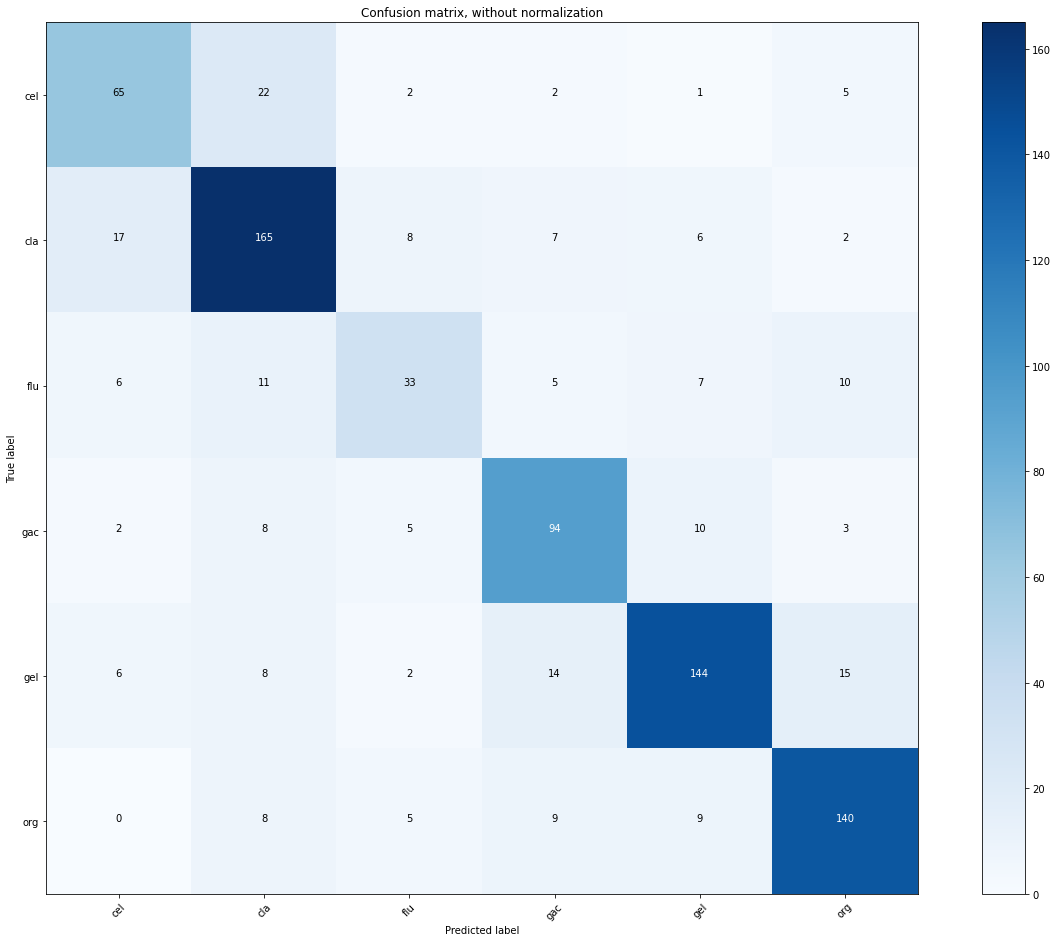

In [17]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [23]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [24]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['org' 'gac' 'cla' 'gel' 'flu' 'gac' 'gac' 'org' 'cel' 'gel' 'gel' 'gac'
 'flu' 'gel' 'org' 'flu' 'cel' 'cla' 'cla' 'cel' 'flu' 'gel' 'org' 'cla'
 'gel' 'org' 'gel' 'gac' 'gac' 'flu' 'cla' 'cel' 'cla' 'cla' 'cel' 'gel'
 'cla' 'org' 'flu' 'gel' 'org' 'gel' 'flu' 'gel' 'cel' 'cel' 'cel' 'gac'
 'cla' 'gel' 'org' 'flu' 'cel' 'gac' 'gel' 'cla' 'flu' 'org' 'cla' 'cel'
 'flu' 'gac' 'flu' 'org' 'gel' 'org' 'cel' 'cel' 'org' 'gel' 'cla' 'flu'
 'flu' 'flu' 'cla' 'cel' 'cla' 'cel' 'flu' 'gac' 'gac' 'flu' 'org' 'org'
 'cla' 'flu' 'gel' 'flu' 'gel' 'org' 'org' 'gac' 'flu' 'gac' 'cla' 'flu'
 'flu' 'flu' 'flu' 'gel' 'flu' 'org' 'gel' 'gel' 'cel' 'cel' 'gel' 'cla'
 'cla' 'gel' 'gac' 'cla' 'flu' 'gel' 'flu' 'gel' 'gac' 'cel' 'flu' 'cla'
 'gel' 'cel' 'cla' 'cla' 'gel' 'gel' 'cel' 'gac' 'cla' 'org' 'gac' 'gel'
 'cel' 'cla' 'gac' 'cla' 'flu' 'org' 'gac' 'flu' 'org' 'cel' 'gac' 'cla'
 'gel' 'cla' 'gel' 'gel' 'cel' 'cla' 'cel' 'gel' 'gel' 'org' 'gel' 'flu'
 'cel' 'cel' 'cel' 'cel' 'gac' 'flu' 'cel' 'org' 'f